Импорт заивисимостей

In [ ]:
!pip install scikit-learn seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns

Эксперимент 1: оценка распределения дистанций при сравнении каждого лица со всеми остальными лицами

Чтение csv-файлов с данными эксперимента 1

In [6]:
csv_directory_path = "tmp_PIL/"

In [12]:
df_VGG = pd.read_csv(csv_directory_path + "VGG-Face_comparison_results.csv")
df_Facenet = pd.read_csv(csv_directory_path + "Facenet_comparison_results.csv")
df_Facenet512 = pd.read_csv(csv_directory_path + "Facenet512_comparison_results.csv")
df_OpenFace = pd.read_csv(csv_directory_path + "OpenFace_comparison_results.csv")
df_DeepFace = pd.read_csv(csv_directory_path + "DeepFace_comparison_results.csv")
df_DeepID = pd.read_csv(csv_directory_path + "DeepID_comparison_results.csv")
df_ArcFace = pd.read_csv(csv_directory_path + "ArcFace_comparison_results.csv")
df_SFace = pd.read_csv(csv_directory_path + "SFace_comparison_results.csv")

In [8]:
dataframes = {
    "VGG-Face": df_VGG,
    "Facenet": df_Facenet,
    "Facenet512": df_Facenet512,
    "OpenFace": df_OpenFace,
    "DeepFace": df_DeepFace,
    "DeepID": df_DeepID,
    "ArcFace": df_ArcFace,
    "SFace": df_SFace
}

In [3]:
model_names = [
    "VGG-Face",
    "Facenet",
    "Facenet512",
    "OpenFace",
    "DeepFace",
    "DeepID",
    "ArcFace",
    "SFace"
]

Пороги дистанций для каждой из моделей по-умолчанию

In [4]:
thresholds = {
     "VGG-Face": 1.17,
    "Facenet": 0.8,
    "Facenet512": 1.04,
    "OpenFace": 0.55,
    "DeepFace": 0.64,
    "DeepID": 0.17,
    "ArcFace": 1.13,
    "SFace": 1.055,
}

Размеры эмбеддингов каждой из моделей

In [1]:
embeddings = {
     "VGG-Face": 2622,
    "Facenet": 128,
    "Facenet512": 512,
    "OpenFace": 128,
    "DeepFace": 4096,
    "DeepID": 160,
    "ArcFace": 512,
    "SFace": 512
}

In [19]:
native_resolutions = {
     "VGG-Face": 224,
    "Facenet": 220,
    "Facenet512": 160,
    "OpenFace": 96,
    "DeepFace": 152,
    "DeepID": 55,
    "ArcFace": 112,
    "SFace": 112
}

In [ ]:
for model, df_model in dataframes.items():

    df_model_sorted = df_model.sort_values(by='img_1')

    uniq_people = df_model_sorted['img_1'].unique()
    plt.figure(figsize=(24, 16))

    for person in uniq_people:
        person_data = df_model_sorted[df_model_sorted['img_1'] == person]
        plt.scatter(person_data['distance'], [person] * len(person_data), marker='o', label=person)

        plt.title(f'Результаты сравнения лиц {model}, размер эмбеддинга {nembeddings[model]}')
        plt.xlabel('distance')
        plt.yticks(uniq_people)
        plt.ylabel('person')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.axvline(x=thresholds[model], color='red', linestyle='--')
        plt.xticks(np.linspace(0,2,11))

filename = f'{model}_results.png'
plt.savefig(filename)
plt.show()

In [ ]:
plt.close()
fig, axs = plt.subplots(4, 2)

counter = 0
for model, df_model in dataframes.items():
    i, j = counter // 2, counter % 2
    df_model_sorted = df_model.sort_values(by='img_1')

    uniq_people = df_model_sorted['img_1'].unique()
    fig.set_figheight(64)
    fig.set_figwidth(48)

    for person in uniq_people:
        person_data = df_model_sorted[df_model_sorted['img_1'] == person]
        axs[i,j].scatter(person_data['distance'], [person] * len(person_data), marker='o', label=person)

    axs[i, j].set_title(f'Результаты сравнения лиц {model}, размер эмбеддинга {embeddingss[model]}')
    axs[i, j].set(xlabel='distance', ylabel='person', yticks = uniq_people)
    # axs[i,j].yticks(uniq_people)
    axs[i, j].grid(axis='y', linestyle='--', alpha=0.7)
    axs[i, j].axvline(x=thresholds[model], color='red', linestyle='--')
    axs[i, j].set_xticks(np.linspace(0,2,11))

    counter+=1
    
plt.show()
fig.savefig('pil_results.png')

In [83]:
def calculate_result(row):

  person_1 = row['img_1'].split('_')[0]
  person_2 = row['img_2'].split('_')[0]

  if row['verified'] and person_1 == person_2:
    return 'TP'
  elif not row['verified'] and person_1 == person_2:
    return 'FN'
  elif row['verified'] and person_1 != person_2:
    return 'FP'
  elif not row['verified'] and person_1 != person_2:
    return 'TN'

In [84]:
for name, df in dataframes.items():

  df['result'] = df.apply(calculate_result, axis=1)

  df.to_csv(f'{name}_new_result.csv', index=False)

In [ ]:
![image.png](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABBQAAAH2CAIAAABPyUjlAAAgAElEQVR4AeydB1hUR9fHqbvLsnRBAQUb2LtiNMYSe8cWa/LmtcYSe8MaNYnGhhErVixJ7AV7iV1ApEtRkN779r11v8zMsqxofNEYP5UzDw/evTv33pnfXHzOf+acM0ZaKEAACAABIAAEgAAQAAJAAAgAgUoQMKpEHagCBIAAEAACQAAIAAEgAASAABDQgniAlwAIAAEgAASAABAAAkAACACBShEA8VApTFAJCAABIAAEgAAQAAJAAAgAARAP8A4AASAABIAAEAACQAAIAAEgUCkCIB4qhQkqAQEgAASAABAAAkAACAABIADiAd4BIAAEgAAQAAJAAAgAASAABCpFAMRDpTBBJSAABIAAEAACQAAIAAEgAARAPMA7AASAABAAAkAACAABIAAEgEClCIB4qBQmqAQEgAAQAAJAAAgAASAABIAAiAd4B4AAEAACQAAIAAEgAASAABCoFAEQD5XCBJWAABAAAkAACAABIAAEgAAQAPEA7wAQAAJAAAgAASAABIAAEAAClSIA4qFSmKASEAACQAAIAAEgAASAABAAAiAe4B0AAkAACAABIAAEgAAQAAJAoFIEQDxUChNUAgJAAAgAASAABIAAEAACQADEA7wDQAAIAAEgAASAABAAAkAACFSKAIiHSmGCSkAACAABIAAEgAAQAAJAAAiAeIB3AAgAASAABIAAEAACQAAIAIFKEQDxUClMUAkIAAEgAASAABAAAkAACAABEA/wDgABIAAEgAAQAAJAAAgAASBQKQIgHiqFCSoBASAABIAAEAACQAAIAAEgAOIB3gEgAASAABAAAkAACAABIAAEKkUAxEOlMEElIAAEgAAQAAJAAAgAASAABEA8wDsABIAAEAACQAAIAAEgAASAQKUIgHioFCaoBASAABAAAkAACAABIAAEgACIB3gHgAAQAAJAAAgAASAABIAAEKgUARAPlcIElYAAEAACQAAIAAEgAASAABAA8QDvABAAAkAACAABIAAEgAAQAAKVIgDioVKYoBIQAAJAAAgAASAABIAAEAACIB7gHQACQAAIAAEgAASAABAAAkCgUgRAPFQKE1QCAkAACAABIAAEgAAQAAJAAMQDvANAAAh8lAR4XP6u6a//9u+uqvz5CvcnH3meJ3eo8K3hSX2dyj/rf9Z85eP+51VvWqFCH9/0cqgPBIAAEAACnwYBEA+fxjhCL4BAlSPAcxzPcX/X7dd/+3dXVf58hfuTj/r2VPiW3BYZ3xz3r4iH16KofKdeX/Pfa//rnwvfAgEgAASAwAdFAMTDBzUc0BggAAReR4DnOZZl1BoNRVEaXGiKpilag8/QNM0wjM6O18+Tv1N7ned5hmE4liVP4ViWplEDaIpmGUYvDDiW1dUhggEb9xxqO0Mqo5v8vfJ5HQKtVtdBDhUWF0KDoVEDyDkO91qP4vU3fPlbnU7AN2EYhvSRoWmWLe/jy1fBGSAABIAAEKgKBEA8VIVRhj4CgU+BALFoWZalKIqmsUWL/mEYmsEnGIZhWGzWo5P4GNnQ7048YNOcoyiKxdqA41iO49CTcEGPLnNbIoZ9uZVP6rMsx7GkwegOb94wnSDCdy+TDgzHsYgBjdULFijoGDfm7cSDXjkgCYTlib6DHFfex0/hlYI+AAEgAASAwJsTAPHw5szgCiAABN47AWLRUhpNYWFhXFxcbGxs3IslISEhJSW1oKCAIkVD0cjKRzPlepv+H7YaiQe81IAsamSvU3K5/NmzZ3FxcWlpaTKplAgVnke+SXrlQK5iWVS/VFoaFxf35MmT1NTU0tJSvZtTJRumuy1+QJl4YIuKip4/fx4XF5eelkZM/X8qHnTrJByLRAOtVCozMjLi4uKePn1aUlKC1nZwqWSboRoQAAJAAAh8YgRAPHxiAwrdAQKfJgEeT7cXFhbeuHFj2rRpU6ZM+e6776YalDlz5qxdu/bkyZOJz57J5XKNGrk2IfHw5hP8f0ew3HbHUkAhl8c+ebJo0aKpU6du3bo1MjISNRL5EZX5NZVJCOLCJFfIQ8NDp06dOmnSpM2bNoWGhpIHVd4W1zUAG/csy7Aso9Vqb9++vXr16unTp/n5bcWOUWVPxx1/6+5zHFpjYRgm+fnzPXv2fPfddwsWLHjw4IFMJiO66O8owXkgAASAABD4tAmAePi0xxd6BwQ+EQLEzyctLc3X19fOzs7CwkL8UrG3t/f09Ozfv/+pU6fy8vKIs/5bW88vg9Pb7mRqXyaTXb161dnZWSKR9O/f/8zp0+RZL4gHrAxI/aKiotOnT9vb21tYWPTq1euPP/4gj6h8C4nMILY7XvqgtVqtn59f27ZtxWJxz549eJ5HkokEfhDpgq95uS//8wzxyOJ5/v7D+6NGjxKLxe7u7v7+/rm5udhfi/2fd4AKQAAIAAEg8EkSAPHwSQ4rdAoIfGoEiHjIyMjw89smkUjMzc2bNGny9dffLF++YuHChUuWLfn2v9+2adPG2tra1tbWy8vr999/LygoQFP+BtYzOiRREAa/X0nq5WrlZ3ieNEYmk127dq1+/fqWlpb9+/c/d/Ysub8+nFp3CaqPIhOIeLCwsDA1Ne3Zs+fx48fJo1G1smAJw8a8srWkMg6LRk5FWq12586dbdq0EYvF/fv314sH5HFE4pv/5uZarfZ198cOWsTpKzg4eMzYMSKRqGbNmocOHcrPzyPBHoZNhWMgAASAABCoOgRAPFSdsYaeAoGPmEC5eNi+zdLS0tTUtG/fvgEBAQkJT588eRIbF/vgwf1ft2zp2bOnqampQCCYPn16aGio3ihHhvIrC1ERBra7rhbx+alwiYHk4HleKpVevXq1UaNGYrF4wIABgYGBPNEJZYqFeDFhTybkSlRUVHTmzBkLCwsTE5PXi4cKj63wETtwoaALhqF5jtuzZ0/btm0tLS0HDhyIArJxMijiP6WLF3+VfkD3fGUf0WldIeIhJCTk63HjLCwsXF1djxw+UlCQD+LhI/5DgqYDASAABP4xARAP/xgh3AAIAIF/nwARD+kZ6b/6/SoUCY2MjIYPH37jxg1sr+vCDJKfP/fdvNnR0ZFM7Z85c0Y3v87rci6xDKNUKktLS0tKSqRSqVKp1KV2fck8Z1lWrVbLpFIprlxaWlpeGRvmPMcR8eDp6SkUCvv27Xvu3DnSGMOVBxwCgTyMWIYpKiw8feqUhYWFkZFRjx49XrPyQJrDsqxSqcRNKGuwSoltfl2WJ41Gw3Ocv//uVq1aWVhYDBw4gKSiUigUUqm0BBeVWk0yUOl11AtrDjxPHlFSUlJaWqpQKDBnlGSJaB6e54ODgsaOQSsPLi4uhwIC8vLzWfztvz/m8AQgAASAABD4EAmAePgQRwXaBASAQAUCL4uHYcOGXb9+nWVZjUZD0yg2Wo79iFq2bCkSiT777LOjR49iKxxFEdM0JZVKk5OT7927dx6XixcvPnzwIC0tTaVSsWjXBV3uVA7LhsysrNDQ0CuXL1+4cOH8+fMXAgMfPnyYmpqqUip1IdEcJ5PLrt+8TsRDnz59zp49+4JdTub18W+aQrljiwoLT544QcRDz549T5w4Qfqo924imgHLA06lUmVkZAQ9fHj50iXS4EuXLz0MeZiTk6PRaDiOoxlGpVZrtdpdu3a2atVSLBYPGjRIrVIlJibevXv34oUL586dO3/+/KPQUHSJWv3COgPOMKtUKnOysx8+eHAJP+LChQt//vlnSkqyVFpKYs2J09eDBw9Hjx5tYWFRq1YtEA8VXkv4CASAABCoggRAPFTBQYcuA4GPj8DL4sHb2/vSpUsatUaj1iiUSpphpDJp4MVADw8PS0vLjh07YvGAlAPP89lZWadPnZw0aUKdOnVEIpEQl0aNGi1csOBRSIhCoSAT7TiFERsdFfXjjz927NhRIpGQmkKhsFmzZgsWLAgJCcE7SKAt3qSlpVcuXybioX///ufPny8XD3odQA6wv1NxcTFxWzIyMurevfuxY8fIMOjEg94niufVGk1wcPDSpUtbtGhhaWlJ2mBjY9OsWbP58+c/efJEo9EwDENRlFar3bNnT+vWrUUi0ZdffhkVGTlhwgR3d3dyiUQiad++/cYNG+Lj40mYhD4IpLSk5P79+/PmzWvSpIm1tbVQKBSLxdWrVx8/fvyZM2eysrJItiWe5x88eDhy5EgzM7MaNWocCgjIzyduSxAw/fH9EUGLgQAQAALvhACIh3eCEW4CBIDAv0vgZfEwZsyYu3fvEvd8lmVlUunNmzcnTppoZWVlamo6bty4O7dvcyxL0Zrc/Nyf1/78RadOrq6u9erVGzp06LffftOnT++GDRvWrFmzU6dON27cKC0tRdP5FJWfl/fDDz+0bt26evXqzZs3nzDhvxMm/Ldbt251cBk9enTis2dqtZrneZlUeu3aNUO3JUPxYIiDzPpXXjzEx8cvXrzYzc3Nxsbm888/Hzt27H/+85/OnTtbWVk5OzvPnTs3PDyceXHlgRj3vXr1atas2RdffNGnT5+OHTs6OTlJJJK6devOnTs3NDS0bM2ELS0pOXHiRPcvv6xRo4arq2ufPr3/+99vhwwZUr9+fWdnZy8vr23btpUUF1MUhd2Wgsdgt6VaNWuCeDAcVjgGAkAACFRNAiAequa4Q6+BwEdGoIJ4MDU17dSp04oVKw4fPnwQlw0bNowZM6Z27dpmZmYeHh47duzIyMhgWValUl64eKF79+729vYtW7b88ccfb926FRwUdO7cudlzZru5uYlEooULF8bExCClQWkK8vP/+OOPhYsWzps/b9euXY9CQkIehQQEHBw4YIC1tXX9+vVPHD9eWFio5bUyWbnbUr9+/SqsPBjy/TvxgJYl9AsOBuHLz58/DwgImDlz5vQZ00+ePPng/oPg4OCdO3e2a9dOIBC0bNnyyNGjcoVCo9Fgt6UdrVq1NDY2lkgkLVu2XLlixbFjx65cufL777/Pnz+/Zs2aQqGwefPmGzZsUKlUlEbDseyDBw8mTZpkY2Njb28/e/bss2fPhIQEX792bePGjXXr1rWystK7hPE8/ygkZNy4cfqYB7zygCSbYQfhGAgAASAABKoOARAPVWesoadA4CMmUEE8CAQCZ2fn5s2bd+rU6TNcGjVq5IxL586df/jhh+joaAr79hQWFi5btszd3d3V1XXatGnPnz9Hhi+nVSgU5wPPd+/e3cjIqH379oEXAmmaomlKqVRmZWXFPImJjYvNy81DsdY8n5mZuXLlSjc3t+rVq2/cuDEzM5PneLlcfuPPG3q3pcDAwDddeSDiwTAnEjrGeZzS0tKePHkSERWhUqqIpf4k9snMWTMtLCyqVau2afPmwsJCmkb7POzapRMPrq6us2bNiouLUyjkNE1LpdLHjx8PGzbUwcHB1tb266+/TklJIV5eO3bsIA5RnTt3vnv3rkKh0Gq1FEWlpqT07t3b1ta2adOm69atQ5HWPB8cHDJmzBihUKgPmCarPR/xywRNBwJAAAgAgX9AAMTDP4AHlwIBIPC+CFQQD0Kh0MbGxtXV1cPDo3bt2kKh0NjY2Nm5xrBhw06dOpWbl0dTFMexFEUlJyePHDmyWrVqTZo0Wbp0aXh4eERERDguR44cGTBggJGRkUQi2blzp0wm4zhkLnMcV1pampGR8fTp05iYmPDw8OCQkBUrVjRu3Lh69erLli1LTk7mOE4ul+sDpvv37//24qEsQKJ8d2qep2m6pKQkLS3t6dOn0dHRkZGRV65eWbh4oUAgsLOzW7NmTUZGhqF4MDMza9eu3YOHD5VKJdl8muNYuVy+c+f2hg0biESiXr163bhxg6ao4qKiBQsW2Nvb29nZjR49+vLly4QG6mZw8JAhQ6pXr+7i4jJlypTSEuTKRWIehEKhm5vbwYMHIdvS+3rl4TlAAAgAgQ+UAIiHD3RgoFlAAAgYEnhBPAhRqtYOHTqsXbv2ypUr+/fv9/DwEAqFHTt22Lt3D7L+dfu4oXSrcbGxAwcOtLOzEwqFdnZ2jo6OLi4uTk5Ojo6Otra2AoHAGJdlS5empqQQM16lVF25cmXx4sX9+vVr06ZNjRo1nJ2dHRwcRCKRRCLx9vYOCw+naZpsEvdPVh5IB1/wXMJeTBzHZWdnBwYGzpo1q3fv3o0aNapVq5azs7OdnZ2RkZFIJJoxY0ZUZCSPfYfIygOSB7175xcWUpQGZYZlGZZlVCrlvXv3vLy8TE1Nvby8fvvtN5qms7Kyvv/+e1tbWxMTE4lE4uDg4IiLk5OTs7OzWCw2NTW1tbUdMmRIVFQUTdN68VCrVq09e/bk5ZFN4iBg2vD1hGMgAASAQBUiAOKhCg02dBUIfLwEdOIhPf3XX7cIsXjw9va+cOGCVCotKMhfsGBB3bp1HR0dR40alZSUpMGFomlD8WBnZ9e8efO+fft6e3v369evT58+/fr1Gzhw4ABc9u/fn5mZSdN0dk7OwoUL27RuQ5Y1unXrNmjQoDFjxnTr1s3FxcXKymrkyJFhYWEURb178UBCIHj+8ePHc+bMqV+/vpOTU8OGDT///POhQ4eOGjWqc+fOpqam5ubmU6Z8FxYWTrZu8Pf3J9mW+vXrR+MUTEQ8cByn0WiCgoLat29vZGTUpk2b33//nabptNTU6dOnE+FUp06d3r1798dl0KBBffv2HYjLyJEj16xZ8zQhgaHp4ODgsdhtydnZ+eDhg/n5+UTtfLzvErQcCAABIAAE/gkBEA//hB5cCwSAwHsiUL7ysFUnHoYPH37z5k3iZXThwoUePXqIxeLGjRtv3bq1CMcDMAyjVqn0Kw8NGzacP3/+nTt37t27d+fOndu3b9+9e/d+WUlOTlYqlXm5uQcO7m/atKmVldUXnTqtX7/++vXrd/ElxG3Jyspq1KhRYWFhGo3GUDyQTeLKYx5w6IIeDbG29TtMl6Vq/YPsxcbQaBcItF80TVMaSiaXr/zhB09PTxsbm44dOx44cODK5Sv379+/dOmSj88SsVgsEom+++67sLAwcv/du3e1aoW2tujbt69KpVKr1QYrD6q/9nxo166diYmJl5fXsWPHaJrOyMiYMWOGra2tjY3NkCFDTp8+fReXe/fu3b59+969e/fv3w8KCoqNjZXiDFRBD4NItiWUqvUQpGrVjyocAAEgAASqKAEQD1V04KHbQODjIkDEQ0ZGht82vwo7THMcl5GevsTHh2QK6tKly4MHD1AAA8tq1OqkpCQS89CgQYMff/xRpVaTWAiWZUlcQUpKikKp5PC+aXFxcVOmTLa3t3d1dV24YMHTp09pmuZYtri4eMOGDfXr1yfiITw8vMLKA9kkDnk9vSp7kk48FBaeenGHaZ14YBgWF7R1g4aKj48fMmSIhYVF7dq1V6xYUVhYiPQATScmJq5c+YMYl2nTpoWHh5MRJG5LAoHgiy++iI2NVSoUaM87Fm0RLZfLAwIONmnSRCgUdu/e/fLlyzRNF+GYBwcHBxsbm2HDhiUnJzMYBdpsG284nZOTU1JSjHbtxmdeEA+wz8PH9WcDrQUCQAAI/AsEQDz8C1DhlkAACLxrAjrxkJm5bft2oUhkZGRE0onyKLwB7Q997dq1r776SigUikSiFStWPH36lGyjlpeXN3/+fDc3NwcHh7Fjx0bHxNA0pcIlIz390qVLmzZtCgoKKsbbGoSHhw8fPtzOzq5JkyabNm3Ky8tTq9U0TYc9fjxp4kQbGxuJRPLVV19FREaSdEbXrl4lMQ84Ves5pB1YFm3EViYh8KZsHIrD5ji0w/TJk2SH6W7duh06dEgmk0mlUhkupaWlUqlUpVLdvXOnd+/eQqHwr1CHffv2yWQyhUJeUlJy8+bNgQMHmpmZicXiGTNmREZEEMZEPJiYmHh4eGzZ8mtKynOlUkFRlEKhSEhImDhxYo0aNezt7cfgvjMMo6E0mzZt8vT0FIlETZs2/fPPP4uLi1VqtUqlkstk9+/fP3DgwKVLF7Ozs2ma5nk+JCRk3NixIpEINol71y813A8IAAEg8FESAPHwUQ4bNBoIVDUC5W5Lfr+SlQdvb++rV6+WiQeuoKBg69at9erVE4lEaDeGEyekUhlFodSrJ06caN++vYWFRcOGDVetWlVQUCCTyTIzMo4cOdKtWzeJRDJ58uTQ0Ec0TcfFxU3EIsHBwWH69OmRkZEymSwnN/eHH35o0qQJiTDWB0yTHaZJrPagQQMvXbyAtQOa9dcvQZAESgxDcxxavjhz+jQRD61bt165cuXt27dv3rhx+/btO3fuXL9+/c8//0zPzIyIiBg8eLCFhYWLi8uMGTMyMzNlMllkZOSyZctsbGyMjY0tLCymT5sWGRFBYh6IeDAyMrKwsGjWrJm/v390dHR6evqjkJC1a9e6ubkJBAIPD48fVq1SqlQMQ/M8d+PGjZEjR5qbm1tbW0+bNu3hw4cyqTQvNzc4KGjYsGHu7u79+vU7efIk6gXPP3r0iOzzoBcPRBpVtTcQ+gsEgAAQAAKEAIgHeBOAABD4CAi8LB6GDRt248YNIh4oDUVT9P379//zn/8YGxubmZmNHTv21q1bLMtqNJr8goJFixbVq1fP3Ny8Ro0aQ4cO/eabb7y9vZs3by4WiyUSyapVqxISEkiOIz8/PycnJxMTk1q1avXp02fSpEl9+/Zt2LChp6enu7u7PmCaxDxcvXrV3d3d3NwcuS2dOYOsapzpVb/yQNYiaJpmWRatPJw4YWFhYWZmZmtrW69evTZt2rRo0aJNmzZt27Zt0aJFr969jx8/npOTM2fOHGdnZ1NTUwcHh788i7755psuXbo0aNCgcePGQqFQLBZPnTo17HEYyba0Zw8KmDYzM3N0dOzQoYOHh0fnzp0HDhzYpUsXV1dXMzMzKyur76ZMCQ8LQ35IjM4LKyAgoGnTpsbGxg4ODl27dv36669HjhzZoUMHGxsbBweH8ePHBwUFsSxyZAoJDoaVh4/gLwSaCASAABB4XwRAPLwv0vAcIAAE/gEBnXgwyLY0fPhwIh44lmWwdZ6Xm3v0yBEiEtzc3FavXp2bm8viBESRkZF+fn7Dhg2rW7dutWrVnJycqlWr5uHhMWzYsC1btkRHR8txjIRSqUxISFi6dGnbtm1JVECtWrW++OKLOXPmTJ48uVWrViTmISIiQh/zUK9ePYFAMGBA/wsXAsmCA3KjIp5LZOoeb9pAxMMJLB7McREIBBYWFiKRyMLCQiKRiMViT0/Pbdu2FRQV3blzZ86cOY0bNxYIBA4ODs7Ozl9++eXMmTNnzZolkUhEItGUKVPCwsLIysNPP/3UsGFDCwuLTp06BQYGDh8+vE6dOra4ODo6tmvXbtGiRXdu35bJZKRhaDGEYVJSUw8fOfLf//63WbNmzs7Ojo6O1atXr1mzZu/evX/66ad79+4VFRXp3JaCg8eMHm1ubl69evV9+/ZBqtZ/8BbDpUAACACBT4EAiIdPYRShD0DgkyeAt17mSkpK7t+7t3Tp0sU+PocPH3727BmZ42cYlLCIojQpycnbtm1bisvp06cLCwp5DokLitKkpaVdu3Zt69atS5Ys8fHxWbJ06ZYtW65du5aVlYWsZLRtMgoypigqOjo6ICBg9Zo1Pj4+y5YvP3DgQGho6J9//rlt+/YVK1Yc/e23zKxMlMpJrX727On69euXLl164MD+2NhYslc0DlbmyCoEvi3H4AhmhUIRFRW1bNky1ADchsU+PosWLVrs47MEl1/Wr793755CoSgtLX306NGePf7Lli1DbVi2/PDhw8HBwXfv3l2xYsWyZctOnz6dkZFBtqO+fPnyL7/8snz58oMBAXK5/PLly+vXr/fx8Vm6dOlPP/105MiR6OhonDcJBWPoVQ3NMAUFBQ8fPvT391+1erWu/s8/nz17NikpSYkjyNEO0xyXnp72+2+/+fj4/Pjjj48ePZLL5XhxhfvkXznoIBAAAkAACLySAIiHV2KBk0AACHyIBDiOI2EMKCOpRkNRFIszAjEoYREKm+ZYZP0rcSGxzuQksbM5jqNpWq3RkB+KonQmvj7QmawV4KeQOhqNhpyjGUalViuVyvLbchxD0+RZSqVSo1Eja5skXCK/cdi0biECW9z6tqGcqhoNuSH6jQO4NRoNSe6klxy6dmoolkF2PMMwSqVSpVZrKA1NUyiAgeNUKhU6qVJpyrpDNrgg50kABoGAbvvikgjPc6QZeiZE+RAVhFzCMFiNRkMeQRyZPsQ3A9oEBIAAEAAC74sAiIf3RRqeAwSAwD8mUG6aY4ueZVhKQxH7mAQbEOuWmPvkDEVROmlR0W7GtcrSIqHNFvD6g/7aFw5wMIP+DPKhwrlQSdSB7jy+FeniC2Y6eQTP63aBKLtLhY9lpw2SveJL9DfU6xzcLxZvC4HEQ/mFRLGQz2UPRZ/K+qgLLieNx7/JRtREWenvQ/LGkmUKvTwzbO0/Hka4ARAAAkAACHzEBEA8fMSDB00HAlWNgM7A1VvDyNcIeSXp9IPBzDqOkcDrAHhVgRjcSFoQa/tlm1t/zwomuN74ftEoJz5OJOqAeEaRm5MRIds2lFv2+HEvbyGni/amqPIlC33zcHv046u37IkSwE/HsoE0W982fWtfvI9OP+BqaEcLGhWdF5P+1vpL8E1Inij0ZYXGG0gaffPgAAgAASAABKoOARAPVWesoadA4FMgoLd1DQ5enH03+MJwvtzgtO5Qj+Plryp5htzBsHKFM4YfKzSm7CPSP4Z3MDzWt9DwPoYV3uhYfxOsucofWtaS193MsE6FVsFHIAAEgAAQqFIEQDxUqeGGzgIBIAAEgAAQAAJAAAgAgbcnAOLh7dnBlUAACAABIAAEgAAQAAJAoEoRAPFQpYYbOgsEgAAQAAJAAAgAASAABN6eAIiHt2cHVwIBIAAEgAAQAAJAAAgAgSpFAMRDlRpu6CwQAAJAAAgAASAABIAAEHh7AiAe3p4dXAkEgMZePBUAACAASURBVAAQAAJAAAgAASAABKoUARAPVWq4obNAAAgAASAABIAAEAACQODtCYB4eHt2cCUQAAJAAAgAASAABIAAEKhSBEA8VKnhhs4CASAABIAAEAACQAAIAIG3JwDi4e3ZwZVAAAgAASAABIAAEAACQKBKEQDxUKWGGzoLBIAAEAACQAAIAAEgAATengCIh7dnB1cCASAABIAAEAACQAAIAIEqRQDEQ5UabugsEAACQAAIAAEgAASAABB4ewIgHt6eHVwJBIAAEAACQAAIAAEgAASqFAEQD1VquKGzQAAIAAEgAASAABAAAkDg7QmAeHh7dnAlEPgECPA8x3FshY7wPDqNfpMDcox/V6j5zz/qHsHzWq2WHL/mnuXt4bgXWogvf82FH/tXhmTKOs6xuKCvyobJsJu6kx82GdSXl94rfcs5juVeeg8N+wjHQAAIAAEg8P4JgHh4/8zhiUDgAyKAtQOrs+HKLDme5xmG0dltSFywyIxjWf6dWqLY5sW/yp7L4Wf9HR1sIePGoPagUt7sd9qwv2vA+zxPDGiOw0NTpg10J1k0Flg6MCzLYAv7FSPIsSxD02QQ32fL3+hZ5SOoH03yRuBXDvWOrdi1N7o/VAYCQAAIAIF3TgDEwztHCjcEAh8NAWKMVjDgiF1Ol9mdxEYvN+PenZmue7qBZYy1Q8VlED1NVBHNtSODkqgHonxYhnm3qkb/xP+vA51IQP18wXpGQ1MmG7CiQwKB/JCPpAIZUJZhaIp655LvXTHBGgEvcOllAz4gr59eGjE0zWL9QDr+iQ30u4IJ9wECQAAIvE8CIB7eJ214FhD4gAhgo123nkBMTGyxEV8YZLOWGXBowYEck2ngd9WHcumiMySxCxWHHvdKGxE3GJnLZQ3DBwxDUdQHPr/+psT0cs4QOxIODNYSSDOhgjARvYUlBDrkecJHZ2oTu/zd6b037chr6usbTzqr6xISRwzpJum7Wq2maVr/Br7yxXjNU+ArIAAEgAAQeOcEQDy8c6RwQyDwcRCgaRr5JuG5fDJ7rVarVSoVpdHo57MrWOrIznt3lqjORMYWsOETWfbVKwl6Q1kvbGiapiiKYegPdn797V6FMlGAvZIMBohhaI1agyfjdQsOPFYLenr60aRx0RN+u2b8q1dhhcjTNI0WjrAu0qg1ZGQZGnUTaUKsYMlbR/TDO3z9/tXewc2BABAAAp8wARAPn/DgQteAwOsI6Od6eZ4jPyiyATsE6c8Qe11vrHMc97o7vuF3ZO5ZZ+AiWWL4g+KnKxT9XDVZACmbfydXoS8r1P+oP2LbGg2RbiWhjA8OIdYNnR4dqUcUlP5C4m9GLO8PFgV531iWJSqCjKzBm2ng10QWVd6pfP1gsUDDgAAQAAIfMgEQDx/y6EDbgMC/SIDY4iXFxfHx8XFxcfHx8QkJCU9xiY+PT0tLyy/IV6qUaFYYuc/rZojfYYNIA4h1q9FosrKyEhISEhMTpVIpy5ZHPpDobYZm9L7vxJ7mOU4qlSYlJcbFxaWmpioUCmw3fyISQg+HY1mNWp2bk/M0ISE2NjYhPr6wqEijwZP0JJy6LGaAZVm1RpOWlpqQkJCRnq6Qy8mKBM+/S8n3Tl4AvGDCMjR6r5A05TiGwe8Yy6jVqtzc3KdPnyYkJBQUFVAUVa6RyELEp6US3wlPuAkQAAJA4H0SAPHwPmnDs4DAB0SA+IoEBwXNnz9/3rx58+fPX7BgwUJc5s2bt2rVqt3+u69dv5acnExRyIcEeQe965UH7GaDdEJ6evr+/fsXLFjw048/PnzwQKVS6ZUAEQ94Zhol3tG56GCHq8ehoT4+i+fNm7d+/fonT56QqIAPCPHbNqXcbQm79BQUFJw+fdrHx2funDnz58//49ixlNQUpOgYunxpiGMpisrKzv711y2LFy/au3dvQkICCrh+16P2tn164TocRMPQFI00Ic7rxXGcWq1mWSYrK/PE8eMLFy5csmTJtRvXioqL9EtMurUUEA8vsIQPQAAIAIH3TQDEw/smDs8DAh8IAZ7jaIr23+1vYmJibGxsbm5ubW3tgIu9vb2VlZWnp6e3t/eWLVvSMzIoSoPMd7wgQMx6vZuQ/qPe3Nd3sMJXL38k/iparTYkJGTo0KHW1tZNmzbdvn17cXGxbr4ZJ43Nz8/Pzs6Wy+XE6MQ5SCmWZQ8fPmxjY2NlZdW0adNz584xDENpKH0zKjyOtKrCSf1H3S4TZYap/iYVrtJ37V89IJIAZ0tC3UlKSvr++++trKyMcenatevp06cVCgWJJMYR7ihhq0qlio6Katu2rUgk6t+//9WrV3me10eT/914vUxAf+Y1B3pc5LYv1zTk8/K3DMNIpdLMzEypVIpWUbCIVKpUHMfFxMRMmzbNxsamRo0aa9euTU1NJTHhyDvNIP5bf0/DlrzcGP23FcZRf7kei2GD4RgIAAEgAAReQwDEw2vgwFdA4FMmwPMoXHX/vv1WVlYCgcDd3X3IkCEzZ86cNWvW1KlTW7RoIZFIjI2NGzRosGXLFplUSvzRddaYges5ssPKPGf4F5cmXvgK1UKGru4kvgr7Q9FarTYuLu7nn38eNmzY+PHjL1+6hHQCvifLMEVFRRs3rl+4cMH169fJlLzuN8fdvn171KhRffv2nTFjxqNHj1gWzb6jC7EGqPB0MpYvnMQ1K9TXVcNP1w9/2YpHuTOV/qt/44D0nQQ88Dyfnpa2fPlyd3d3AS5CoXDa1KmRkZFESpFUWEQ8xMbG9urVy8HBYfiwYXfu3CkXDwbdIf1FDHEoth6I4cjqT5Yf6FlVwPsyaoNnGcIknSJPz83NPX/+/IwZM86fP5+dnUVWk9BCCs+npaX5+/sPHz58wIABx48fz8vLww5NaNVLl2DK8ImGxxUapv9o0J7yNuCTpDH/xgjCPYEAEAACnzABEA+f8OBC14DA/yDAsuz+/fuEQqGxsbGXl1dAQEBKSkpaWtrzpKSrV66MHz/ezc3N0tLSy8vr3t27MpmMLBTgJQiUILXCQgTxg2Jo5Evzwk9ZRiDdlmfkW6IAytLplJSWPnv27PHjxxFRUTm5uSgTFF7okMvlDx8+bNKkSfXq1bds2aKzZfG1PMcVFRZGRETcuXcn5klMSUkJmbAndYgnvb4ZODD3xQ3XDBpJ476gC7ExWm5Gl9Uh1q0uULuszv+A+w++1neBJJ5KTUnx8fFxcXExMTERCAQmJibNmjXbvHmzGkc+0BSFN+Vg1Wp1bGxst27drKysBg0a9OfNm9jjC6eiwumMyMDhwHTSV6QfCDSc5VWX5hWFH2B3KR09XV38T5nbmN6O1+8HUl4ZQyMMy7WiXntgDRkeHvb99987OjquXLkyPj4eLRmRLSk4TqFQpKamhoWFPQoNzczKUqlUuhAXw2aQY/wgPNC69L74cS9ksC3fZQ9LZfJW4BplivffH81/8CLApUAACACBD5EAiIcPcVSgTUDg/RBgGGbv3r3m5uZGRkafffZZYGAg8oTBhqa0tPTYsWO9evUyNjZ2dHTcv39/Tk4OMfKIk3pZXiZkhJHWEjmA7NEy415/YDht/IIRWGadMwyj0WjUuNA4noFGURZMenr6pk2b7O3tra2tN2/ejK8lbixoA2yWZTUajUwu06D0siRZlG5DYvQdg/zpSRuQ1Vhhr+KyR+P+ophdQ+a6lpMMUNhiLlc+78XcRAjLVgZSUlIWL17s7OxsaWk5aNAgJycnJA8GD7p58wZZW8BCjiHioWvXrhKJZPDgwbdv3SKLS0iBEFi6VFq6mHKS5tVQZRFEDIPywOqHiQy3TlDhVhGYBAjZk6FcOZDLytjqNAZZQ9FtUsErlYpTp061b9/ezMzMx8cnLi6OZVhKgyUQ9sGiKQplDcY7PGAXNZSRFz0Ck8cDq0sxbNgSQoyi0WtT1grdYkW5kiEaRv9+lt3TcOjhGAgAASAABF5PAMTD6/nAt0DgkyWApqVpet/efSKRqFw8UGiiGu3/wLExMTETJkwwMjKytrbesGFDeno6ciDBFVQq1bNnz27evHn06NGdO3du27Ztz549Z86cefz4cV5eHpYK5dP8DE1nZGTcvn2bVN6xY8fhw4fv3buXmZlJsgbxHJefn3f9+vW9e/cePXo0Li5Oo1anJKcEBgauXLmyZ8+eYrHY1tZ29OjRO3bs2LNnz717d9E6A88lJSUFBATs3LnzxIkTqampBfn59+/d27Vr144dO4KDgooKC3V2JLZlGYZ5Turv2HHm9OmUlBTUUxqZofn5+SEhIceOHduxY8e2bdv27dt3/dq1pKREpUqJXO2xEf8hiAcnJ6dt27YNHTrU2dm5Tp3a8+bNzc/P12hIOHtF8XALiwekK/AyAk1RxUVFoaGhx44d271797Zt2/z9/S9evPjs6VO5HK0pERlAxk6j0eTk5Ny/f//3338nTA4fPnz37t2CgoInT56cPnXqwIEDN25cVyqV+hRYKqUyOTn56tWrhw4d2rFjh5+f347t20+dOhUdFVVSXEz803iOCwwM9PX1HTduXLVq1czMzPr27btixYqtW7f+8ccfSqWSY9mioqL79+/v3bt33759ERERMpns+fPn58+f9/f3/+233xITExUKBUPyNOHFClLfH5fw8PCioiKyciItLY2JiTl75syePXu2bdu2a9euM2fOREfHFBeXkDbr1cgn+xcOHQMCQAAI/DsEQDz8O1zhrkDggyfAcxxD0/v37xeLxUZGRh07dgwMDKQ0GoZGiwAsyyQlJU2fPp2Ih19++SUtLY1l0Ex/SUnJnbt3f/zxxwEDBtSrV8/a2lokEtnZ2bVp0+a77747cuRISkqKWqUixihNUTk5OTt37hwyZEj9+vVtbGysra3d3NxGjRp14MCBxKREhmG0Wm14eNi4cWPt7e0bNGiwZ8+ekpKSGzdujBgxwsLCwtLS0tjY2NTUVCwWSySSGjVqLFq0KDU1VavVnjhxws3Nzdzc3MvL69KlS0+fPl2zZo2dnZ1AIJg1a1Z4eLhuRhxPMMtksiNHjri6ugqFwsGDB9+8eZNlWYVcnpqaeuTIkf/+979NmjSxtraWSCTVq1fv16/v2nVr7z+8r1apGIbWJ4d9b6P6ypUHV1fXixcvHjlypE+fPjY2Nu3atTt37lxxcTFeK9C5LZGVB+S29OefZF0Crc8gMZZ88sSJyZMnNW3axN7e3tLSslq1al9++eWaNWvu3btXUFBAlnpIMPrzpKRDhw6NGjWqXr16VlZWYrG4bt26Y0aP/v2339atXfvZZ5+5ublNnjw5v7CQLFUpFIqYmOh169b17NnTzc3NxsZGIpFYW1u3aNFi3ty5f968KS0tJS5Mw4YOtbGxMTc3NzMzMzIyMjU1FQqFIpGoS9euxC8uLi5uzpw59vb2Dg4OGzduTE9Pv3Xr1tixYyUSSZ06dQ4cOJCdhWIkKArlAOM4Ljw8fPr06dbW1nZ2djt37szMzGRoOisr60Jg4IL58z/77LPq1atbWlra2tq2bdt2/vz5Fy9ezM7OJisxei+19zas8CAgAASAwCdAAMTDJzCI0AUg8JYEDN2WvLy8UA4fuUKj1mjUyAvo8ePH33zzjZGRkY2Nja+vb0ZGBs/zMpns1q1bbdq0EYvFpqamdnZ2DRo0aNq0aa1atYiVX7NmzaVLl6akpqqQ2Y3Cnc+cOVOjRg1TU9MaNWq0bt3ay8vLwcFBIBC0bt1627ZtFEVh8RD+1VdfWVpa1qlTx8/Pr7i4+N69ezNmzPDw8LCxsTE2NjYyMnJ1dW3RokXbtm3Xrl1LGvPXJLqzs7ORkVHr1q0vXrwolUoDAwM9PT3Nzc07der0xx9/6Bz6sSdVQkLC0qVLiam6cuVKksk0PT1t5cqVNWrUMDExqVGjhpeX1+eff16/fn1LS0uhUNi7d++nCQk6nxm8fPGWoN/8sr8TDxcuXMjMzFqzZg2x0YcMGRIXF0cseEO3JW9vb8OA6fT0dF9fX2dnZ1NT05o1a7Zu3bpDhw5NmjQRi8XGxsZDhw69fPmShtIolEqO4woKCnw3b/bw8DAyMjIxMXF1dW3UqJGnp6cLLt27d69bt667u/vcuXOlUinaqIHjnj57tnr1ajNc3N3d27dv36VLlxYtWggEAnNz83Hjvn4YFER6NHv27BYtWjg4OBjh4uDg4OHh0axZs3HjxpGnx8XFff/992Kx+C9Rum7durS0tMTExOXLl5N3YP78+TExMTRNo2S+WAGcPXu2b9++5ubmtWvXvvXnn3KZrCA//+iRIw0aNDA3N69evXrz5s07duzYvHlze3t7U1PTTp06HTx4kGQfJl5Vbz44cAUQAAJAoEoTAPFQpYcfOl/FCTA0o3db6tix4+XLl0lwAsuy2dnZa9asadq0qZmZWZ06dS5cuFBcXEzR9P3794cNG0Zsu/79+yMHoeDg8LCwwPPnJ02cWLt2bXNzc3d39/379mVlZfE8//z58+XLl5Jsqr6+vomJaE+3fXv3fvvtt3Pnzg0MDFQoFFg8PCbioV69ev7+/iUlJQX5+UlJSSdPnuzYsaO5ublEIlm4cGFEREToo0dkZYPneb14aNeu3aVLl1iWffLkyciRI62srP7yivnxxx9V2BOGpCs9d+5c3759xWJx7dq1z50/XyqV5ubmHj58uHbt2gKBoEuXLrt27nr27FlycvKVK1dGjx7t7Ozs7u6+cOHC0tJS/QrGe3thXikenJ2d//jjWH5+/oMHD8aPHy8UCiUSyZYtW1JTUni8T0JsbKxu5WHgwJs4YJrDO8cdPny4U6dOYrG4SZMm27ZtCwsLS0xMvHnz5qRJkxwcHFxcXObPn4/8uHC5dPGit7c3uXnv3r3379v38MGD+/fv79+/v3379o6OjmSIiXggPlFpqam//fbblClTpk+f9tsfR6NiopKSkm7futWpUycrK6sWLVps2rRJpVZzLJuSnHzjxo2pU6cS8fDtt9+eP38+IiIiMioS52zl4uLiZs2aZWVlpXeWk5aWHj92rGnTpiYmJsOGDbt58ybJGszzfElp6S/r1zdp0sTJyWnKlCl4TxLq4sWLgwYNIgtcK1euvH//fnJycmho6JIlS1xdXR0cHL755hu0KoXi+CvGury38YUHAQEgAAQ+XgIgHj7esYOWA4F/SoCsPAgEAiMjo4YNGy5ZsuQ4Lvv27Vu6dKmXl5dEInFxcZk2bVpqaipN09nZ2X/5sjs5OZmbm/fq1fPQoYD09HSlQqFRq4uLi+/cvj1lyhQbGxuUS3TatKjISJZlnz59Onv2bBsbG5LNSalUMgyTnZ0dHh4eHR2dnZ1N45WH0NDQESNGWFpa1q9ff9++faWlpWq1WqNWh4SEdO/eXSAQ2NnZbd68WaPRqJRKiuQXYlm9ePDy8rp8+TLP81mZmZs3+9asWVMsFo8fPz4mOprsj61UKLb5+TVq1MjKyqp///4REREMw0REREydOtXc3LxatWrr16/PyMjgWBSVW1paunv37k6dOkkkkrZt2z5PTiZT+/rQ8H/KvRLX/514OHbsWGFBQW5Ozr59+9q0aWNkZNStW7czZ8/I5DKVSqUXD/qAaZTpNT197ty5dnZ2rq6u69atS0hIIGZ6aWnpw4cPW7ZsKRaLBw4ceOMGCr9WqVRr1qxp0KCBWCxu06bNqZMn09PTFQq5XC5PT08/evSoV7t2IpHI3d19zpw5xTjAgMcpkjIyMqKiomJiovPy84haKyosXLdunaenZ/369Zf4+BQVFZGdpDMyMlavXk3Ew8KFC2NiYtRqtUwuI6laiXj4Kz7+Lxcy4rZE03RQ0MMxY0aZmZk1atRo165dRYWFxOMo4WnCt99+S5a/9u3bV1xcXFJS/Msvv9SoUUMikUydOjUoKIhsPa5WqxMSEnr27Gltbd2hQ4eAgACtVou80V4MlK/EyEAVIAAEgEBVJwDioaq/AdD/qkzA0G3J1ta2ZcuW3XHp0KFD/fr1q1Wr5unpOWHChJs3b5Itn6Ojo+fMmWNsbCyRSJYs8YmJiaZplBgHBVizbHFx0d49e5o1a2Zqatq9e/crV68oVcqkpCQfHx8bGxt3d/cJEyYcPXr0wYMHz58/l8vl+lhbrVb7+HG5eNi7d29paalGQ9EU/Tg0tHfv3kKh0N7e/tdff9WvAJC55wrigUVtKH7w4EG7du0sLS27dOly9MgR5NzCsc+TkubNm1etWjVHR8fNmzdnZWVxeJuI/v37E4coHx+fM2XlxIkTy5Yt8/LyMjU1dXJyunL1KskD+/8uHlycnU+eOFFYUEBpNBHh4YsWLbK2tra3t585a+bjx49VKlVcfJw+29KtW7fIux0WFjZq1ChTU1MXF5dly5YdOXLkZFk5ePBg06ZNBQJB27Ztd+/ezbKsXKEYP368tbW1k5PTN998k5WVhTcXR/mXKIrKzMgYN26co6OjTjyUhVvgJEmsXC5/EhsbFBR07drVM2fOHDt2bO7cuXXq1HFxcfnuu+/Idm88z+fl5v78889EPCxevDguNpamabUGbS/N87yheNi0aVN6ejrPc8nJSb/8stbW1tba2nrBggUJCQkkn9K1a1e7d//S2tq6Z8+eoY8eqVSq1NSUWbNmmpqaSiSSCRMm7N27l4zq6dOnjx8/3qVLF4lEUr9+/eXLl5PAHvBcqsr/AULfgQAQeDsCIB7ejhtcBQQ+egJ4E4DyVK1isdjNza1JkybNcGnbti3JhHPnzh2lUknTKDg1KChowoQJpqam1apV27FjR1pamlqtJlsdsyyjVCrPnj3bo0cPExOTBg0aHD5yuKi4KCcnh1ioEonEycmpffv2//nPf9auXXv23Lm4+HipVIqyGGm1ERHhI0eimAe92xJJIvT48eO+ffsKhUI7O7stW7YgHUASueJdICqIB5qmFQpFYWHhmDFjHB0da9euvWjRIrVazfM8cWUhLjSRkZFKpYJhmKtXr3br1s3IyMjR0bFNmzY9evTo2bNnjx49Onfu3K5dO3d3dysrq1q1au3dszcbiQ2UCpbYrO9h7F+58uDi4nLy5MnCwkKWZUlM+RdffGFpafmXQ//WrVuLiovin8V37daV7PNA3JZ4nr99+7b34MEmJiZWVlYtW7b88ssvu3Xr1rVr1y+//LJDhw7u7u52dnatWrVau3YtTVMKpXLEV1+Zmpq6ubn5+PgQFUdSwdI0JS0tXbpkSf369fUxD3rZ8Pz58zNnzy5evHjixAnDhg3thUubNm3IGsJXX30VHR1N5GJOdvZPP/5IxMOiRYtiY2MpilLi/Rx4no+NjZ01axYJrN+8eXNGRoZWqy0pKb58+WKzZs1EItGIESNu3ryJFjFo2nfz5qZNm9auXXvOnDlFhYUsw8TGPpk0aaKxsbFIJGrQoMEXX3zRo6x07ty5Xr169vb2Hh4e33//PcnLROToexhQeAQQAAJA4JMhAOLhkxlK6AgQeDMCJNuSfp8HT0/PBQsWHD169Pjx4ydPnrx3715CQkJxcTExl4kjSnBw8MSJE0nos7+/f2ZmJtnUmeztoFKpTp061bVrV2Nj4xo1auzevTs/L49kW1q3bl2rVq1sbGzEYrFAILCysqpbt+7cuXNDQkKQ37lWGx0VNWrUKCIedu/eXVJSQlM0QzOhoaHdu3cXCoXW1ta+vr4cx+GJcJz+iONeFg8qtVqj0fj6+hIPpaHDhj5PfU4z9Lp16xo3blyjRo2JEyfK5TKe5zUUdeHChU6dOpF0UnXr1m3evHmrstKuXbuOHTt27drV29v7+PETeXn5eFcJtGHC+0nR82rx4Ox84vjxosJCDQ74zc/P37FjB4kzGTlyZMijkPinSDzY2tp6e3vrxAPH3bxxY+DAgSYmJpaWlu7utVu3bt22bduyjrYiWmL06NF79uzRqFHM9IgRI0xNTd3d3ZcuXVpaUkKQkh0VGIb28/Nr1aqVoXjgOC4+Pn7t2rV16tQRi8VOTk4NGjRo165dly5devTo4eDgIBaLBwwYEBwURDJr5ebkVBAPNE0rcVYrnudjYmJmzZql39kDrzygrdCTkpK+/fZbR0fHdu3a7dq1S6PRSGWyEV99Va1atc8///zo0aPoReW4mOhokl+YRMA3bty4efPmzZo1I/39/PPPO3fuPGjQoFWrVuXm5Lx/b7Q3+xOF2kAACACBD5IAiIcPcligUUDg3ydAVh72799vYWFhZGTUoUOHs2fPyOUyJS4ajQZt80z2C8NpbXief/jw4fjx4w3FAzH7yPbAZOWhV69eJiYmrVq1OnHiRGlpKYtniEtKiiMjIg4fOjRjxow2bdqYmZmZmprWq1dvyZIl2dnZvFarj3moV68eSdVqKB4kEomDg8OveOWBWLHEW/0V4kGlYmg6JiamT+/eZmZmrVu3Pnv2rLRUOnv2bFdX15YtWx4+fJiiKNL3q1ev9ujRQyAQNGrUyN/fP/l5clpqWnJKSlpqWkpqampqWjouxcUleivz/3nloUw8kG0ZaIrKy88fNny4vb29m5vb1GlT9TEPA8sCpnmev3P7tre3t6mpae3atXft2h0dFZ2cnPz8+XPS2fT0jLS0tLT09Pz8fI7jlCrVkCFDjIyMiHiQSqUq/X5tDFpcWr1mTcOGDQ3FQ1FJke8WlMpJIBB06NBh7969T548yUjPSE5+7ufn16BBAysrq2FDh0aEh5MtySuKhydPGJpWq9VkXOLiYmfNmmkY80D2NS8qKtq+fXvdunWtrKymfPdddm5uXFxcs2bNbG1tx40bFxwcTIaGbE5ibGxsb2+/bNmy4KDg5OfJiYmJSUlJaalpGWWdzc3LQ1uhl5V//68NngAEgAAQ+HQIgHj4dMYSegIE3pQARVF79u4l4uHzzz+/dOkS2lUN5yRFNrquIF8dbKyzcbGxCxcuNDY2trS0XLlyZXx8PNkZmqTckcnlhw4datWqtItXCgAAIABJREFUlampae/eva/fuKFSqXR7DPOcWqXKy8uLj4+/cePGmjVr6tata21tPXLkyLCwMK1W++jRI5IlSS8ekNsSTZOVB5FIhMQDjnkg242RXZMriAfSGBK/O3369GrVqjVo4Onru/nPP291797d0tKy/4ABCc+ekS2KWZa9detW3759TUxM/vJxOnjwIAneUGs0LIOMc4VSKZXJ8KHBntkfxsoDGhGGRTszsOxvv/32+eefW1patmzZcs2aNZ999pm1tTURD+R9CAkJGTFihLGxsYuLy+7du7Ozs8lm3kgcsqxCoZDJkGIkG+opVaqvvvrKzMyMrNIUFxUR2x0rSTo7L2fCxAkkD9XsOXMK8D4PKLnqTBRmIBAIli1bFhPzRKVUURpKJpNt2rSpfv36VlZWw4cNi4yIeFk8LFmyJD4ujgycRq3hOO5l8YC2JqRppVJ59+7dbt26WVlZDR48+M9btzZt2uTi4lK/fv21a9eWlOCt33j+2bNn06dPNzMzs7Kymjdv3tOEpxTer5pshaFSq+VyuX5vu/e2jvSmf5hQHwgAASDwIRMA8fAhjw60DQj8iwTIDmJ79u4VCoVkh+kLgRfQdCxeZyAT/FhC6MUDR/xk7OzszMzMBg4ceObMGZS/FU/kq1Wqx48fz5kzx8HBwdzcfPr06ZGRkSgIAWfpSX7+XCqVkm3CKI3m+fPnJJfR4MGDg4KCiHj46quvJBKJXjyoVCqNRkPEg1gstrOz++WXX9AmxCjqAZmT3EtuS8gGxTtU8Dy/f//+Dh06ODs7f/31uB9++MHDw8PNzW3hwoUymbzM94kJDw+fPHkysXoXLFgQHx9P0nfyPJ+UlHTs2LHtO3YEBQXpJBDWVP/PKw8uLqdOnSoqKiLtpBEENiMjfeHChXXq1CGbstWuXdvCwqJ85YHjkpOTZ86caWVlZWNj891330VGRarQFn4sRVH5eXm///bb7t27b968iTLSIm8uzWKfxW5ubhKJpEOHDhcvXiwoKCDme2Fh4cnTJ0lMBQmYLiouZmg6LCxswoSJRkZGYrHlpk2bUlPT0AqGUhkfHz9y5Mhq1apZWlp6e3uHh4W9LB7mzJkdFRWFdqajKMNUrWTlYcOGDWlpaWiHbzTgVG5u7tSpU2vWrOnl5bVq1aru3bvb2Nj06NHjxIkTHMeh7Th4rqio6Oeff3ZychIKhQMGDLh16xYJzedYViaTnT17dueuXefPn8/NySGOYe8zCP5f/GOGWwMBIAAE3iMBEA/vETY8Cgh8SARIzMO+fftEIpGJiclnn312/vx5mkK+HCiGQb/+gHdYIzP9FEXdvn27X79+YrG4Vq1akyZNOn78eGhoaGRk5I3r15cuWdKqVUuRSNSoUaOAgIDs7GyWZZOTk3ds375q1apTp07FxMRkZWWlpqaFhoa2b9/ezs5uzNgxMTExPM+HhoaOHDnS2traw8Nj7969JSUlahWKXvhrBwBvb28JLhMmTLh27VpUVNSzp0+JFDl+/Lirqytp/OXLl4l4IDPokREREyZMsLGxadSoUdeuXR0cHLp37/7HH3/QFM2xLPKJYpjMzMz9+/fXq1dPIBB4eXlt2LAhOjo6KSkpKipqw4YN3bt3b9eu3c8//1xYWEjSSZGJ6v+XmAcfHx9XV9eaNWuePn0aiQcs8Fi0RIIyFF29enXEiBEikcjMzEwikZibmw8aNIjEPLAMI1co9uEtGgQCQePGjTf7bg4KDkpMTAwLCzuwf/+XX37Zvn37FStWJCcnY03CnD51qk+fPubm5vb29l9//TUZ4qCgoGPHjk2cOLFjx44ODg5EPKD5foaJi4ubOXOmubm5hYXF5MmTr169+vTp04cPH65fv75Ro0ZisdjS0nLQoEFhjx8j9ajV5ufnb9iwgSQIHjhwQEDAwUePQqKjo4uLi1mWTYiPnzNnji0uRDzwKNxEJxe3bt3aunVrNze3Ll262NnZ2djYzJo9OyIigmM5vOE0Cmq/cCGwT58+AoGgTp06K5Yvv33rVmJiYkxMzNmzZwcPHtyyZUukoCIiSGchVeuH9H8StAUIAIGPgwCIh49jnKCVQODfIMAwzP79+y0tLQUCQceOHc+dP6/B07fEJCUWqs5iJlqC4/Lz8k6ePNmqVSt7e3sHB4fWrVt//fXX48eP79WrV82aNSUSSZMmTVavXp2cnKzRqDmOfYQ3aiD7PMybN2/37t0bN24aNmyYi4uLh4fHkmVLcvNzeY4Le/x4zJgxdnZ2DRs2JKlaScxDYmLiYp/FZCK5Tp06vXr1mjx58vr165OTk1mWPX78eK1atYirPREPlAbFM6C9GkpK1q1dW716dYFAIJFIhELh5MmTnzx5QqQRskZpmqIoNCs/a2adunVEIlGTJk2mTJnyww8/TJgwoUGDBjY2Ns2aNVuxYkVhQSFa6CgTVO9fPPy195mPj0+tWrXc3NyOHztWWFhI8s+iKXkkHjgp3pjC09NTjItQKPT29ib7NuCEpOwztAP0mmrVqllYWDRv3nzChAnLly+fMmVKw4YN7e3tmzRpsmzZssRnz4hiTEtLW7FihYuLi0gksrW17dy586hRo0aMGNGtW7d+/fqNGzeucePGupUHLKsK8vO3bNlC4rbr1KnzzTffLFmyZMKECY0bN27durW9vb2lpeXAgQMjI1DMA8fzUqk04ODB+vXrm5iYODk5denSZeTIkfPnz4+LjdVoNE+fPp2Hd6VwcHDYuHHjX41B4oFhyMhev3598ODBNjY2VlZWRkZGbm5uBwMC5HI5QUEiYbKys/z9d7u7u5OsrKNGjVqxYsXs2bM/++wzJycnNze3yZMnR0VFkUtAPPwb/7HAPYEAEPi0CYB4+LTHF3oHBF5HgGGY3bt3k6SZTZs2PXHyJHId0ZmkaP9dsuBAbEpssKJ8paWlpYGBgZMnT27WrJm1tbW5ublAIDAzM6tdu/bw4cP9/f3z8/PxPgwMx7EFBQVnz5719vauXr26UCi0sLAQiUTm5uZeXl6rV68OCwsj8RIPHz7s06ePsbFx3bp1/fz8yCQ0yzJyuSwsImzcuHFOTk4mJiZmZmb29vZjx46NiYlhGObw4cPEiPTw8Dhz5gxJ/YTm43meYZhTp0526dKF9M7Z2Xnd2rWFBQW6+WbcNYahFUpFQmLC6tWrO3Xq5ODgIBAIRCKRQCBwc3MbPnz4gYMHi/B0OLJKiXjAyuR1TN/Rd0TkEBWXmJg4Y8YMa2vrGs41Dh09lF+AUj+RvLGkVRzHRUVGzp07l3TWyMiof//+V65c4XgeBTPQtEatiYuN27hxY+fOnW1tbQUCARkLkpfp4MGDKSkpJI8qsdQjoyJWrVnVvHlzc3NzU1NTc3PzmjVrjh079s6dO7NnzyapWufMmYMC4lmWpuknT5789NPPrq6uAlyEQmG9evVmzJhBHMbwTnZdQ0MfkTeKYegnT2KWLVtmb29vhou5uXnr1q0fPryvUKliYmImTkS5Vq2trX/++efU1FQiYhkGpdgqKSlZuHChg4MD6Wm3bt2uX7+OvKooSicG8DNS09N27dk1aNAgsh+2EBey/Yivr290dLQuEwDP8jz3jkYMbgMEgAAQqCoEQDxUlZGGfn48BHitltXylJbjtZyWR7/Iv6xWy6AfniWnOF7LazmOp1leg7/CFcl3lfvNskxMTPTWrVs2btx46NChxMREbK2yPDaqdBYq8fXXefxzPM8xDFNcXPwkNvbSpUv79+/z89vq57d1544dx08eD3kUkpubi5x8SIImjqVpqrCwMCQ4+Pfff/fz89u0adOvv/7q7+9//dq1pKQkmUyGEhnxfHZW1unTp319fffv3x8eGa5Wq1AbsLuKTC57HBp66FDAr79uQdfu2XP/4cPi4mKOY+LjY7dv99u4cWNAQEBSUiLOpsoie5rneJ5NT0+7EBi4EZdDhw7FREcTt3hcAdXBM9poe7L09PRbt24dCgjwQ2Wrn5/fsRPHHoU+ysvLQ5PlZX3BhuYbQua5F8aR1yJj9cUflteyWjTQPIcGWIOGH3HmOV1fSktLb926tW3btp07dyYkJKhUSjxAuJtloyOTSsPDw31x2bRp0+nTp1NTUnieo2mKKB+VSpGennbn7t2AgIDt27f5+W3dsWP74cOHQ0NDc3NzcbwB0opEjSgVipTklFu3bu3atWPLli1/bc597I8/IqOiSktL582bV7t27Zo1a06fPp1slYCCyxXypKTEEydObNu2bevWX3ft2nnmzJlnz55FRkQcOHDA19f39OlTeXm55I3iOFaplD979vTIkSN+fn6+vr47d+48f/4c2m6cYQry829cv/7rr1u2bt0a+uiRTFpKRpPQYBk6ODjY399/48aNvr6+Fy9dzMrOIvE5OiZIVnEajTo7JzsYv3U7d+7w89u6fbvfvn377t27hzfMVuh6ynBalud48neFfnNobPBfH6/U8kqaZ2lOi1Z3WI7hGTWvZnhaq+U/nv9MoKVAAAgAgXdPAMTDu2cKdwQC/4wAp9XSWl6NRQKK52SwOcNrKXS+onhgOV7F8FKdzVnBLP1fH3meVShkmZkZqampOTk52CotN2yx0YatWGSLox+t3qjlWJqhpTJpXl5uJi452dlFxUUqtQrPiOvkBzH7WJZVq9VFRUWZmZlpaWkZGRm5ublyuZzsEs2yyGbTaNT5+fnp6enZ2dkyuZTj0El0Oc74pFar8/PyMnDJyclRoNRANM8jG7RC4/Vt1mo5itIUFxen4pKXl0d6Z1iB6AfcYE6pVOTn55O+ZGZmFhUXqV/qS0Wr/3/hxaIPmadanMIKjeOrxAODjVekAlherdXKtVoK6Yhy8gyDZtxJ91VKJYeJ6fiUDQ3HsSqVkuSWTUtLy8vLU6uQAEO9Qz/o7ixLK1XK/Pz87KyszMzM7OysgoICitIggYQm7FEEBcsyWVlZV65c2b5t+759+yIjI1JSkrMyM4uKipRKZeKzZ0OHDrWzs/P09Pzhhx/UKiWe6EfXEtoYYEZOTk5paQkSCQpFdnZ2enp6QUE+Dqwnug69SAxDFRQUZGZmpqeno/olJbgC2sejuLgoIyMjPT1dJpUyDE2w6waO42RSKY6cSU1PTy8uKaYoDfnqxWqoXeSty8nJzszMzMrKzM/PV6lUDIsWxMig83hoGI7X8DzDYw8wpOMYLa/R8jItL9PwjIZF4oFjWBWnkvMKiqeQZocCBIAAEKjCBEA8VOHBh65/oASweNCqyQQ0Fg9orYFHU9I0VhR4epTTcmhdguN4DcvLtTz+iueQ2fkmP9iARhY69sep1LXEjQSZpNhyxeY9uQM+ZFnUyLI2lFXWyQCDykQX6Gqip5d9Z9gSnceUwbeGTdVfY3hJ+aMNmqezL8taVV5Ht6qgs9TLmoA+ovJiX/RXvcEBh8UDy7Mcj5aNeC1DBg5NcPPkh+XQtxzDcxRH8VoVr6V5JB3Kn1LWHNR3tN70qmHCSxDl7efwikdZTTwKqDtlHmiof2RRBX+FxAP6FhnVbFRU1MKFC5s2bdqlS5e9e/aEh4enp6enpaU9evRo9erVHh4eYrG4W7dup0+f1vIoGkH3g2xv/Rii4UYvaFnL8UeDluPW6uujVqElNlwBDwXpCOosesvLf8reB11HcQWD25bVJJ0yGH9Un1TGKxNl7ycWDyzL0TzLohU8nkNrbuXigeYZmtNyNM9RrJpXqnk5DeLhA/1vE5oFBIDA+yMA4uH9sYYnAYHKEXhBPKApaOy7hKenWWKQvTjlzZE1CmwqGRpalTrGrjFovhlPUaPVhUr+6Mw3gxnrMtv05TsQW658bvvlx2FDXVeB2HkGzah4ub7C/2o8nm3Hs+m4ba/vHbamy2bf/74vL/fuf53B89TE54zWalVoYQENI1mR0CKXGDTvzWs4rRorjTJPtfJRxjPfaFmAYXjsaVP+lX6hCN0Eu3nhff2wEnipv/hBLMNyDMvSKOUU8lJjsMFMxCM+TkhIWLBgvqOjI4munj179tatW319fadOnerk5CQWiz09PRcvXoxCmVke3YTGN8S+akhIEIYMizqF5vPRsHIMi5QTq3PC0+LWkvgKXJ/lkLoq8zzCl5DOkqgEg5dBiwcd3RN5x+ka/8ohKH+6Hp3uEfqXHIk5XsuiwUG1sdTBqli38sDxDBIvNM+rWR4tBsrRogSiDwUIAAEgUHUJgHioumMPPf9QCbxCPGD9UBbwgPWEgfnIadFcKZq8RRO1b/yDzDPdIsKb3QHbWjp77/V3QDXJU/S/cWsNG1xe4eWvKlxuUEF3lcEZQwLlz/2bCq+u/FY0DG/1wjGPxQN2pUduZy+IB+I2w/AMw7M0r6U5ZMu+LB701PBBuQmuVw5YihAW6FZokp38vNASclJXgUNiA1+CFj6QeEMbzzHoDM89fhw6f/58kgZXH4RtbGwsEAjq1au3cuXKuNg4Hq1VMDzNETWCpAuKU0e2N8viA9wGdEt9sw3FA6ZMGoOEAzHdSbOxBxdpC27zC71AqoSs5JT39IUKZX8CiAB5Oofb8/Kw8i+IB5QJCutSluco4raExAOvxc3jQDx8qP9hQruAABB43wRAPLxv4vA8IPC/CGA7k2eIQYTmXJE5yWK3JbVWq0ax1Fgt4OlWFvtnK7Rahv0/9t4DPI7qXB/fKVskuQAmDUxCCsnN/5KEhAAG25KlrSrupoQb7g0JBlvbdyUbgykJoRpCJwQIcZEtaXdmVrKNu9ywsU1xk2xVF1nVqlunz+j/O2dWsmQMmAQLYc8+51nPnD1zyjvyPOed73u/D9SekX6qxyMCAehTA4xHnCSDQFYyLcsc9F/i5T5GlhlZjslyVO5jFb8dsL0GnjHMoBKX+xL9pzHo18TA73h/ZWJQg+SF4A/lM0ryKjA0bCzHZTkBZ6LMJy7LHYnE4bq6QCDw4IMP3n333TNnzpw9e/Yf/vCHZ55+umzzlvqTp6I0Ex90iXLh4DmDY2UCcDha7vu82SpTGphw/yVnOhn4qe8MMvRZVw1uM3CstBn4HqiHB0A3I0O7AtQYxfrg3YE2CCiBYFlZYvoA+HFJFkReFDlJAuL2L/ovrP6uIqAioCJwMSOgkoeL+e6qa/tmIqBEWwLGBMgfYCAeoOPk+gsP5BCgKDSDh64UggRfXEvAqZ5Xy0hAQJR5QYZOQpIgicB/HuQrkAUevDrnBZnnZHDKwMID1YpSRF4WlZ8GGrCwJQtbDj4eaMDABoOvOs9jVhAYCcxhoD0tCglBiDBMa2fnwaNHd+/du23Xru27d+/98MO6hobOSITmOE7gGZkbuIQVBRYubaDmrIPBM1fWe1aDr+UUWlyACIKXJBbSCVYCLBy6UAmCDLJ7cDJwVGJkWVD831Ty8M18qqqzVhFQEfgKEVDJw1cIptqVisBXggAkD0rcyKQHiyIJHXiTrtCGAcdt6LYEIvQk+mQalnifrJavHwFZTogyzcoMDPGZAKciw0iMINOSnJDgr6JMK0UCt0+ZMy3JtCjQIk+LEvwW4akATzlaHHLKgDYCLCItcrDNwOlADwK8auBU7D+VaUGgBS4mcvGB4QQeVPI8zYE0egmBS/CwgM55ThIZgY0LTFTk42Dm4NqEcsmQ2Q4eS5mPBKf3lU4ezHlgLYOxOr/RJZGRJU6WgOAn6RoG5CUgSBWQScgsEHMk41WJEieIIAuKEv3pK/mfrnaiIqAioCLwjURAJQ/fyNumTvqiRgDkMYNFBg4SQ/jDgAc48JwAgXyU0D3AW5uVpUSfFFfLyEFAluKSFKfFREKgeTEOTxNxmebkhNBf+P4DAWQVAPXJGj7OszFeSvBMQhBiPB/nuYQgxQU6xovwmIsLYpSjE4KYELgYz8V4McGD0yjPxnk+IQiwsRTn2YTAxwQhxjEJQUoILOxNAD0nx2LDfCLCsQlBinJMghdAPQ8uj3KJnkGll6cTYBQ2wiciyuU83csnomBucnzgcmFYJi/Kydl+argYWLKClQChYD8Lq4QgM0IfDyQnElBfA0EFlKAAg5HMcZLASSKQdUgiy0gszcDQsarb0kX9AFYXpyKgIvBFCKjk4YsQUn9XERhuBAB5EIAnNrQwDJJHy0rOAChs4KHzN3D7lvoEASg9QRweRQCqfo8MBKAiWZJpqS8hSSyIlSQJEg0UDiAxR6Svr7evrxN+R/r6evr6uvr6wgM1MheWmU5YE5GZHpnr6uuLyFJUjnfJYg845iMynbxcZntlFlwOOk90y0I3aCBE5ESnLPWC4zO9RWW6R+a7Pz26LMLOQfuevr5uWYjCyzvhlJTvMJwkGH3Q5d19fXC4M5cPHu4CTT6SnG0SijCEIgxWmsQqDLACUECsFChkCEUSK+UWfOG3cl96+/paYImpiofhfh6q46kIqAiMOARU8jDibok6oUsegc8kDyDwC8xGLMCgPUrQTpgtAOY5AJkB1DKCEEjeFahAAUFCYUAsUYL8Ae6/w5AbxPv6En19Ubgd74Lf4b6+HlnuliWlQbcs9cgyOJblLlnqhcc98HigQfegBkrj3qGNz9EbHB1suJUDWY7IUljpB4415LS/sTJi8pJBlV883ND5dA1a3b8x+bOG+zd6+0LaEIEJ+6KQSnX29XX09bXC26QGar3kH9EqACoClzoCKnm41P8C1PWPNATkPuC0BFMSD0ROBdmE+0DESy7OhbsSza2x+pM91ae6j7YmaloTNU291e3xBrWMUARi9c09NS3h2o5oQ3dHXc/+/T2HKzsPHuo8eLDrcGXHJ/u7D1f2VFV1V1V1VVV1VFZ17D/QeehwZ1VVJ6zpggeDj7sG1SvHZzU+nwadhw537D8w0DJ50D/62fXKiJVgtl2HK8GUznX54El+1vFAz19hAwUipecvBUXH/gMdn+wfXADyBw8N1HQfPhw9cCD68Uft+w90VFZFOjpYhpFAkg71oyKgIqAicOkioJKHS/feqysfmQgk5dL9+XZBlE+Q5kCSgHaTazx9tOJQacnuvwV3P7Ni19OBD58lP1xSvOtvwb2vqGUEIhDY90rxhy+t+PDFVfteKt/1wg7y8aMPzK2cN+/I/ffXzp1b+8ADR/5wb+W8eYfz85Nl/vyDc+ceGlwz8NNXenBo3ryDc+eeGVfp/PNHh78ehnM79+Vf6QzPntsF6Pzg3LmV9/+x8v4/Hpp735EH7j1y773V8++rmj/38H331fwJlKp582rn3Vc39w8H5s792J7fVrGZ6eoEuSCU5B0j8wmizkpFQEVAReACI6CShwsMsNq9isCXROAMeUiGU4LMAQR/4SSRO1i7/dVQoetty8NFZveKrMKirEVFZv/yXP/yXG9RnmfFVE/RVE9RnhccKN8DBwOnU4f+ev6neZ6iwY3BKRwxz7timkcd/VzIe1ZMfWBV7v3UVFfJ9Mf/YV264JdVo1P2G1IOGwzVev1Rna4Kwz4x6D9OMQwqKYOOB9erx189AodG6Q6O0u9PTakag1fieGUqdnCU7gC4OynVhrQDhpSDadpDo7R7UlNWj06tfu2laFMjyKKnGh++5GNNba4ioCJwMSGgkoeL6W6qa7kYEOgnD0qqX7hPAcyBF6SEJMcO1lW8ssbrWDmxgJxSSN1aSN0Cy4TC0ATHmtscqyfbV0+2r5noLM/IXzOx/3SSI3maDn+d5ChPz197m2N1un31JPuaSY7V/adrJtlX95+Wp9vB6WTw65qJjvKMwafOM6fJ4exnhvuSo4PJTHQkh4Nz+9RwF3D0L7f2yfkQW/uaiRCZL167vTzjf97L/L/1k1xlmU+9m04W/hevQyVEK2kwWaORNYiMoKCA4/6CIGeOByrVgwuBAKqREUxGdEqREEwCtwOBlXoZHyMjuKzRSBokjuDv4/ix55+PnTgBMlhfDE8adQ0qAioCKgL/JgIqefg3gVMvUxG4QAgMkAfoHSHIkiiLMgg7L3GCnDh4YvcbG5/wrpzlC1gKyClearKHyPARpsKQ0UNluUkTKJTxQhXQvxmOAr8pk5uCIw6p/NToA7+eNbFkbwMdmmHng08HreXsxspMBhr3T+ysIZTTwdees8GFqyRNDtLooLK8hPGxpVNWFP6K1mExnTamxRhUI2gQuGHFRA3CazQsitAYmsAQFtVwiFouPAIAZ4RHUAnBRQQXEA2LamhMQ2MIh6KcIY3W4glMw6JoFNOXjU07+sbL0aZGSVLJwwV6+KndqgioCHwzEFDJwzfjPqmzvHQQOIs8APk00DzIMM6nePDkh6+ve8L5zgw7MctF5rhIq5vM9ZHT3aTZS1h9hO3iLl7C5iUs3kHLBDWkBZSRufygbUHAsjBgLiCti1cYlxXeENdjUb02rMUTKCZqoNkBQSUNyiMIjWoSGBLBUBpFOLVceAQYVMNAniAjqIggEqrhUE1ci8a1mKDRCCgW1+ERvTahxaM4Rl026sjfX4k0nxKB4kG1PVw6j2R1pSoCKgJnI6CSh7MRUc9VBL5eBGA2aUmSJRDZUwIfEIwVJHPoEyThwLFdr659KH+ZzU7luYhcF5HjJnPcZK6LtHgIq/eCl2wvkeMlctxgXJubtLpIm4vIdsNKX9DmC1p8hNlHmL2kyUMaQaHMyiX+gK0wYFsQNBeQmQsDtoKg1Qdma/MQNhcJenATOR4i2xe0+oI2fyDHF8z2gF+tHsLqJq1eIjk05A9gaDf8yUOAxv5AjjeYbAxxSNKJfkBsylWAdYBxwQzBJAEPueCgFQQthQGLn7ItLjItK/wVrUfjWjSBoZwGkUDRwIIIGgRYG1CEQVAO0YDN65cvvEbDI6AMvjZZgyACgvYXRABv3BEaQ+IoGscxGgOD8hpN/3462YBD+mkMvFyEb+hFuNUWUA0Pi4AgIvgVUQaFc0B5FBcRTEQ1IqoREA34FY7OITgsmMKOeOXCQd8spmUwHYeA7bvSLYMiCRRl4M5eWRoPgeJQOCis6niGAAAgAElEQVRcCK9BwChfEjHQD5xb8i6AY0AnGAxVamI4FtHhNI5GMWSAPAC5tKySh6/3MamOriKgIvB1IqCSh68TfXVsFYFzIQCSR/eB3HDg/aYk9Ql9fQLMGydK7IG6ra+s8c8vyXSWZcK9dbabsLgJk4u0uEmL50IX8OI/10PkOolcO2W1U2Z7yJJP2ZxkrofI8YJ9v8lHZnnJTA+V6aIynKEMZ8johpf4A5YFAfPCYOYC6taHSsGxL2j2EBYXac2nrHYy20HmuJPkwVpQmucNZrtIi5M0O0mzgzK7AXnI9QZzPcFcD2FzUBYH+NXiImyFpVMLS6d6gjYXaYEF+DJ5KJMHEBgFE6uHtIFCWH1Bs48w+ogsOE9jf4MLDB1h8UDysLzwV6wOZTCERxTOcM7vAUZxzl8/r1LUgO2vmCQkyZZw7w424hKC9xdUgnvuGIZGMDQM3KhwDk6JxjQJHOVR4PovIsgAeYC+PVoZ0fUheqAEgO/pFfIgApEGmLMICyQPuIjqgZAARWRUI4Gek6NziJ5DDCyiZYFh4eypShoNo01hsBReg0lA5IDIwCCDRjAsgQGuoixN0ACWxaGIBBaFiBrAW/pp2H90AACEJUkewNAogyJRNEkeos2nIHdQycO5Hl1qnYqAisClgYBKHi6N+6yu8puEwBDyIEp9PCQPsiD3SezBfvLgKM+Au+Fs8KI9CJjDsJAHYAHwENlOIsdO2uyUxR6y2MtsTjLHG1SMBiYvAfz7PaTJRZmdIbODsjoBK8jxEaYCIquAzCikbl1Uai0stfoCwHrgJC32kDGfstgpKyQPOb5gTkEpsCS4SIuDMjsokwMoK2xg6GCOJ5DrIax20uYgrU5g+sgpKM0tKM31Bm1uQEXMLiCxABMAhbDAAuwbih3DG7SAQhiVSQ4TeSAtnhCwPPSTB1SAquhz7neVjfg5f/qcSmXjPkAelNOkKQCB224wohZYA0BBRGCgQKIolsCQmBZL4BiPAMU2A5z+EUAeNIgIZRiAP4BX8mgfou1DtLJGK2m0kIRg8CU94BhKYxHaPRhMw2A4j+okRCchyojARCAimIBgPKLjEB2LahkMEfrJgLIuIE1GNCyuZ1GdqNH0gYL0ISiLoDEUZbAkL5IhRVE0IdB0A+b5VZEHiNgZKhJD0TCGJVB0gDxEmk8By4Mabemb9ERV56oioCLwFSOgkoevGFC1OxWB/xiBIeSBl/qYM+QhcbBui2J5GEwe4KZ5eMiDEXKDLG/SaADe9HuA5AAQGOCzFDTD3XmOp3SqnZg9n7ojn5rloHLyyWxH+UR3+QRv6FYvNdFbmuctneoIzsqnZjpC1mTopzWTnKEsb+lUb+nUAjLLR2Z6SCOQUENZtofK9FJTPFSmwgogSVCWbAZmBCLLGzSBAuwesIBTOBng3ZQzULzBHFBAjW34mMOFJw88Avb9ivVAMQJwgAagCQzUg3f2kBsAtxzo/6OYI2Csp7ODOw1s5UUN6IFHgFVB1mj6UFDgr5iMpoja0WGDLmzQcRiWZBqIJoFpIno8rNVGMIzBcAkfI2IpDAZkx5CWoCKqkZWCgQMJ6D2SlpZkfX9UJcAcIHlIBqQCQZAASxls5YChkJIWj89hVuf/E+QhQ8hDFENZVDNAHlTLw3/8fFM7UBFQEfjGI6CSh2/8LVQXcNEhMIQ8DLU8MOewPADNNNjED4PlwUsAXyOlKK/wfUGznzAXJOsBf/CCzbrNE8x1B6a5AzNcgWkOMge4GFHpzrJJrrLJLjIdGC6IWc7gLFdwmiNkc6ye7AxNdoYmOaksVxD4JhUQJsAHgAHB3F+MHkopwCUJmhcUXyOzhzR6gyZFLOFLOiZZfYTFByUNUDUxYHnIhixCUUdcYFels1zILrDlQQBWAqB2UBx7gGEBkgQQuOmc5AFKEfpAoKGkxxEHYg2hogaVNCD6kwD1ADD0EzhWOlQch0BgItTAYyk0qo/jOI/CHoBuATCEKIZFgZcR8M6SEYOIGjgUZ1EwPcVVKensBJgDBgoYEXAS4AoF599vMAGhqBTmoLSUldnCgZQOk4uFzlrnzxA+v+VgJ6hPWx5U8nDRPW/VBakIqAh8aQRU8vClIVMvUBG4wAgMIQ+C1MeesTycy21pGMmDJ2jzleb4S7P9pZYFpZaFQLpgKiQzC8lJ8PW/0UuYPaQVegpZoQTC6g3anMC/yOIks+xlWfYyi53MtZPZ88nZDmKGk8h1UtmukNFNZYJCmt1QBe4jTL6gMWk6ACoFMzA4UGeKG5AKE2QXRlcIcAxv6VRf8Sxf8Qx/aY4vkOsN5EILQzb0s7KBWQF+ZXaDroxuMtMNLRvDZ3y4wOQB+ClBAYDyIl+E2t8BX6bk7hxusmkMGCjAthsBlgTwvh/wBCSK472pKQKqkxEtj2AMjFga1eEJHGWB1xAa0+ExHQ4JALAqsCguIFoBQZUdvDIEj2hoFKFRGG0WmClQUYMlBdYIxqM4g+vjWm1Cq2VxPQ/8miA9gPYEGUgyUA7VAUsFioRRlAe8QolmiystIatBgAgBQ6PAKqKoscH351OC8//1LPKgBL9SLQ8X+KGndq8ioCLwTUJAJQ/fpLulzvXSQGDkkgc3YXMHs8Hb/YC5MGBZWGpbGLAUEpmFxCQfUBEAgTKIvwT5jJcARgl/0AooB1BlmJwhsz2UnU9Nyw+Z80O5DiXULNRsAF8jyghjNAErSr9ZA/hBAePGIC8pRRUNyYPRS2Z5SKOTsrgosyeQ6y2Z5i2Z6gtke0DJ8cB4TV7C5gbxmoCdoZ88mNyE0QOFGRcNeVDe3MMEZ8CYIEJbgeJuNODbI8BATMBAgSqZ0bQwGhJozyFoFNf1pqRxeIoINM04lC5o4lqMAX47KI1hMZ0+rtOzKMqiCAOTUUCnozO7dhloHkCqCqBnGMRelFx40F6hY3F9QqtPaA0snsIhhv7wTUDJDckDxmE6BsfjSfIAAlKJMEyTCM0OCnlgERgkCh1EHr4iwTT0+BritqSSh0vjqauuUkVAReBLIKCShy8BltpURWBYEBhCHoa6LX3NlgcnZcovz7SvznBRRjdp9ZXmFZTkFZRYC0osvqDNHbQ6iWwHmQfiJpFmTxCYHfyB7IXFuQ8XWwuDRi9pdFFGe8hoL5/sKJ/sCaX7yCl+ImtBqQWYL6h0P5XuDaV7qSne0lxPMMdHWAr6vaSAjYLIcxJ5DnKqg8wF/UNDhBuEY8p1khY3lekJpXuoDA8wYmSBokgmkhJqK4gtS2R7oVuUNzDNG5gK2AWwYAyL/9JwWB6Ac5EIXvYnVQTJYERwH8+iCFBFQ28lCUvp014m4aNZFGERLYegPIJyGiBlTmhTGVQPIqX2v9Tvdw1CeUQnoDoBBUJnUBCN0r/y3QetBwyM3RTHweWSEvoJAf5I0OMIOCmBblFMRLUigvOoge0vHKLvQ5A+SHuU/gdcsGBg1jMeWZBOJA0Og40e529b+PyWZ1kezhJMq25Lw/IMVAdREVARGNEIqORhRN8edXKXJAJDyMMXC6aH0W0pvzxz7rrJ97+Xbg+ZnGSOp2S2b9Xt4GV/EWAO9lJTfiAvn5pjp7JdpNleanSVmheUWB9bbntsuXVhqdkPXvZn2SnjA+QEe/nN3rKbC6nbConMh0qswHxB3eYP3eIJ3eahpngAecj1EVY/JA8FQbODnAk0EoEZ88nbFfKgCKndpNlB5Dgpi7N8kqv8Fk/oVk/oVhc1yUlNdpIZLsAfjFAgYXWR2UBQAQXZPnKONzgTGCjOhHO9wBTiwpOH5HYfBiNSbA6K/UFRL9A4GtFreah4lrEUWXe5pBuT0KI0DrIpC+C9PiqjGK1FE1qUQ4GKWuzXLssDB6hGxvpLv2hhsKCZxtEuHI+iQMYg95MHCZKHpDi7vwcJ8BZ9QpuW0I1K6EYx2pQzQmqopVYGlTTAyUrRgiteWOfc+ivWlXP+9GUrzyIPqmD6knwIq4tWEVAR+DwEVPLweeiov6kIfB0IDCEPI8ry4A5keUszF5RavMtmvLrhsR1HNtS1Hq5p/7C2+6Oa9n3VnftqOw/Wth2taTlU0/1RfcfhhrYj9S2VNY2fVBwlnl7zR3+xzRcAyRzshNUdzPYWT/OVzvIHZxUsnVlQbC0kpvgDFnfxrHxylpOAaeBIi5swuwiLD7AREB8WWh7yPGU5LtLkpExOCmSBmF9idJZZnWWm/FDW/JDJvdriCBkdlNFBmVxAWp3lAiwiHX5PAf5RhNEHnamANuNisjwA2QPMqAB9eJSwrdA+gMswPCuHorQ2tRfDE7+/R6RIafd2fvt2cddWaTcowu5tsV27+A+28UQJP3u2oEEFVAvceIA8WhfD8GYt2jU6Na7D4josqsXjKPB3UiQTjFbb/ovrj//9DXrtem5jhfDH+RKWBi6Hcu2EFgun6LvSUtsxpAtFw1o8rsMZmD+BQfUsquVQDGgnQOo3jdJ5DENpDInqtD0gUirI/SzBuK6K59VAYFaFM/BA6g0l11+F89JZ5EG1PHwdz0B1TBUBFYERjYBKHkb07VEnd0kiMIQ8DBVM0wfrKs4O1TqMlgcvkbUgkLVolc39j+lvb3ruaNNBho/TQi8jh2mhl5XCnJRgeZ7lOE6KCmJCEGiWZ3qZ2L6mjU+umespyvYH8rxkrofKBUaAkmneVTM9q2Y9XHLngpI8EF4JhGm6cz55h5eyukmTm7K4Q1YnYXYEzFC3YHOT2R4qx01ZHSAFhMUB8kjAVBLg22wHmgqLPZTtCNnslNVBgbQPbsroIie7qXQXNdlNpnvJTC+ZCRTYgDkMY7nAlofk+3WgmU4GPwVZF+DeXQRBjXCgXUaQhG5UJ6aLLPDzx47IbK/ERGW2V070yLFeMR7hGFbiern6KtYxD5gjUL0ENvRAHh3RaZvTDC0GbQ+OhXE8otXFgeIZiCtkjYYbPeq0xVy5dy/T3iN1h4VnlvDjviWBHkDC5iiOdem0LQZda5qhU6/r0euiei2URmgYFOWhHxTsCoglInptWK8La/EIhoUNoHECw4AJBQq7FRemwfJoESSMA6Moto4va2f4dPuzyIOqebgkH8LqolUEVAQ+DwGVPHweOupvKgJfBwIjlzy4Q5nesnQfkelaZvrbBm9FTaimc39N597jXfsbu6p6462sSLOySEux1t76hs5PGro+PtZ16PDp/dThNx4rv8NbavITNl/I7APhlczAKymQ7SvJe5iYUxDMdlPp7jKju2ymo2yGPwSyOsA0czYHabYTZi9l9VEWH2nyUyCBtDNkc1A2R8jqLLO4y7OSOoeQ0Q3T0rlC2S4q20FYHUGTmzK7yCkeUDI8ZKaXsHiDVm9pHsg3dxFZHqCJQAmoioGMbNDpiEU1CRShMZzFdAKqlTUIpx0dRbXxRQ/yTSdkiRZ4tqe+NrZze2LD+t5Nm8MV29iKdbGVS6OzptEYwoILEQ7FOBRntHg0RdeLaeIYQgM6YWC1aQyKMAiQFzOXjWrNM1ft2cN2xxM0G3v1FWb81RwG0iPEcW0C08ZRLIzhUYM+ocNpHcZoUQ5DeEzDY0A+wcMorhKC8hjC4Bit1dK4jka1tFZH63AOQwUNTEcNWw5Ooc1CcTaLIkq42E8zgX+j5lPkAaPVDNNfx3NQHVNFQEVgxCKgkocRe2vUiV2yCAwhD0Pdlr7mPA/Oskz7msmO1ZPcZbc9vHb6S9sK3vngqXc+eGzlnmfK9r5V3bIvyvcmZK6LbdpWRazY8+zSD/5ctPeZt3c/89SGBxaVW4AemshyB7NcwUleItNPmvyExRew+Yumegmju2yiqyzDSWU7SZufmOgj04E+m7LaKYu7zOYlLf5glj+Q6Ssx+oImT8jmDGXbKZs7ZC4MTS4gpniCme5gljdo8QSyXYTNS+S5S7OdpSB0rJsAcZmAzYEwAc5QmuddNctbOh3miQMRooajXHjLgxKelUExDoZPFTUwZRuKRrXauC6Fw/Qg6hE+WkBw7sFHhOY2URCYrujRpSWN8+a3zJpZd/sd9XPuaJ81s81k6v7RD2nIEyKYNo4ZEpghimrDmCaMaTq1aC+upbEUFk9LaEFKBxDm9fK0E7kZdRWbuK5oN8t1v/4qPf7qOIZ049qwPjWu1cdRrBfRdmNYL4ZEMYTGEAHTCBhwRgLWCWA60IiQS0RQtBvTdmOGHswQw/QJHOdAKgmcgeFfB1TUCiuI6fB4UqHRrxH/jz2XziIPqtvSJfsgVheuIqAi8FkIqOThs5BR61UEvi4EhpCHESWYhtkSrG7K6CxPd4aMjuIcx7Jp9mV58/5lfnzF/bvqV8fkDkagm8O1K3Y8+/Dy37vftXhWGp3Lp4KgTKTFE8hwrTR6imY7luf6V00tKM71rZzqWTbb849ZvuKcAtLkK7U4luc6V+T4i82+UrOLMNspSz5p8wQtzqJs70pbQVGu9+2ZhSVT3USuk8y1B62uEtMTZN7CVTnuFbnO5XnuZdMXLLvLtWyqt+j2glVzCkrA0D7CCHyiYIJqEK0VZKLozxY3PMzhwmeYlhCQsUEEQVd1AqJVMq8paadZkLdBLyLA8iCgeg5F2UWP8M3tAs0wR+o+8ngrr/tRnQ6vMqQopV6HdWHAFyiBowldWtPoy6rHXv7J2LE7R4/aOXpU+bev2HHlFbVpozq1Oi4ljcZxAdHErvxW8+zZTe9v5btjNM/E//4yM/5qBtNwhtSe0aNPjU6tGmXYMXr0pm9duX3M6I9Gjz6WmtaL42EM5xGcB7GeoNoBwzp0+r2XXbbhW+M2fGvcpivHHbzs8rqxl3eOGsPpU3lMz8AQT4ouXCEPDIwbK8DM0/+GkeGcl5xFHlTB9Nf1HFTHVRFQERixCKjkYcTeGnVilywCQ8jDUMvD1xyq1UtO9ZKzPIFs5+oJ+Wtuc5RNcZNGPzGlgJjwaNGd79cTUfk0I8Xa+OriT55+NDTVVzLBT97qoSYVUCZf6cS/vjdn+Yd/3Xg0QO1/9Tnygeffm7d0z6PEJ6+u/PD1Z9e6n3zv/jc/eLCs5pVQ9UtvfbDg0bKZrqApv8xip8xOKvvl9/3k4Zffq3qrZM8zf6WmF4BccrkucpovOLtw6awXyl0lu15c98kypYQ+eW3ZrmefKXP6ls72rZxTELRA8jDZE5oIldPpDsroJC2u4ZQ9XHjLA4iPNJQ8KHpiWaOVEb2M4DJQF+jBK/xFi4XmNp6Pt7V8UvW/93R89yoOwTnAK/TASQmkfgOZ3SREK2iQE9f9vPqO3x1a/OD2JYu3L1lc8fwju/688PCdU1uvGsOhBhFFZESTMBiaJ95Ws2UTF45xNE+/8hp79dUwDx1C61Labr71qMO+76m/HFjy2r7FDx/On3/cZmy5anQYwwV8lIymyBpM0GjCOl3HpPTDXtf7zz629flHdjy3uHrhwsYsU+TbV4E2+CgJQWEibYSFOa37VwdEF/JAdFrV8nDJPjjVhasIqAgMFwIqeRgupNVxVATOF4Eh5GGECaZtvmAOsAOUT3KUGe1UrpPM8ROZiwKZjxXdWVG7vEs8FZcT7UL1yj3PPBSY7Sye4gHpF7IKSaureOKLm+/f1RDqjLe1hGvXbivZepio7dnVHDncGD68bMczr20t3Fjz7ul4TVu8bu+J1S+sdbhLrPYyYz5ldZLmDcfebYweaAkf2d+4+fX1nsLQTGcw1xPMW1x+N7njjX0n3zvZfbAz3NAZPtYRaTwZrqzu/mBLzcrXNi70LZ1TUJJbELD4iEwPleEMZTqoLAfoM9tF2obDYUkxblxg8gAzTGtEkMUZGBlgamcNSOMAzBHaPpBFAZcxhNOn0jjKPATdlphEtO5ozQPze77/fQFFWAyDSaM1UMGMMKimLcXQ+NubO557Lrx1a2/lodM1h0/XHO44XtVZfah7y7rwEw8zP7k+kpLKIQg3elSPydi8bRsfiffE2Z6XgeaB1uJNP/5Zz5zbo2+8Ed77QfeR/b3VVd01VeEDh3pXr2lZtKDhv65nUy6Lodoenbbnup90PPpoLFTW+/FHndVHO2prO2ure6s/DoeKY15X129/0zAarEvQIDxIRQfyPMDQUiDIEowrdaHcliIwKpSaYfp8n15qOxUBFYFLAAGVPFwCN1ld4jcMgbPJA9fXJ8iyLMh90tcdbSlo8QcsXsLiCKXbSasjMMcZmO0mTAuKTY+XzNxS93ancILuo9uF6qL3n32QuGd+6TSYk8FSQFjdq257bZPjk2NbeVniZaahob6p83iP2NpBn2wMH3l38zNvbXpkX+1qmY+LInekbd/Laxd6ivOcZWYHaXWSpvdPlUXZNibRfbztyNubHy8gZzlLcx4uv+udPY80tVVG+KYYc6rl9OHDte8fPPhJc6SmRzzZFD+4tX7Vc+schcVTC0qy/QGLByitTSBGUyjbSeW6yOyLiTxAfx5URHQSopNBbCXgdxTVYTCfNN6HoDKOcClpMRynIXkQWKa34USNy9vzox8KwENJG9PhLNAuowKKJDC04YrLq/80N7J7B9fb3nus5jgRPPTG6yc2rY3W1bKnT0cOfkLP97RedU0M0zGjRvdkZXbu2Cn2xk/TbMcrr9Djr+5JMWw3Tmlb+i7TUB87dbJz3erjLy05sX19+NRJtq2jc9vO6tl3MpeN69LqWn/8o57582O1dUJPmK+pa928uaa0tIMoo5uOMu11ie3rWgvdh384XsRwCdVL0EzBKYGkIHPgkKQt4pxuSF+28iy3pQimCqa/YQ9QdbpfCQKyLEuSJPZ/eJ5nz/XhOI7neVEUJfiRZfnTo8tKX5IEevzsj/KrLEmgPfx8dtszbT49nFozDAio5GEYQFaHUBH4UggMIQ+i1DeIPHzNgmlvEOibPYTNTk62k2Z3yWxPyRwHYfGWZD1GTN3S8FY3f4IX6dNCfdHO5xZR984nZudT012k1U9YPMW3vbbB8XH9VlaWWVmI0fGTPfUfNW/fXBcIHX79ecL39zUP7zvynkjTgsjvb9n5wuoCz6pcd5nZE7R4g5bt9WRvtIWNhY831b2xYbGfzHWV5Dy/2bf71BpJTtB8d2XztuCev71EFbyw7PHNh0pO9VZFxNbjsYPE4VcXlkLyEDR7QfjXXHcw10VZXJTFTYIyTPzhwlseIHlABASH8gZMRBAGQ+JaHJIHDJAHDOH1+gSG04se4ZrbGIHv6OpqfOvt6J/uFabnJWbN6Jk5g5max0zJYn/wwzimbRn37dY772Jee4kNrmhf8uQBk2n9dT/ZN3t627+WJU409Xb30GXv1d48oWvUZTFDWtutt7Rs28b3xDqZeNdrLyXGj29PSwvMtjbv3RFnEm37DzTMz//4B9fuv2f26RefFUoCibeWtU2dzo8d23TZZY2zZtFrV0siIza3sq//o+7uO3dNufWY1XZ6+bt0YzXXcbJ3dagxb4akw/uAm5MOxHdCUQZFlaBSimTiAoVqhYJpRLU8fKlHmNr4IkCA5/nGxpObNm0qLy9bvXr1mtVr1p7z8957q9esKS8vX7NmzcaNG5tbmnme79/89/8LSUA/weinI5/6F5IHUZLEJH8YzF2GNpZE2AZ22z9G8t+LAPlvxBJU8vCNuE3qJC8pBIaQhxElmHaRNieZ6yRtIHMCafQFsv2BHLgFNy8m79jc8M9u5rjAMF38qaKdSx4q/X1+aU5+mc1B5XiIHPuqSa9WOA6cqhBlOSrLvUJk9ZFlj629u5DIKgzd8sjK2S9vdO5qCHEsJ0r8xy0bloQc7uVGHzWpsNSyqNT6wdHiaPwkw/TWnap5fo3fV57lDc549/1Xm+LNgiyfijS+vufP8wjj/cW33b/qtr+smrejZkMn09lFd+089t4j5IyCgKmQnFxAZfqIO7xFd3iJKX5qsg/kj7tIyIPyfl1EMBpDGBQREEwGzktK6jTgtgQ1D0BUDRI/P7g40dwekWValnmRlySal+JRke4GLxql6OHKnvvmxnAda0gVMUREERHXiVoDh+OdhpQWg777f/8Q374z3hvmquo/uH1O83fH06ljW2695eimDXQk3JM43fvyM4A8pKYSM8zNH2zpjfa2bNvROX1meNSYeIqBwzER1YlQwyAjSM1//az2qSf49kaWb4uWlbMTbmN12pjB0D328sppM3o3VIi9YeHEcXrJi1JaiqwdJQHygLKInkX0ggZRlOIyTBL3ZY0M52x/luUhCtyWQMxZ6rJRR/7+SrT5FNikSNIl9UhSF3tJIaBswyORSGlp6fXXX6/T6dLS0q666qqJt902+VOfCRMmXHfddWPHjjUYDFdffXVJoCQcCSv/R2RZBoQBFkEQmP4PDT/9Z4xyStO0UsNxnCiKyrXsQCNmSDOO4wRBgGYRQRSFAbJxTrvHJXXvhm2xKnkYNqjVgVQEzhOBIeRhRAmm+8lDtoea4iUz/QEbJA9WB2VevOquzTXvKpaHdqGmaOezDxK3zw+a88ts+VS2l8pxKOShcYsgCglZPnL64Ju7HvMTeYWkxRua4Ftlfn4jUETwPCdKzMctG15bN39h8RQflV5YmldYmvdBw5oY28Gw0WNNdW9tesxVavrz+rvX1hQ384wg88dPHFux7ZXnNzhf2eH4y7rfvbq+8INjmzuZ9gjXfaRj/5ubfQ8F8rzBSV4yw1s6DSSnI0w+kC3OBCIvDQ9/uMCWh37ygIDkayjCA7kzdhZ5kEAKOVDJQ/IQlSSW48REXIp1S7FuMR4T4zEpHuP37mH/9x4Gw+O6tAiGd6WlRq79MXP9r5nrrkvcMKH9V7/pnj8vumVzlGa4qvo9tuyWsWOFyy7rtlmObtrAdHZEeC789zcS48d3GAwVt9zY8cEWiaWF+pPsm2/SN6fTN9zae80P2lMN7TgaMeh4BInl5sUCAa7ndJhvrd++pWvObObnv6BvuDXy20kf3HHH6fJ1bFsHe+Ik9+ab3OVXcCmjRFwrIAiNYchC1t4AACAASURBVDSGCSD/HUhUNzht3DkpwflXnkUe1FCt5/nYUptdNAiAvbgk8RzX1to6d+7cq666aty4cTNnzjx65Eh7e3t3d3dXV1dXZ2dnd3dXd3dzc3NxcXFubi6KoldcccXKkpXhcFiWAMFO7ullOZFInDx58n34qdiyZcP69evWrd+yZcvOnTu3b9++adOmdevWb9q4cevWrTt27Kg8UtnZ3clzXHt7+65du7Zt3fr+++/v2LFj08aN69ate++9dRUVFfv3729qbQImDvC+Q1DIhsJ5Lpq7MMIXopKHEX6D1OldgggMIQ8jSjDdTx5sLirdGzQuKLUUBqwu0vxAyPwoce+W+hXd7HGBZTr5k0U7lzxI3J5PZNrLLPnULB+V6ymZ+GLF3L2Na0SZjsq9+w598Le1C9wBSyFp9VPprqLs5zY+sOt4kJcinMjsb9n50vqH3MHc+auzHME5vpVzPmhYF2N7aJZuaKp9c1OhhzI9tem+ijqyV+wVRD6eiDd3Nx7vqmnsqTnWefhUZ21vopUTexmpqzFRWfTBkkdL7/GtyvaSZhdpdgQznYTFBewnw8UchiFUKzQygKzSGkTRALAgjKlGEUzLiBZoqcE+G1MsD1xTu8AJQk/P6dVrOpcs6XjqqdZXXlVK54OL4hNuYxE8rE9p/9FPjjsd7YEA88FeYdcucc8+bs9u9mgV09HB0KzUGdswa3bD5ZfHLks5ZZt8dPMGNtIVZxJRoHkYH9albf/tr48v/WesqYmmmWhzS8e+j+j169ve/ket01E34eaWa8ZwWrRr5qzONevYeIKR4vGeNu7QJ+Lu3eKefcLefb37D7LtrQLbw3aeTKwmOn91Q8uYUTEcEVCQqy6CYazOwGN6GtPGtRiPADPLf17OIg+qYPoSfARf4ktWFAo8Bz6bNm2aPn36mDFjfvKTn/zlL39paWkWRVEQBJ7nOR404Tmupbn5zTffvOKKK8aNG7eyeCWwPCT39ECs19fX19DQ8NKLL94IP8asrJkzZs6cOTMjI+Omm276zW9+YzQab7/99mnTpt1000033nhjvj2/oqKCZdkjR44UFhYajcYbb7xxwoQJeXl5c+bcPmvWbIvFmpGRMXvO7DfeeL22poZlWUmRScDvS/zeDdvyVfIwbFCrA6kInCcCZ5OHoZqHilfW+OeXZDrKMzykDeQrIK1u0uIaFvf9AfLgJCd7iayFAfOCgMVJmueHzI8G7tneUBLmm3me7hCOFe187uHgnY6gyV5mtVPTfVSuq3jiSxXzPjq1TpITUbl3R+XmJet87oC1gLD5yUx3kW3Jxgd2HitJ8F2syBxo+eD5dYvyS7PnlU9xkTO9RXfurF8XZntoLtHQWvmPTYvchOnpDfdvqV3dKcQkUYzG26vb9nzUtHl/y9YPG9cfaN12sLWisml7ZeO2nU3Bv+9Y+HDpnb6SXA9lA4nnSKOTyHYROcNndhhG8iBqUAEEbEVYBGRl5kC0JUxCcAEBXAKmi0a4RY8Ip9oFhgu3tVU++VRDVtaJX/6y+pZbq2+Z0HDzb09e/9+93/oWa0jp+OnPwgsXdu7YGWlpYY81MBs3siEyXrQisXETe+yEwHBSR6TirjtPXDkucdmoNlsmIA/xTpqOxV9+mR4/PqbVH/r+94/f9bvuV15LbN2eqK0Jd3fy4dPRU8c73t91+m8vdaffJKSlRu68I7xxC58QOI6JNdSya1fzJcVcsFRYsZwNBlkqwFCr6BVv048+FP7Rj0+PSo3hCI9qaBSJoyinNfCYgcG0CRz9qowPnyIPqmD6PB9carOLBwFJkoBfkCR2nD79/PPP//KXvzQYDL/85S/XrFnT1dUlQNogQA6hHO/atSs9Pf3qq69eVbIKui1BD0igSQAOSEePHn3ooYcwDJs0adKiRYvefvvtl156cc6cOWPHjr366qv/+Mc/Lv3X0ldfffV3v/vdNddcM3Xq1NWrVwuC0N7evqp4VU5OzpgxY77//e+//NJL77777j//+c8nn3zyrrvuuu6662655eZnnnm6qqoqaeVQycMw/gGq5GEYwVaHUhE4LwSGkIdPCaZHBnkIpXvIKYUBY0Gp2Ula5ofMj5T8fkdDSURo5YWkYHpx8E5nwGwvszqpHB+Z4yqe+FqF4+CpzZLMxOT41mNrl2x2egNWX9DqJ03uVeYlm+ZubyiJcp2smNjfsuPZ9a75JZn20EQvme1dNXtH/Xthtpvmow2n97+1+SFvqfHZtfdvOvpeC8/JknSy4+Pij55csvX+F7fn/23Lva/tdLy60/X61oI3tix4aYfjsffu8Adz3ITVFbI6Saud7M8Qd3Hleeh/6Y4C9yQN0h+8VQMSxiGYgKA01E9HcDTx0CNCU7tA053H6yu9nsYf/7Adxxp1+katrg1H23EkhmrYceM6Z8+mP9zH9/REj9d3L3s3NmsWbTb13jYp7PQwFdskjhNPte+5+66mb19JXza63ZZ1dNMGNtzKxcP0Sy/BDNNohz6l66qrYzffGv/9PV3P/LW1jGiv3BPvaJLCEeFwNePySN/6VvSuO6ObtvA0x9Kx7vfWJu75PZc+ic3M4CdMYIyZcYsxYTYyU9KFX90gGEYldFoGRzikP1orqhNRnYBi/AXTPKiC6fN6aKmNLi4EgNcR0CgLPMfv2bPHnp8/duxYHMcfeGDevn37OJYVBGBVkCVJ4HlREGpra31+3zXXXLOiaEVPbw8gDbABEDxIkkIeDAbDc889V19XLwpCc3PTkiVLvvvd7/7mN79Z+q9/iYIYCUd27txps9nmzJlTXl6u+CA1njrp8/u+973v3XDDDZ2dnYrFo729ff369Xfcccfll19+8803v/vuuyzDJCXU54r1dHHdmZGyGpU8jJQ7oc5DRaAfgSHkYeQJpnOcpM1ZnuEOZXgDGd7SLBdpfYCyPEL9qaJhVQ97UmCZLr6xaOeSRcTt9mCWM2R2Ejk+IsdTPPH1rY79pyokmY9J8W31a5ZsyPeWGP0BSyGR7SgxPb3x3m3HimNyNyvGDrRVLNnkcAYzXaFJ3qDtQfKuj05sTnDdDN9Tf/qTNzf5HgxkPR+6b+OB8haOlqW+qvb3X9hqn7ty4gMrJvhWTfCunFhQbCwI2nyE1VOc5SIsDspsp4wOyuKk8pxErpew+UAQJ/MwCR6G0fIAhQ2IPCjpsghUxSgkD1hEr+vG8OiixXxzq8jEY0f2t+fb4z+4FiRcA5RDIyGohKESinDfvya6sDAaCfOJ8Imt66ruvZtGNYxG0zv2ivDvfk9v2CBwzAB5CI/VH7fdWrNlI9vZLPR0sH97HuR5QDVxFEmATNVYx9hRVf917Z7c7G0Puxu3b5R6w2J7V/zd5eL3f9A+dXoLFUpEwywXjQeL2YkTeD0uoGAmMRSJf2sce9VV3LgrE3qDhOh5FGEw4IslaTR9IDccLmuA7EFCESVnXD+D+vf9l86yPKiC6f7nkvrvJYSALAMtgaJ1TsTjoVBo4sSJKIpeddVVL7/8cntbmxLGdUCyfPp0e0mg5Le//W1JcXF3d7coihzHQcMDIA/V1dVPPPHE9ddfv3vXrkQiIUlS06lTTz/99JVXXvnrX//6X//6l8Dz8UTi/7GVxYsX2+32JHmQpOqjRx0Ox3e+853rr7/+dGcn3//p6u4OhUL//d//nZqa6nI629vagGwafi6hm/S1LlUlD18r/OrgKgLnQGAIeRh5gmkQXslZnuGkJvuoWwvIdC+R7SBzvCvvqagnYvJpHiaJK9r57KPEHHcgM0keqBxH8aQXtjj3ntwqSkJMiu+qXPP8epcnaCsoNRcS5oLS3MdW37726DtxmeZksTF6YnnFKw8X/U/hiry/rvrjiu2vtXTXyzLL8JGG0wfe3vxYQan1oaI7S3a81RRrkuS+CN1BHfzHo9QfCpZOf6jE6l/x+39ufHpHJbG9OvDy+oL8UI6dMudT6flUlo+63VM6zUsavWSmlzBeTORBhtaG/mhLCAjVimpgpCAU7oAREUF5VM9rUOZBP9d0nOe41ubmao+v+9ofckCCjNKANmh4vT6u00eu/UFsYSEXCYs0vX/lP7dOuTmCa45rNXtNWY3/XBo71drD8Qp5aP72lZGx+sac25p2beVj8TjTE3tlCTP+6iiKbE9L3XG5bsf4b+296nvHdWibVrfx8jE1bqfw8QHxVHv8tZfF8Vc33XTLqeefix2v7hTFePWBzvvvaxx/dRuOMqj+vbFpJwsWJN5ZeuqhxR/c8AtWm0JjaFSHx7W4hGj6AMHQCBqERbWMNlXSADnHV04ewhgWR1E12tI5HlRq1cWLADAqQAIgCLwkicePH3/hhRfGjBmDYZjJZCIIYjC7kESR57ie3t7Kw4c7OzpZhoURk8BunmM5QAzi8VNNTVWVlbFYlGNZnuMHk4elS5cKghBPJBiaaWxsPHHyZFdPt0IGTp444fV6B8iDklOC47hoLHq05qjZYh4zZsw999wDPJegGUSNtjRsf5IqeRg2qNWBVATOE4Eh5GHkCaYBebBTk71kegGV7icyvUGrk8x9hACWh27hJCPHlCRxjwbv9JYaPZTRQ+T6qNmO4gxAHhq38hLfwjNb6tYu2eT0BS2FQUAeCktzvWTesk+eb6fbeJlnhJ6jte+v3vv3FR89ueHov2p797V1NcbikTgdrWusenvz44XFt3uX/+71DU8ePrVb7mNjYmdt96HyA0uXhBx/WfU/xMf//KSt6lii+2hv3erKN73lNk/I6OgnDyDgEpXhpSZ7yKyLijwAPTQSRVEahGoFxzSmoTGkG8O6tXhCh8koIoP8cVruwULu5DEpxjGn2mrd/u5rfyhgOG1Iiei1PKbhMSSBYeFrr40tLOR7wkJXOLJnT9cjDyV+cE3kB9f0PPcsffAgHYv3cKzQeGLdnFnHxl0RN+ga0287uHcP09uTiIXjTz3JpY0WRo1qz593+q2X2196ruP3d0evvprTjjny0/9u+fNfxKNHxZa26JNPit/73tHLLz9y9//Et+2IynJrLNxVtDw8c3rsB9+nf/ZfrQsfSuzew7eciu6oaP/DHwStjtXpEzotjSFA4QAV0oJGw2I6WpsqaL4a48NZlgcomFZDtZ7ns0ttdpEgoOzFlUCryu5///79ubm5Y8aMufzyy+fed9/hQ4eA0xIURieDsYoiTdM8B7yYlBrF9UnJ1sBxHE3TMFsDCK7a1NQ0YHlYunSpKIoMzQiCANLQKRQBJotoaGhwu90D5IHnecVzKR6PV1YezszMHD169L333ltfX6+Sh2H+y1PJwzADrg6nIvCFCJxNHkaOYNpN2NxAZwwyTLupdD81yU9O8QSznWTuwtI/VDSUhqUWVo63CdXv7PrzImq2lzD6KJObsBWQ0xyrJivkQZSFXjFS0bDmuS12b9BUSJgKyazCYLabsL64bcFHJ3bF2V5BYmLRzpau2uM9B1vClTWte46frulNdCXYcF3LwVe3LCwkprtKpj5U9qe39zxb3b3ztFDfK5xu7j126MTuj+sqTvUc7+GjTfTp3U073tnzuJ/M8xNmDzXFRWV6yTxPMNtDmDykyUNeVG5LMojEirAICqMqAdkDSBuHITFQUBbDZBQXtCk8hjOLCrjGBpFmw22nazz+nmt/KKIYp01ldWkiqpUQnEdQety4+Ixpvbs+4No6xdNdwv4DwooibsXK2MZNicMH2M52WmD5aMvqO2bVjbsiOkp3wjq58tBhJhqj2Xj8b0vYceOYUaPq3K7e7du4o0fZ93fSK5Yzf3+jt6Qk8cknQksbv29/fM7d4mWXn8axth//mL5/fmLfx+HOTqa+nt+yRVi5UigNcJVHuM6ecFVV+6t/65xyi4jhAqblMYzDUAbXs7ghgWIMgnAYKmC4+FWYHSSQshoR+ruKoaiaYfoLH1hqg4sPgeReHIZbFQVBBIHZekiCuPHGG1NTU6+//vqnn3oqHo+DuEsCYAugvfLuf1B+6GTl0J8A4ZCk5ubmweRBEiWWgUGT4IjAZUoAmebq6+uHkAcwHPiEw+GKLVt+/etfjx07trCwsLe3Nzm6qnkYrr9FlTwMF9LqOCoC54vAEPIwogTTHsLqIbIBeSjLdFIZPuq2AjLdQ+Q6ydzCkrvXHH3nROxQc+x4TXjXazsXFYZmuCF58JC2AjLHUZzx3Cb7trrVXfGm5ljle9VLn9p8n4cw+oNGf2BKIWFxB02Ly/5v2Y7XDp/a1dp1siva0hFvbI7U1rZ/FNz11ta68obug23huo9PbHl2w3x/ucVBGPOD2QVrbl/68eI9bWUnwpUdsebuRFt3vLU91nK8s+b9uvfe3fU08GUKTPMHrT4i64ypgQB5sofP7DAcmgdERlCFPyiyB0kDNQyohgUiAZA2TkJ0nC6VRVE6/35m9w62urr7kwPVf3qgZ/z3RRTntakSPkpCgbRAQnBab2j/yU9aFz4Yf289X3WUrz/OV9ex1fWt7/zr5JtvdGxcJzTUMVV7Nk3NPnb5ZdFRusbMW+rWb2Bqaum6msSji9lxV8b0KfsmT+58/m/8zt1sbX2iti5Wc4Q/3sAfqYpu2NT++FPNP/45p09lUSShw3t/cO2x+Y44VcbvPyTU1At1DeKx49yRqvCuPY1PPVuXmd70nTESSCkN5OACitN4Go2nxTA8gYLgS4oV4j/3Wfo0eQhjarSl831yqe0uGgTOMIH+3TzHsr29vQUFBT/84Q/T0tIyMzO3b9sWjUZ5KJhO8oTPiHd0prd+gnFO8jDQCRRrA0IyQB5+8YtfdHV3K8whGo0eOnRo0aJF48ePv+WWW5YuXarEdFLSSlw0t2CEL0QlDyP8BqnTuwQRGEIehrotJQ7WbfkaQ7V6CIuHsLoJqz1kdpIg/TMgD8FcJ5G7iLz9H7sfDB1+c+2hFaGDbzy32eEnp7oCWT7S5KVsPirbHsj685r/K9q9pOJIcXnV3/+xa+Eja293k1k+Isu3KssfNDkDWc5VeQ+X3vfWtsfX73tnS2XR+qP/JA69/NaeJwtL/+/FrV7q0MsbK5cV737xsbLfe8rM+UTm/ECmk8wqDEx7beeC0gOvrT+yoqJmVUVN8dqq5ct3v7hkvWtRcKZ3xVQ/YVXk0V7C5CHMHsLsJaxewuK9iKItiRogaRChJw9MmgYU0jyq4VENgyEcisKArVoB1QsalDZmRRYtijz+ROTxJ46lZ4WvuFLUallDGoeByKcCliKiuhiKN6SmtV/3s/CcO+iHH6KffTby+BOxx//amGmpnJR+/I/3cs88HSv0H/zVL9vT0mit9vSPf9TocCWeeZr+61OMJZvTGeKo/qg+pffXN7J/nEs/9oRSuGefoxcs6Jwxu+6n/1+lIYVGDRyKxbVou0G3d8zo3mmzEv6Ficf/mvjrU8yS5+iFhaf/7w8nfvGr44bUtpRRIoKJGgwGkkJZRMciOgbkskCApaXfVvCf84dPWR7UDNOX4EP4Ul9ycrvfv9cHhgCe7+vre//992fMmJGSkvLd737X7rCfOHFCSQj9hcGOzurws8iDgrsiqJBlecBt6Wc/+9nHH39cXV1dWVm5devWZ5999vrrr//pT3/6/8K21lRXD2SjUzUPw/aHq5KHYYNaHUhF4DwRGEIeRpRg2hu0+IIWT9CSX251lJl8oUl+IsNTOtVTOtVbOtVZNM3xzjTnG9Ocf5/qLrV5gxZ/0OwlsuzkZDdlmk9NdJRO8iw1O97Mm78qa94ys32VyUMaCyhzYanFQ5icZVPcwSzfSltBSa531YT7i347t+im+atueYC61U1l2ItvzS+6Zf7ySfOX2XzU7a6QdX7IlF9m9VDTvCvudS6bNXd5+r1Fv/1T0S3zVmX+sejme4t+e3/wJufqm0GhJrlJkyeQ6y3N9QXNBUFzQanZHzB7LqJoS4JGw6EghqmsAWFMGVRJNQ0E0zC9g4YHdgk91DwgUQRtw9BmHGnGgSKCwxBRi7MpaQndKB4zSPhoaH/QyOCNPkgtR2NIL460YEgvhgkgxhHQJfMaTRjDGFRx8kE4BAfaYgxh0GR+CRoDtg4Z0UsaDMSN1WgEUIA9RAYFCjCwMSKmE1EwloyBwmIojWNxDIugIBk2bInJiA6YTRC9hI2WEB1cIFiaQhWUvBb/OW1QejiLPKiC6fN8bKnNLiYEBowAyqZfibiqVL7xxhs33HBDSkrKr2741e49u+OJeNJQ8BlmBwWWf4881NXVuVyu73znO6NGjTKZTNnZ2RkZGT//+c/Hjx9/0003LVmy5NixY5DgJGNDqeRh2P4IVfIwbFCrA6kInCcCQ8jDiArVeoY8UDZ7yOylpvhAwjVgefCSub5A3sKiWY+s+N3DgTvdVB7wcQK7c5MvZPRQJicFxNOFQfODq2wLyRwfAUQObtLsIyyFpRY3YXRQRjdpKgiYC4KWghKbN2h1EBY7aXGVWeaFzD7SWhCw+UrzPMGZ+SUWO2lylFkdZWY7acwn7vKWTPcFLX7SVEDY3MFsF2Xxk1YfNcUdus1FZnopqzeQC0hOIBd6Xpm91GQvlX7Gi4m0XHAXppBtcZFpeeGvWB3KYCCP22eFBpIVd6Mv+Sp9MHmQNMDOIIDwrIBI8KhGBAXloT+SpNEwmC6qS4vqUqO6VNqQymOYiCA8igPmAAiGQURwDrIOGdHyOgNrSGUMqQlDalyXxmF6AdXxuJ7VG+IYRmMoTO2M8Kg2rktjDKmidpSI6XjgTaQTEITXGThDKmdI4fUGCdXICC7ghrhO34NiDIZBQ4deRHU8ou3GsIQ2hcUNnDY5ImdIYXGcRzBlOYA8IAYJwaFpBa4LchIOxJVCLxB5UEO1nudjS212MSGQ3OtDnyUlKisIfwTpwY7t2++6885vf/vbc+fOrW9ooGla4PlkjufPlhx8SfIAtNayLNfW1jqdzu985zvf/va3Cwv9jz322COPPPLkk0+9++6/duzY0draqmR4UKLKKtzmYroLI3ktKnkYyXdHndulicAQ8jCiNA9ewuwPmoHlocyWT1k9lNFHmtzBXHcgz0PYfIRlYWn2w8XTFhB586gsF2XxEtkewuqlTC7S6CAtrlBWATV5ITlpIZXupTLdpMlNWjxJ8mAGrlChLB+IAJvuJ2Z4qKl2KnteyDq/zDqvzOoMZXuJHF8wz0dMdcK01g6QtyHTSZnc1J2+4lx/wFZA5BQGcr2rbN5grp+c4aVy3ZTVS073B/O8pVO9xTO9xTNATm7C6iq7zV12q4fKuOCcYYCWDBd5gA48iIzgMAcCeDcPXvkjGgHFRSxNRECQUxFFBVQrYFoBx0UtLqII0AygGglswVEQ0RVBWGBA0MqITsR0oCVorBcwg4SNklDg1yRgmIAhAoZIIIm1hkdRpTcZ10ooDr2kgHaCx/CEXpfQ6zkclxBURlEBw3pxrFmLRvXAjUrCUkUslUMNYW1KRJ8CmuGYoMVZHGd0OhYSLRFBBVQnYqMkBAdaDgRaRVBglxA1GhZIIPQDKuf/kEV82vJAo4gaqvXSfBZfsqs+a6+fjJ4ky9FI5IUXXpg8aZLVat2+bVsEah5AOFdR/HzJwVkdnofbEiAPA5aHn/3sZwcPHqyCn7q6upaW1lgsJgg8LCAT9kD/l+wtG+aFq+RhmAFXh1MR+EIEhpAHQeobIdGW3KTFRwCfH0AeQjY7le2mTF7S5CLynMFZbtLopdILiCkLgkY3kflA2UQnZfYSuR7C5iKNLtKUT+Y5SYuPnFxITfSTGS4yy0VaXKTNRVj9AZOLtNpDeY6Q1Q3jOHkBG8l1Upb8kBG6J1kcpNVDWn2E1Vdq9oFASVYnICRTXJTZS033Baw+wuglzN5gjq9kqjuY5yKnu6hcN2n1UDk+wuQN2kCE1tLpbiLHQ2Q7yzJcocluMvPiIw9w64yATTaiVbbRwCiBaDgUF1FIHvrlxSKCyIAzoAIwU2AiiknAUwjEaGJQTQJDOUwrIxiH4QyOsxggFTKC9aEGaCgABAPyDQTaNDAOCLLBnr4P04iAeIBuJUTLa1AW9KAVgCQDBdQF0cRRtAvHE1pAMyTACgwcpk9ogUUCxE1CUQ64P6EcbuBRrYCAyLMspmV1aSyK8cCiAmYrosnEDjyCcaj2ApEHNdrSFz6w1AYXHwLKXhzYEwYXWS4vL7darRkZGW+99VYiHhcEQQnnqrCLZPtz2R8GNvdKh+cgDyw74HR0lubhu9/97q9vuCEWi4EccVB9wQuCEiUWTEBImkQ+n71cfPfo612RSh6+XvzV0VUEPo3A2eSB7esDgScEuU+iD9ZVfLWCaTdpGVwGb6YH17vBRt9yxvJAZdupHDdlcpMmB5mXT852hyZ7Qrf6qIl+arKTnGRfM9EVMruJXHeSPJjzyVlOYpovaCogM73BbCeR4yRyXcFcF5HjJ01OKjufmmWnprkoo5vI8q+y+AMWL5nlCWU4QYoGk4ew+Amzn8jyl6QXkBleMG2zG9ISD2nxUyZvaLIrlO6kbF5qtpPKs1PZTtLkptJdFJiYh8oECulgtgtMKdcJuAdY0eD1Xtjj4bI8QG8oVES0AqoDGgMEaB6AGQHBOEQvajBghVDcmZQ8CYiW///Z+w7wKKr1/d2ZLUkIVboioAhXFNvFAkJI7yGgUi4IioqUlM1uNvQiIIggiAVRuhCSbLaFgIQaegst1IQQSnrPZtvszk7Z//3O2Syh+df7u6BemWeeZXb2zMw5Z8I533u+730/wsMh9KSFHgwh5RHr2koQRpGIIgmeEFjEIoNUYhKLILUCxB0BQRlzKhjEw3YAG8GDFkqAz4DwgwPySwACYQQEIyA4gYgTiFnwaQBy4CAHBYE0YUnwWhAChiAchNhGkA4QihUzQpENAqJITuTNkJ4MIXIAmBE2eEjMYsJGiNHjPGihh0tR6neGeP26a4JpKtVKkkYR8Dr+Ip4H3unk7x1QGs/g1i509QAAIABJREFUXx9YAMy7+5l9jZf/wf/+36v3f7/DH9wFj/bxPM9DOJBrY2m7vaS4eMSIEX369Jk6dSokmeZ5Bw5YQoY8zjaNnQD31hQ6H6u4ohuWlJQsXrzYnWGaZSAjtfvP7y7w0KlTp1deeaW8vJyiKJvdTtlsNrsN1Q25OzC8wW/3T/wHfG+f/KXPPAYPf+nX97jy/5M9cAd4eBiEaYwKkHRSsEwTFKd17fEYSICkUrBMA7Z1HOxB8VpQKEoA4xv2BHVwnC58sjYsHsz3oDhteJw2PEE/UKYbkKB7W6HrF6MdGJsxKFYfEqsLj9OGJoB3ImiydmicJlqhCUHgISheEyZLj5SnDZaroqYA/yE8RjskVhch1w1SaPymqYKnqIMU2kEy/dtx2oA4wC1hCnVIosYvSfeWUjsoNs0P6cAGy7Qhcm0I8KH1A2UAHkKAg6ED9ViouW4QxCbp+8m1gxTqQHl6KNaGitVGxEKBUIRAXPAJwANqO/oMup0FAvWGq9P+Y7zxO8EDZhg/yMzFvzaVGELuBSHtolIg8CCExXhwI5AErOKDaS5xCMBd4CDAF8EJhE4wuwmO9OLIZgwhdRBSTkgyAiElIk1SsY0E7VcLQdYRZAOBeBGQxBpMf1oI6agdpJSFpBAAHkDHCV2LwqIEtBAq44CwIkTAEMBtGQAPkL0OYww3dQFUoUAxCcqgqCTCISQpErEmoEoinPCuwUNiAVNebBdKabQzKKm2uzfcneY+86AObHrefRUO8XJAzV1UbLNYZBCL759h2m2K/ykOeCeYTRzaefQFvjfucMbpZNHOuU43Glu3/73TCLt9/p6jRzDs3vNMZHr+fym597nszlPYfm089wga8hd9hKuHUA44SLrAMOXl5cuWLevatev48eNPnjwJBRqdEi7YgJIzsCyKIGrs4SZ4oPEUQholJcVfffVVu3btXn311XXr1kFuOBt4HnB5d/rqplKt1TU1DprGD8VPhNKNdXAdPwYPj+oP7jF4eFQ9/fg5j3vgt/bAHeDhYRCmsRthSnrwdFWwUhMYu9Vn8va3J+gDJulCJmujYjTvJKgi4zThk3Qhn+qCJ+oC4rU+iZrAGVuCp6RCkjhwGmjDZemR4DfQhsnABIecCTIENmK0IbHasFhtWIw2bLIuLF4TOk0VrFQFwUq/JliZHjxNFSxXhyeoIhWqqMTUIYnJ787eHJKUFizX+ir0/ZN0byXp3lKoQRBWphsk0w+M1YZP0r4bq42SacLl2kC5vr8CfBdQIE4bHKMNi9OFx2hDYzP84/UBCelR8i3DElSDEUiInqQbEqMLjst8M1EXkJgWrUh5JxEo1xEx2nditNFx2hAUUgUwCdgXCDxggCTXBKAscsEJuuAEFbQ0Thserw1LgOip/8hf8XvAAyMQ0wKpQyB+EHmaEgrNhNAOckMk2gleAJJESEwJqMMYVyCpIgEDS/VSmxASM4NBD8gBvBAOgcQJWZmB5wD6p2DrE5TYy054MEBNFvNCIQguobs5CJFV0swqaUaJRHa4ITCqbdi9QHqyZDO7SGqUSmwEiCmxArg/LZRgx4IdSpIMAdVDSEPKCEU8BCOBV4QihZRIYhN78QIJL5AwAgkjhER1qAIEL0R1Q0pNiMMttBGgJYXBiY0EqVYG1ZAiCRNB0ohujiO1wFXyG5wSWAYKKzuhkC14BL7QQJC1pOj+4AEb6n+WT97Jc06IcERBjk6OcfKM09m48zwc2p1OGy4Av3B3G14sC6l/G9ePuTssM7eJhg5+60j2fyh32yjEj25iJj7orm7zEai9jcmPb98Hfm7S5EfVkAfV9k9+3t1XeIG/trZWq9E89dRTfn5+mZmZNpsNOraxP3HMks1GnT17pqik2EpRLuu/CdhzF8YXYs9Dp06d+vXrl5yczDIsJIlDwMPpdLo9D2UVZdOmT+vSpUvfvn1tNpublg13e8D2J+/Y/5nqPQYP/zOv8nFD/md64A7wcA9hOvv/HraEwYNSFTxFFazQBMRuHRST4TcpIzhGFyLThMnTI5RqkE6K0WC+clCcDrIxTE8LmqIKS0BhPzJNRII6AmWbDpWBCQ72N/ZUxEJEEOyxsAfL1CFTVOGJ6aExYOgHydVBSeogmTYkFsKKwuXqyClpkXM3hSSpQmXagATdoCTdwCTdQDmksg6Raf1kOj+IbkofIlNHyjRhCVp/ub6/XOunQMZ9PARNBcWBGyEkTucXr/NPUIffZkWDNyMqVhsam/mmXOefqIpUpkUp00OQjlNkLHAwwuKQ10Km84enA5UiUKGBPpFr/RJ0/i78ALFV2JURdhtm/F4I8XvAAysUMUIxymlwf/PXLhRQyHuAbWtk6RKcUMzCOv0dukOwuk+IHUIxLSBo5HOAZX6B0AHL/CIWr/QjCxtcCgKhnfCwCz0YkEYlOQQenIiXzAhIG+GJdiktEMEdCAFWZGIJCUcAaYEipXYIXiJZoZgmJIgFATwHMPQhwAkgAcRTCcWskOTBBQE+EIAWhNgOyelEuAArFLGg7gqwAdLeuaqHoq3QQ90NQaxuOM+CUq0AEsY1FsbVo1GMVlMI4RCC14VFWrG374wgh1vl1g0e6gmyViy2iMimYUtgNHGca5X/zwMeOB7hBYfTyfJOjnXybCN4YMErwTRCCwc6zWLw4FrBRZZ0Y3wK69bVQRY4GIB3xb4/gqEWG/1QJWQjYjFQzMp90NNxEDwOwcfYwc3i/RUI8aC7/c3PY/Mdg0kbRe3Zs2f48OFdunTZuHFjeXm5y25Hbwd3OGW1Xr50KTIyYs2atUW3iu72DOALkB+DpumioqLNmza9+eabXl5eHTp0iIuLO3v2nJWi8PtC75p10HRVVdWPP/3oM8jH09Pz6aefXrVqVd6VK1ar9W/+av4kzX8MHv4kL+JxNR73gLsH7gAPD4MwjcGDQh0IuQ40QXH6oDgdLL0r1CFT00KmbwmekRo6fUuYIj0sHtb1QxFZGYmopofKNeFydbhcDRmaUao1EGOVaQOa7vEo0kmGon0S1CEJmogEbfhEHWRmiNf5JWj9JmX6TdjuPzEzAJJFaAOnpQXEa0JitBGxujAIQIIoqXCUATogQecfrwmLV4OaU4I2SK4blKh/C4RWtb4JOoAWMiBeh6In+su0/ii2Klym9Zdp/eI1wcg3EhKf8VaCzheintJDFFp/ucYfEIUuPE4TJVMNTtChkCedj0znK9P6gXMD1F0HQryTJiBBHZyQDjAJHgEYAyK1/hPnw+8BDyiUH0xnt3WLLXsABhDzA2Y3tpjdrgkW0jsQILeKVvRxtjgwlIFRAIY4BOdgtgNQESBmCaACIjAgHgJK0gxcCJKGSCQIUmIbCdAo4YOQEYjw3ng3KAAxSGDlk4wQfqUFUjvh4YDUDSQLzGxwILACEI1FOewI1ATUCtQ6V62AGkE2LQByTy4TH6WVAKYEVBuzJu76dPVSY59gVwl2a1hEELIFGAmxrmlCaCHAaUMLCScIN7n8Ku7sEzhFxm3wIJHUSqV/BfCAQ5Y48D/wQHLF6/UsD7FK6CzL8whQwCc6AZgABDFdFjYy2bCc/22bGy/gI1Rx2/7mOPdQ9fAO7gYPKCSGQdTYBz20ETwg+mxjFP7t5WkXDMGACGLlYWPZB93tb34eAWSAkSzLnDl9WqFQvPDCC3K5vLCwkKZpCGNy4HTPkDyOZZjq6uq0tLSOHTrMn7+goKAA/TXBi8B/Ue4/Ho5lKYrKzc1dvnx5RERECNoSEhJ27NhhsVoBcqBbsyxD2+2F1659/vmC9957NzAwMDo6OilJefTokYaGBvxO/+Yv6A9v/mPw8Ie/gscVeNwDd/XA3eDhIRGm5doAuSYQBf+Ey7Sh8vSQpPTg6WkBs1L8Z23xn7klMEkVIkdsBBSxE5ygDlJoIC2DXBOkUAcmaAIVwGAOkmsC5boAORj9kMkBPiGRc6BcHQg0A02wTBsRrwubpA+anOEfr/ON1w6auN1nAuyDJmX6xushC3WMNniSbvBk3eBYTXi8OsLFPVCHJajDkGcDMkIk6ALkOj+lzleuRUwGna9c5w+tUIeiXNGoAmD6B8u0g+J1A2VqSAwHhr5+AOAByFgHuSnkOt84yDsRDP6TtMHgYdAPgEs0/jJ1gDw9FNoCYrKDFBp/uToIZYcIRdyJAdC6RwEe7nA4IAqvEFbiwRYnm/oW3PH6DIAHoDKjZX5kZAsg/MbSJAEzjygQDmSUc+iYIkkI+wGRVpSmDexvkDaCHeRcCZYgOAKCl3hIPydEmd1EvJAEwADiS7c9AxjwOAQSO+lJk2IWaS6x4MGQ8hBbhTJOAOVayIMyLMQsYTDgtuBp5FVgoD4ETUBeZwfCA1hGlkVfscfADZlwXFYj1kI6sy5fCnSXnSCMUrFVBFQKHvWMjSSMBOx2guAb1ahQ2JIrdd3d4MHDA8ADQdzleQDb/DajwE0t+IMPwB3SCB94lgPfAnKRoNMYTkCBxmLAjIACyGKDJFugZAMEWZeph8LHcRG38YcP7hqwHsZX/CBcGWSCuqoHDXrABo1hXRsOpIFF8UbXRWMwPSIBo/AYfNsH3Ozvfhr9ZUB3VlSUf/nllz4+PtHR0RcuXLAghSVQPaLhAzbaYbfbz+fmTpw4sVOnTsuXLy8qKnKFLaG3gV8BfiMcy9rt9sLCwqysrPT0dL1er9FoMjIycnJybHY7x3GARRwOlmUdDkdpSckvv2xPT0/XoS01dUte3hWLxYL/Jv/ub+iPbv9j8PBHv4G//vPxMsCvfz6CVt5bgd/40Lsu/I1XPcxid4CHh0GYbrpwHg8hRhFxEMMTIdMGJWp9MOtAqfUBGVZtKAQFAe85OE4bALQEWKEfoNQNUkDsELAX5OoI2FWD49WR8ZoIuTpMATDDX6H1S9T6KjX+SaoIBaRWAJyQoA5OVEHCB5T5IRCY0OowZdpgeXpEnD4sThuBKNSRCfq3wUxPfU++ZRTQDCAhQyDK7xal0AyXq6LjQWU1QKEJTUwPT1JFJaaHKwDGBCRog+Xa4ASdL4AHgDGIpaDzRd6MMLkmFMUj+cr1vnL9IJneN17vB8c63wR1WIIqWp42VJ48Up4ehbooALsp0HODEZx4GwSgHjl4AFYDWsLnhBK7UGoH21rANO63adOIi0zDmr0QeSFIs0jYmPUZDPHGtHRguEPEEQQUedCQ1QH8GNiIx89ihRKG9HAQUrsQ+AmuCCLwMIh4UXPIFwEpIAADoF3AgUaT2EFCdjlOgJNSC6wkaRd60IQH5HyAjNQAbEBAFiKXCKQBBYKwdkgnB/WxkEIrcLslNOHBEGJW0KgYS0CFAQih9NWYcm1HIVgYOzmEJKJQg/4SionCfAnISG2SSC1iqA+HaNCQbBspTUF7G5v8a+CBvJvzYCwtxuFAmH38p/pkQJINopVQnBKH6NGM0+ngedgZnnM4nXhnAPm4XA8cC0I3yOyGZWZXzFLjOj22yMEXgczJRwceXLCGxWaow0G7FDl/FTxgfwJNuwqzSNYTgQQEilAb7lLpeZgj+V/13vhdM4yDpmmVSuXn59e/f/8NGzaUlZWVlpaWlZWVl5eXNdmuXr26+qefOnfu3LZt2/Xr19fU1DQCOSCf4BkW/4E1dWrh83d9IrgB8q93nb/r61+1Z/+H6v0YPPwPvcw/qCl3LUrd5+sjEUCAwcW9ZoYOfmN/3HHVI6nq/69id4CHh0GYvgc8RCl0w+N0UfHaUIUmKEkTqNQEKDR+8bqQOF14nA7AQ6wuKEY7KEHbP0n3JugdIfAA4qfpEZB/TRWl0L4nVw9JSI90g4dErW+ibkCiduB0VUiSKliuG6DQDlKqQ5SqcLnGP8GlshqiVEcqkkfI06LlmghF+hDFlveUqoj4rf1kmiB5ygj5llFybVCCvj9gifRweeq7ii0fKLTD5brARHWwUhWpVEUmqaLgAFI9QECRDIKmQKEVUk9owuQAJ/zlmtCE9MiE9HC4jw6DhwEg4arvD+BB6xerHRynHa5Qj5Rv/lCeNiRBHQrgBMU4gcsC0lf7KHX9HxV4cAUsIRavkBdAsjYeVvElFErqjN0FGD8AeBAizwBY8CRwiIWIIS2SNkglDaTITAopEoxmDB54gRCtr2PasQcwp1EuagweXM8ivDhRcwchpUiSBh0kXB8hcJpFzXlRS570xLFMGDyAwCvhYZV4Q45qAaARMylsIEWQc5rwxOQNN3iAxHNCEaI6CLBnAHMnMM6xij0o0sshgCQVVlJgJAkKskYIrISggSQpQogIISJEm3YFHdmFQooUYf1WByFlCCkLmrPQV/j+OGzJhvgVbqyFueCuGCfUwPtwHrw8az087vY8NHIJGunIbl7yH33AMwzPolrxPHAyMEnajpADgAe700kh0rQLPOAB8y67rOlXvDiPWNRNT///RrD/wu/u7AGI/Ywe3ljbB90dpEUZBgMhdyzW7Wq7ZwfXzdgHiYo+6P5/n/N4TrRR1IULF/z9/T09PVu3bv3yyy+//vrrL7/88htvvPHWW2+93mR78cUXO3XqRJJkmzZt1BqNGTkHXD6f2ygUnFsIuUG8GMM47DZQWLLb7XTjdgdGRRO6wwFuDVwShUs5MPb7+7yLP21LH4OHP+2r+ctU7Pbo/KAjNHw87Pbc+/Df+MS7LvyNVz3MYneAhzs9D7bcgv8CYRqDB7kmVJEerkgLk6WExKhCJqsCJ6cFxKQFxKr84jSDYjU+k7QDJ+t8UDa30FhdUKzOX6YJhHRsYKaHQGQRmOkg5xqvAw60i0wMP4UkpofBzdPDFOpQCD1Sh8VDgSAIZ9IGyHSgjAQ7kJJRBgbtoDjVwPiUAYrUgUnaAcjPALKqivRIBeSuxsyKoHhdMGJjB8Rl+Cbo/RTpvoqUAYqUQEVKoFIFYVTISwA0aEjyADnjsDJSUEJ6eJx6SIxmSBz4UkITdQMUOh85oJH35Onh8ZCMIjgeklVDurp4XTCo0GpC5OowuSpcroqQqyIS08MS3Xf7vWxpCJ0KnZUcuCnpZbuEsKGsyY1+APeSv+vAHZPTaM0LnSB8hAWISIokQMMUVs2FjBBuZSMJmhBBRjakWwrxSwLCDj+BwBEDAkcuPSJeAImlHUKJAzgGQBrGeRgwtwFik8ADAF4LFp7owQklKNEbgaODUOQSgASW9OIICQdZqAU2UmgTSewiCaJEQzgTbheDwoQcIPAK3Giw1HFwFGqLg5BQIiktEDiQZhSFBJQYABXA+WaFUg4pTbEQ3UTg7HIOQmQWe9mFJCsQ8Ui8FeShIPaJAII1yg4BGbLRzkM1IEm2iSStwHkANrkddgktEDsEYlooRrmrXfDjgZwHkahWdLdUK8sDUYBz/vl2CA3haYAHiNkAaXdpnrdDfZHnAYMHCjOmOYgMMZqMVTVV9Q0N9Q0NdXV11TVVldWVldWV9QYDRdlY5p4F4N+zLvN/GSSxuwDFUtEmo9FsNkMegAe7HZBEjytsCSMHjgOPitlsrm9osFE2HMLk5oID2YN7THi4/ytCGR7Y8rKy6dOn9+zZs1WrVm3Q1rJly1Zoa422li1b4vOtWrVq0aJFq1atunbtmpaWZjAYsL/INbfehm0QI4eRCTgiUH43RHIACgX2NqD34nJWIAIEhNLhkqiMy4N0/3o/PvsIe+AxeHiEnf2/9Si3zU3TdG1tbWlpaUlJCXZolqOtsrKyrq7OZoNR+/bqfuPSvvtyPOhDgcaffr2f8IW3r2q8kGNZq8VSWVlZXl5eV1dH07T7PsiFyjGOxiT22EeBbuRwOAwGQ0VFRUVlpcliYR/An4OyjQ+699G3z9yvCa5r77ocPd1dwzsP7gAPDAcKiw8jSZxCE6ZIj5iqfmdOxqjPMkZOzxg6feuwGVtHzsgcOXP78Jnbh0/bNlipD5WrQxLU4TJdaLzOTwauhsgEVRSkftMAGIjXBcKeERCvQzuY7MEJ6M7YIyFPjwQ5V324DFLChcUDncAXbHTYA4DxrPOR6wco9X7TMqJmZkTP0ofM1vknANcCGNIKTaAyPXSKNlwBGqkB8XrfmG0DYvQD4zJ8ZTr/JG3QbH3k5/oRs/VDkrShiCkRlqAJB461NlimCZRrAjFSileHx2iGTta+i2K0IuTp/eXqQXJ1tFw1EkdbIX/FoDjdwDhIFuEfrwtC2a8jgKsNrpXBiaqoRFUExEEBavr9+38KHiCgH1EdQFgJltjBjYACjUi7tBnVoT3VpZutSw9756fpDh3pp7rT7dvT7drZOj1JdXjSLvI0E2LI7YCYwQAehCQtkDKQtQ1OIggBIq1AbkbgAUcTMWDxgxGPhI+AbA2MZwIxIoALAZCAAy+HwCqSGD2bmVq1srVv62gHO+PhyYLFj/0VQiBIECKWbNxBRol0kFKbtBktljo6PmXv2MncuqXJA4vDAkcCPVeM2otZ4yRkqiYkVpHEDvRrRPxAhG+USgISRCCZJoJFKeegLai9NKSyFtqEBC5ggzx0aEfRX5SIZJCU06+FLRFkrUh0N2EaDNs/ndcBDRJAxQB3A+9kWCcL5AWGh53lwSnB2HmOgl95mmFYjqmvr9u3b+9n8z6bNHnypMmTZTKZUqlMmpKUqExMkMsXLlyoVqvz8vJohwMzI9wjOR6v0Bh2O+Uc/nrvcHfn4Pb/+ea6vDFmiaKovCtX5AkJCxYsOHrsGCiENg7F+HGusRd/cXEeQG0WZz6+ePHCzJkzJ8fEHDt2zGQyYYY0HskRXfo2fcJ92/vWz/2su35tetWDytw7O/xKybvu/wd+5TjO2GDcvn37Tz/9tHLlyu+//37FihXLly9fsWLF12hzf12Btm+++WblypVr1qzJu3KFoigcP4a72tVLCPih80BEwfQGKACHAOQwrsP+CtxpuBi+FdZ9wuV/o6nwB/be3+HRj8HD3+EtP5Q2ogkUbNri4mKVSvX5558vWLBg4cKFixYt+gJtS5YsWbVq1S+//JKXl2c0GmEIuE1fg8nh9tfGlQl3RfHw2vTTPUmArxkZ4q5xpNEot1qt586e/e677xYtWqROTy8pKUGzDIw/+FmYhuUarVikMcLz1dXVGRkZX3zxxTfffHPk6FGz2Ywe6lr5aFoBFLJ5m36H6V+umuByuBVNr2k871puga9Y9pCD+N37IQ3UA48IPMjVIYr08CW7Jm67sHr3+XWZ51dlXli77eLGbRc3br24UXdxo+bcdxsOf7Z0W8zU1JFKTRTSLwL8gDjWgZBaTh8crw+O1wXH6oNi9UFx2kC0B8tw8gdwOIQnqEOAHZERIFdFQ/oFTZBC65ekikpQRco1YYnaoESNr1zz5hc7P0zOWZp5YY329Iqf982Sb4uK0wXKtYGJAB4ClOmBCen+crWfTOc7OXNQTIZ/rD5Upo5a+Mv4tDPLdp/fmHZm2Wc7RsWqA+SacBkAjxBUT6BQI2mp0Dht+GTt4MmQ2yEsXh8uSx+QoB4k14UkANEC3CZwiTooXhMQC76UQMj/oENt1AXL0iMhn50qUpEeKQcZqN+PHH6v5wFlYoY80MAHwK4AxC4QQPQRcg4IKA8vQ49ehrGjbVNn0rMX0NNn0VOm0rPn0UlJtDKRSppqHj/Z+MZbBZ06mSQSbExzSKHVRnjYCImdIG0i0iIWWyVSiwQnXxMyJHAPHARWRhLZSbEdZzkQkWap2CIRmQnCQgitpNBOihAjQkCJJCXt2pb5+1nkitpERcOYMcZezxk9JSZCaANSspCDnA9iKykxkZIGiZeVhNs6RFJHi5a2l1+rj080T51ePXjwrQ7tkYdBZBF5GEUeVpBzFTIQf0UA65rwtBMSI0lYCLFNKEJsjUb2AkAg6CIr5L6ARNQ2EXhj7CgNNhAqkB4UKxAaSdIsFkEgFuTLE9EkqEX9WtiSUNAgIuukEotE1JQwjQcWHhRR/1Q7yLM6GJCpgZVaPEyyHI93nmV52gG7g+VoxkGxLF1fV7tr586PP/7Y29tbKBT27dt31OjR4z/9dMyYMQEBAX379g0PD58/f/7pM2cwlxqDh9trw3eNeI3DeNOR+Z7hEAZA9ziPD+4og+YFnNuY5TiTybRv795OnTq9/vrrG3/+2WgyoUEUW5Xu0Rit7LjOQcw8ZnEwDLNz585evXq1aNFiy5YttbW1UMTVL65Lbj/aXXk0NeHBGT8LR0PBhfduTXsAHd/VNFcD0U94JnLfs+nN7nuVe8prWhIfP6j8wzh/79N//cwd1W6cneGSO8EDD3AWJkH35p7Z720FeieN8z664N4yj8884h54DB4ecYf/7zyO4zicT/7w4cNRUVEEQZAkKZVKW7Ro0bJlyxZoa9u2rY+Pz9y5c48ePWq1Wt0hj9iax05Jtx/zLkMcB6TePQ+hBQq8OHH7JzRC1dbWbtiw4bnnnmvWrNmwYcNOHD/O8zxNgyQEwzAURdXU1BiNRgdaRcPkLZ7n865c+WDsWG9v7+7du3/55ZeVlZXoCY0acxhjoPvDhGSHu+G5Ey+E4AnLVXP8pckkhGvoviGs3sGkDhtU44GD4B3g4c6wJft/JWwJJ0uWpwcnqkJSTy6k+VqepyAwmrPZGYvNYbY4rA283UjXFVVdzj6j/Vo9bWrauwkav1jtwBidTxxQnwNidYFxGSHxGWGxurAYXWgMKLpCOupYHeReACyhD4zTB8j0g5T6t5S6txQp7yWmDFOmhySp/WYnj0xKHp6kip6uDpumCpSlvrHhxKLCuouM026yGs7lnZDvjY7ZOggIGOlhUzSBSnUQ7JB+IWCyLmSyLnSSbmhc6qjVB5eVWG4wTvqWseDrA/KJaQMVSOxVhlgKCepAyE6tC47VhkMiOV1oDIqtSsgIk+n8FFpfuW5g3Nb+8bqB8XpfcHSoImXpgydr30MRVqDXFK/zidMOws4K0IBSRyh0Yf+J2+F3ggesqQqB/qQAxSkhxVVk6aKgINIhJIxt25YOHlwraxfEAAAgAElEQVR6cC9tagBQStt5k5E3NfAmI2ujKLO5If9K/dpVJ0cOq+3YgSXAt8ACZVlKibxMIkmDWGzw9Kxp0by6uXd1C+86Tw8jSVpJQA44sxt6urDBQ1IlJio9pdUtvKubN6sWiapJsk4sNko9KLEXIxDYhYJLzzydt2B+Q23DVYulPGtnaXRgyROelWKiwUPiEIkczZpZn2hb98QTZV4eN5u3rPXyNEs9aVLKtm1vjZXfunmr3koV/bzxTO+eOO9bhYdnqdSjngDrnxZKbYSIIT1YshkllNQQpAHlujZB7BZQqDGBAWd2qxKJykVEnUTU4CFpkIiNiByClGQBITgEArhcAtFKEH+Fmokx1X09DyDrRAjMEpHBA4MHQtfK+/Kqb02lxa41AJfiKdY9/eM+8YIE+mR53mCylJRX1VTW2JByEguOB45nOB5MXzvHWzjOxHNmnjc5aIplGLvNtn///ueee04sFs+ePfvCxYtVNTXXr1/PzMwcO3Zs165du3XrplQqjUYjDvuBgC1gIQMjGQ/daMkYhvamIzleW8GfLvbCbeP+DpMRD4N4kGwawYIHWLPJfOL48cGDB48bN27b9u0mvLgDpRG3Gw2nGBLga1FAPPyMh/3jx48PHz7c399/186dxoYG11Dc+EhX9ZDAVNMKM4wDTzGANVDMDI7Jx+wLhCLgTnjHg7/7+L4TPJ4I8HyHj3EV7jh2nbr7n6a92rT8fR/0ME66Huqe1+49aOxPKPnAFbGHUbXH9/wje+AxePgje/8v/Ww3eDh58uSIESOaN2/eunXrF154YejQoaNGjRo+fLivr69EIiEIonnz5uPGjTt16hReT3KPhvgOLld40wEIrQ/dzZPDY9adxfC4hicSg8Hwyy+/REVF+fr6zp0z5/KlSwAekLlvMpvPnD27dOnSbdu2VVVVuaELz/O3bt5csmRJcHBwWFjYpk2b6urq8K/4063awfMughdyX7g0SWDCwMtUjePp7a+NUwBCCq5Zlud5l/fD3Yr7D7V3gIeHQZjGeR4SVRFKVWTyycUmvobhrQ6+rsqaX1Bz4nL5kSsVRyuZq1a+3MrVVxiLj57LnJE2Tq7xk+kGxeEcDkByCIpHK/QybYBSH5SgC5RBwofAeE3ApFR/WUZonD44Vh8Ql+EXu9UnRjsgIWWIQjVUoQ6Qp7yVqA5TqiITU8ISU0MTNSExmgHfHYo/W7Wj1ll4y3Lml4ur47eHx+mDEnVB09JDP0/9cPOZRannlyzbO1mRHhKn8wHwkBEakxb546HZxfTpWmfh6fIdi/Z8NDFtYKIuVKn1VaT6KtOD5RpQiEJsjfA4XUicHigNQPJWBys1oYlqyBYH6SN0g4CQDYJOQXJtiEIXDvKvurcVeh8FUCACFbr34rWD4zTB8UjN6RGAh8blcMgEh4nFdCNyQDRlkhEQpifalkVFV+/f7zBWsrzFcSPfsS3TtV84x1ZX0Ob6hroi+5FD9EAfiwT0RlnI7CYFFVSSsIolFqm3Rdq8QSQ2SMQmiRiUjkgXcgAdVRA4AvBgFpMmkjSIRQZPKVjSIvhqFEkpsRePUkaUdHyi9JOxxj178i9cqFv+dc0bfWu9PA0iKF/Vwtvi42OdNMn84YeWZ7pXtWppaeZNi8UOgnS0aW9/772qkydN53Or58268XQHzKiuJ8h6krAibOCAnHcQzsQICQqgFEgzmQnCTBCQ6q6JdBJNEAYPiQFqK7KKCKtISJFQxk2PZgQCCyAxiPjCyenoxl/vBQ8UCc1nCEE9QdRKxBaJxERK7wAPEB/059hhqOJwagee566U1v+cfflr7eG86vpKhjHyvM21ZsEwHE3xlJW10rSN4S2c1cw7rFbKuHffvt69e0skkoULFxYXFWEyK8uyJ0+eHIsWVnr16nU+N5eiKIZhgLxK2SxWq91ux0M3QiBAaXUHNbn8BqCtSrvYrna71Wp1azphKxOP3ngdh2UZykZZrFYrRbksddD6cVgt1urq6pycnLNnz5aXlztotOaCJgisLesm3Vop2PC12JRnHI7q6upTp04dPXKksrISVbhxKEYjNsIYNG4LWmaisX3vHvZR+BPi9drtFEWBligM6DD+03babrM7EA2D5ziMVR5kOsN4j94Cpm24mo9O4k64+xMVx/AJzYON4rmNE82DHvQwLIrGqey3/vsw6vD4nn/CHngMHv6EL+WvUSU3eDh+/PiIESO8vLzatWv36aefHj1y5FpBQX5e3uHDhxctWvT88897eXk988wz06ZNw8MuHtnxMazxoCUc/NU9hqKFHxgxb09IaMLAYzT40B1woWv5H0VD0TRdWlp6YP/+fdl7L1y6YDAY8BDPMMzNmzdWrFjxzDPPjBs3Ljc3F/OuMDixmC1X8q7sy967d8+e64WFFGWFR4DONA6chfQ36EHAvcNLaEj9j0arb3DGXWc0iaPltcYJBjfKPQfgpbfGEmga+w3g4eF4HoJk2sBEFYicpp74mmYcPMfW1VUfv7gjee/i739J+unInPTzS6/VnLQ6qimmrqqufOOhpVO1kXFp/jJ1RBwkhwYJVIU2IFHrq9D4yNPeUmr7KXX9FLr+cv1ABTgffCdrg2CxXx8yQR80STskTj84JjNo0rYBcRlvxGQOiM0cGJMBboSJusCPdQPmbvvX9wenrDu5YPWx2cv2TYjLeE+mi1So/WZrIzcdWlpmuF5svag+9fW0tMFxW9+K1flM3hoUow2evX346qNJKcfmbzg4Y8b2ETFafyXkqO43TRUAEk+aQEhQrQ2YnBEaA/mnB8j1A5VaP6XWLyk9TKmKSEx9BwSd9L7xW99SZLyl1PVXggqtn1LXX5H+hlz9llzvI9eEKFKGJaQNidMFxmwdEKv1lf0HhIff6XnAK+Kwro/AA0XCASsUOAUCJ2ReA16y5Yl25VHRNfsP2I11FM/UZ2aWR4RfDxxQ6t/3wnuRF5YvLbl0roExFpmN9fM/M/R+3kgQiBINWR0Y4AYIcVI2lFcBaA/wUMRsRtwGKMMRApoEmVTwhJBCRgQ7TgxHkxJK0owhJaxAaPbwMj3X0xoa1jDsfauPT12Xp4yeUoYQUhJJwYuv1H2zjD53yrF1q913kEMiYUUERwJ/mm3mZXvlZcs7I+reG1nVt6+hmRcvEHNCApJaCAUOZOgjtrQQpblAOS4QmQETMBjE0GBcQVbgW8DpKaB6Li64i/ngzhkHbUQ7aFIJxUYCSbi6CkPzm6ot4ZvUe3rUenlaJGITQTaChyL4L89wzj/HDl4F5FhATlHmSmn9yp154388MUVzfcuJkjMFJVU1NQzP8pzFyjMGnqvjuXqOM/MszRk4rsFqNbjBwyIMHsCCBq19g8Ewb9689u3bd+7cOSUlxaW/2Th+IYzhktTEIxu2LrFbFS/eNxnxIKodD/V48QiPinjMxBe6lowar4GTaPx3OBwWC8AKaCAaWqH/Xdc0GXQbL0T3QXni0GKNxWIxm81NF33cj0ZPgFs2uRQWiW4XwD5n989Nwm7d53A9oWm/TuaGtgAtGDUKiQ41mfjcMwU+wM2EakAFOMzfaGyyq+1/DSvhcS3/d3vgMXj43323D7llTcHD8OHDPT0927dvr1QqS4qLsdfYaDTm5eWPHTu2Y8eOnp6egwcPLisrA3831mtrHLLB3944ErvGR7ScjyMg3W4KbKM3DvQ42hUuQ2Vdoz9Ngy6H0WS0okUybPRzHHf8+PFPPvnE29t75MiRubm5OO4IXcuzLEvZKKOxoaGhwWaz4WHaHdQLD4B6wv0BJ6ANH7vONFkKclfe3ZzGZkFZfCvcCjw34Cnwfm/pDs/DwyFMg6Rpoio0SRWRevIbmuOdPFduKMs4uXGhdnxiWvS0zJGz9KOyzv9cbihgeIvFZkzP+WG6NjohzT9REylTR8rTIxVbBk/dMmRaSnRicqQ8OXpGatTULeGJyaGKlDClOkymCYjXh8ToAyfr/GJ1wfGawQlp0fFpQ+PS35GpomWpYfGqaJkmMh7inYI+zQhQqiJnqEbMVI2ZqRozTT02TheVkD5EkRz1he7jQxe2muiGBkfl9oMpM1Z9LFOFJ6RFTk4Pjk8PVqojZqnfWaz+aF7a2ETtkHhtcFJqwMxU39lbguZsiZ6qiojXBcRlBE/MCI7XBcg1gxRp/knJkTNThyalvKNMjVamDk5MHZyoDlBoAhJTg5XJocrkMGVyxMzUqKTNYYqU4ER1cGJ6eFxKuEwdEZ8RELvVJ07r98jAAySNBpYCpEN2AP8YmcggiESwQqH1ibYu8GAyWnm+fu3a6g7ty1q3qGnT4lKnDpfCwirWrrGZDfWczaRWlwQFl4hFPJCeRQwhqhaLCz1EeS2lx7o8dapFs9Ne0ksekptiSZlYQkFyN8yNFtCwAE8YxNIKqbSgRfPjT3U67e1xolOHC080L/IU1YnEdlLMCEVmUlLZrPm1Dh1ynu5a0rZNTTOvUi9xfjMyt0XznSH+FXt2OAyGusPHzkcNPt28WZ43ectTVC8maQl5q127M12evvhklxtPtC338q6SNrtOis60bXupTetqsQhyWSAHCEuI7YS0miQve0guSaW5ntJrHhJKTDoBCZBWiaTUU3rBQ3q6mcfxzp1yWrU47SW96iG1kVIKoAhJE8B4thJAN2eFAkpImAnSRohs8Ct06b2eBxsJ0recQFAvFtd6SIHzQAoxeDCUFtl53srxZg4+LWjHX6l7vprv/PXer/gOZo6nmtzwrq+WO3+1oOfe9XQTzzewrInnckvrv8vKH/Vdzvtrr8qTLy3UXdl8+Oa5otpqq8nAMkan0+h0mnjeyjBWzsTwVooy7Wv0PHzxxRclJSV4ZMOap0uWLOnUqVPHDh02rF9fVVV1/fp1jUazCG07duwoLy+vrq4+fPjwt99+u3jx4v3799fU1MDlKBDo0qVLaWlpS5YsWbBgwbJly3bv3l1eXo4HQBghcdgPx1E22/Xr11NTU5csWTJv3rzFixevWbMmMzMT614cOXJkyZIlX3zxxdq1a8/n5tooCk8f4MVlmJu3bmVmZi5dunT+/PkLFy785ptv1Gp1bm4ubbMbTcYDBw98++23X3zxxfLlyy9evGi1WNAo7nI+cBxXWlqalZW1bNmyBQsWLF68eMOGDcePH6coqxsXGQyGY0ePLkTbmjVrIJGZzXbt2tWNGzcuXbp05cqVu3bvNpnNCNGAItCDHAK3W90EjaDxv8kU0eQQl4cZCpWH+2Mggb4+6Cn3m0oen3vcAw+rBx6Dh4fVs//z9/0V8ABuXNphs9ltNurLL7/s2bMnSZK+vr6XLl3Cme1hLEQrW5cvX965c2dKSsqGDRs2bdqk1WpPnDhRWlpKUZQbPGD8YLVYCgoKdu3alZycvGHDhrS0tD27dxcUFFBWKzbNcd5KtVq9ZcuWQ4cOVVVWMg7H6dOn1Wq1Uql87bXXPD09BwwY8Pnnn2/YsGHHjh2I3sAZjcYTJ06kpaVpNJq8vDyKom7evLl79+7k5OSMjIzi4mK7zeYe1Xmeb2hoOH78+JYtW1QqFU63CZiB42i7vbi4+ODBg+np6Rs3bkxOTt6+ffv58+cNBgOuv2smwO7yJlDkfn8nDx08IM5DSKIqeEp6WGrO13YWstGW1pekHls1TTdyotY/Rhc2ISX4x+0LL1zLoXmKchi1536YoYtWqPymaiMVquiZ6pFLf4lds2f2z/sXbji06OfD3285tPTnA4u+y5r+mfpj+ZYopSYsAcKWfGK1byvUQXMyhv2wb8r6Q4vXHfp2/aHV6/cvXbl3/vxt45SacLkmNCYzcE7m8O/3Jm48uGj9vi9X7JgdrwmenTnm+z0zt53ceKs0z8xYzA5TzvkzW3Zs2nBs8ZdZ8YmaqITUiLn6MT/tm7rt8Mqfds+evnX4lK3RX++elHJkZtr+Wet2TZ+fMTpO7RefGTYxIzhBEzglPfBz/b/W7p2fcnTxj9mz52V+pFRHJKUHJqlCF2R++N3OKWuz5208vDD56JKUo4tX75u9OHPS9PRhialhCargBF1QXIZvjN4nHhjYAL1+9/671JbwArmgcdHdpS8EZq6dABYEQwB4KIuKrjiQbTeZKKfTvHKlRSqlSMIuklRJPSuee96UOJWpqmEdNtuefVffee+yVMoJhJRYaifF5V265L/95sX3og4nxp/4eEzOh2POjvxXXmhY0St9Ka/mDri/gEaEY4eQqGvXqeSV1668885huSL743GHZQlnRw279vpLFU+0sYoIByGqbyYt7d2zcOg7p8aOLRr4dn379uUd213u99qp0aMOf/dFbcFlhrLVXsm/sPTLkx+9f3FoeO4/nrnpKaY9PYt6/ePYqBGXRwy79fo/r3dsl9/9uavh4cdiY8+M/FdFj16OxmxuDCm2ejSr6NzxfHDI+ZHDTowafmnQ25bWLUHQSUian2hf9MprZwcPPjFuVPbU2EMfjz02dMjlgYMsHZ6u8/SiSalNLK2XSgwEiV0WBkJYCwFaLgWqXwMPwsawJanIJAbwcGbpwvxTJ84WFmfnVxwsKD1SUHqooPQwOviVr4dRMXdh/PVo47X3/fVIQSm+ofvX+35t+vSD6BL1ycL5mvMYPIz+8eL7qy/HJF9d9kte6smi8zfLaoxmG8vZed7GMGbObucYykpl79v3j3/8QywWY/AA4xlyqJrNpgULFrRv3/7JJ5/cvm1bfX1dfn7+t99+GxgY2K1bt6lTp+7evVutVo8bN+6FF17o0aPH559/np+fzyGWc1ZW1ty5c+Pi4mQyWVxc3IgRIz788MN169ZdLyxsNM1hWb26unrvvn1z5syRy+UJCQmTJ08ePnz422+/HRkZeeDAgdKysqysrA8/HPfss88GBQWpVCqTyYRX7u12+/Hjx1esWCGTyRITFQq5fPz48REREeHh4V8sWmQymurq67J2Zk2ePLlnz569evXSarX1dXUIs4BTgqKo48ePff318smTJ8fGxsoTEiZOnPjBBx/Exsb+/PPPxcXFFEU5GKampmbPnj3vv/9+nz59fH19Fy9efPz48a++Wjpx4gQfH5++ffuOHj162/btZrMZUyPuNetRBBesHN28eXPnzp3r1q3bcM+27s5tw4YN69ev12g0Z86cAdmiRv8Ifinu+QKfds9Njw8edg/Ai7h/pID7nfy9Dh6Dh7/X+/4vtvZB4KG4qAivWlE2m81GrV69uk+fPiRJDho06MKFCxg8UBRVVFS0NSNjypQpfn5+3bp1a9OmTYcOHXr37j127NiVK1eeOnUKK+vhuCaz2XzmzNn58xf4+fk99dRT7dq169GjR2Bg4LzPPjt39ixIJHFcfX19Wmrqiy++2KVLl08++eTEiRM2m23evHkvv/yyt7c3SZICgUAqlbZq1eqJJ54IDw8/evQowzCFhYVKpbJHjx59+vT58ccfa2pqdu/ePXr06E6dOr366qtqtbq6uhotpYEvm+f5CxcuxMTEPPnkk72ff37NmjWVlZU8xxuNxnNnz65YsWLIkCHPP/98hw4dunTp0q9fP5lMti1zW1lZGV46wqOP67NxVel+b+QO8HBn2NJ/J88D5jzI0wOTNMGqU1/ZGYZxOsuritOP/DBj24iJ231iMoIn6YK+3Dzj6OmDNt5COUz6S6tmbI2Wp/lPU0fP1o/6MXv23uubL1YduNWQW2HPqzWXlZuvlpqvnCvdn3bymzm6j6ZrhiZoAmVaH6XWf55mePKReZdq9pZRF4rNV2+aKkrMNy9VH0s/89XCbR8kqaIn6wb8cFR5qmJble1qcd2V7MsamTr464Oxx4u211uqrDYrw3F2nq2jqQpbdbH9vP7y93MyR8i3RH+/Z9blioO8pe5iRfbivZ/M/eVfWfnryunz1fWXz97YvWq/MlY1QLY1dOLWIFla0DzdO6rjC27UnS2nL5wu/2XloZlKzeDp+tCFmR+ln/rxVNHeG8bTZfT5Kjq/lL5wue5I1uXk73ZPm5E2dJomVKH1jdP6xOh8Ea/j0YAH14o4khmV8EIRj9I42NzgoZEwbTebbE4ntfIHWurJkgKeFFilUlP35ywxclt5NUWz1t37L7877Jynh4Mgy1o0r+/5rPmjD6yrV1N79tryz1vyz1NXr5nOX67L2m1ZuoLt52fo2KnB08NOisxikaVZM8o/yDp/AbVrF5V3vTi/wJx3zZadXb98WcXgaGszTwchLO/UsnzCWNvBw8arN8yrfrS8/gb1yiuWqVPrT5xsMFXSViProBmLyXHzmqUg17p1a957g/NbenKt29lHjS47c7rh7JmaOVMvv9j93ABf81a94XqhYfce8yefGpp7A0wSCu0kYW7d0jxwoFmnoy6eqj19rPbzefbOT1IkUdWlhTEkwLZgMbU3m7qSW1N0rjb3pCk727purXn0qIrez1uatbCKUbI8guQFEH9lJAT1JKSAcCK3w/3BA6JD8ITAQBI1YrFZIjKJyK0tvY/PnX5s21bt7uPfbs9dn5Xzp9rX7chZtyNnuf5U4qbTo1aefX/d1THrr72/Nn/sT+fHrzquWH9y55GzZWWVEH3p5GxOzsI67AxjsVj37duHCdNfLFpUUgx0cBy4dPHSxQkTJ7Rt2/a1117Lz8+3WixWi+XwoUPjxo0TCoXDhg377LPPYmNj+/fv/8ILL7Rp00apVObm5prN5hMnT/r5+Q0aNGjhwkU5OTmXLl5cuXJlnz59Bg4c+NNPP9lsNhxEZDabsrKyxowZ07Nnz6+//vpUTk5ubu4PP6zq3bv3vyNdNyVvqq2rLS4u3rBho7e39wsvvLB23boGoxHGT44rKS5WKBQDBgyIiYnJzT13vbDwwIEDkyZN6tGjx+DBg2tra61Wa01NzcaNG9u0aSMQCDZu3Ii8IhA5BMP4+fOffvrpa6+9Nnr06Ox9+wquXj1w4MCUKVP69OnzzDPPbNy4saKignY4rFZrRUXF5s2be/fu/eSTT7777rtfffXVhAkTvvlmxfjxn/Tu3btDhw7vvPPOrZs3Xdmv7zEusWgHx3Hbtm1799132rRp0759+3Z3bjhngvuzXbt2bdq06du378JFi2rr6iBK6R7/ttPpxEDorninx18fWg+4tJ7uN1//Tc89Bg9/0xf/f2/2fcHDlClTbt64iUlsDofDZrMtXbq0V69e4Hnw87t06ZLNRnEcV1xc/O2333bt2pUgCA8Pj1atWrVt27Z169YikUgoFHp6er733nuHDx/Gj+A47uzZszKZTCKRkCTZoUOHbt26tW/fniRJoVAol8tzz53jOa6urm7z5s1du3aVSqXvvfvu0aNH/y0KPmfOnJdeesnT01MgEAiFQm9vbzx2h4aGHjx4kGGY/Px8rFTYuXNnrLaUl5cXFxcnFAolEsm0adPy8/MZlLUUB8JmZmYGBweTJPlcjx4HDhwwmUy0nT5w4MDw4cMFAgFBEO3atevWrdtTTz3VsmVLgiBeeOGF71eutEAGCXCX49Uj7Ix+8DLGHeDhYRCm8ap5rHZQvM5n85kvQTvd6ayqvZKZs+LzbcMSdG8rNP4Krf8PO5LOXdvN8AaKbkjPWTl1e3TcluA5qe9vPDSj0Hqklr1l5Yw0UAdZRJ4EZReat9bZCg/eSJ+rHa9MHZqYHjE/Y4zu4Mpq2y0HZ3Jw9fWOwlu2HBtXwfD2soZrO05vmpP8ybjkvhtOLr1Zd5nnLUZb2eEbWQmakMV7xp24ucPuoB2slWdYnrU6uFozV1Jsy919ecNM9aj49VEbshfXmEt4jis1XVpxMG6O5l+7T27iOCPPM1VVlarj38TrBsXq/T/WD4hLGbJq36xzxXsY3srzjtyK7O93T09KHvpl1oeHr2RUUoYGrsHAVtRQN4rLc+rpGgvnMPOW/OqclTunKtPelqe8rkgPluuGxoNS7e93O/xOzoOTEDhJpAgEBi7pgGRtYqA6gDcAeR5Q2BImTNMmk9XJm75fZZF4WUgBSwpuSSWFL75UNWduRW1tAcfV7c6+/O575zw9zRLPA716Faz/yVxWBCRPm4WpqKivqDDVNtgttN3BGxnGnr0v95Nxhd2fs0pbXm/1ROkrrxlTNtoqimmD0XGtiMq9Ql/NdxjqGhhHae45W6+edk/phR7dL8+aZbxRUsAwlr176oMC6vq9aV640H6pwGKnwVRkaIfZYL91rcFQbMvefeXDDy53aM+2a29JmFpRUmo2mW6tX7un76v7+7xYl5Vhq6m0VRTXpm2+9Hr/cg9Pu1BMiSS1HdqXDx3SYCmyc8aG/MvGKTNZcUurtPn2ef7XzutYq9Fhtjmul9jO59nz8+naIoorqzZeuDl7VtmzPYxSD4fEC6XohsglvPMCoTsZ371hS5gwDeCBIKpIkYEUG0Ueu72b5f/wbUNxscMBDKg/1Wa32y1WK2WxX7hR+92ewvfXFbj2H89PXn3sG+3BnNNnas1mOw/sB553OJ02zlLD0g0Wyrg/OxsTphcvXlxcXAzDnd1eVVk5f/78F198sXv37lOnTrXZbLSdZhjm6tWrc+fOlUgkzz33XFRU1Lq1a8vKyo4dOxYQEPDll19ezc+/fOnSv83r1q1bL1y4sLCwENv6PM+PHj26Xbt2w4cNu3nzJlbzPHXq9Pjx45988skJEyZUVFTgVZWbN28uWrTo5Zdf1ut0ZpPJYrUcOnKoS5cu//znP9etW2eor8cz1/bt2318fPz9/TMzM/GFTqfz4MGDCoViwoQJ9XV1lM1GOxy7du3q2bOnUCgE8FBdjVe1/s3Enj59+rPPPhseFrY/OxtfzvN8Tk7OhAkTJBLJ22+/jZaWIG0ZRVGncnICAgJatmzZr1+/n3/+GcxTnqusrFy2bFnXrl1bt2599MgRymrFLb1rYnWDh507s8aMeb9bt27PPfdct1/devTo0b1794EDBy7+8sva+vqmLmsXimis8a0/c7gAACAASURBVMNea398/7t6oLHjb+c2uet1/62+PgYPf6vX/d9s7L3goWPHjvPmzSsrK8P/5SwWS25u7pAhQ9q0aePt7T1ixAhDQwPLsgaD4fvvvnv11Vc9PDw6deo0ceLE1JSU/fv36/X6BQsWvPTSS82aNevQocOYMWPKKsuwsqpOq/Xx8fHy8ho5cmRWVlZBQcG/I24//fTT/v37f7V06eXLlxmGAc9DWlq3bt08PDxGjBhx4sQJlmWvXru2LztbJpN17txZIpH823Gxdu3avXv35uTkIJcCV1BQMGHChJYtW3bu3HnZsmVVVVUms/mn1aufffZZLy8vfB+8TsZxnMVsXrx4cZ8+fTp37jx+/Piy8nKHw/Hv4CWlUtmqVSsvL6/Ro0dv3bq1oKAgJyfn22++ebJzZ09Pz+jo6B07duCMm7fBA4pefcD7uAM83Ol5+O9ItWLwINMGKHQBKae/pB0OzumsMRVpDv84I/n9mE2BiSkhS7Z9eDhPU2O+zvB1VntlyukvFPpQ+ebQ1Xtm5DXsr2WLavmbhQ3njxXu23FSt2NX1sHL+ivVZ6pspSa2os5WmHJixSz1h4rUqGV7Jh2/vsfmqDbUVx+/vHPN3s+Wb1Mcv7o9r/z4qbJfVGeWz9V+Ml4bsPbQV4UV+QxLG2wVh29kzdSFzv9l1E8H5uw8nVpWVsIytNVed77wQMaJ71PPLFy9Tzk9PShh8+A1+78sM+XxPI/BQ+zmoG+3TblefRqC5ijbngtp03VD47Uhk7YGy5KHbD609EbNeZq3mfla1blvZ6s+mKf+SH/5+yrbTQNnLzZeP3xVv37f51+oJ2ed3JRXe6uKNVbabp0ozlZkBsk1AxTqEEiQp36k4AEZuA8EDy6pVnOD3cnX/vDjLa9mRWJBhUhwrWObkpHD63Rbi4ymCo4zrt9cHBl+vVM7S4enambNMF895bDWUUW3ardts8yZdU6ZmDdrTk2axn6rnLLQjtKyBrXWEjnURHpeav3E9dFjLGeO2qjqquMHL346KSMq8tzH42tWrzEfOlijUtl69bR5Ss8j8GC+UVLicJgytpcP8i/s+mSJ39sWueLU/v31tfU867Bcu1K8/Ouq2NjK6CEXXuiR30LMtG1rjplUUVxsrjPeWr3m4Ct98tt3bEhQWi9dpq3G2oN7jkVFFTXztBHCepGwrEc349Qku83CmBoKkpPPhISXt3yC6t69fluKreIaU1Fm3H80f1LsiZCwI+M+ur5uDV1w3mYrofbuqn7n3boO7e0kyQslHGS+c+EHFoWEYRrJveDBRiCGCQpbqhdJKZHURBAZLb2vrPrWWFrMggn+J9oZnndwHMVxdgd3saj+u535o747Neq7U++vuTJHV7DtXEmJ0WKlKCwyzXIMC+DBwXB1LG9sqrYUHh4+Z86cpUuXzpo1KyIiolevXq+//vrs2bNvIQkmrBR36dIlpVIpFAp79+69fv362poaB1qhv3XrVk1NjaGhQZ+R0alTp+eee25nVpbdbnfbW2vXru3Xr9/AgQPTVSoADxz3448//vOf/3zppZcOHTpktVohHqlRU7uwsNCIJguzyZS9b1+nTp1ee+21DRs2NBiNeMzE4OH555//7LPPqqurkevUabFYKioqysrKQOaJphmHY8eOHd27dxcKhVu2bKmvrwe1Wrvt1s2boaGh7dq1i42NbWhocEUWsWxtXd2mzZvbtWvXunXrTT//XFdXiwOcjh074uPj065du/GfjK+ursbl7XZbamrKyy+/7OXlpdfr8c3vTYDtbr7ZbC4tLS0oKLh27VrBr264wM2bN2tqahjEHoGbNHU+oLmjpqYm99y506dzTsN2Ch3k3Pl5Cv3k/hV/xeXdJ++65PHXe3vg1OnTp86ePZOXlwc5CtGLeMDE/fc6/Rg8/L3e93+xtU3Bw7Bhw6RSaevWrceOHatWq/ft27djx45169Z99NFHTz31lFgs7tev37p167DL+ODBg/8aOdLLy6tNmzYzZsw4evRodXW1xWKpr6srLCxcvHgxxhUvvfySWqOGpX2H498Ugr59+3p7eyclJV27ds3pdDY0NOTm5u7bty8/P78B8Qrq6uq2bNnStWtXT0/PkSNHnjx5Ek8VNbU1K1as6NGjh4eHx/Dhw0+cOGE2my0WC57Yrl27NnHixFatWj355JPLly+vqqpiWTY7O3vYsGEikah3797Jycmg34okL27cuDF8+PBWrVqBP+H771HmCjYlZYuPj4+3t7evr29WVlY9Whuz2+3XCwtHjx7dvn37Pn36LF269F6hQBiG7nFzoxd0B3h4OIRptHauCUpUh6TmfMWwNt7JNZjrDp3cs277ilW756sPf3P0qr6y9jpNm62OmoKqE8v3fhqv81uY+eG+c8lGrpjmqeuGi6oLKxbu+ugz/fsLtB9/tm30hpPzz5fup+0GO2s4f/3kD7vmTdUM+3qvrKA0z2Y319Te0B9fl6T+4FN9xLztYxbv+mRh9riZu0bFZAwZtjNwzcllhVUFDMsardUnruyco3l/avrgWdroH/fKr5XlMqy9xnorM2fNgvSPPssYMUf/brwmMDFl6OYDX1WZbzg558263OXZMeO3+M/ZPmHPtWSLvZ5l2bPFR1bsm5GQOjw2I3C6+l87j6831BSZOHuZtWjpvtiElPCvfok7ei2T5qw2lttxOWXBLx/GaSJHbw2frR23PTf1uuGGgbPeNBXP+WWYUuc3RR04RRWqgERyQf8JZ/r3cB6w58FJgP4PJxDaCRKTpDkBZH4wSUQ0QVifaFsyZOi1s6ftVovNyVdtzcwPjzgVHHgmOPDWzKTandsNZRUmG11pMJg+mVD/9NOV7dtVvz2w+sD+cmOt8VahYf2aouhwx3M9art1M/ToYQgMNnz+BX05jzGZHFevszGJJnGzC0+0vaZQWi6dt5jqqrfqKl999foTbaqfetL26iuMr6/9rX5s8+aUmCzs0uFGkqzh+rUbDsaStbM4Kry4fZuGNq3ML75wbu3mhlsVPMPajx6tD4u2Pt3V1KlzXas2RomUbdfOEq+oLymx1tbe/GnV8T69jVIP61v97NnZjJ2qvXT28Cx5SYe2VhFZ2dKrONSfytDXORy2a9duzFtw/qVXitq3tbwzxHj5os1Q15C188aYcQXdni5r1TLvqc4lgUH0t99xrJmrKc6bMS2vV886kZCHxNgSXogTV4Ngq40QugnTbkVXRFIXoLxyQJg2ikVGsdhOkiaRizBtKi12KTI7nfyfZud4J806Kc556Ubxxm2HZ2w8tPGXnN0XKi6UmiqNNrvTyToh8zSDPA8cD4csZ+N4mqIs2Y2E6X+HJ40cOfLjjz9+H21TpkzZvHnzlSuwNOOWmb5y5crUqVMFAkF0dPTBgwfxujhw2JAqXWVlxcqVK0UiUefOnRfMn5+erkpLS1OpVBqNOi4u7h//+MdLL7309ddfO53OekP9zFkzu3bt+uabb1ZVVSErGe6C9etAuALZzSajcc/u3R07dgTwsHEjThLHceyFCxc++uijbt26vfLKK/KEBLVafeXKFRzpikWZkGgSu2PHjm7dugmFwsZhnDebTAcPHHjttdd69eq1dOlSqD+yzVmWpR30nr17n3nmGbFYvGTJkqKiIp7nrVbroUMHBwwY0LNnz7lz57IQ4Om02yHSU6/Xv/HGGx4eHlu2bMGg4gHjOQzqcH+atoGk7W/aEfhBmlGYXO4GD8CXg/N6vT44KCgwMCDQtQWg46afjb9AmabF7jrf9JLHx/f2AHRXSEjI8OHDb9y4ATJkDsd/0Y76697qMXj46767P7jm94IHqVT6j3/8IyIi4t133x08ePCAAQM6duzYpk2bf/7zn4sWLrx27Rpehtm4cWP//v1JkuzVq9eRI0eMJiPyVAAvgOO4nFM5I0ZC1oiOHTvKZLKqqio7TaekpLz11ltSqTQ0NHT16tVHjx7Nz8/Hyh44+pNrDFvq3r07dlDgtBI8z1mtllWrVvXs2dPT03P06NHnz5/HUx2o5vH8veDB6XRevXp1/rx5UqnU29t77ty5BQUFeMLIzs5+4403vL29w8PDDx44wIDynmPevHkdO3b09vYOCAjYsmXL7t27d+3atWfPnh07dnzwwQedO3fu2LHjJ+PHl5SU4Pn1Djf0Hwoe5OrgRFVY2smlDt7IOi02O1VaWnLp2rkLt04UV1xusJY77CaztfZK+Sl1zncztYNjNAO+P5B0/tZBh7OOd7Jnbxz6KjtmknpgPPCJQz9R9Z+bNWLflc12ykBzlkqjIeXEqhn64Ut2TcwvvWiymxpM5ceuZv14dOGCQ5PmbHtfqR4aqw6drA2ZoA8ftnXAmuNLC6uvshxjslSeOP/LDP0HClVYYtrAZTvH5FeeYFhbhS1fdWLZ1E3vJqaGKdTBEzP85WmDk/cvrbWUOjm+uOb8in2xn6b6Tsscte7kzGrqloN33Ky/qspZJd80crLOZ1lW/NnLO+3m2mq67viNgzO2D1doI9YenptXfpzlGNrO7rqSujw7duG+T6cfi1u4Kz7r4qZb9QUWlq2yN/x4dOrMrUOS1IFT1IGPBjzgLGa8UMgLCE5A0ITIAVkawJy1kkKThKQRYbpkyNDC0zl2q4XmuYZrhRW6jOsa7XWVpuHcOVtdNdVQ57h8uSol1fzaPw1iUXnHDhUjRxlu3rxB01XHjtVMnnSz/RN2EYnSHQirW7S8EhhUtWO3xWyx1jfYv1pR3/XZM63blMqTqLPnKKPBdPIoFTfJNnCg8fXXjc8+W9+qVRVJOoRA4L72dKfrU+Sm64WlDsayI6skPLSyRQvQOGrb9sqKNcbCYs7OOPYfsvcbyJAkJZVSUq//x953gDdxbG1Luypu9HIJJUAChJZ2AwkJuBe50AIEQksHgm3JkguYZmogdNMhdAy2ZTU3auiEDqbYYJp7t+WistJW+b8zIwtTcr97vz/Jd3PDPvusV6vd2dlZa+a8c877HkogZtp3MEvlppISsr62YOf2awP70Rhm7dnDmLDPWl1tLi3L0ybX9nvL5OyU37njw2+/tN7NqWFZ04kTFVO+eNi5y8Pu3UxLlzZUVFgJs+Hw0ZKvvq0M8LEMG1br41U3Zox17XqguMBa7+zYemfokBqxwAZydYtZvtiG4SwUwDWKQP2bcm8/3YGOCPtHk0BgEOAWjO9QW0JJ4l6cY/6/7Y5ttkaGaSS4xvzKqnNZ2RnXcvMLi40WK9XYSCPY0LSFmnEAStg4sGu1WBxhS1OmTtm+ffuhQ4cceg96fY1D5wd5HnJzc+fOncvj8b788str166hiVjEkeBY9uHDBwsXxgkEgrZt206dOmX27NmzZs2KjY2dMyf2m2++CQkJ/uKLL5KSkhobG/ML80NDQzt06PDxxx+bTCZoIYMhAAkxwYTWIFPbi+CBA2ocVH1dnUqt+ubbbz744IO+fftKJJLo6OhDBw/m5GQzNAgQfQ48HNi/X6/X22w2MMd08GCvXr0GDhy4efNmx1uDOnvMuXPnevfujeP4nDlz7t+/39jYSBDEuXMAPLz99ts/rliB3jvS5UtLSxsyZIiTk1NiYiICD7+m1oqcFTT0h/yL0W6gtUF4FNIrZ5B8SPOPADwEBPjCxc/Pzx8ACT/HR8e+44h/0+I48tw56PirbfMWcDSsRBI4adLkAgQemFfgAfxuXoEHR+/xauffa4EXwQOO423btn3jjTd69+7dp0+f/v37f/DBB6NHj960aVNOTg7KzGCz2bZs2fLBBx+4uLh4eHjkFxRYSSCQSlEUyjpUXlkulUk7dOjQsmXLgIAAFIN74sSJiRMntmnTxtnZ+aOPPvriiy8WLVqUlJR0+/ZtvV5PkiQH0hQAzsObb77p6uo6ceLEGzduQGcvR5ifgoeJEyfevn0LObVReuwXwYOtsVGv16coU7p37y4QCKZOnXru3DmWZU1G47p161DEakxMdEV5OVA0p6iIiAghXLp16xYcHDx69OhRo0aNGTNm9OjRgwYN6tChQ/v27T8dPTrr5k17pgj7XBf0RP8L4IHlGik4ZWhjbI3cb0aYjtAEKFICopWByVd/pG01tK2WtlGE1VxvrNKbSuotFVXVxRXVj27lnz50KX6hemqUMuD7lE+2X17woDqLtjXYbNQv2ZnLj3w7U+0r106IVE38JtUnKmNk2q2tZnM1aTPX2eiUOzvn6MYtSpt85mFapaXEQhINRGWe/ubV/Iyf7yYfurB29dHwOboJEaqRXx8ctPv0yrzKXNZmaTAXnc/RRmd+FqULjkrxWnUUgQdLJX1ffX3d3IPjolQBCo3vjAyP8OThe06vqjIBccnK2ntbzshCEz2j1aMXHZv4qOaWhbFUE8Un7x+cdWhMqOrjhAsr8iruUjZjqflhwpnNUbrhc9I/S765ocSYy9poykIX196/XXriasHhC/nHL+QffVx9tcFURlFMA23OfLRzSeZ3kaqgSI2P/A/xPABRUR6f42Ew2EbA8kUsX4DMXALHTDif4vOA52HUqMJLp0izgbWxZgtRU1NbU1VjLKs2PCmsuZNVdURrXhhX7+Nvbdu2WsDL6961eGYoU1ZSQlNVmUeqPx1b6OLSIBYZhcCtUSQUXXjn3Sf7kisbDFVmc31yUqW31yVXt+qRYxuOHCXqqklTreX+bfOhxIrt28pjovMDJfde724B1/KyYdiSNb/ETNNmbXqZj0+1iyuJi4gOnQB4eJzPWknywkVCIqGFeINIUOssNomEdPsOprAwa3ExbTDk7d978YN3KAw3dOlSvGSB/u5dzkDSuY+twzxMLVo+6tP7XmystaCkjuPqt2ytHzIkv4XbzYFvE/sTidpamrLSTx5Zjh6xpGqJg4csKSkWrZa4eNHK2BiKKdCo84cHN7g4czyM5AspTMjiGIvzLQJBg7OYxjAbTO/QHELAiKYm8IBhDThOYHwj9tTzgMJI/r3u8nc+G4AHttHKNdZRdLnJUklYGMZG2hotjY1kE2zgGhvBCrvFRhtnY0FquebgIX5DfFU1cL02KWIjTWkwR8LBiXOWZZuBhy+Qdxe1BvKjZmdnz5o1SywWd+7cOSYmZhtcfvrpp+3bt+/du+fQoUPHjh1DruNHjx5NmzatXbt2Q4YMqa+vR56H5pLWqA5Go/HUyZN2zwMMWwLjDmRf1DfUX7l6ZfXq1aNGjXr33Xf79Onj6emxePEiND2MlDkcnod9+/bp9frGxsaampodO3Z0794dsbTRfJbNZmMYkJH77NmzvXr1wnE8JiYmOzu7OXgYMGDA8uXL0WMCmhfDIvDg7OycolTq9UCjlmPZ594zGoM4lq2rq3v8+HHWv7zk5OSA+Cvo8wFN4UgoBOjs4GNBfn5mZmYqXNLT0zMyMtLT0x0f09LS0D7apqWlZTQt6Ku0tDTH+c3PfLXfvAUcDZuZmfnLLxeBawtOcT73lv+aH1+Bh7/me/8Nnro5eEB5Hlq0aBEQELBixYpNmzb9Y7I/ETIZ7t27h/T10EDEsezWrVs/+OCDNm3ajBw5Mi8vD7mAgTCTFRB3q6urIyIiOnTo4OLiMmTIkMLCQo7jqqqqtFptUFBQ+/btXVxchEJhixYt+vfvP3bs2NTU1MqKCofn4ZmwJThYmgkCeR6cnJzGjRuH2NWAOUdSL/U8ADohw9y9c/ezzz5zc3P75JNP9u3fbyaI6qqqUaNGtW3bdtiwYfv27QVzW2C8oSMjI8ViMUqk3aNHj+7du7/++us9evTo2aPHwIED33nnnSFDhoSGht65ffsZ8PCrMUsgHhhU3MbBDLaNvwdhuinDdMBspUR1dTltq2VshIkzPix8cOHW8ZM5KWceZSozEg5krtuglc87OFaR5C1PDZyWPGzbhQUPqu4wHGWzWU/dTV+U/vV3yV5h6gmRB7/8Il0Smj5Se3UrVV9r4swGzqy6vWOOZmJ04tifTsbdKj9RV1dGmQmGtrCsiSOMev2DMw8ObDwti1IGf3Nw0MGzK4sr77Bcfa0170y+MurIuEhtkEzpteTIlAeVV2iaqqQeJF1dE5UQotB9rNB9PF03NCxp9M6z60uMRQzTWGLM2XFeJlX6fq8dNSPV99Ld0yB3B1t2pUK9/NiU6ORP0u5sLzEUmm2Gh/WXVyZHhh70nqUam3RlS6mpCIRyWFjSUm8hKyxklZk0EFSNuaHIXFduNhhqTTU/F+xfliGPSPlUqvX9o6RaQQ5pBoAHMVobodoSA8OWDBhOQsJ08aejHt49a7XUs41saUH++bS0E8nKbGVy1tqVJ8K+OeH9UU0LNxYT2zCsVsDL6fn6NbmMri6uZqg6bbo+MLhIyDfguEEsJHGsTCC407+fccfWvPr6fIaqykwrCwm6LBA8cW35cP78iqybVoORtlpAgDtLEOX5temaku+mkS1aUZgAgQcqv4SjaYsuo2Kkb3V7ZyvGM7duAz0P+SxpJS5c0PsD8FCN8ytdnAzOzmzHToQilisp4Wob7iUdOuY7lOELil1a3Jo8sfjYMYagCX2tZcQ4a9sO1Z6elbt2k7W15SRZMWsW0bNnWYsWl4cOQ+CBYq2UtZpsKKZr9Vxdra1Cz1boLTV1+tpaU1mZWaWrHzW6wcWZhU4bC8ZjcB4jEJhFrg1OYhp7KtjqwA/PgQcjjlkx3n86eGi0MY02q81GsjaaAfMMDNMIwpJAGh37CmYqYNcCMUQjSC0HwcPpJsL0kiVLnjx5YrVYCZhAGtnfiGTMsSzqqHNzc+fMmcPj8WbMmJZ18yYyvu1SEDZbfkH+8uXLBQLBu+++e+HCBWRqOwx05F5AH8vLyyMjIzt37vzhhx+WV1aSFAl8DjAmBwrm2BGMoRl4AITp+npwOczojBLvWCyWx48eqdXqcePG/e1vf/sHw2Hx4sUGgwEQpinqOfBgs9nq6+s1avWAAQPefPPNH3/8EWnoobGJZdlz58699dZbAoFgxYoVBQUFKGwJeR4GDBiwYsUKdHeKJFmGTU1NHTJkiLOzc2LiwerqKuQWeG5kRaMkKnnWrFmOgKH/cWfy5Mk7d+4EQyd4XLDY/8A2eq5hUZM2v3XzI459tPNq+79uAXvUALy+eWv/NfdfgYe/5nv/DZ76RfDQvn17mUz24MEDkKjNaDSbzUCjgwIaHWiyBI0xG+Lj33vvvVatWgUGBRUUFSEyADLEbRynr62Vy+XI8+Dv7+9Q/6ivq8vJzk5MTIyNjfXy8mrXrt0/IlNdXFzGjh17/PhxkqLq6uqUkDDt7Oxs9zzAsZJ4Djzcvo2cyL/meQDjF8eWl5dv3LixY8eObdu2nTNnTnFxcfbdu127dnV2dp40edK5CyDYFzmgFQqFWCxu1arV2LFjfz5x4lZW1u1bt7Lv3s2+e/dudjZY7959/OiRyWiyp9NG0av/rAN6Bjz8HoTpJvAQHKMcnnR5LU1bbTZLLVGafmfvimMz52eMn58xITIpQH7IO0rpHa32lmk85GmBodrRP51b8bD4BsNZWJY+eTdjydFvwjTuUTpJtDYwPM1rzuHRaTe3GxpqSc5cRlsTb/20IHWMLHmYNHXkgsNfHzi18vTd5LvVp8rpOxRXzbBEjan4/APdmoyZEYcG7b264HH1LZoh66xV5/MPy4+MCtf4Rig91sCwJYqlyolS9ZVt8xLHRGs9o7We0rQhEUmBO08tLTXet9kaS405G85Jw5I9IrWB01K9Ei5sLqp5RHF1JYZb2qz1K1JHXyvTGZnqSnP+kSfbZ2vGyjXu83SfJV2JLzHmMDbCbDIdzUre8fPcHadmLT02M/50+Mbj32w8MW3bmZg9Z5bPyvwmXPtpmDpYqgmUafz/gDwPFIZZgM0qoPhiBhNzfDECDygin+SDYH2iXfvSkSOLfjlJmQy2Rtq0b1fRm2887P5GbZceVR06FrVuWeTqVC8QEiJXFhMYMazg9e73w6R0aUk1DcCDMWh4g1jI4TwOqruW4fysPn1MO7ZW19fryQZ98oEKd/dinE8InIztXzMPGmqZEU4kJtCXL7E19ZzRTNZXG65esL43xNiq1a0+b96bP9+aX2JkGPLnn4vHjSjv2NKC48b2ne/H76zLL7YyjOXiRVIi4XCcwoRWsQslEjMdOkLwUMQZGnJ27Tzary/HF1Xjwgdvv1+y8kdLcR5hNBqXLS8cOrhijsJy7zZdU11x5mzxCC9DW9dKofBWv/528FBXY9akVE2eUOb+ttlzqNXDw+rhYfH0IDw9LB7u1t59iNbtzSJnK46TfBGNiTkc4zA+wxdSuBi6d54GLCH88Bx4gJ4H7D8fPNgaOehroSmaYWyNrK0RZqZEicYATrDZXQ/IAdGIPA+ExfLzyZO9evX6h/f0hx9+KILcaEd3jQxiZFtbLBaKorKzs6Oiong83rfffnP9+nWUjBqdYLNxtfW1u/bswnH89ddf1+l0KAECRVIcCxwe1dXVpSUlSHqOoshly5a+8cYb77zzzsWLFxFhGtnEDMOUlpbW19fTNG0wGE4cP/4c5wHVChjTaAoHpqC+cePGV1991aZNm1GjRiGpVqvVeuTwYcR5SDhwAIQtcRxBEFlZWUOHDm3dunVUVCQCD8CTANHRkSNHXn/9dScnJ6VSCYOpgNrStatXhw4dOnDgwBUrVgABD5sNuD5oJjU19eOPP27ZsuW+fXsrUP67FzzJHMeRVpJjuZSUFH9/f2dn55YtWzo7Ozv9T0uvXr1iYmKqq6rQUz4FD1BIF42kCD45WqP5oI4OoiOoVZHCFcuCWTO0kiT5L8ZQ/QVPa05MAc0FFzt4gCN489b+a+6/Ag9/zff+Gzx1c/CACNMdO3aMiYkpKSlByB72emD8Qh5hEORD0zaO27Nn98cfDxGJRO+9917ugwdWmIUNDUI2MHdVMH3GjLZt23bq1Ekmk1XB3hNNSZFWa3V19cOHD89fOL9l65YRI4Y7fKdjNwAAIABJREFUOTn179//p50/1TfUo2BWh+fh2rVr6CFNJtPWrVsR52HixIl3796F4UbAafByzwPIBs0aDEDB8KOPPmrZsuU333xz8uTJjRs2tGrZ8h+cilWrV1VUVYLxFcqDxMbGtmjRolWrVqNGjXrw4AFptTo6ZZIkCbgAgMRA7z9CDo7tC4MNrPMz4OH3IEzDJHEBCmVIrGqM+tpmmiYbG616c7Hy2vp52lHylKGytGEK9UeRqo8iNUPkuk+kaZ+E6UZ/rx2x7fyi7OKLBFfHsPS1RydXH/s+InnY7BTfSOXHM5I/ik0bceT2TqvZYOZMRUR5wo01senDv1cPna4JCD0YPO/Q1NXp4ZvPRu++/ENObpbJbCSZhodVl/f9snjawUGHrv/wuPaOkSMrzIYr2ReiM0aGa72lSo8VR6beLrtIsRY9Ua66tHV2wujYFL8YjZcsbUhMcvD+Mz+UGnMAYVoPCNMzk90VWkmoxnOVJjor7zxBVdca8s7cSf7pnOKJ/hJjMz2uvhF/dmZMSpBM7RGrHX3g4g/5+puczcjQhtRL2xckTYlJGSdNDYlRe89Wus9TBy/STp6XOHWmxi8sVSLVBks1QTJNwP+GLf1vSrWSOEYIMAuOU3wniu/EApovjvI8sDyMxoQsHxCmS0eOLDl/kjLVNzbS7OYtVrEbgQto4JfALQB+8MwY34oLWD5mwPgFr7/+YGY4nVdsIE2Gn4/VThhfLsJInEfAjGlFTvys9/qa9ycYGwwWUwOxZWNdn15lON+KYRaBkHBzq+7WLWfIR7fGjr2/ZbP+RhbVYCAK84kvpje89tqt17vdi55lzS8x0DSRfrjw0+FlHVtZcH5Du3ZnftpTVVZMM5T5/IX6AAkpxGmMz+I4i2NAbSk8nC0q4gji3p7dR/r0ZniYEecXtW1f/vV3lksXKYuZPHI4f8LnJdvWWQzlVElJ0Y+rHgzsV+vsWiV0ud27l3nbNmNNNWU21apUj3x9C1qJiBYulpaucG1BtG5naenGiIWUQEAIBASOkXwxjTlxOG7D+BxfwPFB1jyHw8Gx8xx4MAAU958ftgQmqBmOZjia4yjORtEMUFeColCMw42JfA52zwN0flIUfeHCL3379nVxcVmzZg1IAg3nuu0mKezKkalKWkmGtku1CgSC6dOn3bx5A/WBdl6EzUbT9OnTp999990WLVqEhoZeuXwZQBkaGKz3799fvXr1yh9/fPL4MSiQ45RKpa+vb8eOHadNm5b35AlNUSzDVFRUpKamTps27fTZM0azyWQ2nTl3pkuXLh9++OHBgwfNUJSJpumUlJTNmzefPXvWwVHW6/WzZs1q06bN6NGj/7GPoM6xY8d69+4tEomSk5NRvk6SJA0NDV988UWnTp2Cg4PPnDkDHhdim4cPHy5atAjMagUGXr16FXXjVqv1+rVr7u7uyPOAWA0wbInJyMjw9PRs3bq1VquFohovUfBEE1UcxxUVFZ09e1aj1qg1mhSV6p+sGrVGpVJlZmbevnUbyPuAFwuaC3kewNjAQWYIx5KktVavr6uvr29oqNHrKyoqysvK0La8vLyiaamsrtTX1dYbDA0Gg9lspqEOFWCVIE0qOLXncKSjWbx/vkWvG1IHwTD6ayuivCO3yR+2/R9r5agt+td1fHTsIJxAUxTADySUCodBBhAE2lko/2mUp9/Anvv3i3gFHv79Nnt1BWyB58CDk5NTx44dY2NjS0tKQGdndzsDQxz+ngG3GE3bHDt2bPjw4TiOd+7ceffu3YVFRRRFARocTZvM5oSEBC8vLxcXl759+yYkJBgMBpIkjQaDXq+vrq5GJjvDMHl5eevWrW3btm3Xrl3Xxa+rqa2p1dvzPDjUltCLMptMmzdv7tWrl6ur67hx465fvw6FLOyVeZHzYAcqJFlcVPTVV1916tRJIpEsWbJk+PDhLi4uPj4+Wq2Woin0LDaO27p169tvv+3i4vLRRx8dP368oaEBzfFQFHX9+vW9e/ampaWVlpaixKhPp/QQwPrXwMOznIdTGzOiZiZ7h6d5yjWBcnWQXCNBnoR/16hVpATGpIxKvrbRylhsHF1TV669un2RZrIiKSAiNSBCK1Gk+shS3UNTPw5PHxKqDZmpCVpxLPzkfWWDrZzmmEdVdxMu/rhQNX7RwZGr9nstUA3ffEp+9fFRhiQJ1nyv/Mbm8/PlqSFynWRhxteL1F/PS544K2mUQimJVH2acHhbSU0eyRqK9fdU1+O/Pjgo8eKq/JrbhM1UQ+gv3z8TkzlcrvVVpHiuPDL1btlFirHUmOvSf9Es2yNdmPT5Ak1AdOonc5L9D55bWGbJbuQaC+vubDgjDU12j9AEzNT4zDkw5eidhCrTEzNRcz//5rn7qXpjsYU2XCk6MSf9M7nKJ0LtHZM8YvOJOTeLTzdyJGcjzz9Ur80Mj0oYMzNJIj8YvObwtOSrK9Nu79xxeklEmiRc5xOq9Q/TBkboQGv/2+ml/03wwGB8GudRGJ/iAyRAYhjQ/+HzAJGaJ4S+CBypLT25cZU0GTkby2zaSgpcTXzMIsBJmFsNZKEWigxOYlrgRAjEpZ06PRo7mrp+kzLVk49yK9esuv3+uw86tCvs0KbEzflxr54PwmZYbt4lLRaqqoZesJBo3arc1bms6+uPu3fL7d71Ucf2+U7i++3a3f/kw5r4eFNeQVVJGaGINXZ5/XbnLvfkEUTekzqaNmnTq/38691cSYxX16HdxW27a0pLKZasv/xL8ZhxBS7ORoGIEogYXMi072gKnWEuKqKM5se7d5/t15fFnEhcaBCKGnx8iaQkhrKyBcVPdu8r/eUsSdRbs+4Uj/88/2+dGgRik8CprFNn4tvp9UVFVpquvHb9dqTiUceWNUKsQoiXdOpU5h9QsXhp7VdfWfv1tbi6EDhG4TwLJiABWxoABgZgMIFDZMmBHGDOOLsKE8fjmTDMgEPC9H865wGZ/AwHZFhBVCHLUjYbA1f2OfAAvRDAGKUpqqys7MD+A506dRKJRDKZ7OqVK0RTUhqEH1B/iDgPZrP50qVLM2bMAHl7vDxTUpT1dXXIA2A3bW0glfLyH35444033n777WnTpm3ftj3xUOLevXujo6O//vrr+Pj4KpBYE9z9ATTW+/Tp0717d5lUumvnzsTExDVr1kydOjU0NPTqtauEhSgvL084mNC2bdsuXbrMnz//fm4uRQNywvLlyyUSSWho6OnTpx88eJCTnZ2amjplypT3339/1apVRqPRarUiFlynTp0EAkFcXNydu3cJ6DyxcZwyRSkJlAwcOHDatGnnzp3Lzc29fv16fHx8cHDw3//+94SEhMqKCpqhraS1pqZGqVS+8847QKp12rTCwkKYB4PS6/U7duz4h2STq6trfHz8k8ePaQrEwTqm+ZubCRCfoOkjhqLB4PFPVgZY9WBxEKaR0oYdzqGJJ8h8KIBBYjGzZkVGRc2OjY2Li1uyZMnSpUuXwu2ypmXe/Hkxs2Iio6LmL1hw6NChWr0eDs4MBAxQ0AlBxH/ZwEeADT7rP7sG/ks8tbafqb9j+syxgwZE+BFNOwK+h+Pbf2fnn9Wp2Xeo8GYH7LuwcYDdAqb74AJQEMvaSZuoJi8fuJu/8//+/Vfg4b//Hf/mT9j0Mwfmvs1mu3z58ueff+7q6vraa6/NmzevrLQU4QU47wU7UwggkJwFx3FPnjyZO3fO6693c3FxkUgkO3ftunL1am5u7q3bt9IzM0ePHt0BptgcM2bMP+JrKYqq1esvXbq0d+/ebdu25eTkVFVV6fX6u3fvrl27tk2bNn369Nm2fVtdfR0CDz169ECEaaAEAheLxbJjO+jlnZ2dP/zww927d2dlZT158qSyspLjOAQe2rRpA0AIlGoFE3gA6VAWC7F69er+/fv37dvXx8enc+fObm5u8oiIrJs3EdQBxXPchQsXvv7mazc3t9deey1SoTj588+FhYUFBQWXLl2SSqXvvffelClT0PyWI/klYL81LS97O894Hn4PwjSyfRVqiSIl+MCVtWaGoDm6Ql+ednXvUt0MefLYSPW4cPW4cN2Iman+M1Ldw1KHSLX+UnXwbNXEPReWF5huWW1ktbXiUn5m0sXVe47O0aSHqi4uPf9AVaJ/TNFUnbXi2O1Di4+EhmmHLzwyRXv9p4ysPXsvLFtx5OsYTWCkOnj7kR+e1OYaqYbH5XcO/bLq24ODEs+sKqi6ydhqDZaSi4+OxqSPiNT4Rad4rjk65V75JYqx6K3EtexbKZn7d2Qsij/+zYI0/3lJPgfPxZYT2RzbWFR/d9MZaWjSMKkmYIYuIHr/yH3nF+ZWXiJpoqZBX15VYSGJ0oZC7Z19EdpRYRqvSI1v5KHhS7Uz0+7sN5N1NEfnGbMyc36Kz4ieq5q6MjPmeLaysD6nwpJ3qfDIvCOfSbU+M7W+oTpJhC7wDwAPSKqVw3g01AWy4EDUiMVA2jgbH4AHlo+bgVTrmLysW2SDkWUp6+aNBpGzHgeMZLMAo/h8mo8TQtdatxakU0tS1ELfslX+u33N27czhYWcwVh7Iyt7xcqs4SOfjAgu8PMpmhlWfeQEZWHoBmPthUvGyVNpAa5v3z5/1JgcWeitsOlPggKIrp3runStfrOXMW6BITe3orDYMiPc2Knr7de65MjDTXn3ammrSZtuHOppEYpJjK9v3/7uqvj6vEKKsjbczy5Z/MN9d0/9e4MaOnUzC13ZDq+ZQmfoi4uI2oaSHbtuv/0OI3BlMBHLwy39+zcsXmStqmLNVFlBYW1VFVNZbVanlwwcWOXmZsH5HIbRzm7mtwbWnP+FMJprq/WPjx4t+jS4qvcbhf365Y0bX7j/YJmFrPnlcv24zwwdOsBLeBacZ8V4DB+k7qZ5fAsuQFKtzZHDi+DhT0KYBp1RE1qgOc4KM8HZpVmfBw+sDRFwDQYDSqzWvXv3bt26jRo1aveuXcVFRWiOw25dAWMK6RcBt0BSUlJISEi3bt0GDhwILPI7d8CNkUoSnCC3WCwPcnOjo6M9PDwGDRrk4+MzZsyYSZMmTpgwYe2aNeh8VDJFUVeuXImJiRk0aFC/fv2QGuaECROA2+H06fr6eoqkbt+6NXv27O7du3fu3HncuHEpKSlGs9nGcfv27h0xYoSvr49cLl+/fv2qlSulUumXX365MC4uOzsbTBuTZE5Ozg8//NCzZ8/OnTuPHTtWmZJSiTRhWba2rnbXrl3jx4+XSCRRUVHr1q1bvHgx0qhdu3YtSBxBowxxBEqK9/7773ft2nXEiBEajcZisVit1qysm7Gxs3v37t2zZ89p0747deokShkBHu1llmVTf//835f1/0+PobZFcb+o0RxQjWXZe/fuTZ48uX379gKBAMl1RLxsmTRpEpreatu27ZdffonwD3BMIRI2rJHJZKqoqCgpKSkuLi4oKMjPzy8sKCgtKSktKSksLMyHS2FhITpiNplsNhC1W1VVVVRUVAwXx2kFBQWlpaW1tbVWq9Uh1eWo/D/bAU+LHCzAcAeSu03LP7vqWVxBkmRNTQ2qVUnp08qjRygoKCguLq6sqDAYDHA6DxDZS0tLi4uLS5o9aUFBQVFRUVVVlcUCWF4OGIM8ZqAyL3vFT1/bX2PvFXj4a7zn3+gp7T2f/RcO4pFsNtuVK1c+//zzFi1adO3adf78uWVlZfafOhxU7D0UugSNQxz3yy8Xpk37rnXr1k5OTu+8886kSZMUCvl333374YcftmrVqkWLFn5+fgkJCeh2ZWWla9as6d+/f+vWreVy+YEDB1Qq1fLlyz09Pd3c3EaOHHn48GGr1arX6/fv3//mm2+2aNFi0qRJdrUlKIikVqu9vb0FAoFQKPTy8po2bdqKFStOnjzJMMyjR4++//77du3ade/efc2aNZVwVoymKMTWOHr0qK+vb+vWrVu2bCkWi//2t78lJSYC9zeMtkXVq2+o339g/4ABA5ydnbt16zZlypRVq1avWrXq888/b9euHQpnSktLg/5rMAaj1dFEL3szz4CH34MwbQcPmkCFJiThylqz1WK2ESWmwuSrW+fppsjUgXJliFw5PFwdEq4LCU+VfK9xl6uCIpXDI5NGL8/4/ui93ZXmUhNbXs3czzddy628dL30aF79jRqqyMzU15sqs8pOrD2iiNZ8GqaTrDwve1R3r5Yue1Bz6+eHiQeuLd59af6NkvOVpKGcKD//QLcqPTT04IcAPFTeohtrG4ji6znHYjWfyVMCIpUeKw5PulJwykobCc5SR9YUVd+//uB4Wu7WFce/mJ8UfOjUvKq6XIbh8mpurz0VNj15aLguIDRNMueQ/0rd5PO5yVbWaOYIwmIhGdPNgnMbTs6fqQ0I1fpH6vzlycHRSeM3nJiVU3nWRFUbucpC071L+T9rb+66VJRRRjyoY8tKidzrJRmL0yco1IFSTVC4NviPCVtygAeGD4xdEuMBQVUIHji+gMHEDB83tmtfNnJ05fkLVE01wzRYtqwyikUWHJjIJDCR+SwfUCYsQhdS7GIVuzYInSpauFb6+pvUaWRRBWOi2Yo6Qp1mUaWRh48yN7KYSj1lNlsu37gXHVM4oB8rwM0dOjTMn0s+uks/zKH27bXOnKmf8b1p/mLy+HGqotxyK9saHFzbuvXN1167FxVhKcg1UQYiNb3Gx6fOxZnA+LUtWt6Uzay7dgUk767RU3cfWLQZps3bSv0DK1xasB06mUJn1hYXE3XGqp37Hgx8z4JjNMaj+MLajp1Lx42vPnXaYjCSDQ1MQz117379sh+L3VxqxSIQiMUDqRgMTqKKH5YZb9xma81cRS199CgVE0MsXWbJOEIXlDFVDeZfrteMn9TQsSON8ThQMh84czCQ5IHm8Sme6F/hPPw5CNNNhhea7qVp4HaAMkssFFiycx5sUIgBKC2xIHVDTXV1qk4XERERGhoql8unT5++fv367Oxs0LNBCwmZqmjWA8SU5ufv27fvu+++UygUYWFhcXFxJ0+eRD2bYzYaVoBrqK/PzMhYvnx5eHj499/PWLt2zY0b1w0wI5u9cFS+zaavqUlLTZ03b9706dMVCsXu3btLS0tZqDJksVguXrwol8tDm5adO3fWQ9fu48ePlcrkhQvjpk+fPhku8+bNy0hPr0SZqqEf+/z5c0uXLmm6NHT//v35+flNteVIisq5d2/79u1fffXVlClTpk2btn59/M0mCjhycYM8p7duLViwQCqVymSyfyQDjY+PB3Q+gjhy9MjChXFhYWGoKdLT06uqqhzt9mKvbu/wkaXb7GW9eGbzI021tVvVKFrGAe1MRuP169e9vLzatGnz4Ycfbty4kSAIYG+D04GBC+8DkmGvWLGiX79+7dq1+/bbb4uKilAMv6O2DMPcuXNn7969mzZujI+PX7t27Zo1a9atW7d506bNmzatW7duDVzWrl2LjmRn32UZplavP3bs2MaNGzfEx2/YsGHdunWrV69es2bN2rVrt2/fnpqampOdbTAYoI4WgATNn6v5PqonqDIcHKHyFWOxWAwGA3C/QPxg/29sOrX55Wi/6Rvw73Tq1KktW7asW79u09ZN69bbK48qtmbNmvj4+IQDB65cvgzSQFnJy5cu7du7N379+k0bN65Zs2b16tVr165dt25dfHz8oUOHsrKygFg8Cdn8TdYLepUv1uGvduQVePirvfH/r+dF3Q2aiAK6KxaLzWY7f/5CSMhwHo/Xrl276dOnFxTk2yei0I8NTUo17aNrzWbztWvX5s6d6+7u3qZNG5FI5OTkJBaLcRzv16/ftGnTDh8+jH6xSETvwoXzUqkU+YhdXV3d3NwQ88zHxyc5ORnF6SINvm7duvF4vJEjRly6eBEkNqIAEy4/P2/9+nU9evTAcfwfShpisfj999/bsmUTRZH3792bPGmSUCh87bXXli1bVlFRgcZL4DxhmMqqqm+/+65du3Z8Pl8oFA4ePPjixYtoKHWAIo5jS0pKDhw44O/v36lTJxcXF2dnF0SJGzhwoFQq/fnnnwmz2e6Nge1gJ7rBDu9l7+MZ8PB7EKYReAhN9pWpRiTe3MqAOUu2xlyivrVtEUiIBngOMhCoM0qqHB+RNH6mZlyUckSsMjBG7aXQuc/PGH3kyt7c2rMVbLbBVspyZkShJjm2urbsSlbqyowIeaJPuGZIWMaQuFOfH8lVltQ/IGgDzVpIxmylCYaj6222y+VnN5+bIzswXH5o8J4zK/Mrc7lG1kTW3yo6NTflS3nKWJlSMl81SnduW3VDgZkF6T1pjrUyxjzLpR2XouYmj99/fkU9V2izWUuMBfHnoqYnu4frgkPTJGFqz1kp/qk34ustlWhcMdjKTz9KWHZ46jda9+la/wh1YJRGEqH1jkwN3HVyUXb5mXprNcWwJEsTjNXKUqStvsiQdTx3z+Zjsln7x0cnjpSpPg3VjJFqgv4wz4MNA3PkILQG+RzsngcRg4nNmFDfvmPJmHFPHjwgLQSYdd60zSZwRcKjYGuPcQJp5hgenwYJlXEaE1WJnR4O/uThT7srK6oYiqMJimuw2kykzWwh9BWPb50uHTumpPNr9UIBgfHzXMX3PvEoPnK0vqGBJK02oKHVYCOMbH1t7a2cRyviG1q4UhiW/WaP+8uWMHV6mrZQP58oHjeipENrEyBd8O+1alW3Yjn7ONfGkjaSsREkU1T+ICrmfseObIeOZvksQ0kpRbLFCYnXBvaDbgHcKnAudXK79+57BZu3mkymao4zWo2my+eLv/6OcW7HCVuxuAvDF7B84JbJe6vH45kzqk+eYSjOZiEZg5k1WWxWiqrWVx85ljvqM0PHrhzmxPGA0K2NB5qOxAUgPRwIAHueKo1cEM9xHhpw3Iz9xxOm0X85UlZC+2By1L4CIxKsUL8NbEF6bLCFqg/mZovFYkHyoE1lPPMXsYpNcDGbTARB2KM34VkoXBMZrCio1WKxoLJRsXAe+qnTFRWN1JwIgkBnIsFu0LvChYZkaEcFrVYLxwE5VFQTdBWqD0EQSM7OYWjSNO2oAMoK+rTjhUY8w7JWqxVdbjKZrFYreByHfQ8rwDCMo24EQSASAuBMU5SZIIwmk8kIqBko8hbV+aXT0o6vntt5Wf//9NhzJz9FaKiVWZYwm9evX9+vXz+RSOTu7n7ixM9W6BixWKwoZN9MEDRFXfzlF8Qmnzp1akFBARiFYKY51FYEQaxfv75r165ubm5dunQZOnRoYGAgklN3cXHp0aOHu7u7p6cnyqHk4uLy086dJElWVlTs2bNn8ODBbdu2bd26da9evXx9fSUSyeDBg7t3796zZ89Ro0YlJCSUl5ejmfunT/XsHqqMY3y0cQDtnD59eteuXXmFeVar5em/TdOrebYA8Ak0FPy2oqJi165dfn5+LnDp37+/p6dnYNOCEFSfPn1mzZpls9lMJlNmZub48eNbtmzp5ubWvXt3d3d3f3//Tz755M0332zXrp2np+fatWvv378PJ0Lh3N+v1+HFWv13H3kFHv673+9v/HSO6XMwTcAwyC9ZWFh46ODBefPmLVq0KFWnq6utRT9jx0SCY/oK/MBh7CDDMCaT6cmTJ8d/Pv6PjKTLli5dGBe3ePHiVatWqVSq27dv1zWF0qLMRA0NDXfv3ElOSlqxfMV8uCxbunTr1q3nzp6tqKiAeR6AjMaNGzeWL18eGxubcOBAUWGh3crnOKvF8ujRo/3798fFxcUtWPDDsmV79u65dSeLpqmqqkqVWhW3MG7FihXnz50zGBqQpxS4TSFz6tixYytXrpw7d+7ChQtVKSmVFRWws4NjG/Q/IBHDysrKq9eu7dq1a/kPP4BnWbToxx9/1Gg0OTk5SMUc5T2F03LPdNwve0PPgIffgzANwYNEpgqQa4NXnwk9fG/38ezktLtb40+HzdIFyTTuCrWPHMy1D5eqh8vAjm+0UjJHKZmtClCo/aTJAUuSvtt+fn7y7dUZOTuOZycez07KuL4n/c7OhMs/rEz7NjZlZJTaNzzFM0ztGamTLMuYeuiXpZm39hzPTj6ak3D43q7j2clJN7euPhEVnTIuNMlHphu84vjXydfiQTVu793xy0KFdoxcM1yhDohWSX7QfaO8uCHtzo5jjw6ceHwwPWfb3mvL4o5MnJMUEn94Wvq9LcezE3V3tyw+8kWoyleaFhSaJgnX+ESpvdcfn6m79tPxbOWp7MzMezs3n4+JSh07XecXnhYoV/opVH5ynU+E2if60Nj4ExHKG2uO5Ow7lp18LDs5894u3c34fafjVmtD5x38fM6hkBilRKGWyAC95I9QW2rk8xv5fBsfswGrF2f4fBqGMNFAZwlkSiYxgcHFuap/P0NMDLHqR3LZUjYoyIYLGExE88BK4WJKILYH5ED3BcUH7Gej0KW8ZeviYe41M0OpBXHUgjh6fhwNtgsMkRG5o3yLX+uod3a1CISEAC9r4VrSum1pYHB9hJyMi6PBusAwf4FJqtCPGp/f9+0GgYDhC6tbt67y9Sbj4sxrVlqnfF33Vp86F7EZ5xM4VioQGgYPpqZ9Sy1dYl69qm5+HDFdWjLo41K3VpxrK8vHn5jiFliXLq3+dExe23bAzYIJKZFLg7NLdae/1fv56WfF1q38kVi2xPTl1Ko33qCFrjTmQvGdaL6I4+M2vrDWxbmoe4+qkaPBg6DHgfU0R0aVjvo0p0s3vXNLq0BMYRgDMu6JWJDqAUivgrCuf83z8KcgTNu7kSY9pSad5+YE6Zftw9D55snLQGA3tM5f1i8BE41lWIdcD02B2J7nzrTbu/bgTxDdT1GAIWafbXk23gONCGBMQDRVKM2HLFpUDpLZaOKw2gNIgLHoKL8p8xqoDIqSh1cigIHujiqAkAOqLbI1Yf8NUgyBE4BGFczFZn8AwH5G1XumfZpuATNG06gp0CD1UszwXOP8Vh/h1BYDomdZNic7+8svvujYsWPsLNRxAAAgAElEQVSHDh0mTJjw4NEDixUgQBTshF5ATU3N2rVrX3vtNQQewIOzgPOAmtpqtW7cuLFPnz7vvPPOnj17Ll68ePv27Q0bNqDESgqF4siRw5cvX9q7bx8iiG/fsQNQia3W4uLiJUuW9O3bd8CAAbGxsVlZWbdu3bpw4cKOHTsmTpzYvXv39957LyUlBWXQ+7VnR258NKuI/klyc3OXLl368ccfHzt+DESvwX8O+3/Fr9ju9pfGcSRJFhUVbd6ypVu3biKRaMmSJWfOnLndtGQeyfz000/ffffdOXPmwAyJ1uqq6h07dgwaNKhly5bffvttRkZGVtbNixcvqtTq8PDw3r179+/ff8GCBdXV1XZ4gyrw646UX3vM/77jr8DDf987/R2fCMJ74IJEnRcichEEUVpamnv/fm5ubkV5OUla7ekw4dkISCCj2U6ktvdr4I/BZCgtLX3y5MnDhw8fPXpUWFhYW1vrKKE5S4miqJqamry8vFy4PHnypKyszEIQqA6IYtXQ0PDw4cN79+6VFBcTBOGYXOE4MMNUWVn5AC7g2vIyo8nIsgxptZaXlz14+ODRo0e1ej3Qb4UOX8SXsnFcTU3NkydP7t+/D3JaV1dTICEdWGAjgMEGrWiQKy8vdzxLfn4+ivsEz9kUN9l0Prgc3ehlb+t58PA7EablukCZLigmbfiyzHHLMyYvyxw3PzU4SuMrU/sqlMGRKSFyNZibl+mGyVI/jla7z03ym50cqFCFRKQMj0oKnKv5dGHmhCWHv1iim7Y0debCtMlxR8bHZobItZ6Rag+F1kum8ZNqAmQav0i1x+L04T9kTFie8cXyzKlLMz9brPt2furUSM3I8BQfqWaoNOPD6MyQuPSvFqd9Oy99YnTGZ+GpAWFab6nOXa7xiE6SLNKMWZQ+bumRz384OnFp5tj5GeMUqZKoFL+5qpBFGZ8vTZ257PA30brR4ZoAqc4/PNUvQusdpfWZpw1Zqhu/ImNKfFrYsrSvYzVjZaqg6bqAmamSCLUfWHVwTfKJ1fjHpY1cmDF+QcbkuGNfzD/++bzMT+doQ2YlB0UfCpmdHBCd7Bul8ozUesi1PnKNP3Ld/HtbXeD8g34HYt4lRZgVEpp/bebbxuM38jG44jaQHk5EYrgVaiJZAYWaz/KFLIaTAoGxRStTn7csbw+k+/bnOnaygUTUTlaBi0XgYhQ4G3F7ajk0SU9B+oRVIARp5lq2JLp2pXv3Znv3pvv0pXv3oXr3Jnp2r23tZhRiIO00jhMCvMEJuDjq27Zt6N6d6NOX7NPP3K9vVZ/edd3fNLXrZBAISUDjxkihmGzfgXnrLertgXTnbqSrq1UkIERCIy4w486Wli2Jbl1N/frXv/NOVe+3iC49TS3bEAIRK3A2tW1X17+/oX9/42vdjKIWDCZgMZwRCEihgHQS0+3bGnr1Mr49wNq/H9mlCyES0hgOJFb5YpovZvlCji8k+QKjUGhq387ap7flrd7mPm+RvXszvXuTPXoa23eoEYsaxE5moRBRHTiQrhvk17NiPCuOWwQuDB97jvDwIufhT0GYtncj/xQ8gLTSaAXcCBC3BMSYmnXm9th6IOn68gX1/7D/BhuWAUElL56KLDk0yYJGCmC4w371uZPhmaA7ZRkQ5g4M2iafg912b1Y9dDvH7Dvq8x0jEQo0am7BoxNQbV/8Ftwa3Rme0TQl9MzjoHOe3qJZ9Rx1Ro2GwoSee7rf7yPiOnMsSzOMGaqM+MO59u7dX9+5+6fy8nL47PAdIR1DmlYqle+///6ECRPy8/ORttJT8ECSGzZseP/997/66quioiI4J8impaa2b9/e2dl5zZo1KLNycXHxxo3xPXv23L59u9Vi4aDfZseOHe++++7gwYO3bt2Kxn2apsvKyvbv3z9o0CCxWCyXy2/dutX8vTiaBf2foElGNKSifxKQajBm1htvvJGZmYkUe4FjByh0PaVfOwpx7KCXZeM4s9msVCp79OghEAj2799fUwPz98GR2mQ2rVq9auTIkfPnz+c4zmIBviatVuvp6dmqVas5c+Y8efIEEhqB8vuN69eDg4PbtWsXEBDw888/g0AGwIQBmO2lj+OoyV9k5xV4+Iu86N/mMaHnAfyAQX8KKWXwJw2JctCkhl1wU2Q/CruEx5Gt7LDmER8K/Q7h9xDVw4thfw6IAchfYe9ZUNf+whbpwDo6wReKsvsHHHMGqAB0GroRGlTQMANGk6ZBDt0dbZvf1tHHoTLt3R8syz4YwcZxFAv67ybkAE9oEt1rutHLXswz4OEFwvRvprYUoZNItYEylW+Uclhk8ieKQ0MjU7wUGr8IdVCkckS0ckSkSqJQ+0RoPaWp7lGaYXOSPWOUfnJ1sEI7IlLrLVf6RqgkspTgsIMjQg99Gqr2m6n1mKkbFpY6TKbzkKl95NoAqE3kH6nxitJ4SFM+liqHRaR4SJUe4YdCIhJHK1SBUVqvKM0wmXawVOcXnhIcmuQ/I9ljpjYgLNU3TOsbpvORan2ikn0Vye5SpXtosnt4kntkkodc7Reu843QSuQpgdIkf1nipxHKEVLgIYFuAa1vhNZHrvOVqz0ikodEJX88N9FLfsgnIslXpvaboQv4TgcAgEIdINNKZKmBUWqfGLW7QukeluT+fbL791rv6Vrv77WeUq1npNY7WhUQrfSPUvpFqr0UWo8Ijc8fkOeBwXASKq6yQF1UDMADmC/nkxigQbM8AcfnMxhGYMJaXADFWEWNQM5VwGAgsQMhdDXhYhOwxQU26HZg+HyGj9EYRgG5IYwBIIRHga/4NMQnNC4khQIWFzA4n8F5JI5bhCKrUGTBANgwY5gFWu0mobhOIDAJnGncmeVhDB9IQrEYzvExEF7Fx1g+KJwRikixq1ko5nBXGhdacIEZE5gwrB4TWjEhi2E24EIRmDGsARMYcSGJiznchcbELAa0XCmMz0BFV6sQXAvyXQDYgLjOGMMT0HwRgwloPkbiAhLHSByzCAQWoZDAxTQfhwKsfJbHYzC+RYgTQoFVIKBwAQOrRwPmA3hAq8DpXwEPDX8GtSV7NwJ7jmYZJp/xNrCNjWiFGkyAVQD4EC/rgF4d+w9vgSZsAJwiLMvm5T1Zsnhxz549xWJxSEjw6VOnQIYNqI3uGPtu3ry5ZMmStWvXVlWBJOIMA+xgZKyTJJmekRE7Z05ycjLQcgUqrkyqTte2bVuxWLxq1ar8vDwOhkjdv39PLpcfP34chXhZLMSWLVsGDBgwePDgbdu2If8SQlNZWVlffPGFUCj08/M7euTIr4JM+CTNUYHNZrt3796cOXPfeuutY8eONTQ0IPDmIN4gW+LFF+QAD4aGhoSEhM6dO/P5/D179lSD5wXDMHhem+3CL79s3bo1KTGR4zikvqXRaDw8PNzc3AB4ePzYPuhDhaVZs2b1gMle169f39jYiHQaQW2fdaC9WJm/wpFX4OGv8JZ/m2dEhrLdRQtn5mH2H2DoA2UEYCKDLTL3oc0M40ehZ9wBG1Ah6PePMAjsxxxea8qRSc1hx0OEYHcuAwczSaKkLeiOIM61SdMNdRDAVU02Sakiix6Y/8iMt/vQUU8EK06hyoOE06BCcF4BgQnQ1wDlJeTXRlvUzdl75KZJMsdDoZaAXnLqqV+4ycng6N0cwONXXswz4OH3I0zLNAFStb9CLYnVBEWr/CMTgS0u0wTJ1MExypAYZUikcrhCOTIiZWS4erhCFRCtGabQeMg0IMuyTOcr1QTJNZ9GasbLteNmasaFpgaGpfrN1AHrPFQTJEsZKVcFydV+kSr/KOVwuSpkus5rRppHWLpPaHpgpHacInHC7MSR85SSOcm+iqTBkWpfeWqgXBcUqQqM0EjCNEFy7RiZ9rNwzafR6uAodXBEalBYapBMExyVMlyqDg7VhMg0oyM1n6FVph4eDisWpQmMTvGTqf3DgbKqjwxmlIvRfhSjHRap85WlBc5MC/hO5xGd4hcNsj0EhWkCwaMpA2JSJDHqwGhNEMhsrQmWaoMjtCGRmuAoVWC0MiBKHRShDZRqA353wjSIVuKbRUK9SFiLCUi+GGQn4OEMIC2AGH0Qe9NktZtwvAoXEGInFheDRBAYj+XzLUJnKyZmeEKOjwF1JgxF9uMcX8TgTnB1JnEhIeDDFSP5IsAiELmSTs6kk7NFgINV6GQVu1mdXPXAewAhB0iMIKIBmBFxuAuDuVr4QgLnGcC3fBYEAmEMJqZxQGimcSdW2IJycrHxxSwG8twxmIDBeAwmAhFEoJ6AiYHilBhMxPCFLF9AYyLA8MYFBI6TAMaISSdnChdbcWeL0BkcgdnxGB6GWsCK8QxiYYNQYBKIrSI3ysnVJmzFAikqAcsXkHw+8vCQAjEhbkGI3Gj4+CwfB6K3GI/j/0uchz8FYbqpJ3nKc3AQHuBO0/fwQ5N/wg4tnn73au/P0AJouIHYAIx9IG8DQ58+fWri55+LRCKhUBgbG5udnQ3nvOzpWZEsL2J3IC+QY1YOTaibTKb6hgZITYGT6yz7HHhgGQYlvqjV6y2QXmKxWkmrFYGHDz/8cPv27cg/YLFYSJJ8kJs7e/ZssVj897//XaVSvTQWzvEgLHA6gTlHlBoiJzsnNja2d+/ehw8frqurQ1AH5WFAk5UvpV/bh1ebzWgwHDx4EIGHXbt2VVZWoowWwFFD0w6Wi81mQ2JKqamp3t7ebm5u8+fPR0lIGJpGqf1+/PHHAQMG9OrVKy4uDoAHmBzw19DLn+F/57es4yvw8Fu25n93WejHCWz6JoscdUAOWI/ceWhSBIUwookN1Is17YNQy6fAAAksQPMaWO5N+nGoEHSjp1Y4wCF2twYqzd6hNF3uYK2By5sQBZpIQFVFnA1HIY4O1P5tU8CS4wRHVRH/zzGLAxrAUXNQSztb62mByOvS7PjTp3iKTF6SVAj+Cz0DHn4/wnSkNkia4i9N9gXIQeWvUAHYINUEy9RBMcqAGGVAtDI4SvVphHb8TM1nEWpJlMZbofF2gAeFNigyeYw8eaxUGxKuCQnTeIaleoSl+YSmBYaDpBCfRahCFCo/hcpfDtwCITMyvGZk+nyf4Tc901OuHKE49JkdPCh9Y7QfRut85IDHHBCpClBoQEY2CB5Gh6mDFcoRMergUK0kNDVQkRocrQ6WqoNnasZKVZ8qlCPRKleFyHXBCm1gpNJPkegt0/hLtf6yVElEWoBC6wnBw0cKjbtU4xum8w/T+UWm+EelBEYA8BCkUAVHq4Oikv2ikn2i1H5yrZ88LUimC5ZqQyJUQQA5qIIiVRKpWhKmkfyR4EGP4xaQF1nM8AQssJjtMMDGE9n4GIPz7eABs+MKEJ4EY3IoSLMGtOmnJjLG8oUIPHCCFpRA3AQe+BQmYjCcwoBMkwXHSIzPClxswlaMsCUhcjULMAbn0TifBO4FgY0vgvP6GMkXGDAciTvRUPyUBfFUuAXnk7iQxpxIvsiCg7ArDpryDiSDyBtADAogIh7L48MLMYaPWwGvQ2TChQQO5GhtfBEgJwBYIqAxF1Bt4CfhMYACDp6UhODBJBRQAidO0ILGnWyClqRATPIxIKYE6gOQGHjYF8CDHT+8jDP9ZyRMNw09z+ECx8em718AD7/WBz294NXef1gLIOP16VgDR+RavT7x0KGePXviON61a9eNmzaB7Kss+xyJ3MFaRGOZY6RD4ykqExzk2NTU1Keeh/x8NIwCfUU42gJznAR6uAg8/P3vf9+0aRMCD4ibfv/+fYVC4ebm5u3tnZGR/qvggeOsVquZgIJ4JGmGlPRbt27FREcj8FBdXW2xWAjCQlqBRhTKVPjPwQNhNicnJTk8D4gViS6vqqoCOrNooGdZ0kqyLKvRaIYNG+YADyAJN0UhMZilS5cOGDAAJRe3ex6aSC//Yf8U/wfVeQUe/g8a/U96S2Qko77j+a39OzvJ7ClaQJPuDkvabmZD+TVkWDu2TSWAv+gqWxMxwFGIoxz7CXYL3h5KBENYUTEoJKk5VABlwpKf4hYU8oq2TbjHXgsYg0uRoGexnw9DnVABjsil5o1gdyY0ryrcd/TOEHTZ5fPgXf4NzgPZ2AgcroytkSNuPzr5myWJUwfJU0IUysAolb9MHRCuCQzXSmS6QEVqQIzmkxjNJ1EpEoUSqAzN1HwWqgmSpnpLdX5SjUSq8f1e+0mEbliMym9WiiRK6xOl8ZmV4hel8pNp/MJ0/lKNn0ItiVYHRquCopJHKw5OkStHRiiHydXDojQ+MSo/hdoPZLnW+kakekVofGQJwWFJvhFqiUIbKNf6yTQgXihS6SdP8Zdr/KM1PjEan3BtQJg2KEIdEp0SEqGWhKf6yVQekcpPojVDFVr3KI23XOulUPvMSvKfl+AvVUuAVFTKhIjkiWHaUdHajxUaT+Bp0UqkOl+pzndWiv8sZUCEKuB7rb9C7Rut9p+t9J+d7B+V4i/TgGRw32sloVr/CJ1ftNY/Rh0kR66MVIlM+0dkmGZBVBJYYTgQv7miqI0nhJPrIIyHxDCjyJXGUBSTPY8BxBh8jgciiKDyKQ+Y7zwcEKZxDE7wCyhMSGOAEQGJEHwa2NnAa8GAmCiUQA3QHljgVeDRIpFVJCJxiBz4AhsPs/EwGDcF9I5o4EbAWR6gIliELga730DIYEIOQBcQXMRiYhvuYgMsBRzJzsJkC+C5rCAHNtiSQAEJB1FPfJwGNefDrZDiixg+zmCYFceNYqHVyckqFECYAUSoUIwTjeEsX0QDH4WAEDpZcSea78ThrgwP3AJGUuGAYA32BRbABRfSPGHjy5DDyzgPgGBt/M9OEtcECqjGRqqxkW5sBH0G3AeEKRivxEGtJZDyofkKBJleLX+qFnCMO/Z0Q5A7jvJaKBQKV1dXoVA4cuTIzMxM6Dm3U9WhjwKY/o4REA1DyFuOBJHss2MwpNYBHlavXo0EmmCIFOSUQyVcqGZObty4oX///oMGDdq6ZSsSSEQhu1evXh09erRQKAwLC0MCuC+2MRpt0WQaHGDt8c+PHj5ctHDhW2+9dfbsWYPBgL5ybNFVLy8NjrkmkymxCTyoVCpUQn19fWZm5ldffaXVaExGI2qHF8FDHuA8AFcHCvoKDQ3t0qWLl5fX8ePHGxsbn84Yvozq82KV/ruPvAIP/93v9zd+OvC7ddjH6EeMjjR1A+h+9tOaDiLD3aGnBn6BDhjQVIijos3Lt0/8I/sekQSaMAAq034CPPjSEp72OI47oh0k7gbvjs5pqsjTQwwNQkKf9hdNz24/4rgANQispL3yTWc+fRYYEIXq7GgHx0dHzZt2nvc8/F6EaXWQAjgHAiPVvhEaSTjIYxAkBXnQfGbpPpql+yg6xVeREhyuHjVT81mYJiRc5xuu8wvXBki1vlKNd6TGK0btHZPiHaX0jlL7xiT5RgNGRIBUGyjXSOTqwEiVJEoVoEgZHq6cqFCPUKi8IlM8YpJ95ij9I1KHhms9wnXe4ak+Mq1/tHKETBkoUwfJwNS+rwwmcVOofCPUgL0QqfWK1nrJtRKZJjhCFRKtDFGofSN0XgqNZ7TaPUo7TKodqtB4RWi9FRq/WSmBsYnBipSQCNVwacpYqWpShHZcpG5ohNZbqgmUaQIB41nrEw08DwERaolUExCp8Y9U+8aoQOSSIiVAqgkI1wSFaoPCtAEyrU+ExksOqBS+4Vq/cJ2/TOP3B3Aefo1LDdm9AsgVxjjAAcCsuDPNgxa/Ix2E3SbmczDSCboFMA5EOoFYfxT+BAN7hAwPYAMGmPgYBwrBGOBYAEgDEQNYmB6BFuBWAUbhAhsOk7hBpIHUY0H0ER+CE76YxJ3NIjcCE1v5Igp4G0ANOeiOAGgHc2J5uA0GXIFiobOC4QHMAPCDnc4hoiHAAMgEelEgwUME6gbJFQQutgqFVugeYfi8Rhy4YiDsAR4MGsNIwIQWkZgTgzlxmBjeHWrdQu1a2Hp8EvAuRAwP+xfBw5+E84DoDjREDiDJNNxB2yayg832DAcCuSVegYembvfP8hcOL5A9DEOCUWIElmWMBsPFX37x8fFp2bLl66+/HhERUVBQABh3kHSHQoPAqOUYweGO3REOp8nQ0AbnuWxPwcOqVQX5+dCXj7K2AToiCOyBMcSbN28aMKD/Bx98sGXLFhC0zHEmk+nmjRtxcXE94HLgwAGQPQne19HC9mrYbFarNTs7+/z58+fOnTsLl/PnzyckJEydOrVbt24bNmw4evQoOn727NnzcHmS98RMmB0lPF8mxxmNRkfYUlRkZFJSUnp6+r59eydPnjxw4MDdu3YZjUZ0uQM8uLu7t27dev78+Xl5eSzDmIzGJ48fHzhwYPDgwW+88YZcLi8rKwMDd7Omc9z3L7vzCjz8ZV/9/+bB7b/YF4118AXolZ4r9Lnz0UfIN3r+TMeF9t+nvTzQT9l3HUoL8DPa2IlWz7KXwFfwR/60THg2+ogudHxlN+WblYBOsBcCSgKL/WBTb9uc/tW8QFTbp/CgqVhYI/uzPP322WZsVqVnwAPDAUOgyfNgvf3oNyNMy9WBcA2Qa/zkwGoHtjVUI/WN0npEaTyjVL5ylUSqCQ7XjJBqgmTaAKnOOzzNQ5rqrVCOiEwJitT4ytXeEcoAmXpEpNIvOsU/Uh0kU4fItMGA9gBUibwjtD6h2pER2qBIHVBhikrxitZ4fn94SGjqx2Fav3BtsFwTOFsTFKUKVKgAr0Cm9QvXeCk0IaBKOm9ZqnuE1kOh84zUgkrKVZLolMAojXck8Da4R6lBPaWAieEpBY8QEqkGpIjYxODZiZLIFIkMhD8Fy1K9QIZsTZAcBl9FqXwjNAHwfEmERgJFk/wUmgCFWiJXAVZDU1MEyDQAJsk0vhEaPxAKBbZ/BHh4UQKo2RGABKBdDixmGNEEyMFgBd4Du62MzgduhGZH7KcBdAHhBA8EBQEGAgYACQ2ig8QsEDISMHyc5OOIzMDArGoMJrQJWrG4KwVjnIDyKYQHLGAO4BxfSGNii8CFwpxozIW1RzfBG4HSACpgeXwbjw8qBkAFqCcKQILMBx4NfAvOVkyISMzNao4I0PaHpZsilwD9A5EW4Nbx+AxQthUAYgMPszVvkCaGA9C6hXDr1xDac2FLfxK1JQQemnCCnRqNGNGO4CUb8DM4PnHPsSGa9UCvdv+zWwAOSjB+2D5C2T3kJqNxy+bN7777rqur6yeffJKUmAgoghTg9TkcDvbJO4cdDAcwe4HNDr4AHuyEQDTmAvAAS0ZhS2+88cZ3332nVCanKJU7tm9XKBR+fn4ffPDBvLlz7+fm2jUMm5kHaHjlOK6iomLFihWTJk2a2LRMmjQpODi4b9++LVq08Pb2Hjdu3OdwmThx4qRJkyZP/n/sXQd8FNX23p3ZkkLvVRBUECkWVEpI3ZJGM4AUpalgyvZNqGJXQPSpiEjvSXZ3ZjYJHUSl9xYCIQkJISF9k+11djf/d+duliRPeA//glF2fvMLs7t37tw5c2c435zznW/Gps2bim4DsT8IcrwXCn7jagQeGAxGeHj4u+++KxQKZ82a2a9fvz59+mzctMkIFLIBw7ExeGjVqtWUKVPWrFmTmpq6ft26ZcuWRUdHDx8+fN68eQcPHoTiJ5CY0cy78A7gSdvwgYcn7Yr7zrflW6A5eGiUtmT5M8EDzvudYqMYT6LiiTG+GOTqQMeaJ8EjYH1SoTo0KWtUYmaINPUNSfpY4E+rOUl4bDwRJwV5SjyZKlqkjE3EQdpPEiiEGiIigpMIXhLBk+LA3ZcQIaKMoHf2jkrYPSJBHZWEvSFVRcmVYXIFN1kVCWgYGfxEPFRMjBfhUQJ1iCBjtBAPFajDpUSEFNCvOXIVR46HyfHRMuUomWKMDIuQ4BFJeGgCEZtIjAciblj04p38D3bwFqeDZkI8JCETpDwJsSgpxkvGQ5OVHIGan6COTAK6DR4ONEij+j2DSH7vy9+x239t9jClWhtBhd8n9XobQFU4+LHxtrdB441mDaCDbgdqa4BjQCJsO51NpQkxHHSGBWFaUMAxoLKPAMAgma1JRmvq1T5ILgLZUChELIDtQNKZNsTPTtGp3QgbuuANaUgMKqTgqYsKMYyLyikiaXQXQneBEk+oldXazGDYQeEmAIcodniT04fjv5/T/+BfH2CHxj/9bdOWWv5jzTfCP80C0H+FgXFIUYBBA9LhKCkpmTRpUtu2bZ9//vmVK1fabDYoYQF38SQmUW/i7oXQIWagHGpPz+57kQdQqvX2bSpAQfEVqX2BAJ/VarfbfvjhhxdeeKF9+/Yvvvji+PHjJ0yYwKGWGTNmfPvtt+VlZQ67nUImTV4XesFDYVHRu++990LDMmjQIEhQ7tSpE5vN7tOnz/PPP9/wI/h38ODBH374IRRBh9WTvDb10jmMRuOutLSePXuyWKxxY8dKJJIlS5YIBIKXXnqpf//+GzZu1FORB5IE5Gkv54HJZA4ePJjP54+NjeVyuVBa7t8Q4ty5cwD8UFgFVovxHvEJ3/CBhyd8AvhOvwVaoAl4eHSE6T/gAYO38hhPhHHlGEeCcUXgZX9UEh6dQERKMS7w4zGuGIsWUYxnIcET4+FinJOExwiwGKmSn6zkylU8iSoyEQtOyghOUMcKVHGy9EhJ6quy9PBkVaQYj0qgOhSAl/3U+35VJKBEp49bgMUmq8ZKFDESFUWqVvFS8KgULFaSDjjTAjxGkBklyOQnEtwEPFKm4C1U8BYDYTueTMEDmtNqrpDgSPBwOR4qx0OFWGQiOJAHHf0BUzz0Lo8GPDRzfP/AR+C+0xiAkAACCChM9bHQEUoczRPNcCE0OwPRsllalGGhs0k6lfJEo5tR1MSg2xCq5CvCNLECbQhFh6CDLyEzwUrpSziouk8UJECpckmoi852oH56lGFBWTaUaWUw3My2FlZrG8PfQWeQoK5UE+TwB07tj+3SLPLwt1CYboFPMd+QHoLP0CQAACAASURBVJ0F3NAfb0jlhTJ2wE2nCgrNmTOnZ8+ecXFxN2/ehAwEmMRPOcAAAHjxxr28Xy9+gBDiPuABQAuqgd1uh+Dh+++/HTTo+Weeeea9995LS0vDVKqMjMwTJ04UFxd7fG4qx4kkyf+0htvtNlssV7OzvYlJhw8f/vXXX7ds2Tx9OtCYW7ly5d69e49QC2xz4sSxglu3DFToAA7G260XPBgo8AAJ0zu2b6+trXW73TU1NWvXrg0NDd28ebNOp6NyvRxmC9CJgqVaW7duPW7cuB9Wr8YxLCMj48iRIzdu3DCbzR6c44RECI/Ig69Ua319vQ88eOeeb8NngRZigSbg4dGVan1o9xfm82DRYixSiAdLsDAAEvAoAc5LJLgyNVeGcWUqvhyLkoA3+pGJCo5QGSbBeQn4JJFinAyCBwVfpohJwiKTiCihYqIkfYoMH5+MvyZNCwGFktJjhWmT4/E4kTpYTISKQSrRWCk+WbJrinTXFEnaRIkiVqKKlqpAiSSJMlaaNkGSOkVKTBYrxyViYfFESBLBEagjZBgnWcFNUfKTQbnYqITMSAo8hEuwUGlamFzFEWIA8wjwyD9ghD+4S0sFD24aKEkEU4BgaVcHQtMj9BoUNSCICyQ1geCDFaVXMxhaNsuCsK0gKIGYULoORXVsppmBQPlqHcq0InQXlQplQWlmBmJgM00MQEUA2VOQIAE0s6kVYdv9AjUMpp7hb2YFWlmt3My2dr9WFiaTIk//NcjhPyMPf6tSrS3kCeYbxqO1AOXAgzwi4NpSmUtQS9tkMm3duvWVV16Jjo5WKpU2UPMDFEai6pSDoq5UY+AHU8nDIPPHW0W9ISjhqeThTVsCOg+w2hKlbwBDEwCuUNWP1qwBkYfhw4d///33emoxGAxmsxnyH+Crepgo9Z8WgSO3Wq3mhsVELZcuXUpJSXnuueeOHDkC6iNRS0MTs7emIjx3b7de8KDX6XY26Dxs2bwZ6FtTNZ1uFRaqVKrs7Gyr1QrNBtOWMjMzw8LCWrdu/cEHH+Tk5Bj0eoPBAGtGgYwvqgJkQ5TmXhEX73Gf2A0feHhiL73vxFusBZqAh0cnEvcHnGCRKkqsjJUqo0TEaBERCiIPQJotQkCEULJrfAkgH3OkqfxFqXEpylg5zpEQEYlEtBCPlAAadIgU40rxGAFQZ4sS4mOF2FiRmi9Vj6DKJQUnZYTEZ3DjsyISM8OTgJQEV4TzJAQfMKQxUMJVQvCE6nChOjxJzY8nOPGgSNTYBHUMJTrBFVG6cvPUwUJ1qFDNBWp3ylixMjZJHZ0E2M9hQK9aFSrHw8QYqNPaQHj4vfSt/5qG9LANWiR4cFOKB05KeAEwsKEuBEqzA+G2ADtgMgDuMqAooAA/2BmIE0GcCBCSo5TmmHZQyxXoPJAIzUYHG6AxkGMDJZIcKErpRgMQAvGJlcE0oEwzHXXTUSeDaUNAWSeSwXCiTBfCJlFKCKKBn/DHQgf/z73+M/JgRugtvtpSi32a+Qb2SCwA84ioEITnpbhOpztx4kRoaGhISMgPP/xQXl5OesUTQBMgaETJeIMNL/DwBBO8xccpj97tcjXReWgo1QoIe1SMAsgfUeBh9ervBw0a5BGJszuoQAelqURSctyNCqb/pxU8uIfSfqZqHDkdoAfyWk72goULnnvuucOHD2u1dVAzCpwLKMBO1XlvIBM27hMMnArFgMjDrl1enYeqqirA8CZJo8lUWVmpN+gdpAMyN+w2ILFHEAQUiVu6dGlBQQEAWlCyCohFOQDRnIrVAFM3qr7Y+NBP5rYPPDyZ19131i3ZAk3AwyMkTD+s+4vzJMpoKaBKR4sygoQZYUD0ACQvhYqA9DJXjEVKcI5UFSHdMX7hjrfkaTFSVZgYC0tI4yYqOUnK0YL0McJ0jkQRmZjGS1Twk9KjE9OiEtIjBKoxQHlaNTKeGDE/a1Ti7qB4PCJewU1I5SSmRQhUIQLliETVGAEWLsDCE/HQpIwwIEiXEfp+RkhCRsR8FSchnStI5QsVvEQi4l11aGJmSHwGJwloRIwDKhNAUY4nxENFeLAMyF2HAm40RlWFengj/AHQBXZpseABePxMwJmmRBUcQO2BrkeZeiCYwACMCECKoFmBHhxNy/CsOvCRrkUZWgZdj9KMKN1CwQzQEqGbENQAVuBzUxuIAaUZUJqJTtcw0SoGqkcAeHAgdDMdyFcbUboJRCcQIAJN8zCk/58Y4A/v3gw8/E0I0y35geYb259pAfjGHSQuUb4yTEmy2ayXL18WCAQ9e/aEb9C9CtPQ3acSnSilZQghGtU8hDlQsJnXRfaCh+XLl9+6dQuEKGCggwIPDrvdYrFYrdbVq79/4QUAHn788UeLBVAIKN0n4H/fy4+6T2kQD3igdoFqUaQDQI7sawA8PPvss/v376urq4NJWVAB1qMEdR/wAE9Bp9Ntb4g8bN68uaqqyuWipGwpVABJz/Abq9VKkiSGYVDnYcGCBXl5eVCwFuAHuwMK8MHIidcy4Ci/N4A/8xr/HfrygYe/w1XyjfHJskBz8PBYCdP3d6ZFOE+mjEpWxEqUMYKM8CQ1RwAknMMkRKgUDwORASxKhnGTVfwlipkfp8qWqKYmE7xkLGpR2rTFxPTFqjcWp09akjbtQ8W0RalgXZL29pL0WYuVby9Wz1ismrBENVGGRSZioyXq8AXquEWKqUvSZyxVvrVYNXmxcvzi9OmLsbcWEVOTsQlSgg8Qi3qMMCNIRIQtVE8BzdJmpCjixHj0+wQ3IStkfmZYAh4pVowVKWOFqhhAjAahkmAJoGFEiDGKFH7/k/2DCOEBHbZI8EBl6aAkGuhkBACpODq9loFWdehwu1fP/D69qrp2c6AMG4oYA/yrunTK69P72lM9cvr2zunT6/pTPeHH60/3vtm3d1GP7pVt2pJ0mpGFajt0KO3R42bvnvl9e3vXvD698nr1KOne864fuxJFDJRynJ7NuNO1a3GPnne69yjr1BEIwIGoBUpBiJaStkRxP3yRhyfrEdySz9br5UMvlvKqnXeKi1evXv3MM8/ExMScPn0aaMNRL9C9qkQOh8NgMFRXVUGWMPWmH9Qip7J9PIVf4ct7GD3IyMjo2LGjn5/fypUrQQFTCnfA9m6Xy263mYGgm2Xt2rVDhgwZMWLEunXrrDYbFbegSrFT2KYBPzRhS3ttC8EDPB3KQQf1o+rr669fv75o0aIBA547dOiATqeDcQBPVhWkefye7+6NPIC0pZ07e/XqhaLo9u3ba2pqGpKO3FQkwVOlykmSZrPZ7rBDzkObNm0WL15cUJAP4jMOjyAG4JqD+rOegcGh+pADvIKPCTxArPxf/3qqWP7ezPBOuD9rAw7Ge0Q4Ibxfeo/SeMzeL393w9uycZ/eedb419/d/X/80tsP3IB7Nf6y2Tf/Y7e+Zi3JAk3AQ8shTAtxnlzJW6SIlClik7CYBDwqMSNYmDFKioUnK3gijCfGo6RK/lJs3IafU7L242nHv/3myHvLd88mjq7JOLtDfWwd8duaZqv6+IaMc7syzu5SH/1JfWrzj4cXJ6dxliqjt51cjh3/Ye/JTQdOb4O7ZOxXZPyqVJ5av+nIslW7py5WhiWrRspVry/B+NtPrdp/buvuExs2HPpgWcZUAcaftyf4vX1jEjI4ImWsAIsRK8aKMQAehHiICOcIcJ5YxRVjQIHuzwcJ98MPLRU82GksCyPQxmrjYrRy0Om5rduURHDz4uPPCwR5E+JI/7YGFruqX7+CceNPJct/TUo6KZcdE4uPikQnk+W/JCadlMtPp6RcnDXn9ouvuui0mg7tq7i86++8d1QoOr0gxbuekEqPxSden/NeWf9nagJbGRlMB4pWt219fsL4y3PfuTF33u2YcW4G00kHimxWoBDXggjTZgTxpS21pCfkEz0WjwffkGhkt9mNRqNCoYiKiho8ePCxY8eAjgHUZXA4gG9AxQo0NTVnTp/euWMHIBAD6AAiA7AriBYakAPw1c1mc3p6eufOnQMDA1esWJGfnw+qNlG9QTQCqRR6vf4HqjLs66+/vnr1apPJ5ClrDunX8C/lnTzggnk8ckjFphrn5FxftHDRgAEDDh7cr9NpIXiAL/69DO9mHUIXCAY9DAZDenr6U089xWazN27cWHb3LiWz7cl3gi1dAP/YgbK12axQKIKDg9u3b79gwYJ/4xaok+09kHd4npStx+KdNju7lvnx8YGHexcDZKZRRB/vdGmYZB63u1E94EdnNXjbeI94Dzw0PTqYao2G94Dx/Ockg/vCXRr/+oBO/utPnvE0jOpe5w33xL1vqGH/1w59DVqeBZqAh5ZDmG4ADzyZIjIen5RIjE3KvAcepHiUMC1WnvbG6p/FudXH9aa67PKjm08v2Xg8RW8rMds0Bttdo7XcYtVYrDUWa0XDWmW2aQHDzlJltN09eivtw6zJi7E3cmp/01mLLdZKq7XK09JiMFl1ddaKUuPNS3cObPvts8/V0z5Q8lbsmZJ+ddVdfbbBVnKl/NBPJ5dIdk1KxEITM4KT1BwhFiMGunKxEgo8CPAwAeBJR4sxDog/AIGLx0J4aKFpS3QXDYXgwcxqbWYFmNiM3HCOJnWnrSDPfPq0TiJzte1ezA4sjeAYt262aSutdRXmumoTWDXmOq2pus6s0Vor60z7fza89bYTRWtCQg2btpvzbplqwU/e1VJdZy2psubkG9euLXlzWunTz9lRPyO7tVYuM546Yy0us2JZliGvlrbrpGMygSg1UKL4a4IPzdKWfITplveEfKJHBF0Xr6/vcrlOnz49c+bMoUOHrl69WqvVOhuqMEGnAPoep0+fnj17du9eva5duwbDDl7lB+hUeMjTbndxcfHmzZujoqIQBKHT6a+88srKlStv3LgBE4fgXiRJlpeV7dq1a+TIka2oZfTo0evXrzeZTB5Xp8EhgaN9wAXztPfEQEi325WdnS2VSHr27JmZmVlXV0eN1glLRbndHspysw69p1BVVbVz586oqCgURWk02quvvrpy5crr16/fC1xQynpePbsjR47MmjWrTZs2DAajX79+y5Yty87OptwrT10p7/C8L4WbHfqJ/fjIwQO8qI3TxbxzFM4qao559EfgfPtPrbFHcXngnICxNc9d1AASPKOleDyN78MHDMM7w7wbkJnk/dh844/iV689m3XopfJ48HHDuTxgzL6fWqoFmoCH/yBM//L9bll8elhSZogYjwRqDI3ECh6pKyzEeVIsIgULk2GceHwyUI7LCPFGHqQqvjQ9ZtXepJ+vp9XY71SRloM30r4+9M5Px5Jr9TWVJmO5uazGUGEw6B1Wu5t01NvsdrNJZzJUmkwVRkulyVhRV3XkEvFp+nufpM/MuXPeaNW43Ea7vbqm9sbtkkt3y4or6mprrWa7y6yzVuTXntl++pMPleM/SRu3KjPxRG6Gxni7ypT/S37aV1kioZKfqB4tyAgR4XwJFilXxEpVfDFIsgoXEDECPEaKh0vxMAo/PLnggaTTrSjdRmc5ED8bI8DMamVq3U6z5jtrUV5NddE11caLgwbZ2X5X/f3zJ4wz7M7Uu0mL22yyGLXauuqa6prKSvvtsuqyCkNxmU69p+rNaU4ULeJHF2NETXWNjnSW6wzFly9fPnM25+y5kpt5VQaL0WK1l92t27e/dtZsB4Ohad26bPCQwvUbi8orKgtvW5avuDB0WHVAIOW+U3JyfwV+aAYedCjqI0y31EflkzgurzcFvZe7d+/KZLKRI0e+8847BbduwTz+xi4NfG+boVa/+OKL/fv3z8nJIR2g8hLwbeBCeQtUb6AUacmdO2qC+OSTT2TUsnDhwtTU1Fu3CjwNqL2cTmdlZWVWVtayZcsWpKTI5fIPPvggLS3NU9uUcm88nVP/POA6gd/hmVDkB5fTWVlRsXfPni8+//xGbq7ZbAbjpxKHGp9Usw5hJ6Aka3X1nj17Gg9+27Ztubm5DYcA8QfKBQW5VSaz+ejRo19//Y1EIpHJZCkpKevWrb+ec71xTpf3LJod0ffx0YIHzxWFk44kPVQVSKlxUFfxHtGeCio9RpfXO2W9bvc9d7whIAh/8tCJHujug6kJzuVeJS+PGrz3GzgHvR8pnP2w86+xPeGN5MXTYKgNmXnUNoWbYYDigSN/2DH42j96CzQBD00J049eJO7+b+IlGFeqCpepQmVERDwBwEOSOkJIhMpUnIUKnlwRuVg9OfXcv4rr8nROzdXqS+t/+2AJMeGL/e/suZCekb1TfW1j1uVtx27su6PJJUmr02Gr1BafLTqacVmFX9qhzt6RcXnzT0eWLVa8+TE242pxjtaqsztN1frCn3M2bT/62dbj3ynObT+a93OZvtjsMurc2qPF+DcHE5K3RS/cGbn112V5dwHeKKq5Spz8cTERJyTGCNVBEnWYDOdR4CFSTHCEam4SEZ2IR0nwCCkeRonfPdHgwYYy7JS+m5bhX9K1h3HsBOvVc6ROU/PzvmtvT7rsx3Iw/C4EBOTGTTTu22NyOa1Oa/m1G7lbtuV//FHdh8usi5fWfrDMsOSDullzqoYOdaJoXlDondRd2qoyo82qKbhdmvB+zttv5c56u1AsubV+s/78RadRZ6+utGzaYBw2pLBVYIWf3905s0sPH6gpLbZcupIdn1D1VB8bynCgjBYSefARph/9E893hIewQOP/9I1G41dffRUWFjZ79uyDhw7ZKTI0LCUEPQ7omefn5y9durR79+5cLtdTUKix5jR0XYAPDxxrg15fVFh45cqVbGq5dOlSQUGBVqtt7OGQJGkwGIqKiq5evXrt2rXsq1evXLmSl5f3u3oO9zu3Bp+I8p0on546hNNqtVZWVubl5RmMRkjeaOLSULs169PrGlnM5uLi4saDz8vL02g0wLtr8Osob80FStg6HKWlpdeu5cD2V65cuXHjRk1NDczjAi6Wz3dqZuhGHx8TeIClsjwIknLGHXaglw4DUmDDuzbNGmo01D950zvb7mEGr2ffEBqDP7moOffgaQRxLXTfPdve0GEDToC3sadP6teHPSXvmD08JKpgAjXRG0ALdV95vqG24T3zsAfytf9LLdAcPLQQwjSQgVOGyxShUlV4Ij4xCQdK0gLAouYtUvAWKsd/87PwaNFug8tUZa3Yl73ls4w5kvTYFCLuQ/ytD3ZPWrxn4mL11NU/Lzhbttvu1Dvd5vzas6nnVy1RvbUoY9zS3ROW7R6fksEXqsOXZL1xuSJHY9dbnJai6mtrfhNJiUgBPlaOTf3uwKIT+fu1ZK3WTd40XN55aUXirlhx+uufqt/87UpGXZ3GaK3LLjq5ct98OcEV46Ok+KhkgpMMIg9RYpwnIHiJRHQCESUG4CH8CQcPThrdgTAdCKimWtGqTc7rI3Tr11u1VYby0tpPPqnu0bOayXKiAZf9A/PiJlr27nFStVDy1XtOTojL6dHD1qO7pWd3a4/u1p7djZ06GPzYLgQtGvaKZst6W8Ud0mImL2abenTX+/vrAgPKO3fOHRFkWLnKUVLkslmsJ06Uz3w72z9AjyJVw4ZULVtiuXzBZrRUqJS1r48wsdh2JquFiMT5CNN/6cPQd/DmFgBvXwFjwanT6Y4eO/bKK6/07dt37ty5CoVC3XTJoBa1Wv3hhx+OGDGiffv2b7/9NiUXTZVOot7qUp408MTu1VyiIgHwI/xLHRFWWwLeEHDbKCIC/N7TErjawEFvPtz7f4b+jNeZoUbS0Bl1CBdVYhX4M9QpPzhxCPbWbNhUgddG3hH42XOmMHOpcXvqxKBtG95lP8zp3P9E/5m/PA7wAINEsN6WvWEBFXSpxZsX5JlDDa/PH7W9PU48xZux20FFX89IKEoGCaRVwOKplAwCZw+6MWBv0FOHYiUwzELdTdCL99xzsA307x/2HOHtATuC3CBwC1MmbXKTeFEQ3PDdAA9r6L+4fRPw0HII02KcJ8UjZKowSVq4COMJ8KhEPDoJaCnw5OncZdhU/PL3t3TXtA7TtepLG458tEgxXZw+UaqaIEkNF2K8eUTovNTwz3a/e7oUJ13Gerf1Zu2JjaeXJmznCLNeFxFBYsVIgWJEIhGycM/kKxVna+21Vre1sPrqv/a9l4QHSYgQYRpnafp09fE1GkdJrdteai/KzN8oICYJ8RDJLv6OA9/mF+U43EatQ7v+108/UE+QKYKkipFyPEyePlamjJaAgkvcBCIqiYgGJWWxcAkW8UgTvZp03vII004azY7QHSjLRUc1vfvkvfO+5tx5s9F0+8SJ8mlTHQjDzWjlpqE32ezbE8Zbs3a7rS630527c9vpMaPzgZI0zYLSbAgQk7YhNAed7kIZVcNe0m1ZZ60otVlstotX7Z27OOlMN4LqGUh+5876mW+Zsq9Z7aT28tVbIvEV/wAzgt5gs3P4kWYi0+102ApvmOImGQJbmxF6CwEPVNqSjzD9Fz8TfYf3WgA6G3a7/erVq++++27Hjh2ZTGZAQEC7du3aNFratm3bnlratm3r7+/PZDK7dOkyZ86c4uJi+IKfeilKecmU2w61DWD2BJBxsNtBahPlYAC2NCVfDZ00z1+qjc1mA66S3U5pJgAuq3ec/3UDOkYUAgFYyKvyBqEJjDlAnwcekXr96rxfWru3twbPzWGz2SwWC5DGo2ABjCQ0nLtHIM/b2OOZ2oArCE0BO/yvZ/HENnjE4IFyXh0Oh0ajuV1UlJ+Xl5+Xd6ugoPDWrdvUUlpSUqvRNAgfNgDExxJ8gJPSoNffKijIu3mztKQEcn0gxq3V1t0pKSm6XVRRVeFBNQ+MFcD7mZqilPa702mz2cwWi80KlFTgrIUzGLb8Y/MSjtlbKsFiNpfdvVt469atgoLq6mobpR8JwQns3/v3iZ3ff88TbwIeWg5hGug9A9oDV6aKEOJjRHh4Ij4uCZsoVUZKU8M+3jnveEGGzl1VaarEszenqKLkKl6yaqxUMVauiJGqokUZUYIdMV8pxVfyfnOSZD3puqk5veX0x9Jt4+VEyCIlJ0UVJlVxk5VxK7LEhaU3bTaz2+0srs75dt97srRRcuw1mTLoA9X4bceWVpK5FrelqC6fuLT5Y+JdkJW0c9LKTPGR3HS9u8zhtO3O3fBV1tuL0rkydbgED5fsmixVxkjwCBERkUREJ+HRUownU3Elqie62hIED3a2vxNlaF8fUbxlq97hsJfXFH/5VfnQF0kALRA3o3URO7AkMsqkUpEut5t0l27bcT04pITFBHLUKA2oU1PScm4aHRCmI7j6tG36itJqq7Xi8uWqrt1MbH8ni2lH6dqAVpZXx5SdOFNos5dev169MOWMf4ABYVQykDsDnqtbusztcLmMBt2nn9194fkKBt1N+2toD804DwYUKGT7qi39PZ+l/8BRQzegsqJi586dzz///DPU8vTTTz91/+Xpp59+5plnhg8fvnDhwrKyMgosAC/cmwHldRsaFbahjtPw1h+ypb3ZE0BEoqljA5NHHho8UGPwHJ16P+t1b7wdQgYCzNOmslceVPgVNvOMs3GeEhW78PxK+aWNvTJv5gt0zzyHfuD74n/gxHrIU3q04IESCnHW1NSkp6fzeLzh1PLq8OFgpZbw8PC5c+b88MMPubm5FosFXrn7IcuHPLX/3tzlch4+fHjkiBHDhw+fM2fO0aNHSZKEtYq//PLLqKioMcFjxBJJnVYLav0+EDw0yRQCdH6okNIQCmzIJoQ3ief+fBiMDk8G3AsAFAOQ7HQ6r127JpPJRowYERoaumvnTm+hA2owvnS9/z4BWmqLJuChaeTBeiX/LyNMg/foWKQEULR5YiJEgocJ8UghHiNV8aSpYVsOfppXdt7iNtzRF20/tSpFGS5L58pVsTIMFDuSK/iJWeFJ6VFfZ0ou3jlkd9jcVufN6lNbKfAgIsYk46MXqsJk6VyxIvqLzHdvFmVbLdp6l72kNvfHo2I5wZOoOcJ0zsL0idt/W2oy3HaQxkprfubNjWJ8WrJirDxt/IfpbylP/qtEd510kzf1xzccS1mARwvx4CQsVLJzslgZLSbCRUS4AOcLiGiZkidTciWqx0V4aJHVliB4sLACbOwAS2ys6efDpNNOXs2+MG1qbsfOTtTPBmShGXlsv6LISJNSBd4rOt13t+88GR52KpBdyqTfYrNvsdklTLQKpevpCIkgVS+9otu6XldRWm2zVV27pu/ezcBm2VgBBmZAYcdOhqlT72Znl5Jk9ZUrNQLBZf8AE8KsQ9DSVgHlMZFOrdZttVft2JUXwSlmMn2Rh5b6gPKN6y+2gNvttttslZWV5xqWs2fPnrn/cvbs2XPnzl26dKmoqMhmtXpdZOiLQzTS2Ef3NADYokHrjUoy95ZjAT+QQAwB7uvFIQ8NHig337t7Y9aoB9iALCOQtgSHBGGP6/feL4ORNPTmaUwVVvLu6/W7mjT7z70aMBUsCvoXX+kWfPhHDh5IkqysrPzpp5969OiBomibNm369OkzjFoGDhzYrVu3rl27Dh8+fP78+SeOH9fpdBDzPR6Lud1ugsBbtWpFo9FCQ0P37t0LwIPVVl9f/9FHH7366qsDBgx47733IHiA0/F+A4OZc9TMBkLoTid59+7d8+fPnz13tk5bB7156kZtiM09PKil7guQauh0Oq1U0eVz587FxcX5+fl17dr1u+++0+t0TVA7ldt3vwH7vm/BFmgCHkhXfQvhPIiBnnSkEIsW4pFSKAwHCj1FSVV8kSLi0HllVW2pidTdrLr408/Ji/AQsSpEjHEkOFei4ovx8Hl7x8SreCv2Jp0py3A4LW6H62bN6c2nPxJuHyfM4EiJ4BRsjEgVnIBFfJw5Nbf0gsVW53LbC6tvrDqQlKgMjSc4MvUb3+4Xn7iURlqqnS5rft25rZc+ExAxUixMTISK0iK+Oyy9WHrU6SarnHnbT3yaooxNwkOSMJ5EORmU6zdFUAAAIABJREFUpSJCxJQSthDnJyt4yQqeRMUT3Z8g3iTp6P/frOWlLZE0mhVFtAxWbZduhvkJ9qs5DrPFevDnXA6n2D/QhjJNCOJC/a8Hsm9F8ynwUO8k66sP/Xxg4QJVbPSFkKAzoaHnx8de5EVce/nluz16OxnI7WEvl+7YXldTZbZajJcv2rt0MTMQG4Nd3abj2deHl2z9QVN+t9Zi1f7yi37S5NtMlo2O2igVhdrXX68uKSFtjppffyuaNeNu+4AWAh58hOkW/Kh8QocG36zDDBxKNxl4BZRDDz7BbehvUHoPsAn42xghNHjnnowP4MM08tG9bjrl23h8d8g6gN68x9GHznfDgB4KPMCLBz0r78t+sEF5R/CbZkPyjup+F96LMTzdwiADdWqern4XLTScu/egnvE8/Bve+w3sn/f94wAPVVVVGzZs6N27N5PJHDhw4Ny5c7+nluXLl7/99tsDBw709/fv0KFDSkrK1StXPIi2KWWnYWZSs7zhclLsHEjfgdOemnNw2kFATM0SL8mG+uRp2UBvcGdkZLRv355Go3E4nP379ztJp91md7vde3bv/uijjxYsWLBt61aqWBhF6ab4GHAwDQO8F1uAk9VJgoQll9O5e/duiUSSnJyccyOH0nT0FJuCsx80Bsu9kVO3aBNaBdXg3h8wvcHtD7gZEDycP39+ypQpfn5+vXv3/uGHH3Q6nSdr0HPDgDH/86bsE3BGLRw8xIiwKDkeKsHDKc0EIKEgIsLO3ziqN+h01urzRQe/yJiTnDFGSAQJQTlUjhjnCNRh7+4LmodxvtgXf7JMRTqt9U73Tc3pjWc/SEyNEmRFiYgIKQF2SSQiPs5682blWYujzul2lNQWbT22/OP9c778JWnT+c9/y1NUVl4nXbUmV82vhYoVh+eJcJ4oI0iYOWa+avSnh+YdLdzrrrfX1RcrT32zWDkpURUmxKNk2BtSLFKKhUnwUBHOEeHcFCUvWcGVKHnC/z8q+B97aKHggVGNouUDBtYt+8R6q8RktJg27bj7+uhqtr+VzjAjLBcamNOWVTCWa1IqSRD5dJuKii8fO34cx25u33J9+7b8LDxvx/YCWXLl8NdcTLR4ZFBpWqq+pspls5K5OfZIvmXka9aRIzXjJ9xY/kVZwWWrWWcpLzOt+8n8wgu1KGJDmU4EcSF0y0svF1+65DBajNdyKxcmVz/V1U1nuv4KtYdmaUt6FLEgPoXpJ+C5+/c5ReA4NNSbgRpqEDMAB4ECD3DDgy4oyeSGn6gqlxRIgD1Av8XjkEC3hPIfPN9T7pa3TQN4AN4K9F+8aMHrqTysFb2dwzFQPYPOoUfkgSiNh0Qd+n5H8e7WbPxeRTy4I+i/EVLymKLhoPeG1OBt3u9wT/L3jxU8IAgSFhamUCggwcZkMl24cGHJkiXdu3dHEGTw4MFpaWkOirvsfYPu4RuAO8XDJYAzjJpblENP4W1K7xDQXBruKMBv9kw7OKmhP+0pEgBIMpCgk5GR0a5dOxqNFhISQkUenDarze1y1dXW3ikuLiwsrKwAnAdqpgFcA48O41/wpm0YoQeaO50Aflit1mUffNC7d++hQ4ceP37caDR6udcA7nvufOotAMXMpm5sQM72np3nVoT3DLyTGg2eUlknz587N2XKFAaD0atXrx/WrNHp9Y3vZ7j9JE/uv+25NwEPTdOWbH992pIqSoLx5XioGOcl4hMS8fEiPExCjLhccMJsNmkMpT9fSxPtiEvMHCVQh4qwSIkKMKpFOO+dvcHvYVwPeCDt9aTzpubUxnOL31eEx2dxkzIiROpQEZBfiPksa3Zu5Tmjo8bhtBksuryq87/e2nO+9Hix8YbBXW5z1+jsxbm637ae+XiharJYNVYA9o1KIKI+PyI8VrDH7TbpnXcOXNn6WeY7iYpwCRDGjk5WRCYr+FIlX4DzBDhXCsrOcsVPetoSnUT9KxhI6Ysv1X65ylpcprfZjJ8tLxs8rJrlbwf6Dyw3jZnThlEwlmtWKp0u0u10u612l8lMmo1Wm1Fns5ntBntZmXXTVlNQkIvFqOTxdWnb7RWl4HFZV2tRY5b0XZb0Xbaff3ZW1bpMJnt1qeHn/fo5sy0oYmagRnaghcEkEZr1hedLdmfZq/WOkirt199pnh/iZrRy0Rmux858aAYefITpv+2D9B87cOjdek+v2UdvchFsAJ0Kz1tUr9NPuRb3GjRKBIK9Nc4eb/yNtzfv0T2dUF6KF0s0+/UBH2HnzRpAlwe+G4Z9enybByIHeOJgr/r6//SFGo8cvma912ej079nqP92rGZjftI+Pm7wEBERQRAEvGbQgz927FhoaCisFfDVV19p6+oaX/XfvR4PbgCnhbc8sNfj/92u1Go1TFuC4MFBkmZIvWhAnGASN+AT2NXv9gO/hAOrr68vKiyMj4/v1q3ba6+9dvnyZavVWl9fT0EGgPtNZrPdYb9v3h6FlLzI/gGHg5EHCB5Wf//9/2K6B/Tm+6nFWKAJeGhZhGkVT6riSPEwOR6aSEyMJ95MIMYKsdGS1FezC89YrJZqzZ39Z7bN38qdu3d0fAZXqIqVKmLkCp6MiJ61hzNXFekBDy5bvdt0s/YYAA/KsPf2j0nKDBMSIQI8QoKP+yxr9pWKszpHucNlIp31rnqwknB1u4z2ulMlGWtPLFmCz5amvylRT0rIikzcOTZBEbfyQPLpa1lul95trL6Ys/+7/dKk9PBkjJOMhyYro5IVYyXKmAQiMpHgCnCuEH+MYYcWyXlw0dB6ZrtSJnrjuQF3P1lur6zV26yGD5dWPtuvFqVZUZoVoblptJw2SMFYrkWpcjvrAdG9osyWl63JvVpYWFiQn19adkl/6nDVso8KB7/kZLDyImOqFTttFaX2+npLvdsNLh0swOKud7vqSdfdbTvPTp+W88zTJB0xs1vXtGltYDPtCE37XP8Lm9fqymusJocuVakdNdqN0Fx09C8HDz7CdIt5MPoG4rOAzwItxQKPDzx069aNRqNFRETgOA6xpt0GaoGdP39+xowZLBarY8eOy5cvr66qMhqNx48fT0hImDhx4ooVK27cuHH16lWZTDZt2rTvvv329u3b0EcnHY5r1679+OOPs2bNio6OHjdu3Pvvv7958+aioiK3200F76gIHZVrZLVajx8/vnz58hkzZsTExEyfPn3FihXnzp/HMKxTp05NIg82m9vt3rp169y5c6dOnbpq1Sqj0QgU3yiZQ4fDUVVZqVQqk5OTJ0+ePH78+Llz537++ecXzp83UMupkyfnzp0bFhbWu3dvNpvdtm3boKAgPp8/b968rKwsG9U5qOLqcpWVlWVkZIjF4ilTpkRFRc2YMeOrr1adO3eewtxOEKlwwIgHoCnevHlzy5Yt77//PjxTkUikVqsP7N//1ltv3S/y0FKmmG8cD22BJuChhUUeeGKML1HxpWlhYhU/CZ+YQIwXEuFCbPTl/JNms7FCV7znyjbRDt57e8YkZkSIMb5UxZeruHKMN3936HwVb/k+wfmyfaTLXu8kb2pObT67VJjGjc/iJqj5QiK8WeTB5rbVWGsulB06fGvXgYLtu2+sTzu/Ys0R+fIDsxbj45LTY2Xp48XKcUKgtB39Ps758MDcQ1fSXBYDSdZcyN3/7SF5PM4VEVw5AA/cZEW0FLAgohPwSBEeIQb5S080YdpFo9XTGaVM+o1XXrn7zb+sleUam1X/4dKaZ5/RoQw7wrLTAWv5hh+raOI4y54s0kW6nK7Cw/sviJNyQ4KNr72uj4qsCnrNMGyooU9fbZvWTiaa99qowrR0bU2Nw0Eaqqota9ZbVn1nWfWddenHtmmzbOMn1L0wqKRLxyp/lgvUePUzsltZUSZJo+me7nPuu69Md++aTLW1qdu1o4PdjEA38hcUXPJFHh76ieXbwWcBnwWeMAs8WvAAiTuVlZVr167t0aMHnU4PDw9XqVQgy8jusFisdrv9woUL06dPZzAY7dq1++LzzysrK41G49GjR4OCgjp16hQXF7du3brx48f37du3e/fuiYmJ16/nuFwunVa7ccOGadOmvfTSSz169OhMLb1793711VfnzZt38OBBnU7XkAvkMBiNa9eujYuLe/755zt37ty+ffsePXoMHjz4nXffnT9/fuO0Jch5qK+vX7p06ZAhQ/r06TN79my9Xg9FG6xW69Xs7EWLFo0ZM6Zv376dO3fu2LFj165dBw4cOHnyZLVaXVxcvHv37gEDBrRu3ZrBYNDpdMgRb9u27WuvvbZ+wwazxQKFI3755ZeFCxeGhIT06dOnR48enTp16tGjx5AhQyZMmLBy5cry8nIoM0GVW7YdOXJEJBKNGDGiR48erVq16tSpU79+/aKjo2fNmhUaGoqiKEhbauA8NI7NPWGT+R9zuk3AQ4siTIsxvhiLlqiiZGkcMQY0ExKIKBHGEStCrtw+arbpquqK953bLtwYnZARIgBlUrlyjCMHyUichMyIBEXUin3CC2UHnC7AC8rVnNp8ZplgZ2y8emISwZcQ4WI8TIpHfZY5O/fOJZNVR7rI0rqCnSc/+m7fu//aM2dV1tufEZMXqmIXqCLlSo5MwZMqo8SqGDEWJcKj3ydCP94/59BVjHQYHW7NhZsH/nVYPl/NFRAcOSWDLVdEQfAgwCPFIMQRTvExHhd+aHmcBwAeEFopk3bjtdfurv7BqqmpsVpNMqmub18jynQgfnYa20VDctnsopgYk5qwgaQlZ1F62lkeNzewFclk2du0NbPZVj9/O5vtYCAAPLz8WtmOdEuVxmm1W27kV3Aiy195vXR0UOXwly2du5Jt29lZ/haEaUUQkKqEMKyon43OcNBp2v5Pn//pO0vZXZOpWpO6VTsqCHAe6Mjj15luBh58nId/zIPVdyI+C/gs8GdZ4FGDB0D8h9WWevXqhSAIh8MhCAJQfx1AhUSr1e7OygoJCUFRtGvXrt9/951erzeZTOfOnRs1apS/v//QoUPffPPNzp07Dxs2LCYm5rvvvi0qKrRYLGqCCAsL69ChQ//+/SdNmiSTyaQSKZ/Ph474tGnTLl++DInOmlpNVlbW6NGjW7Vq1aVLl6CgoJkzZ86bP2/s2LFjxowZOHAgm82m0Wjh4eH79u0DzrrNXl9fv2DBgv79+3fs2HHq1KlaqlSr2+W6fv36J59+2rdv38DAwOHDh0+bNu3tmTNHjRrl5+fXqlWrWbNmHThw4PLly1KZLCIiomvXrnQ6vX379jExMbNmzVq8ZPHBQ4fMZrPVas3Py4uPj+/Tp0+nTp1CQoIFAoFcLp85c+aLL77o7+//3HPPYRhWXV3tdDpNJtPN3Nx5773Xp0+fdu3aDRo0aPLkSe/MnTtjxozw8PBBgwZBSOYDD3/W/dAy+mnJ4CFSgsVIVNFyBU+E8eIzIuIzIsQqnjQ94mrpbxaHtkZ759CFXaKNEwXqYJE6RIqHg5QhIkhKhCVl8BIVMQ3gweqCkYfTHwm2vxFPvCnCI2VEiBQLlip5n2ROz7udbbHoSZejsCrnu73zluyKWJLKW5zGT07niVV8iSpSgvFFSq5IyZNgQLRBjPPeVwV9vH/Wz7m4022zuDXHcvDl+5Pmq7mJai6QesA4MhVfqooSYNFiLEqKh8uASNxjDD60TPCA3gMPNk2N1mo1y2XGfv2tDH8SDXDQ2S46BR5iY01qtY3iMRYp0s6FBOchCEmn1SH0OgbTwgokWf5OJupigmpLtVu2OSornRab4+I1Tc+natiBVW3b1LZrZUdQJ51upzPsCIOkg91tKNPMYNsQ1EGn6QY+d0W5y1pZoddWV21cV/viy246zUX76zkPvmpLLeOp6BuFzwI+C7QgCzxa8AAJ/t5qS5AwvXPnzurq6qqqqrKyst9++00ul3fr1o1Op48aNSozM9PtdpvN5gvnz4eGhgYGBrZt23bYsGFvvPHGN998c+DAgZs3b2rr6srLy+Pi4jp16tS3b9/4+Phz585TGoeOfXv3vfHGGywWq127dhs3biwrKwNiCNnZU6ZMadWqlb+/f2xs7K5du27dulVeWX7s+DGJRNK/f386nU6j0bhc7v79+0kHCTOLlixZAsHD9OnTNRqN3Q4UFnfs2PHyyy+jKDpgwIBvv/32Wk5OXn7+1q1bX3zxxR49egQHB2/YsIEkyTqtdtOmTSNHjkRRdODAgTiOFxYWlleU19bVWiwWo9G4Zs2aAQMG+Pn5hYQEK5UKnU7ndDrz8/I+XLYM5lDNmTPn3LlzbpersrJy3bp1ffv2ZTKZL7744ieffJKdffVOcfGNGzfW/fQTj8tlMpk0Gg2AhzXNCdMtaJb5hvJwFmgCHpqmLf31Og8w8uABD5nh8ZnhYownVXAu3jlstGnqTOXHbmYuUkwXZo4Wq8fI8LBkLCQFH52MhwgyOIlp0Sv2CKjIgxWKxG09/bFk26R44k0xqOAULFcFyRQRH2bGFZTk2Kw6h9uWT4nEydNGJas4UiIyieAn4LFJRLQAj0lU8gUAPPDlRLCcCHk/bcTHB2b8VqhyA9JDVdaFTR9kzp6v5iVk8gWgpCxHikdIMK4QgIdoGR6RjEVIMcB8+JNLst6vw5YKHsoY9PyXXipbudJedsdisxmXf173whAzs5ULbUUibDdCz2Wzb78xwbJvL6z0mIcrT4eH5oFCSbTbfozbAYEGdhsnqw3J9ncxkbIhw+o2r7NVlJAWK3kh29m5s4vGcNMQsNKZJJ1uRBAjCkSpXTS6A6Qtsa0oStLoxiGDC34+bKvV1N29W/7VKs2zzwLtOVBw6XFnLjWLPPgI0w/39PK19lnAZ4EnwAKPAzxUVlbCUq0IggwaNCgpKWnrli0bNmxYtWrV+PHjO3XqhKIom83++uuviyk+g8lkOnvmTEhISGBgIIvFCgkJyc3NhT692+02mUxnzpzp06ePn59fXFzcwYMHbY2WzZs3t27dmsViQf/baDDs27u3f//+TCbzhRde2LBhA+BLNCwXLlxIEghYLJZX58HhcEDCtBc8TJs+vaqmxm631VRXf/LJJx06dAgMDBQKhTdv3rTb7Vabra6u7ocffhAKhV9++eWJEycg0VmtVsOEoqFDh548eRLq34FKUE5nTXX1uHHj2rdv369fv2XLljUau+3AgQPh4eE0Gm3QoEEYhjns9twbN958883WrVv7+/uLxeLysjJI4Ha7XAa9fueOHRB39erVy0eY/gfdrU3AQ4siTAOpB5wvxiKlqigxxkvCQfEiiSpMkhp6NE9RY7pjtOiu3774/YEEadYYKRGSrOSmKHiLFdxkPFSUEZK0g7dCLbhQtp90WdyUwvQ98KCKkmHhMiJERoR/mBl3syTHZNU73I5CAB7mydNGSVThIpyXhMfE45OSAH6IERExUjxKgnMk6pFyIjg+beSXB+eeu73P5XbVuotTj36fkj6DAg+RSXi0GOdIiFAxES7GIsVYpAwD+VQ+8FCP0mpRtOKpvppkmeXWdbvdbt65/dbrr5cz/Vx0FomwnTTGDbZf4cQJ5n27QbVpp6N0+46LQUF5KOJgIlVtW1czmRZGYD2zXT2jlZOJ3nzl9aptm6yVdxwWk+NCtqNzFycNIel0kk530RluOtuG0C0UG9tBp9vobDs7wMFg2BC68aUXNSdOOi0mXXZ2xaIlNf2faSBM0x5z5lIz8OAjTP+DHq2+U/FZwGeBP8cCjwM8VFRU/Pjjj7169WKxWP7+/u3atevatWuXLl06deoEYwvDhw//6KOP8vLygEKCC+TqeMHDs88+Cz1sIKpMySpXVVXv2rWra9eubDZ7xIgREolkxYoVq1atWrFixddffz1z5tsBAQE0Gi0oKOjgwYNlZWXr16/v3LkziqKTJk06dOigVzHR6ST1ev3Wbdvatm0LIw8H9u932O0APLjdXvAwffr0Wo2GJMlLly7NmzcvMDCwS5cuO3bsqKioAFrPDruNwg9VVVW1tbUmk8nhALKLXvAwZMiQo0ePmkwmeFyH3X779u2goKDAwMDevXvHxcXBkX/11VcrV65MTEwcOnQojUbr1q3b999/X11VlX31akREREBAQN++fb/99ls7qGNrp4gQdofd8dtvv93jPKxZo29aqvXPmSC+Xv4CCzQBD00jD391qVacC3QSMJ5cAZjTQjxKiPMkeLAk9bU9F9eXaa+bXcaiutLtR79LUoYLVUELVBGLlOEp+MhkPERERCSlRn2xN/5UGWZz6p1OR67mJKUwPUlCvAl4FFi4TDVanh78aeas7PICjd1ucLvz6m6uPSZJTudICJ5AHRlPRM4jouPxSfHE5ER8vACPEuEcOREixyJSFJx1v6ZcKz/rcjvLHNk//fqFIH3yfIKXQADwICC4InWwmAimwEO0DOPJsAgJFvH4ONMtNfJgR5k2lr9h0uSqs2drSdJ68MAZTth1P5aLBjx+N4120c/v4tixpeoMrdvlcFlKt287Exp6zY/lQmkWFHGgNBfD3wMeWOj56KjcQ3i5ubrGaq2+fNnRubODTiNpQKnazWjjZrRx0llOhG5D6QYENaN0J8Jy0UHaknnUCGNdncvprNy9pzBuckXrtm6ANx532MFFozUDD77Iw1/wCPQd0mcBnwVatgUeB3iAuTe9e/dGUbRbt25jxoyZMWPG1KlT33rrrYSEhE8++SQtNTU/P99iNsOKRmaz+eLFizBtaeTIkdu3bweyDyAFCogzVFRUbNy0sUuXLiiKtm/fvn///oMHDx4yZMjQoUOHDRv63HPP/ltuuX379mPGjNm/f39pacnatWs7duyIIMg777xz6tQpoP5ARQCof50EQUCROMh5cDgcFosFEqa9aUs1Gg3pdF68eOndd98NCAjo3r37/v37tZRuNDUqQP72rkCrAQhXE5DIMWTIkBMnTpjNZjB4EuRE5ebmBgUFwTSqnj17Dhs27IUXXhg2bNiQIUOee+65f8u9derUqX///l+tXFl8+/aVy5eDgoL8/PwGDx68ceNGMGaqUhNJAlGIs2fPTpo0yVOqdfVqnVYLYiqwkDPcaFq9uGVPRd/ovBZoAh5aFGFaRHCE6ggRwZGruBKMn4SPS8LHirFQSeqr636WZlf8bHTVlukrFRfWi5VcqSp8AR6ZgnFleLAcCxcRXGE6f8X+906WKR3OOtKlu1F7dPOZj4TbJwjV4yRAxC1CgoVIVOEfZb15U3tJ79KY3Lq8uks/nZAmK4IlKq6YiBYSkYk4X5gxNokYlwSgC1eERwjxMTIl/zP1zIzza8t0hU6XI0fz20+/yORYbALBpTKdJiap+aKMMWL1GCHGE2J8SjOOJ8G5jylnqUWWaiVpNBOKWJj+DoRh5XD0e3dbHA57bs5RacKVfr1dCGJnsc0Ims9Ci8bFajMzrFaLzW6p3bylIGh0CQtxITQLSrcjNDvDz8ZqbWcGOFG0ckRQtWK7QVNqtRhMF845O3dy0Gl2Os2BoE40AKw01EWjOeh0C0K3InQXQteh9Lr2HSyTp1tMNrvNrtuy5W5ocDmL4X7sCUswxNEMPOhRxOoTifM+nHwbPgv4LOCzQH394wAPkPMAqb0vvfTSxx9/fPTo0V9//fXYsWMXL1y8deuWhnq13yCW7gSchwsXIHgYM2aMUqmEpV2hdGJ5Rfn6Teu7dOnCYDAGDRo0fdo0iUQiFAplUqlMKk1OTl68ePHChQv/9c0313NySktL1q37CYKHefPmnT171gseoJPtVZj26jxA8LBw4cKnn366c+fOb739dnVNDel0Xrhwce7cd/z8/Lp37/7LL7/odDqv/gPw5KmVUoJz1NfX4zjuBQ/Hjx83m81Alw4UmLJcv3Fj9OjRgYGBXbt25XA4MplMJBbJAONbKpPJUhamLF68+KOPPjpw4EBlZeWli5fGjBnj7+//0ksvbdmyBdrBW4j2/PnzU6dO9ZRqbai25NFK9CoyUjlavqn+t7JAc/Bgr68HkJR017ssV/KPfL9bFp8elpQZIgYlSqPEIKEfSBY8hpfoQiJCkBEqIkKpnB++UDVOgI0VYxyJctTnWNyhGxsqzEV1ltqjReqPMt9MUUUvACtfhnFFigghwRMr+B9nTku7/MX5gn3nC/ftzlmz6kh8wq5IgToGZEPhESKwchdljM/M/ulkQcaZwr17rm7+Yu+7cmWwTMWVYlESnC8GMQSeCIsU4RwBHpqEB4uIUHFqzHcZS05fO2y21zmctgM5m1btfTsF44rUXAHOj8cnCwg+EKJWjxbiHCHOlWBREiwKFI+6H0XhT/++5UUeHHS6jsk0sP3tCGoYPKTqy+WOyhqytiZ/++aSsBASQS1+gToWq5yBlr8ypFyaULhpfaFKVZIwv2RA/xoGzYVALQi6gcHUsfxNTLaTTq97rt/thHcLfvi6cMOPtz/90N6mnYNOt4KWdAfCIBGmk4IEThodpC0hNBKUe0LvDB1q+mKF3kba6mq1Hy4oG9i3EqW3GPCA+hSm/1bPT99gfRbwWeCRW+BxgAcYeYA6D2FhYQAMwMUTBABOuMMBxKFh5KFx2tKoUaN27doFm3siD5UVm7du7tKlC5vNnjx58v79+zU1NRUVFTU1NRqNprq6uoJaakDVQevd0tKffvJEHt56662jR49Sqs5A/8HtctntdoVCAdOWPODB4TCbzfX19SkpKRA8zJw1C4KHc+fOz54928/Pr1u3brt379ZoNCATiZKCh0EMMHoqk6kZeDh27BiIPDhAHSez2ZxXUDBq1KjAwMBBgwZ9/tlnGk1NVU2lRlNTq9HU1NRUVlfC8ev1eqvVeuHChZCQEH9//38XVlq/fr3Hbm4XxFGnT5+OjY31lGptIEw3KF43qMf7VBIf+U30px+gCXhwuuobgYe/mDAtVIcLMkKERIgMsI35ElW0WBktVkVKVLxFqdwtxxZdKz9uchoL9dc3HPp0iWJqcjpvoYojw6Li08IcfLoQAAAgAElEQVQFakCWSFHGfJw1dVVW4tdZSZ9nzVyojk1ScgQZ0QKAf4BbL8SBotwH+LQvMuetzEr6jJgn3TVRpgpLUfHkSr5UyZXhEWKMI1XxJDhHSAQn4kFSFV+mmJR2eH3R7TzSZdSYKjb9krIUi5JhYTI1V4RHJqomi0C8YpQgc5QQRCq4YgAeQI3XJxk8APoyi2lkMR0IUtOhc8G4Nyy/nLAajYYLl8zvvGf1D9Ax/YwsphZlVrf1L+zT+dyQQZdDQwqe7VPWxl+PAPBAIogNZRoQhg5lmJkMJ51W3TUg59m+5194/twLAy8NeMbC8ieBngPNhoBogxOUXqXD1UlH7SiDpNPzOnfOnfmW/uiROrvDevVS7eToqrYsHdCn+wtylu6TtkQ3IHSiXavra7833C0Bz2FfUPdPf+z5OvRZwGeBv48FHgd48HIeYLUlbyTB7XKRDofNZgM8AWqh8EMTzsM98ODRXXZqNBocx3v06MFmsyMjI3EchxxlIOHsdlus1traWq1Wa7cDCefGnAcOh4NjmJMk4ft7l8tVXl7+7bffBgYGegnTdrvdaDTW19c35jxU1dSQJHn16tX3338/MDCwU6dOq1atunPnDoQKDoejsrLydnFxaeldbZ3W4QCRh8acBxh5ACdLpS2VlJZyOJw2bdr06NFDLpfb7Xav+rrD4TAYDBqNhkpzAnlaly5e4nA4AQEBXbt2/eKLL6wUHwNALKfTbrPt37fv3yWYEAQBhOnVq7VU2hL8FcZV/oBW/N9n6v6DR9oEPLQowrSQ4AgzIoRAwCFcinOlgC0dJUkfL931phzjfLF76sGcbXWkoYokj548+ZlSKEoLkRNBIlV0QlqEkOCLiUixgi/dyZfu5IF1V4RUGS7L4AozowQ4R5TBF6kjAYkC40rSXk9KC0rYyRfuiJUrONK0sAXp3JRUvnQXV5oWnqyKTAbYgC/BOWIsInH7+C8OJJwrPmSx1+itpedv7/tmz4zFeHAyESxT86R4rGTXFIkyUqQeLcwcJaIgCoANoOxS5JMMHpw0mpMiJLhodA2Dmf/Ms7oPP6qprq6sra379l+6Z/rdRUF8wEFn2uioGaHrKZaClUICdjrdQUMciJ+L0RrQGGiIi464qZ8sTLaR7a/3YxnYoLwSSac5aY1Jz6iLznDREBcNcTPbuhFmbkhozo7NBpPGUqPT/vSjZehgJ9CWbrzLY91ulrZkAGlLNB94+Ac/cH2n5rOAzwIPa4FHCx6cTqfLBXQe1q9f37t3bwRBPArTDRn5FP2AekdOfUM6QCp/47SloKCg9PR0+KbH7XY7nU6LxVJw69Zrr70GacSLFi0ymUzQS7ZarfsPHJg5c6ZUKj175ozBYLDb7cePHx84cGBgYGC3bt2WLFlSUV4OgYrVZlOr1dHR0bBUK4/HO3DgACg2QnEekpOT+/bt26VLl1mzZ1cBtVSHtq7uyy++6NSpk5+fX3R09KlTpyj6sqPo9u3Zc+YMHTo0Ojp6+/btLqezvr5epVIFBwejKPr884P27NlrNBoBbcMJZKq1Wq1QKOzZs2ebNm3eeOONM2fOkCRZX1/vdrlu3LixcuXKuLi41NTU0pISl8tZUFDw/vvvt23blsVixcXFHTlyhAIbLiA6kZOzdMmSNm3aeEu16g0GYEWnE5oLIrGHnRC+9i3AAk3AQ4siTDcFD+FSPFyi4kkU46XEm3Kcs4iI3Hzyo+tVV4xud1GddsvplYuzosTEGAEWLSGipUS0QMVLSufIlFHydJ48nScDhVa5QiwiPj1coAr3ggcxxpXjIyTECLEqQqKIluOhlEQ0Z4EqcgHOl2Oh0tQwEIJQgVWsiozHpmw++02BJsfk0uRrz2w4/OEiRczinZyFaRESjCPGYhOwyUlYpIgYI1YHNQIPT3rakpNGa/Ds6UYWq7x7t/JwTs21azq93nj01+r33sll+zkoSOCm0yn6MuKm00mE6QAUZ9SBsO10Pzvdz0lnu2kMF4UTHIBwjAB4gDBdKOjf1RwJeMADSUfMrNZmVitTosB28SJp0BsvnTrD51W3bQsH9piLLHkP1ww8+AjTLeCR6BuCzwI+C7QsCzxa8NBY56Ffv35sNpvH4xEEQcEAT+6QBxhQOfpUvr4LEqY5HE67du1CQkLugQeYHkSSWp3uyy+/7N+/P5vNfvnllz/77LNTYDn9449rx48f361btwEDBuzcubOivNzldBYWFqakpHTs2BFKJchkMiW1fPzxx3w+v2vXrkxqaUaYXrRo0bPPPtu9e/c5c+YASobDQTocBw8efOONN+h0eocOHebOnbtp06bU1NSUBQtgGCQ6OjojIwPCmF9++SUqKorJZHbs2HHy5Cn/1oLIyMi4ePGCXqez2Wy//forDD707t17xowZPx8+fOHChaysLJFI1L9//w4dOojF4itXrrhcrtpazd49e4YOHern59ezZ8+JEyeuXbtWrVZv3rz5nXfeGfDccwEBAUwm86mnnlrz448QPFCpXwBdQIzUsqabbzT/kwWagIcWRZim0oq4FGcgUoJFyPAwCcYRKsdK00DkQa4M/zRzpvLCj+WOPL3DcvxOxrfH54mJMBEeKcL5EowvBTJtfJmKK1CFyIDGM4dKIuIICT7VsydtCfSPh0sJjhT0PF6Gh8nxUAkWIsODU4jRycQoqSpMpoiUKmIkipgF+OTvfvngcsVxrf1usT4nM3vD5+mTUlQRKcowuYpD8bCjhdhYQAshQkR4sAhwrEEC1WMlPLRIwrQn8kAHOUVmlGFiB5g7db677EPDtWuW6pLq/VhhVAzJ9nNCAIAAJGBF6DqEYURQG4LYEcSKIHY6YkPAStIRF53pQgPcaKCTGWhj+5lYTCcdkhxAqhJJA2WXHDSmg84iaQwrnV7gF5D71vS6QwcteoO2qMgqFd/t1cvMYP5VCUs+wvT/9HzyNfJZwGeBJ94CjwM8VFRUrFmzplevXgwGIywsDIIBb3YNhQjAK3nq3TzgPUCF6REjRgQEBIwePXrHju2NXqUDyOGw23NyckQi0dChQ3v27Dlo0KA4ann11Vf79u374osvzp8///Tp03q93ul06nS6s2fPvPnmlKef7tuhQ4enn346lFpeffXVSD4/PDy8VatWKIqOHDkyMzPTQZKQMC2TyZ5++mmoMA1KtVIFWMvLy3ft2hkSEtytW7d+/fr9H3vfAR9Fmb+/M7MtBRsCiv875c4TFE84FJSShGRrNgFEEBQbNkqSrUnoTX96Zy9UFemSZHdnZpNAkN6LCISeBEgCSQjp2V6m5n/vTBISUE/vIBKZ/byuu7PvvPPOs5vhfeb7fb7P4MGDY2JievfuHRkZ+dhjj33wwQfFxcV8TlTZpUvTp0/v1auXWCzu0aPHsGHDRo4cuWjhwoqKCoZhnE7nokWLNBrNn/70pwceeGBEYuL48ePVanXfvn0feughlUq1fv36ysuXaZoOBgNVVVVz584bPHjwvffe27Vr14EDByqVyqFDh0ZFRcXExPTr14+nKJ999pnL5WJ5NCmOmPHsQdA8dL4/8mvJQ3vNw+8qmAbGDlo9WHnrzHZQRsmCxRrsiUbraDOmSrUppmeO+ijHsK1obVHd0d2XrMsOpU7PSeAph9mutqCaVFDpSJWCRZnwGBMODJ6NmNqSrTMAzYMKVGTCNclWhQlVWHCtxTbSnDXSDPzd4ox4rAmPMePDzPhQM6ZMRUcC8pClnZ09bv3RTw6Ubz5Rtff7gu8+32qYmak1WeMsoPCrxmxLMDenJ6kMWKwB5X0eOjbmwGuvbz3BNH+Dn4IgPwz7YTFY0yPSkwOerPngo8CWPFfW6obxLzARd9EwTHNyBRJGgjDkRmAfAoc4JQMBi0hYxCUyQRSEAPIAyxk4jELCghK5VyLmYhQg94ni8qMokYgQSQlITookQRi+EhZxaeokpz3Lt2OXc9ESX+8+nvAuJIQwIqh9ptPvmbYkOEx3viuoMGMBAQGBm4zAzSUPgArQdF1dXVZmplqtfvLJJ996663vv9/UNvIAyh8xILuJ30hxy/dTJ0++8MILgwYNeu21V3NzwO18Xk7dSjlYlj108OBHH344fvz4wc888xT3GDx48PPPP//JJ5/k5+f7fD6GZWlOaUCSxPff56WlpWm12oHc4+mnnx43btyypUtXrFih0WieeuqpV155ZdeuXbwsoamp6eOPP46Pj4+Ojk5LS3M6nRSn52Y5mcR3362dNGlSXFwcP9SQIUMSExP/9a9/nThxAtRR5erAkiS5bds2g8EwePDgJ598cuDAgfHx8YsWLaqoqODys5iSkpL169cnJSUNHz584MCBTz311DPPPJOQkJCamophWENDA590xIduTp48tXDhwgkTJvCjPfXUU4q4uFkzZ3777bezZ88eNGjQsGHD1qxZ43G7eSE4RYKysLwUhA9B3ORfkTD8jUWgHXm4TjDdjjxwRYfA+ruDqi1hWj2WoEcTTLYEs02TikVZ8CgjptU7tAZcY0F16etHzFn3/Be5yVmH3l++f/a/tk2enjvGwNVQstjUFo4/WFCtAY/RY1FGTGnGdCY03mKPN6LgLDjyoEy2xpqwWBOqMtkTTfaRBkwL6AcOzlGPK/V4rAmUZnrWbNemWofPzNYt3Ze6dM+8pXv+76Mtxhn4KAuuSLIpjXa1GU0w20eZUB1XxIkr5YSqzXadxZZgQtUmTMlFITrEYRpVm25J8kACHTMcgMUBWEJBIFBQIJfVPvW0//nx3vHjgk89TYV3pRApDcEULA4h8hCEhGAxAcIOoAAroASQCDg5AEMGBCgZQPwBBmJoSExwkgngCsdVZSU5GQMBiYOwBBxRjBAyeWDwM4FxzwfGvxAYHOWH4KBYRsAwycUoWvOIOvgF4FQtIg0vDHNpS4Jg+sZe4oTRBAQEBDo3AjeXPPC34YPBYElxcU5OTmZm5o4dO8rLm6tVXL+u5VkESZI11dXbtm2z2Wxbt24tLS3l76fzK2N+TG5fpr6+/sTx4xs3bLDZbFarNS8v7+SJEx7OK43P3gFaAqCUoFiWKS8v3717t517ZGdnnzp1yuV01tbW7NixIzMzc/v27ZWVldyBgGghPz/f4XDY7fYDBw74AwGKAsWg+EOTJHn+/Plt27ahKGqz2TZs2HDw4EG3280ZUZB8NSeWZYLB4PnzF/LyNmVkZNhstj179pSWlgKraZYFpaUYJhQKlZeX79ixo804hy5dusQHDJpPE5AmQANcTufpU6fz8vKysrKsVuuBAweqq6t9Pm9hQUFGRgaGYefOnSOBiV6LHJxTm/ARG0E23dn+RlkWiP8ZlmGbmCZeMA1KCpBME+0/cX77wg2pSVmxKdkxvFly8z17UEFIfbObAdXqUZ0BTTBbR1hsGjMWY3JEGxwKg0Ohx7Rm7Nnp1pFz12n4ZlqjScoYkYw+a0AVJlSVagUiB5C5hGoNDkUKFmNAVWZUZ7bFA/G0XWMEDgxxRizajA8348NTrLEGW4IZf06P65IxbQqq02MJKY745GyNEdUY7PFmVJmORaWjQywZsSlrVSlrEgwZCSZMqc8ZnIyrU/B4Ez7Kgj1nsmsNWIwRiwNsBNWk2nVp1kSLXclVhlUabj5o4Euxq824Zs46xdr0fiEpHEIQbrUNlMR844r8NAuL+aSd1u03aenML5EJ4NUAE4A5iCkRREMIL1EIQrBHLPNLI/3SCAKR0TBCIUhAEk5AMuA8DQHyQEJAbw2SmnhFBB8ugEWcMzSIFbCwiOaSmrwI4gUJTmBjCIb9COSVwB6phIBBhIECbnQguMFyuwBawqVIsW3AuUkg8MNe8y2QILeqOdbhgWHg8wAs7YRqS53tOirMV0BAQOCmIXCTyUPzQhhk0/C1iai2d8Svy6hp6Q4K4fE33Vv7N99Hv9oDiKf5R2tPvoBpW6bBk4eWqAXo3tq57b6cP0PLrXqW/bdJXGtPmtMfXz16s+756jjNB+XG5js3L9m5kErrWXPa8RZpOKf8pnlHhuumdDW6wns1sCxvrd06Jf6IrSVZr06eO3OOVrWBiXt5034/wsA3AwFAHoCxQwt5CDQ1AdLpZ5ooQB6WbEg1ZcamAEmALt2eYMS0k3GVAVOA/H67BiiYb1qz2LUWVAcaWIKr06yqVKvKbOebOg3VgjpIWZr0rMT0rMQ00EakWRPSrCqgb24mDyD+wO/Cj5ZqB/rpVDs/eZXFrkqzKy12ldmmSrXFp1oTTXYdd0bxJjSB82fgTnC9OjVLlY4q0+3KtCzVDEw3zZaYZktIQ7Vmu8pijwdQ2HRmawK3b/MkOcWFLtWua53DzcOqdWRgxQ0CHeo5a+LWpPfzhMEhuZwWixlOr9wiWQbMAciLwbIVlCgFdZBuZsUh/nBk80odKBb4GAKXiSQhpGGELJxEZEHOBo7i0pMIkLyE8NGGtpEHfkvzM2fdcPU1BJhACAZeclyAovktl/UEceQBoSApKQkjZHKwF3cgkiMP/Aw7IH8JJFNxTnYM98ILQz4YVI5iRKI6WFQrRXxSsRuB+VKtrsvlfEmKm/GXL4wpICAgICDQKRC4ueSBh4BfTAOXNC6d5prV7fUwte0PDJtbtL/X3EHn8n+arRX4wQHT4OMDLYtnnjzw73iXajAHmuJtJQCn4cgAv5FpU7q7hb2ASELLYIBU8ElH/Aj8QZv3bTlu21PmoxDXzK21Q/PBucnwBIDjA1cP13pcrieYaWtxWI5TgUgIUIBwZ3SV3nC7XY+qsKXzIMCThyaWaWpimkJMk/cqeSBPnN/1Za7x7YxnUrJjptnU0+3xHHlQm9D46TbNNLs2za5Js2rAkt0en2ZTp1m1aTZdGqrl1vrxaXYd10Hd0oHrbNOlo3zneNDZznfWgRFaR2vuoAbj2DSgv1Wdzg/e2t+qTbdpAH+watLtunTwVptuBz3TrDpuVto0K/cW1XJz40YD46hBN5sGjAxGU3GN/5Q/HTWYFfhIyw2lTrNpQWerJt2aAJpNO8OqmW7VpNs04GRtGtDZpuUO2nJ0O7eRB8eqAacG5saxINBZx2GlTgOnlgB2BINc06F18nxnvkMCOEEwmu6nRuOU2Q5tmiN+wRolTx68YnEIgsHimFtq8+tjGvguiwgI4u7EN2cEtVuXt6QJ3bCN3NH5lXrbhTsJQyQMkwjMvQCqhuY1fesEWpf4PFX4xWeQGcU1/mRb3zZvBISh+XB8h+bn1mPd/BchEH4Byg1aBJ5dCOyEYYrLy7oiFl0Ok7rD5R4xiDwcX7uksRakngo+D53ncirMVEBAQODGI9BR5IG/1w5yacDd918+D37RzEcGfrk/zx/4nnxZWJ5p/OT44HrPxSD4/7Wuttu+bd2xhSSACbdu5F+0ftTmuFySSfvz4v+BaT4kn0TU/tyv78CThGsO13pQjuo0H/MqpeFO6ZdR+skBhY23LAJME0s1sSG2iaKbWIqlaZZgmwiWJSiWYoj8kl0fbzW/7Bg2cePwZBzYJ0/KVk3MVSZh2snZyrdzlW/lKt/KUb6Vo34rV8W9ULW8VryVowLt2g7Xd1a+laNo2eua0RTcR4r2g7f0B8flJ9DaoeVtjrplMiowQvPcWkYDW/gDtfZv8xGYTJsOYKhr3oLB385RvA16KrnBWzvw4/BHbwMOP08wjdbR1Bw+/O6t/a/vwE/+mg7cyGC01rNrHu3tXNVUXJ3k0EzJUaevj12T3s8rR0LgNj/nldYSW+BSlSAG3Nrnt4PXQusYBGgIJuHmRDIK1J5CgsCJQkTDIi+MeCWykETqh6GdkeFFS79wX77E/Stz7b8Lt+z1RJiYgICAgIDADUegI8jDDZ+0MKCAwB8YAaaJJZvYAMtSFMtSbBMQ7LA0A7YE2eCRkh2fb02d7FBO3aAyoIlmNMGQrUnOVVtwbXKueuoGldBuKQSSNqjNDq3Jrk7Jjp+eqVqV3r8mDHEBw7XWJmrzunWj8KIjEYDdMMJ9C/x3wb8VuRGRG0HcsNgDI/UItCsyvPiTT32lpSwfE/wDX4OEUxMQEBAQEPhFBATy8IvwCB8KCPwOCLB0ExNkWYZjDoA80CxDMX6W9bPB42e3r82wfLIk7otv1Z8tffbzrxO/WKEW2i2OwKdLFZ+t0C3+Kv47U79T98nPdpUIrRMhUHSX9Fyk3N6969mlX3rKLzWxLJdT+DtcGoRDCggICAgI3AoICOThVvgWhDkICLRFoI1gmgs+cJEHxsOyVBNRtmfrgZmTd03ot1tonQqBXRP67ZrQb+cLj+clPrAxoafQOhECu2IeOPbYQ2sH9Pth26p6b2UTJ0Zq+xcrvBYQEBAQELitEBDIw231dQsn2ykQaFOqleZLtgLBi59l6SbiFLbOnhib8+d79jwUufehCKF1FgR2/OnOzX27bxz/14yPh2d8Fte2Lfw67ttF7ba0/VR4/bsjkPVJXMYHqg8+G7P3ZFa9TyAPneIqKkxSQEBA4CYiIJCHmwiuMLSAwH+FQItJHMiOaGI41QPFAs0DTVKl3607HDWkWCauksHVckmVXFwlR6rlsNBucQSuSMUX7wo7OPh+s01hxlVGhyolR6XPVqViqqRcVVIOeCu0WxMBg0NlwtUTcxNzC7+77Kkg2Kam/1D147/6uxd2EhAQEBAQ6CQIdCbywFdhan1uLZfUuuV/x5wfqm2B19bBWz/6TUfh92pbDal1wN80jtD5dkKgPXlgWIphg01NzqYmkmDKvss6M2yYCwbOXEFIHEAkIQQBhTW5epcUKDEptFsOARKGKAjyh0lO9esxyQGKYr2+UfHaRuWb2cqpmPLNnLjXNoC3r21UvpynfClP+cpGod1EBF7dqJzYgjAHu+qVjRrQ8tQc8qpXNqpe3hT70ibFKxvVr+apX8tTvpEb94ojPu88esVXTdxOFyPhXAUEBAQEBK5HoFORB940reW52Xat5e1/rAB7zcm3LuLbkRCuWipfjBV4uHENFObjW/tirNcM+JNvwVCgvCpXMaf5kP/9aD95CGHjHw6BFvLAmcQ10aBaq59tqmCbAjRzLst6KCamCgEmYg0wUi+ReKTiAAL7xVAAgYV2ayLgR6AQLPJ0kZx6puc7WfFzsrQz7OqZVvX8tZr5azWpVmWqTTU9Sz0rE5hwm+3A4GKa0G4aAjOs6lktg8+0qmdYtdOsCdOsCam2+HSrZhpwL9ECm3NMkZ4VP82qS0M1ZlQxbdXzBy9scQUbwb8DQuThD3fZFU5IQEBA4Ncj0JnIQ1NTE2ebwDnBca4Nzev79v4Jv/Lkm10fKIogCGAtBwYEq3wGWD6TwHyNAI9mv+dWqvEb+QPYr4V4cC5vJA0KcLJg2OscJH7lzIVuf2wEWFDMhXMOAU9NTaDUEhuk2GKW9dB0UVYWTx4YRNQIIw0w4oXhIHC5As9CuzURCCAQAUHeSEAe/pUZP3+9ZnaGenameu5azby1gDNMs6lmZKrmrgOMIs2q4la3mllWod1sBACL4HHmkFdPt6pnWjXTbSozGpeKKmevV89cHw+s0DHF/HUTjhbmeL01LCMUW/pjX4OFsxMQEBD4Dwh0VvLAezyHQiF+ff9bww58YhJgCSTgCbwvdfOYQTBms6kz9xHPH5pZxG9c8V8lDwxDUVQoFAoFQQMU4jcO9R++SeHjPwoCvM9DEBRo5cgDwTIBOkiQlUD2QJ+3XiUPFIRQEMyIIEYkEtqtjAAtEhGQqP6OsEND/2KxqY2oMjl7+NQNsXqHxoQrDLhSj6uMqMpiUxlxxRRcleTQpGQL7aYjoMdVKQ51ikObgmuTszVTcPUUXJ2EaZIwzWSHctLGaCOmNqDxU7KVb2+MTl015scCh9dXw5H7P8rlRjgPAQEBAQGB345AZyIPLbfwgUd1S+CByyxqubX/m06fM2wGwQYwbPMDUIbmbKjWiEGzRzSISLSVLvzKY/Ez5Wfe6jZNtxz0Vw4idLutEGCamqgmYClNgx82kEszBBMimSssG2yiz9vakgeIEkG0wBxubQRoSERCIkIkcnWRHR3yQAoerceVyQ7V1GxVcrYqOUedlKNOdqiMmMqCqvSYMglXJePqFKHdfAT0mCoFV+txjR7TpODqJFyVhKlSMAB+UnbspJw4vV1nQBOm5qje3hBjWfXcYZ48CJGH2+qKLJysgICAwHUIdEbywNI0XV1dfeLEiUOHDp06daq+vr6VA1x3gj+7oZmKcMSDYcBN3sbGxsLCwsOHD586dcrr9dJUC2HgwxDciv9nh/uZDwAHAXlQIEkpEAiUl5cfOnTowIEDFRUVwWDwZ3YSNt/WCHAGVMAXjvuJsnzaUohqqmKbgk3keVtma9qSD4a8CBJAYAISERBEcItUUni+lRAgIJEfhjwwHBRB7kj5j0P+lIINN2PqNKvGYlUbMFWKQwsWr7jahKosdpUBA81kV1ns6jSh3WQEzHagMEm1q9PtmlS72mRXme2qVLs6DVWZHDF6hzItS5ueFW9CFSlo1MzV444UZIPIAwMyC4WHgICAgIDAbYtAJyMP/O3/UCi0a9eu2bNnv/nmm++8886hQ4coiuIjBr/+i2yNBjAMA5KXGObEiRNffPHF5MmTZ8+eXVpSyidEcVrn5kDHf5FoxJMHPg+qsrISRdE33njjtddewx14VXXVr5+t0PN2QgCkRYCgA6d5ANlLFEtSbDXLhtqTBxcCOyVinwQJIKIgAodgkdBuQQS8MNwIw34IkIfDQx4y29XT7UDzMD1DbbKrjZjGgKoNqNqMcmppVAVYhE2dblNPF9pNRiDNBjDnoZ4GXqtSbap0G5CgWLCYVEfczEzNzExtujXOnDVszpoXjhZme/01gkfc7XQ1Fs5VQEBA4CcQ6HzkgaZpr9e7ZMmS3r17i0Sifv36rVq1iiAIkiRpmv6JU2xqaslKuu7/vP6aIkPBEMMwGzZsSExMlMlkvXr1Onz4cIggaJDFBM4EzesAACAASURBVOIPv1LwcM0BeGUFQ9M8eTh9+nR6ejoMwyKRaNacWQVFBT85W2HjbY4AF3lgqKYmuomzsqXZJpJhSKaBZYn2aUtBRBSEIRISUVy7FfKXaBGYzK0sP+jgufGAhGCgefBESk8O7jnDpplp00zPUgPxA6bRY+pJDtUUBwg7zMxSp4GYA+APRqzjm7rNQdVGrO1bfjI/ubHj53lTjqgHgCsBAiigc8lYlNERk2qLN9sTDLha74g1r3ruhwLc7asGVdCEyMNtfpkWTl9A4PZGoFORhxYdgt/vX7VqVb9+/aRS6aBBgzIyMv4zeeB1EW2f25RXCoUAedi6dev48ePvueeep5566ujRo/xGmm4ux8RnRv3yr6WtwoHXcPN0gicPZwvPzlsw7+6775bJZO+888758+d/eTTh09sTAbaJpZvYq+SBZJv8DBPgHabbax5EIopTS7MiUQc3BhwR4rTaECuC/vejt67p+aG48dudFN+h9UBt3/5c57Z9Wnfs4Bc099UwIiB7cHeRnm6ptpSapUnBQLaSHte9vFHxeo7SZFXPWQdKLaVx5IFLx1el4B3U9LgKLJFbDpcMBACaa45uwNQGoAe4WVPiT1mPqTr43NuckbL5tUORkhOtz4nRY5pkR3xyjirFEZuyZuT2s5kNvkpg3sjcnhcn4awFBAQEBAQAAp2JPDR7tzGMz+dbuXJl3759IQh68sknMzIySO5xfeTh6mr+mqAA95bTMgAZNB952LJly5gxYyIjIwcNGnTs2LEQQbRKs5v3bs89mgMLnMa6LVW4tjPL8uShqKho/vz5YWFhMAy/+847Fy5cEH6DAgLXI8CXamWaGIqjEECPQzAkwdaBtCW62Jp5JDqqFoEZROSH4QAEUS3L09b19817wa28QXEnFm4OL9AQyJUKgowpKAhDXhhywbAPhgmRhIEglotC8J1pkYiGEBqWULAkBMNcA/fj+UgFGBkSETDkh2GCG5wSiYIQ5EfEpFROwVIG1JWCSRjxSSVBSRgNw3RzyAViRRJGhDAch2FEIBTDwIB4MCIRuPEvgkiRhIHDGFhOQ2JGBN88fH5hZFok8kRKTg7uOdOmmWbVWGxA28Dd3dcA5TQOku+nWUHOvZnLXDJy4gdeAvFrno2Y0oTFgYaqjKhaj2n1mNYAIhtAhG3AlSaHyuLgc6LizVmjTFmjjFadKUNtsaoMaGySfXiSLS4ZizFmqkyZCmNWtDFrCGi2eLNNY7GDm/18MSIDPsqEjQAjO+JSHUNSHUMsqNJs15owjRnXWvA4Cz7MiA9LwYabsDgLHmvBYw24EkjAs+OSNkSZ8DjgsW1VmIHAg+MnDqXeoUhxxE7BhiVlq5KyNckOrd6eYMocbUI1JkxhxmLBsNzkjajWaNcZ7LoULJ5vBjTeCBo42V8D1E/1AaTIgKn0DoURV5kwjRFTJeNRKTnRZlRrQuOTs5VTcoebVo0+UIC5fFUg7CBEHq6/cglbBAQEBG4bBDoxeXjsscdEItGAAQP+A3ng4hWhUMjr9Xo8Ho/X63a7PV4vxfkt8G4PPHnYunXrmDFjwsPDBw0alJ+fHyJAIVjQ3+Vyu1yBQADs0lp8iWcezWJomiTJQCDg5Qb3+nygM0m2yiqIEEFTNE8epFKpSCR6Z8ECgTzcNn9lv/VEgUkc20IeaIZlSCZI0ldYNsDQJVkZx6Ki6hGEQUReBPHBMAmBG/+/sGy9sR/R4CY6RIilNCKnutxJdLvX3/XuxnC5796uge7dGrvfVd3tDm/37sFuPUh5OA3BDCSigR+2CBSWhaUUIicRWQBB/GI4gADiAdb63CqfgUREeJive7dgt66kTB4SS31iuVciD0plJCIDxANCQojMIwv3ySJpBKG5fSkIYiAJA4kZCLAaSgQTkJiGIBoCzIEWQZQICSJhJBJBIxEMHM51hrmPOg40/ivwRkpODO6ZhgJtrplLTOIFuwaQIAQ0DyBhCVP/t41bZKNxFqD61RjReD2mM4J1sMaIxRmxOBOuSMUUFrsmzZow3Tpmlm3CbPSlmdbRs+zPzsweOSNn5IzskTNzR8yxvzAHe24Opp1tV8x26GaiY2aho6fbE02odgooZqoxoqPM9hHcYj0uHR+aans61a6w2ONNdrXepkrDhqXjz1jwIQYsxoTFTLcr0tE4bi2uAfQgZ7AZj0mzxqVlqdLsGrMdxDH0uNKAK/R4bFL2sOSc2KnZqiRca0BHWmzPW1BgsGCxR1nsUfzkzbYEg/3ZFHSUHkvQYwkGLN6I6sz2BIstwYRp/lvo1DxhMOIKTrauMaPqFAyQB4s93mLXpWQrJ28Yzldb8nCaB4E7/NaLmtBfQEBA4I+EwB+ZPPDRhUAgUFxcvGXLllUrVy5ZunTpsmVLlyxZvWbNwUOHqqqqCIKguHU/TdM8eYiIiBgyZMj+/fvz8/Nxh2PpsmVLFi9esnixzW4/euxYQ309ZyZH0TTXOI+5hoYG0BnHv/n66yVLliz76qv1GRkH9u+vrKykOCl2MBikKKqwsHDuvHk8eVgwf/4FIW3pj/SXdCPP5SfJA3WFZf00XZzZjjx4QamlDiUPJCRySSRlPXoG4xNDk6cELOag0eB6642Q0RgyWzymlAbTFMJkanjlZVevh0NiCYNApBihEFEIEYdgGQnLSVgGwg4cc2iOPEAwgSBg498fDyVNJUwmz7Ojyh/sVSOLCIhlbgTxycJIGKEgJIhI3ZLwgCySFsM0DKIWNARTEExDCAMIAwgykHC4H0K8sMgnhgMSSQiRBMVyApaSiJxGwkDwAYIpnq50IOliRKLryYPFrrbYgVraiKlNKAg+/A/LXwUwRUbjuNiFFpAHVGcCN861JkzB8wcLoBba1Czdu7mvLNs9I+Pwp+iRxeiRxVj+IvzEIvzEYvzEIseRFY78ZY5jnzuOfuo4AT7NPPLxZ5uT07ISU7A4I6ox2nVGNB5EHnBlKhpnsUaZUI0RSzDYtVOtWjMWnYYNM2MxBkypx9TTMhPT7Qkme7we1Rrw+GSb2mzTpFq1qTZ1KqYw2uNScCXgTnatyaZNRWNT0VgzpjLbtYAkgBCH2owpTPYYkz3ahCosNp3ZlqhHn03GRhowtR6QLoUJU4GTssbfWPKgx6P02TE8eUjOVlwt1eqvETQPN/JqJ4wlICAg0AkR+MOSB8AcQD5SsKio8J///KdCoejZs2eXLl3uvPPOO+64o2fPnhMmTLBarZWVlQRB+Px+mqY3b948evToiIiI6OjoJUuWGAyGJ554Ijw8PCIiAkGQRx55ZMqUKXl5eaCKa4uEmiLJurra3Nxck8k0YMCAu+++mx//wQcfHDdu3Jo1a8rKykCR1iCIWhQUFsyeO7uZPCxYIJCHTvj30jFTbk8eaJYhWb5U6/XkgYs8NKfo3NgIw0+OxkKiIAKVR0bufnpg4/6dvqDPR9Mgp4qk2BBFBwjSR1B+gvb6L+7YUalS+sJkjBgJycL9COxBED8kISA5CUtpCGJgEJGgIBEpggArkER4xDLf6xOpystMiKr8Yf9OnfpMmCwEwbViSW2XyKBETHFlT+sRcUgexiA8eYBoEUJA4JnhggwkJKfFXeoRSZUYrpJL6yLD3TIJBYFcJpBYhUAkDHKuKJ54/I7kwa40ocobTx5A5hJIvDFgPHnQgeU+pjTiShOm4MiD2pyh/nxnyvZLayqJkzRL0SxFskGCDZIsRTEEZ5rJ0AxFNREUS9As1UCX5RxbNnv9KEvmMzOtKhPwRuDMKBwaUE8W5As9m4Q9m4KNmIqN1WMak11lQNVT8cSp2DhTxvMW+/MW6whLVoIFHW9Z/5p5/QvmzNGgzJRjaDIWnYIrjHadOXN02nfPzV2nmbNW8441fkFW/LQM9WRcpccUBizO5FCbHBoDqjJZR5jsCQY0wYCpTXiMAY8yOYaYHVEWNC7V9r/wrubIg8HBURFUa0bVHHmItdjiLTZdcrbirY3RVyMPguahYy6EwlEEBAQEblUE/rDkAdRHYphLly59/vnn/Oq/f//+Y8eOfeWVV3Q6XdeuXaVSqVarxXG8WfNAMzx5kMlkjzzySLdu3e69994+ffrExcUplcru3btLpdKwsLDo6JjNm7cEg0FufLqurtZut/Xq1Usulz/44IMqlWrixIkTJkzo1atXeHj4448//v7774eCIYoCpWALCgpmz5rVnLYkaB5u1T+JW2Be7ckDyTIBhicPAYYpycxsm7bkRRAC7rjIAyAPMnFlt3tPPx3l3rqr3umuC3gZZw1dXk2XV5PnLxFni4miYrL0gs+GB4bFUBIZAyEhSB6CZAFEHEIkJCwnICmoEAUDZQLNiSX8CESLI0NiaeCVV8niCsZDXNize49KeU4uJcWQUy51hskCCMwRAJEfgUIwxGcxgWcRQgKnPEAeaBFMQUgIhtwyCdhLKnEiYjeMEJwwA6RIccyBEYmCMBwClKPjeFdr5GEaZynApy3dUPKgNGOx5vbkgS8cZMAUgDzgSo48xBtR9Yfb39x0flkFke9ma9xsTSNb5mErSLaBYvwUxYRCpIesq28qqWdLXWx1SUN+1uFP5uCj07CYdGx4mkOhtymmWpXJmJYzo1AZUW0KlgAanqAHIRSFAVNx5OH5FDTRiCaYUa3ZHm+2jrLg48zoSLM9ARSodcQZwcRUJrvOnDXSnDUiPSvR8p1mRqZmmhUUsQWu25giBYvW47EmXG1EtSbrCL09Qd+WPOAxZmy4BVhkaP+HoE0b8gCGAmlLgDzwaUu2hBSHelJL2hIo1SpUW7oFrpLCFAQEBAR+RwT+sOQB+L4xTHV19dat2z744EOLxYI7HGcLCoqLi48ePfrCCy9069btgQceSE9PDwSDfGElnjxAECSXy//2t79NmzYtb9Om/Pz8/GP5S5csHTp0WERERLdu3caOHVt55QpJEgQR2rd//+jRo/n+8+bNO3jwYHFx8YULFz766KMnn3yyS5cuMTExx44eCwQCLMu2CqZFItECQfPwO/7qb/VDtycPt1TkQQQ0zbVd7jjzdJRny65Gt6/OWe88vDf/vfeq0qbVG8yVBssFc9oFc+r55yfUPtQrJA1n4TAa1GVCGBjiZAmgRhNf8ghYL8OiEAKH5GEhsZiCIOq1V8nKCiIUPL9n11aN8rRcTkFwCIFCEIgzMM18A4gcWEjKcupn3mO7WfUBcUpuEFWAQIMhCmlmKYCogLwmGIQdRCKvROxHpJQI6Ui5yNW0JeDqoOTS629g2pLSgsW1Iw+tmgeH1gR0wLFGLAZkRtl0cxzjF+8yoac+23By9YaTq7EjS/ddyK3xV1I0EWTY0ktl+05uyT25Ivfkig0nV6/+4YMPNr8yzRFlcQxJx59JdwxOwwebsBg9rk3DYtPxoeZshSFbawCG0CqjIyoVH2J2xCZnx0/CtUnYcL0jVp8Tpc8ZYsgemoZHmR1RZmw4N42EVFuCEVXqMZUB1xocI5LRscl4/JQNwyfnDE3Ghhodw/TZMXo8Ktkek2xTGfAECzY2BUtMwuJTcIXJMcTkGAwiD1gMIA9ovPm/l4u0IQ/A57sl8tBMHn5C8yAUW7rVL6LC/AQEBARuJgJ/WPLAlzwKBALV1dUlJSW8ETVfjsnr9X755ZePPPKIVCp98cUXfX4/EDezLE8e/r2yF4lEBoP+wIH9brebIMlgIFhWVj5r1mx+lz59+vxw6JDX662pqV65amXv3r0hCJo0adK+ffsCgQD/ZZ0/f37ypEn33ntvr169Fi9e3NjY2NTUVFhUOG/+vPDwcAiCBM3DzfxVd/ax25MHimVCdJAEmgcgmL4m8tCxgmlWJCJhqC488szTUa4NW2ob3VVXLjdkrtsZG3vhsT5X/vrXir8+XPK3h0sefrjkgf/XENmFEMtoWEJAonoEuiCTnJXLzsqutjqJnBTLA2KZVyILgm4Q+fqrVNVliiLO7929Q60skMtCCFItl1dIpCXhSFG4+FSYLD9cdkYeVimPaBRLA1zkIQRDIS4NKSQWN4bJKqSSQpn0eJjsWLjseLisMEzmDJf7JAgBpBEgbYmExEGxNITIKEA/Ok42zZMHYGYMyAPI/7mxkYc25AE4SBgxrYlrRlxtAmlL4E5/KgrkBGn2UbMdz7+bN2FBzovv5b46H31l9e4PL1w5TTO0nyV+PH502dZPZ26eON/xxrzv35i58flp2RoLGmvIVBkzVDMyY2dnaqZnjDR/Nyr1u4TUzFGGTJ0hS2uxxRuz1Ob12tT1WrNVrXeokhwKPR5ntClMdoUZjTNlDTetVpozYi12pQUFKU/pdlUqFmWwqvRZI0zWsYbMVwxZL6TYtSl2sJfZGmvC4sx4nAGNS7Er9OCMRulBkSWNHiRiRQMegkdbUIWF00iY0XgT+l8nL4EKS81pS+0jD2Z7QnK2qlUwLZjEdfbLqzB/AQEBgf8dgT8seWiu68qyFEU5GxvPnDmzf//+TZs2YRi2du3a1NTUBx98UCQSJSQkXLlyheYqL23ZsuW5556DIEgikaB2W0NDPV9aiSu0SmMYptVqJRJJjx49rFlZdXV158+fe/fdd+655x6RSPTqq68uWbLEarXauUdWZub4ceO6devWtWvXF198sbKysqmpqaCwYM68OXK5HEQeBMH0//7j/cOOcB15CP48eQDJPB2atkQizeShftO2yy5PRUVFw/Llpx95pDJc3ohALgRqRESggcqtCA2B6flk0ppeD55WxB0ZPfromDFHx4z58dlR+Splde9HiS5d/eIwl0QShGQEhJCvv05XVzMkVbZn9z6V8pxM5hVLiiLvOHff/YWDB5xIUB8cO3rXy2MOPzuqdHhs7V8f9kZEkpDYiyBeCUjfCkSE1z70YMngIfmjRh16fuzecWMOPDfqlEJV2atXXXiEH4YpWBRAIAIWk2I5hfCVW38P8tBSbenmkQcuh6eFPHD2Z5wWAkgUmpfa1kSTVZVsHWS2Dk36LvrzzabTZQcYlvWy7j35O97PS53oGD45Qz3ZoZ6SHZPiiLGg8bNsry3eNvu73e98kzf9A/uUd9C3vtm64Nvdn32yJW2+44UFjjFfbE9asW3+ys0ffJibZAHFYaNNuMKSpZmDjf148+Svd8z8esv8Dza+OT17tAkHtCHVNjTV/vRsfNS/8pKW7Ji/Ys/CVTs/Xb5z3uLtlg83vTXDPsJiVaZxmmkDFmsADm46A6AQGq7EbZwJjzWDWkxas3WkOetZM6a7AeShbdpS9nCLHZjECeThD3utFU5MQEBA4L9CoDORB14DzXI+D99+++2jjz4qEomu8XngAw6cWBrUUg0EAqWlpTiOT0tPHz9+vEKhGDhwYP/+/fv06RMRESESiWJjY/OPHeMjD3y1JbFY3KNHj/0gjODnCrGC/CSapn788cc33ngzLCzsrrvuWrhw4eXLl0+dPJmamiqRSEQi0f3339+7d++///3v/fv3/8c//vH4448/+OCD9957b/fu3YcOHVpWVsaTh9lzZ8tkMoE8/Fe/1dtnp/bk4ZZKW4JEreShZtfecn/gUmVlw6pVtY88QsjlIDUI4RosYiGoibupH4qMdD41gDCZnDjecPBg48FDDfsO1O3f783Gvemp7qcGuSPu9sokQUROwhJq4lv0lTqGoKp27d6vUhbJ5C5ZxImHHro85nn3oi9dm/KqDu8vO32wdv9+17rv/EnJ3n79GuQyD4w0yCSuO7r4+z4emPi6Z8VK5+69jQcP1v1woH7fHr8Nq31zUnXvR73hYRSwpIBDEByShVHiMEb0O0QeQKnWm5O2ZL6atgRuwLfUaQVLbVOzpwQo6GSxq802nRmIj+P1uYPTHUOSMgd/uiP5TPV+lmV8bP2ewk0fbU2Z7Bg6xaFOdminbIidmh2dho74ctPMs9X7qt0lPxZtztz3acaRT0vqjld4Lu4ty16+L23h5rf2lWdersuvrLqYc3TFLIc2DRtsQWNTs3QfbZm08eyy0vr8y56z2aeXvLv5DSOqSMeeNmcMWYAlrjwwffuF707XHiz3XqpuKCirO3Hq8q4tBSuX7rHMtI1MtyZY7EojFgPCJng874zBUSOlCVOaUY3ZlmDKGm3KGmvBdf+D7KFN5KE1bSkbCKbNdl3ydaVahbSl2+dyLJypgICAwPUIdCrywAUCePLw1Vdf9enTB0GQQYMGrV+/nneYpiiKKxVCMzRNhEIURRUVFb3/3nv33XefWCy+6667+vbtq9PpXn311REjRnTr1k0kEkVHRx86eLBt2lJ4ePjAgQMP//BDMBgEVVm5YqwMwxw/fnzy5MmRkZHdunX77LPPKioq2pKHhx9+eNiwYUqlMi4uTq1Wx8XFabVanU6XmJg4efLkqqoqlmVB5GH+nPDwcIE8XP9DFLa0QaA9ebiVBNPAiqElbcm9ZVeVx1dZVta4bOn2Rx6pC5cFEciLwC5E7BdzRnJcOVT/k0/VbNtOB/zgb8ntJi6VBwsuEGSAoZn6uvrzq9de6D+wCYJJeXhAKgGC6ZIKhqAu7Nm9Was6LZc29Lx//9QpNaWlBBFggj6qtjpUVhLy+wO+UKjwXPk/3//hz3+mRaIKCVT4zDOXFy0jqxv8DENeriFKS4jyS1RdHeP1BH1Ew4L33H0eJUFFVxkByfySiCASTonEHa95uGmC6WszdoAomfOE5vzjgCGdAdzFVwN5AKozozoLGm/E1dNxnWG9dumO2aV1J1mWJdmGfUWbPtmerM8dasjRmawjzDat0a5Mt45enDO/iiwgKX+Vs/jslX0ldfksy7Asc6Zu79oD7yzJTS+4ciBEeUIss7s4e37uGEtGbJpdmbpm1OdbzAfKHCwbZFl6T8mmjzdPS81KSMeGTrOO3HJkXVlDgYd1+1jSTbuDtIdighTr8VFVF+tPf7Fp+ox1L6WtT0xDFRYsLs2h5GtJmTCNhWsmkKqk06OjkrAx/3upVpC21DbywGkeTPaEpOz2gummJoE8tLleCS8FBAQEbjsEOhN5YGiaIkmKonw+34oVK/jIw4ABAwB5CIUCwSBBhLgupJ/zaGuor1+5cuWTTz4plUr79++/aNGi4/n5Fy9evHDhwvLly5944gkYhqOiovbt28cbxvGaB6lU+pe//GXf/v1+UL+VokiSK5dEHT58eOLEiTKZrHu3bl8tW3alsrIteZgxY8bevXtLS0tLSkr454stj4ry8kAgwDBMUVHRvPnzhcjDbfdH9ptPuD15uJUiD4xIFIJaNA85319pcF2uq3Zm248PGup8+OFg776uvv1r+zwaePDPgbAuQURCwDDRb4A3y04e/qHh6A9HVi7d+Oq4rcrhh23L6yrLg4Gg/8cj7uTkJkjKk4fg669RVy4zFHVhbzN5IHo/Ur9oIVnjpGudZ+1ZOVNf/37CC6VLl108drx+556q9PRzD95PiUS+nve73pnjP32ccLlqa2oqvly0e+JrW16feOrLL4IXzhIBIrT/QM1bEyu7dyUhUAAqIAn/vcgDiDwAS7gbXqr1F8gD0Fdw9+x58qDhNME6sOzGdBb8uZT1CQu3zSyoPsYyzeTh0++TjbbBBofKZE0ErgtWxYyMZ1vJgzfQUOMvqSIKKjynz1Qf2ViwfNFW09LsmRdKCt2EKxAK7T6btwB7BZAHXGnJ0Hy2LeVAGc4yPopidhdv+tf2aclWXTqqWn3k3fLGAg/lrPaXnyzbk7v/2xV5H23fn1d6+byXqXeHGnZdsH6eY5yZOSrNpjBnDTdi0RwR0rQhD8DIwoDqUrAbYBJ3balWjjyY7bqka0q1CuThN1/ThB0EBAQE/lAIdCbyAJKROIcFn8+3cuXKtg7TwOuN+wjkKjEMCEEwTGFh4fTp0++55x6pVJqWlnbi+HG/30+QpM/nW7Zs6aOPPgpBUHR09IEDB9pGHmAYjoiIwDCsoaGBAXyF4mox0Q6HQ6vVIghyX48eqN1eX19/rqhowYIFd911l0gkmjp16tGjRxmaIQgyGAoxDONyuaqrqxsbG1mGAQ7TNF1YUDh37tywsDAh8vCH+hu68SfTnjxQLPOLmocONokjIKgxIhwIpvM2uVzOxlAweLncuXkrkZtLbtjo3ripZmNeELWfe37cpZ73uRGEubs7NXQ4rVQFVMrqAU+U3nfvhTsit0c/U2PNDFRV+YvOBeYtaBI1Rx6Cb7xGVVUyJFV+aN8erapQJg3073cpN7vSG2g8d+Hc/NlH//63S927uZ/o59FognGKwKOPuiMjKEjiGjioCrU3NtY3FJ7d8dG7pc88c/H++8t63l/7zDOB2XN9LjfRWHvp68Vnnx7ogsUsLAqKJQFEQkBwx0cegGD6pmgericPwHuOb+3zeTQmFDQDpknOjk/Bx07KUH22w3K26hjL0H6ibk9B3sebU5LRoXocVEc1oyozFj3dqv0yO/0KWRCigZdHhfvc1gvWhdvTP9ma9H/fvzw/54XF36cXlR/zEo0+yrWrIHsBOtG8XmHMHqbPHPbJ9kn7y1CKdTIMu7MY+2Cr2bx+1D/xcQcuOjyheiddubcU/2STcaZ9jGl9wtzsibbjSy66ThNM6JL/+Iqt78/JGJduU6fb1QYsyoTFgvmA5CuVBZjfxRqw4Xo8Vs9ZNPC6jvYney0sP/NpS9rSdZEHCyjVqmpnEieQhxt/0RNGFBAQEOhMCHQm8sDxApph6Lbk4Yknnvj666/r6urq6+vruee6urqG+vpgMJifn5+Soo+IiJBKpfPmzTt//hwftTh//vwbb7x+3309+LSla8jDv1f2IpHIaDTu37/f5XKRBOH3+8vKymbPBtWWZDLZE0888eOPP3o8nqqq6pWrVvXp0weG4SFDhqxfv97pdJIkGSKI2poaB45/8vHHq1evrrx8OchFHgoKCubMAWlLEASB+Zw735l+KcJcOw6B68jDz1db4kziOk4wzXDVluojwn98+hnnlq1eqNkDBAAAIABJREFUj8dLUZTfx7iddH0jVdvgr21wNTSGaqtPpKef/0svJyIOwLJqaXio2/2ex/r6+vcn+j3hGfCPH+PiGtat91+u9F0qC37+RUiM+OXygEQcAuThMkMSZQf37taqCmSyQL9/lDuwCrersaSkfsU3DS+OJ/o/6f/b3yq7dauXy4MQQiJSjzy8cey46v0HnIFA7fFj36clVUbHBJ4cRD45kIhT+VNneuobQgFv5Y5txa+95pZIaRhY3QVhiIRAelWHtZtcbelXrpKbuxkxlR5TJWWrk7NHvZ0V8+lO49nqYyxLe4ja3QV5H25NmYIPM2BaizXRjCqNeFS6Tbswe9oVsoBgXD7SebLy0Fe73p26SmfMjDPah6djCYu3phdeOuYlPD7WvfM8Ot/xknm9KiV3cJJ1yEc7Ju0rQ0m2gWWYXcX4R5stszLGf7VFf9GdH6R8DaHy7eetH2wy/nPDm+9ufmX+5lfXHf2wqO5IiKWd7GXr/sXzbC+Zrap0TGPAY0D9pVbygCqAFgKPNjii9dlAFGEEBnm/DYeW/i3kAZTAavF54ATTPHkQqi113PVPOJKAgIDALY9ApyIPLb7OPp+vVTDdq1evlJQUHMetVqs1K8uaBR4oipaUlp45c2bevHndunUTi8UJCQl2u/3s2bMHDx5cuHDh448/3qVLFwRBYmJiDhw4QHKlWvlqS3zkoXfv3qmpqdnZ2YcPH95/4MDCRYuGDBkSHh7es2fPKVOmVFVXBwLBQCB46IcfXnppQlhY2D333PPWW29t3LixgHtkZmQ8++yzf/3rXxMTEw4f/sHv9wHNQ0HB3LlzW8nDuXPnbvmfhzDB3wWB9uSBZhniFnKYJmD4SkT4zph/1G/b6vR4G3zeUPF51/atTnyD057rxPOcG753ZuPnxz9feX9PLyJt6HLXyUcf87zwcvV7/2xY+GXgi8+8ixZWrlvvP3425PKGaqqD361p6Nq1ITLcLxGTr3PkgQpd2LsLaB7CwoJ/faTy/f9rPH8+VFdPXLoU2LnLvXBp/dx5R19+segf/Vx33h0UyyrvvMNlNPpPnCADQe/F0nO5mPebFcGl34C26rvgzr0Bp5t0un0nT7vmzSfk4cBcAoYoCGaAAUVHk4e05lKtN9zn4TcsmrlwhNKIKQyOWFOOZpJ1KCAPVcfaCqaT8aEWVJVmTUy1K01YdLotsTltiW2o9ZXvPpfzSa7RsC5xGhpvwoen4tovt6QXXjjlIvw+Orjrgn1e7lhjhjI5N3qqNfaj7VObIw9c2tLH38+Ya5+49uCC+qZigvR7go3n607tL978w9lNu0vQbYW2Ixd3VLpLfSzhYqs2nlzx7oaJKValya7SO4D9nBEDYRMQebArgWUEPtzgAPWggBfeDSEPgmD6d7nsCQcVEBAQ6DwIdCbywP6UYDoyMvKBBx7o379/3759H+Ueffv2HTBgAIZh5eXl69evHzBggEQiiYyMjI6OfvHFFxMTE//yl788/vjjPXv2jIyMVCqVP/74I69J4KstyeXyv//97127du3Ro8cTTzzBa6C7d+8ul8sjIiJUKtUPP/xAEEQwFCJIsr6+DsexPn36REZGdu3addCgQa9wj8cee+yuu+7q2bPnhBdf/Hf2VLDZJO7cgvkL+LSldwSH6c7zR9LhM21PHm4lwTQrQoKQtPzO8D1jn6jfvaHK7brcUOvcknty9NjTQ4efGTT0zHDVmfjEswMHX/pbd1eX8FBYpPuJfmUL3vEd3R9w1hOBAON2M04n2eBkXAEqRIcaaz0bsSsDnqzqdm9AKmUAeahkCKp4z+4tWuVpuaz+zjv2xEZXZWUFSsv8Xr8zFGogCJ/PV1ZyouLzD12Dh/gl0uLIO50zppNnzrAhgvZ6SJ+HcTWyLifjamScDWy9i61yslVOOv8kMW9eiCMPFCxhICmwrutw8nAzBdPanxENa3jDB/5TTjmt4iqfDk/Hn05zxE3JGtJMHhiGaBFMmxxDZlrV6VYgVk7Dh86yxzeThyZXlevcppNr3sHfTLOqLagiGRuWgqs+3mYuuHLQSTb4g8Hdhdjc3DFJmXGGHN3U7zQfbU3mNA9eimJ3F+d9/P3sWejbyw+9U99UTAUDFAl+CEHSHyA9QdLjJ71+0uclPHVETSVx9vvilR/umGJEtXpMlYyDaImhlTygcWnYcAs+3IDFpKAxJoyXU/8GEtUSdmhjEndd2hIvmBYiDx1+GRQOKCAgIHDrItD5yANNg7QlvtqSSCSCIAhBEKlUKmnzkEqlX3658NKlskuXLq1YsSI6Ojo8PJxf/fft23fOnDnvv/8+b+4WFRW1Z88egiBYlkVRVKlUhoeHP/XUU59++qler+/Xr5+ce/DZSkajcevWrbxdNFBfADU12dDQsCkvb8qUKY8//vidd94ZyT26du2q0+mWLFlSVFREcA+GYQoKCmbNnPlvhzigeViw4MJ5IW3p1v3D+F1n1p48/CfBNAWJOixxv5k8RITvGDqgbsvGOmdDTeXlxsz1O/s+fuGuOy+HhV+OiCiPjLgSFu6WSy7JZZf/0d/3z3eD9ZW0s4H88bDns8+dL05wKeIOPDuiEbUHqqq8jbX+XJuvT++qiDAfDDETX+XJQ/Wu3QdUyiJ5pE8aceGuCM/AJ0MTJgTef8+Po8TxfLK2Nuj1Bc6V1H2ysPCxfqfDwuuTU0LHj9OBgPPkiSMzZ7jjtcH4ka7E0fUJo4KJzze3OHWgz2N+aUQAgSlITEIwJeo46BiR6KrD9M0STP8q8sCVYFJyymNFOqpIxbWTs4a1Rh68XKnWD7emTMUHG9GYNGtCql2px4ZZbDqePASb/DX+S3kFq9Kw8WbriOlYQiquSMd1i7dMv1Bc5A+5/Ixv5wX7/Nwxpow4Cz4maZ2ulTywFLOj2Pr+dmMa/trXuwF5CFGheuLSD2U5a/Z8sGzf3FW75yzbnbp895x1ez5es+dfi3brP/j+zemOkcl4bFKOBjRcm4zFG4BbhYpvwNvBHm+y6X6GOP1KLtEmbak18sA7TNsFh+nf9XIoHFxAQEDg1kOg85EHhmFIkiwqKrLZbN8s/+abb79ZvmL5ypUrl69YvmLFtytWfLt8xfJVK1eeOnXa4/YEg8HLly/v2Llz9ZrVK1asWLV6dXZu7rnz54uKztnt9m+Wf5OzIfdyZSVFkgzDXCguzt2wYcWKFQ4cLy0tPXny5Ma8vFVrVi9f8c3qVavy8vJOnz7t5ATQLMNwhhLN4uzGxsaTJ05s3Ji3bt26VStXrlq5cn1Gxr59+yoqKoKhEAiYcP0bGxt/PPLjN99+8/XXXx85etTlct16vwdhRrcCAu3JA9lWMM1c6zCNwB0pmGZFCAFJr9wRvntEv/qdGxvczvorVzzr1x7r/VCDXBqAoSAiCiAgKYiARUUR4uIRWr8jO8SQjLehaumSAqWqpHsPzx13bO95X/lXX7kqLnsbG/0b82r79a+KiPBDED3xDbq6liGoi7t5kzg5AUsaZGHuLl0ae9zX0PfR6riYsjderlyztqK6xu0JOrftOf/Sq2VdIl2vvx348SgRCDQc3rv3pZgr93cL3Hl3w913l3e9u+6ersRdXam7uhJ33BmMiPRLI/3SMBIY2HVozlIrebiZgun/QB7aFm/lFALKdLAKT0jKVHyxK40TTDNepn5HIf7Btkkp2YPNaGyaNcGEx0xxDDFgCYs3z62iCoJNgdpA2dbC7+biE1OtI6ahWhMWOw0ftWzbvKKKI0Gingo17i3KnJ872pwx1IKPTV6n+3ir+VDZZpYN0Ay5vTjz/76fPN02ftXeeRVkfoj01RHFm4q+nouNm4GqptvURofKjI6YnTnufeu4WdiI6bZ4IxablBszNUcz2aGeCsiDzojqLHYtb7EHikGhI83oaK5s66+kCtd3ayEP10UezKBUq+AwfStcGIU5CAgICNwqCHQq8tDqAMeyJEm63W6n0+l0g+Zxu11uF3gC/zk9Hk8oFKJpms90IgjC5XG73W6v1xsIBhnOdtrj8TidTo/XQwLmAHqGQiE3v9HjoSnwCAaDHp+XHz8YDIKKrs20AUyl2cSaYTg7CDoYDHq9Xg/38Pp8QEfRQhv4zjRNB4JBp8vZ2NgYCARomr5VfgXCPG4tBNqTB4plQkyQpK+wbIChryEPHSyYpiAoACNVXSKOaAY2bt7Y4HQ2VFd5168t6PNnr1xKQyIKgUJSMS2V0JCoMFxcPPY577Zdboam6mqvzJt/+rHHL4il/og79mqUld9vaWh0ORsb/BtyG//+9/rwiCAgD6/TVTUMQZXvBiZxwGFaGlbU4/6zf/p/F++480pkRM3dd1z58wNFL0+8kJ9f7/XVHjlaaNS7w2Q+pS64YzcZIl3niw5/Pqu298NBWVgtIi66o0tJ70fqjK/6X3qhcdAztd3u84rlBCIlYIgGTnYdJ3hoRx6ASRwon3pDHaZB7k2bPJxr1segvGlr8SUj5znN2a7Fptrj9Zlxi7anFVYcYxjGw9TvLMz+eMtkIzrEgqrTrIkmfPhUxxAjmrB409wqEpCHKu/FLWe+exd/O9WWaEYVBjQ2FR3x2WbLsdJtfqKWId1Hz2/8bEPS7PXPzcwaNdf2kvWHZaW1RRQdCrH0vnLsoy1T0jJHfLEj+VTDVj/hdtFX9pfin26Ykp4ZZVj/tDEzan72C8t3z9mYv3jJrmmz7BOMVh0oGpsdP9WhSsLVyTioE2VCNcAhzq42A32zzoIlmO3aG+AwDb4UrRlV6/EofYvDdFK28u2NMZZVzx0ucHj9NYxQbenWumAKsxEQEBDoaAQ6E3m4BhvOnqgNn7ju5dXFffuP+HFat7UO27oFvGhDEq5u53hCa/+r4/xkZ343pp2b0NWhOO5xzVDCWwEBDoH25OFWEkyTkMgDQ5XhkWeejnI6NtXXNdZfvuxds7Kgz589YVIKgoJisUcuD8nkDAQXS2WliSM9G7930wxV0+D+9IvLCmX1nx8KPvGPcyu/dRVfqg8QtQ01vhyr65EHnRHhIQimX32NqrjMBMnanbsPKZXnZGHuHg8cHzv2uMlUqhtR89jj7u49At26lyQ+W3nwgMvZWLF/7/E3J5KQKNj7cc/a7/yN7mCj/+KZAs8rLwf/2rv2gQdLnhl8yWypupLv2b+7atrsssf7eWFQnpWAIRKGmN+DPNwKgmmeYxgxhckxJA1X6TOGL96SWlR2jGYYN1u9szDnk++TTNYoC6pLtSaasLgUfJjFltCctsT6r3hKNp/87h37JLM9nvd+Ntp0C7Lf2HYq0x28wrC+i1X5Gw59u3zDewvz3s469OHJS/tdnkaf3x9kqQOXsz/flmJcr52V+/ymMyvqA1cCrKus4cyW46s/yHtpLqr9JPcl7McPz9TsaSQrdhVnf5Q7My3jxVRbYhquS8FVKQ5VCq7klA9qE6ZtrtlqV1rsCrNdfWPIQ2vaEucwbbEBh+m3Nkbz5MEjkAfhMi0gICBw2yPQqckDuOX/s61ldd7MBNr05L/01h1bfwOtW8CL9oGF1o9aO1//orVP84uWCbTteXUyP/Vp257C69sYgfbkAaQtMSGqqYptCjDXpy0hBNxxpVqBHRsMXYmIPDl0qDN3U11dQ+2lUs83y071/rMbkAeYQGQ+aZgfgRhIWiGVVwyL8i5fHgiFGL83tHtf8IOPiClTiJmzgoXF5KXKRqe7tq7as8F2sXeP2jvDA2IJ9crrZOllxktU7+Q0D7Iwuv/AQHY2Ve8N7j4QmLUgGD8ymJjg/eTT4OXLRF1dVUbmydjYJpEo9P96VpiNVXv3084A7Q4GMHtwij7w5qTAws+p/GNkwBM8Xeh895/1/f8RQEQsLKJA8EFMiToOutbIw80UTF8TbfgPb42Y0oBHpToUKeuVX26bAdKWKNrJlm87l/nh1qkGVGnBdGbrCAMaq8eHpdtGtJAHb23g0vbT1nczJlvsajMea8LiDFnaGbaX1+7/pMpbRDKNfrb2iq/o9Pm9Byrspd6jV7znKhtKG5wNJOPfXpLxUV6yaW2CxaZbtCm9sOawN1QdpBsq/IW5hV+t27dgR9G6C67DjcwlZ+hiftn2rzYumJ0xwWJL0GPxKQ6lEQdSbwOmNKHAHs5sV6faVWk2Vartvy7SyqP0s2lLXKlW9VXBtK+GZZsYEHgWHgICAgICArcpAp2ZPLS9jf9Tr/mv9PpPrtne+s1f07M5cNF+a2vn61+07wje/XKf6z8VtggIcAi0Jw+3kmCaEYkICK6+M3zf2CecR7Z7Qr7G+po6R9aOR/5WGy6jEFFIgrhl0gACM5DUK5W5e95X//JLBYUFJOmlgkHS7aednlBN7bkd2z2FZ2ink3b5vLsPnH5mWPG9PRol4dTkyYy3gSKpC3y1pbAwf69HLs6dX3PpUsjnp30+yuViXS7W76+j6cbcTf5nnw906dIEi0IS2H1nZN1LL9Ud/sFH++hAgHV7WbeLDXiokK+ivKxqwTs1/fo3SGVALQ2LApKwIBJGicQdpjVvJQ8d5jD98ylMzaTCjKmNuMJsV6VkRC3cYeZKtdIEW7/vkv2jHVOTsxRmmwaQB4ciyTHU3CKYDrGBukDt9sLsd/G3ePJgxKONmGI6PubjDZY9F/Iq/TV+hiG5xM8A5S0rL80v3FdQcYik/TTLbC/J/Gzr2zNssWno0LT1ujVb3jtWsK/RVUezoRDlDZIeggwEaP+VwMU9pfYvN0+flfW8JVNjtquMuCIlJ8aIxxkxJSjJCsiDzoxqLKjagirNaNx/PN9f7NBCHjAVZ7/NpS3xgmlbO8G011vDMk1su4iycN0SEBAQEBC4vRDoxOTh9vqihLO9jRBoTx54wTRBcpqH6yMPHSyYhklI0iCTXuzVzZWm93y9zPvFF543JpZ0u9cjFdMQQohlPml4CJJSIiSAwB65rP4vfy2b+Lr34w8Ci5b6Fy4OfPShZ8aMAyNH1hv0oQ8+DnyxyGtJrb+3Z2P4XQFETkRF+Rd+5l21+kpq2om+fS9KpfVdwo8O6FNptng//TK4dHlg6fLgkq8DX35e9+7/1Y4Y6er5JwKWk5AkiMA+MVz/lwcuj0usnz/Pv3BpYOHCwKLFwcVLvZ98VDQ1pbD/gMq7unolgDwEETgoCyPFMloEd3yp1pspmP4PoYbrV88GXGXGtSnWuPe+f81xYskPZzftKsla/eN78ze9ogdyAi7y4FCk5EQbMdW7jte/v7Byd+mGTYXrvj4wbxo+3mJXg9U8Phx4t1njzd899+WWWejRb7cV5ewp2bizxLrlTNbq3f9aumX2ugMf7yzN2llq+/aHdxb8f/a+AzyKeu1+Z2ZbCs2ODT9E9AKKIpce0rZkE6qiqKiI0pJs34QqTUABRbD9LdcKhGTLzCZ0kI70Ih1SSCC9bZLtO2U3/+/9TRKaXr3386pXdp95cJmd+q7P8p457zlnw8uo3Y+Zka2ca37uw43TbUc/3V1M7ivevKvYtuvCuu/P2G1HPl2Rp5u15uXp5pGZpNJIybRkgs7eCh4gITvZYEsBCNGi9PhPMQ83CqbDzMMt9FMcvtVwBcIV+OkKhMHDT9clvDZcgT+uAteDh2sE094gV5S99nhMTD1BBAmBmyB+Z8F0SAAmp15C7JVEeLs/4hkw0Nu3X+Chh7wSMUgIBASHRzDCaE4g5gQYn8XmlUjdnTt7nujV8PTTDX2e9jzey9+1a2mnTp6HHvI/0dvz9NPex7ozhIgmJBwuDNx1p/Ppp5sGDa79W4+q2+5oEok9BF4RLXL/z/94nnzK27efp28/19P93E/19jzaw33HnW6RKICLOCLaTwgDOO6TCp13dnR37xF48mn6yafop/rQTz3tf7xX/f0P1kZGu4RiPyFyEYSLAJDD4cI/JCQOwAMvmAZjH4XRqtDaFDoS5vVhav/fDEj+l3dEaQ8KLakw5Ko0pHyaffg7615fbjW8vWHKvNyXM8mROjLJQKYYzMM1ZII6d6jOnjjdMmrRxonvbJm0aNPLs/NGm2wpRluijoJFTyYarDJdjnwGNWJ+3gsLN762eOvrS7e+/M6Gl2flDZuZmzx/3bNvb31l6baXZ2wco8sbprYr1PZEo01uMidOt6gW5D27ZOurC7dOXLTj1UUbpixcN3VB7itvrh1lyhqWaVGZSJmOitNR8XoqTkcmQEIFqKVTEHhQ6W1JOqQF/7+V7hrm4UbBdHJ62G3pj/s1DJ85XIFwBf6EFQiDhz/hlxK+pFu8AjeBB7pF8/Az4OF3DSsIYjiHizhMwuBCv0jqF0kZDCTIaP4HC+KSIBEVxMQMBnZGsEAKGxbA8QahsEEk9gnFQUzIYgJWIAgQuF8koglRUCAA41RcQAtxl0jsFEoaCZFPJGWFEg4jWELA4kK/UOgTC71CoYcQ+QiCxcUMRoAnLCFkhVEBQgTuqzjBCkV+oYQhhEEcD2EYh+EsIaTB0BZnMDyA426c8OAEi4mCvy/tcHVs6U+QMK0nAa6gwAeFzq4ELyOb3JSl0n89TLM6Sb9WYTCDd5OBVBmswzS2RLU9TmuXGSyq9DUK9dqh6rUxOnO8yaYwmhP1NrmeUuopuZ5MNFIyvX2oxjI4LWdQWs5Ag7mfMWeAnhpopAYZLYO02QONOQPSyISp9uTU3OGp9mFqc5LJJjNZhhhz+utz+k3NGZRmG6zOTtSsVejN8hkWpckmN9gSdWSclorVU7EGRHFAGBz4LCUbLMP0tmSdTaUllRrwj0IY7N9EX9eAh6uC6TijVWWwgmC6TfMQFkzf4r/O4dsPVyBcgebm5jB4CP9vEK7An60C14OHP5NgumXIB8doAA8SRiRlxFIWF3ECLIQLgpgAen1cwuBiH0EEcAGLC1hMwAmg1/cLIwOSKFYcFSSifAQGfb9IzIqjg0QUYAlcEMQFnEjol0Z6RVEMIWFxCYdJOEzkFRJecZRfGhmQRtJwOjG/MLiQwQgGF/sJ/k+hTyTySiOcUpFfGsEJiSCOsQS8b5SIm4QiFyH0EQAhgpiQg2zpv17Ow7/MP+gBQiRqKZmRSppOJWeQSRmkyogGgXQ2oESMlEpHKXmbI41drrOj6SCbSk8mG20qw5okgwVsUvUQ3KbUwNFkenuCgUowUvGG3CEZZFwGGW8yxxvN8eh9nJEcpSGfTyXHplnGpq8eZbKkZJKyTDImkxqcQcmMZHyGTZFpU2XaVBlkksku05JxeirOYI/XkjEGMt5EyUwoisGIRqr0tiQtqVKTcIXa3wQ8/EzOw+T1YavWP9vvZPh6whUIV+APq0AYPPxhpQ+fOFyBn6nA9eDhTyWYxgAhsDCSJGEEOCtAbqc4rAGGAROEMCKIiQI45iUwPwIPIQAPwDMEBaIQJgkKRGhjggZaQBjEJCwu5gTggIRMkDAfIaQxSRBafDhUEJMwhBSS3YRCP44xGBbC8NZFGBSAYxKHERwm9OO4i8CdBOElBDQOC0AXGO7CagnCKYp0CaUeXBjCxCGQZOB/FHj48wim+TkfHjzoKIWWlGvJRNAikzL0dB/GqEDVAKEHco0d2aSCU6pcTSZpEFow5Aw3mYcZLSl6yzCdZVgamZROybV5SWpSnm6RGfJULVaqFrnRKjPaEjJsMoM5RW19Vm1+SZ81PpV83mgekWlRZsJHsca1cRm2uAxboskqN1gVOnQ9RkpmoOK0VAxACDIejgPxcCqTNTnDPByBB4WahKv6bcDDzYJpa3JabuIbG2LCVq0/83sVXh2uQLgCt1wFwuDhlvvKwzf8p6/A9eDhFwTT0IX/bpZB/HgSi2EuidhFCF0wAgRh0ohegMA1yIkDVEBwMBfUcmGtn2KoXweYEUJwIoBjPgJHS0uvD5NFmIQGwkEYwkQhPCIEQ1ASDpdyOB5EAKMZF8AiEHACYQCX+oTSAC4ADTQuCmBCGsEYFhMwaGgqCMAG3tM4TuNAd/gJwk8QAUzECAg0UvX75cS5o0UnB977ZxJMyw1kgoGUG2yQLgfOrfZELcz/wBSTwSo32BIMZLzeBmNCWlKVRinTKXlarkKdK9dQMp0tPoMcnEkOzqQGm6ghOmqoOjc+3S5T25O0tmSNZXg6OcawdowhZ4TJmmAiY/Q2udam0tpSdLZhOptKZ5MZKVkGmZhpkWWalRnm5Iyc5AxzssmqMoKkAa4HIh3sMi2VCJEUpMyAEtwAOdiSTVZYIDMbbfObgYebmAdk1SoPMw9/+p/N8AWGKxCuwO9XgTB4+P1qHT5TuAK/rgLXgwc2FKSDAZQw/afQPKBe3C0SuoWEGx7z4wH0mJ9vxIFkAHYCHvBzIDPAaByDqSQUxxYCONGCKDiBAIEHICh8hCCAQ4vPYASNSduYhxAe2Uy0a8YkaMFDwGwIQhjQHQh+CAOY1I8j8IBjAUxEAxEBYIDBWg7YEgOH4SB+EGA0hvtxsR8Xoy3xPww8gGBapv9DBdOIdgChgoFUIHNSpZaUQZACrxmwKYxWmYGM11FDDdZEI4Q3J6fDgFBSmj1JDTSFTEcCJDBZYjJsQ0zADMRqqEQ1qUynVGoyWWMbnm4bqTePMliGG2yJBipWSyo0ZLKWBIkzMBtUrBGRCcBOWJKNlhSTJclkgXTnVkpEriHlGqAUEJ6BYSql0YaQgy3ZaFUZrUqQbQArAjBDSyEL199a82C0JKvt8jbNg9sTtmr9dT9j4a3CFQhX4K9bgTB4+Ot+t+E7+2+twE+BBxQS9zPg4fdjHuApPsYPBeEBnKBxIY0LAxjhxzG+a+cQ+RCEySKhF8cbRMJGsYhGwACtJEIYEQK9AbT4wA9gAC0Y4C4wtBAszDUJQzhIqBlczBARQUhjEDcDIEG7wzgTyBU4mJsSsgICgROMxWBHBnEaPhzzIJ4hyGumMRELVIOQEQhhM0wE+mw0gvXHWLX+ecADJdPD43yVwarSkIp0SmFAT/0NVhg0uhY8GGzJGjItuXMXAAAgAElEQVRFQ6bwEEKLyAqjTW40y0wWmckq11uT0slhWuuwdNvwdCpFY1dqKLkRwAnYMWkoRTo5PJ0cCbgC5UvoQYSdoCZVGjJZR6boILchQW9L0KL1OlKusyVpbEkaGJGCRWtT6W0qgy3Z2Ioc0EiVnGceNPZERFD824at1wim/7nbUhg8/Lf+roavO1yBcAV+swqEwcNvVsrwgcIV+I0qcD14+EXB9O84tsRgAj8OD/VDoDYGTQKHiWlM7CfwNvDADy+FBFgjjlVIxNVSKb8LUjgIESkBvfu1T/1DSMmARA5gkQTDUWjoCDAAYgxCAlEzJuLlCkF406J15seo4E84gjAoIBC9gLlx3IUTfhwHbygBwQjEDCZBiwiABwbybl7h/ceAB6vCYIOn6X+gVSuaU5Lr0NN6k0VltKi0ZFIamWSwJaGrkptsMj1EK8QbbDKjVYnQRbIGKAVY+FbeaEsy2pJMlmSjeZjOMiKNfFZvGaG2PaOmhmntCdrcoRn2AQb7QA0Vn04OSyWfTaWeTadUGkquoxIMVJyGlKeRo9Op4RoqWUMpdGSMloxJz4tR58XpKLnepoJzAdhAuAXmnVJQvANwDnzp9ODimqi1J2rsiS3hcf9H5uGmsaUbcx68NcHm5nBG3G/0Wxc+TLgC4Qr8V1YgDB7+K7+28EX/pStwPXhoEUyHKkMhL/cTOQ8smuH5fZpg3hapVcMAtkW8c1GLYBrxEn6YPoKxogCOewncS8BUko8QsKiP58EDg9gGGnAIRoNHE8aBAoFgMYh/hjsCxgCOwyB+gJ93CsIcFGTPMfhVoQKHxqhgDZyUZyQENIa1nALDeH02QB10/AACP4i7+GPclv48gmkdqdDYwd7UZFEYLQoePOhBJA16ZT1MGSnS8pQ6m8JkVmRYFDBQZFPqrcnwJ+iq5Xoq0UAmwBugBZL5xQBvkvQ2IC709oFaarDelmgADkGuBlunuEwqNpOMzbTFZ5oVasQt6EmFgZRlkHFGW7zWxpMMSj1/OhL8lBDpASgC0idsLcjBaIVwDJBqULLfTPPwU4Jpddiq9S/9gxu+uXAFwhX4VysQBg//asXC24cr8J+uwPXggQkFfZz/ZxOmCRr/HceWkKcqDx6goYdRImFIgLcpGfwY5sJxugXPCCHwARfy+IFGg0YANmDMCRgMH4H5kCkT9PoC6PJZQau7KyAKhAd4igA01sAYBDDwU/JfAx5YQQsZwuuwW7kILARTTxjMU10Drji0Mezeyl38PqCLP8ufTTCtRdhA2woedGSSGoTIch48wF9JVVpeUgt4MIP5Er9AtgM4MiWCA1JrcBuCECjqrnXwyWCVackYoy0+A8QMKoQlBmdQAzKpATMsMW+uUcyCY6pA+0GCkWsmGTfDIjetHWXMHm2yJAOAAZRyFTzoyCQAD8gDqoV5sIFJFIIlv5Hb0k3Mg96akhYOiftP/+aFjx+uQLgC/1UVCIOH/6qvK3yxt0QFrgcPLYLpIDAPP50wzQe0XX0Y/59siHm2AWQGqLkH11SkK2g5u5/AnSIh39yjdh/4BJ5AQHNKRAhcmEQ08BICGhEL6FAYJ8CRJoFAh8VCRATyaW2Jj2AFQCaAwBoXeBFZwTMJvN0qgyLnkApC4MMFTiAooCZASqDrBCUGUlnwa2B7hGF+Z7dWHjxk/LshcXysW4ug+d8czrkuCALAgz0pHZ7ly0y2BD0p01CQy2YEAYNSQyarqZRU+2g1bJCYYUsw8YsFjJiQj6pcnYsWu0wDemU5cAUIYKCxoiQkswa+wogStUFOTSWarLJMa8J0c8KsbEWmNTGdVKgpuY5MhFNY4FNkBQsohTds1QM8UGrQgsxYAbfAJJUt0WiDiDqkw1ZqAFf85iFx8XxIXFqubOKGoWGr1lvi1zd8k+EKhCvwKyoQBg+/okjhTVAFQqFQMBjkWl/BYDB004svVSjUshm/zT+vH3+MG7b5yZWtB4cPm5ub205+w75tH928/hfXtJ237WaDQe6f3EXb9r945H9lg5vAQ+CfJ0z/SuYBQ5nKBPrzn0zstG7Wqku+FoqEBEQIa42I5p/fI8UzRLyh7twvJJwSUaD1r6g7x/mPEFMB4CEkEPPKhFaZBEQ3cJgIaRKEIQxrxvBmYTsIq8ZwED8IMBamlTCvEPPyvkyguhYjdEHwo0pBZP/KYAKXCK+RSgOEkNc2gMkSJuBV1NeqLBhMfEPI9LWfXnvLP/EeOUf9xHpUgX+y/irzgJrpf9VtCaTMkPqcpEchbnxKNOqYr3EZgiO3bMM30zeDDX49emCvTKVGppMqA/gmxRnIBC0M7SQarXKdNUlNJqdSqqnUc+mkSg/pbLFGcqiJjMuwyGADfqgpV5GWm5RuV6jtYIuks8kAKoAgIckEsmY+BFqlIxO1ZHwapUyjkvTWFJM5eZo5aaYZRpWmUvJUuzydkmtsSqNFoSflaevi0vPi9KQ806YE/GCDu0MZFMAw6EDhDaSHkUwwkgnoIxi40t4EHtpuH72BISsd7PhziuqfFUwbLZAwPakVPLjDmod/5bcsvG24AuEK/CUrEAYPf8mv9T9yU6FQiONYpvXFsiy0zghOBNGL4zjUTAPEYFnYsnUN32P/zJ/BYOincMhPr0QnbPsoyHFt7/l7bjnHzx3zZy6hbfXVA8J98bfAXl3Ztl3rm2Cw5QKuOzv69OY1rTtd/e/PfE/Xg4dfEEzjbTkP17a/bMuzdj5age/siRDYFomCAiHCDyi7jY9lEKBENtgF2nQWpTQEcDFEK7RGvLU+ucc5TAjKhBbmAUaJ4D1IqOEsNIF7RUKeCuB34eeIUHOPgXwZ0p0BPDAYxuEEixMBAc5iIhoXBXAxA35KCL0QURygFGAeQBGBi70E4YEZJwylSkPyNAfwBgTWfHxECBMyuNAtEjqiImhCHMQxBid8uMiH0iQgk44nH1D8HCMQAfmAQiFoAeYTYMzV1h8LwmWIIPCO36WVuACHKAHcLE9ltN0gT3rwf/1V4OEXBdMw7o8WSgGaYHuC3ibLsCRNtyTprXKNTaYF/KDiH8lrIQMhHjYjlTpbks6cpLcAA4Ce2YOM2GBDuQ02hRFsjpQaSqEGYyV5mj0p1f4MEAsksAoGq0JrSYYO2ybXWVVqW0oqlZJufSHdptJR8ZDURsbpyQQjIARgJ0wWhcEq54Ol1ZQ8jZJPtSfoSKXBmmy0qExWhckmh/A4m0pLJmjIODWMRanUNqUGNNmq6eYkvVU1lVKk2cHlKR1BI0BEVKLWKtfnqDJyUkyWeJMtVk/F6ezxOipeTSWAi6tVpbcq9aC1SAAuggILVz0CGGrwaFIYbUojMDMyDTKHVVPKtNyEdDBxQjFzaDAJWBErTGS1gqtW8HDT2BKf83CdVWuoOQiPL8KvcAXCFQhX4BatQBg83KJf/L9023y3GwwGGYbx+/0+n8/v99M0DY07WsmyLMeyNE0D48ACcKBp2ufzBQIBHle0tPg8SECreBajpS/ne/2b/gxy3LUb8H/luKvdPMex1/4VrvOGg7QyCC2HumEDRJFcexY4GjpCkOP4m/X7/QzDtK287vgITbVBC2A8WvflOISsbjhd27Xx61FZf+qLuB48/ErBNFIGo1w2aOhhIgjUwyLwIMIEIUIQEoo5iYSVShmplBOLWchngIw2Pw6Jziwu4aChF/qFYq9U7ImOaIqKCojEHE5AcBvq4AEbtLot8U/60VN/FPpGoPgF1GqHoCPHeMkygAoEP6CxRmasNCQ5iFEGHM6KJF6x1IWLaEzKS6tpQhDE4crBpFUAI0zIEwkLYWIPLnRDIB0OmdO4xI/C6eD4OHwaxMQhIoojogNg/SRgCSEnkbgjImsiI2skkkap2EeAFDuI4yzecrOgr0BesU0EUUcIfQRv3gq51yFhu5CwQxCPgKBrlGIBkXMIQkAgHVKEt0AmVBneG4rPsuDBQ6v0okXDza9sGVuyKU0kn/Mg+zm3JWR5BEFphrwkaJ3zBhnJuFnZqnlZKbq1Q6eScRr7cD05Wk0mq+3JeirBRA0ykLEaMkVrG6ZenaLNSjDmJJosci0J8QsmlNlstMhNNrlunSo9TzklVznFrkzLS0rLU6bbYWrIZFVk5Iw0ZD2fblep7RDlZrCMNJLPG9aMT7UOT81NUOcmIp8lmDLSk/IZOYq5q5RzV8tn58gzYMZJNdmufGljQppdpbMMN2QrTTlDM6iB4LIKTkqJOhBDKzPMw6aQcRPXD0nPTczIGWEwD0/PTdKsS1KTCrU5IcMu09mUJsuwjFWjTV+Omfbd86bsIRm2AYbc/tq8/nr7IC0VA7Bk7bP6nFFaSqa1J2golS5XZbTLTWScjkycQsm1NoXJqswkFSYyLp1UppLPTFqf9PqWQW9sHqhe189k7z/dGjfdrDKZhxnMw7U25Y3g4ZcE0253OOfhp360wuvCFQhX4FaqQBg83Erf9r97rxzHBYOcy+U6ceJETk7OmjVrcnJyDh061AIqYJAJwAPLMhwHEKK8vHz37t3Z2dnbtn1fX+9gGObanrutQb/a97cxD6i95iFB64wUC/uiF5qFamnuWw54bfve1ppf+6YVPFyFGW0NPXrDMIBz2LYrbP3U4/GcPHnSYrFQdurU6VNer5cnXq7eSOup2+DNT4CHtitpPey1u/P39VPfyfXg4VcKpuHJeqvmGGkJOAERAvAgYjGcFov8Pfp4R412vzrOO/Z5jzyx8JH7KyOlID4mhAwOVEAQFzQSAkenDt6nertfHed69WVvv797br/diwuRJSsRBHQBWgUedQRAiwzha+DfSiAJhABH2QtwGQwOCIHjN8DFNMZrowFU0BjOoA4+QIj8hIjGJQwu9YN4Gg7OAmMAIdM0BmIJFDkHs1IBHPdDH0/wn/pxLCAWM+IIBhf7CMKFC32YmMGkNC72igj/Y729I0a6Xx3XMGpk5d96uqUSgEkEBsdHVQJnJ4iJgIgJL0G4RZF+QsQix1igVnApS0hZXMggayawcoILA+zEmzUhmgIYDwaJMdBwFDAwbbRDCzNzlc2Aj3jwMM2qNP065sFIKkx2WVpOwux1o1Zu136zZ8mqPR98uWfhx9tmzLOP11mGq8nktLwkfcvQUaKBHDHP/tKnO+d8c3jhR7umzaFe0ZIyLbAKykyL0pQjM2bHw2wSFZtGpaRRozR2FZoCSjBYZUaANCmZthQkIZBpYbxHCaZJOSO1EOCgUJOQE6exKdJIpdamMllSppmTppEDplEDMqhkHTUqnUqeSiXpLMNM5uEZFkUGGWuiYtNbBoqUOjgaHFCdG5dmjzGak+ZkvWCEOAgFioEDBkBrT4CbtY37cPu0VYeXfbtr5dKtaTPtw3W2WDU5VEclAFqAGarRRnIEkl/HgdTBLAeCgozTkokaEsCDzgYDUQYYalKmkc+kkcM1VILOPlSfO0BDDtZZ5AbzMIM1ORMiIyBaGy0/yzwgwbQizDz81C9VeF24AuEK3KIVCIOHW/SL/5dum2UYlmWLi4sXLVrUr1+/J554onfv3lOmTC4oyOcVEEgYgCAEUAHc/v379Xp9v379Xho37uTpUz6fLwgUQhsMQHNKSD9xFQ/w7TX6s6XRR1KDYAiQA3AViIVo0VK0Eg4I1cCH1zXlN3XqPPtxLcPAN+7ouC0fAjwJBoFCQaNQV65cmT9//qBBg/r177d06ZKqqioev/Cb8ae74YDNzc1wPQC0Wq6njbJouTz+Tng6hb9IJN646bu4HjxwfMI0Ekz/lFUrLw7m54IYDPcjSgF1sdBzc5g4gIk87aIq3pji2WB3njrW+OOP3l27z81dWNX1YZ9QhFp8QA4hXFApEhb16FGbOY09fYo9eSowKdV574NNOOgKAF2gIR/e3aiWwJrEQr9QRIOZEuaSCNFcEI5mokQMLvKLIgO4lIGGXgR6BlxUK8QdQixAwNiPj8ADYikjlLAQAwfdP426c4YQBAiCwaUMLqVh6AjzAGbAgVtAvkl+HHeLxT5CiIaXYOqJxvB6gmgUixqEoiah2CsSsRKJY+ab3m3f0ydPeDdvaEpPY6KjPCKhUyLyCoUceLaKQkQkh0tZmHQivOIIrziaFkUFiagQERFCECiI4wyBeQmIjOBQyJ0bx5oIkU8oBdQkgDsNCUScAN2sMILGhcjuqUVMwhMUkI6HiJfrmIdfIZhG+c0yAykz2hJ0WfJl297Ynv/dFcfZckdJmaPox7IDn+6cbchRaamkifZYNRmfaU3MzFHMsIz+eMu0sxXHyhqL9l3cvGLTzNQ18nS7QktCBlxmjnLWmsQMctCM7PgZWUkzs0bNWjtmVpZihlmeaZabzHIgK3ISp5kVGbYEvT1GSw3S5wzKsMWYqES9LUlrTdHakg2USk+N0pDD1bCM0uQlpK0forYk6bJHZlhHzCDHmFY/M3P187OzR0w3xxtzBhrIeBOpNJqf0eeM0VCq9NwkA6UwWBIysmUzslWTswdNtQ3WWmXTrCMyqZGTqKFTc+KXblJvO0+WNF26VHtx6wXL4vVaffYonTVFT41Mp5RAtpCjddQIk22oIWeAgRyusw3TgXJ6qD4nPpNMMtpVWsing/wHo0UxbW3yzKzRs7JGzcxSGteO0a8drTE/o7GONlhSTFbgdm4ED9cyD7nxRovKYAXNQxt4cIU1Dzf9YIVXhCsQrsCtVoEweLjVvvF/534ZBB7y8/N1Ol379u3FYrFIJOrVq9fKlSvcbjfLto76IIgQCoV27dr1wgsvdOzYMTYu9uCRgx6Ph6cRru2hW97zqIDvtlEn3QInUAuO4ANq1xG5we9ylUNA+/INedvj/7bDXtvlX12JSAyAOuj4NE3v27dvw4YNx44d8/p8oVCIpmmOBZDDg4fB6LV8+fLamhrEPMB13IAZ0KXBJBWPoNrOBWiptTL87cNfb9j914AHNhRsFUz7gtyl7OzjMTH1BBEkBG6C8OA4g1LVUKwBToMTEcgJQuBziiEVsiiAEZ4O7YpnznafOtno89TSNO1oqN53rG7UszV33dNIiPhY6BAmqBQR+U8/Xb5iZYgOBPx+/7yFju6P1hIQuQCP0uE5Oh4UQL/eiAvdQiJACKHFJzCvCKabIKsB9BJChpAGhJE0LmZBIAHerBwmbCQwJwHp1ByGBQhhQCjlcCkHagcCCAEU7MDCMBKBdhEyGCgcvBAULYCIBjSnFMAJrwj0D0BE9OoZGD2KHjmy6f7/aYyOdgoJt0jklUrpiOiGWTN9O3ew58/R27b4p07hotv7hWKPROoXgwg7iIkQsSAB4ITjAaHYT0SwRGQQj2LxCKghLqAJoFO8uMCHg+6CwQUenHDjkoBQCjgHcBQRwiRBPJLGpAEhECBBoHpgiIsTwG0G+Omma/QSNwqmfz4kjtcB6yiF3ibTrU5esSP9aPl6f7CR5ZhAiG6k678/n/XOhokac/Lk3AQNKQcv1BxFpi3lo+8NlU0lNOc+e/nAJ5vnTF0jS7MrtNRwvXVERk7KjLXKDDJmmmVoplmWYVZNy06ZmS2fDtKFFB0ICeIMlphp1gQTGauzx2jsg3W2gYbcfkYYfFIYrEkQ+0AlpttT0qiUdEibHq7JjdOsGwwaDLPKaFVlUKONOSMzc57JtKqM5GCtrZ+Gioe7sAzXmUfpyCStVQburmTMHPvoj7dlfLl/ztLvp8yiRmfmKDKsilR74tSchLc3T91RZKtjS6sDBTuKLIs3aIzmYSCfIFOmUkq1XZVOqXQ25XRLwrTsoUbrCL1tOHJhijdZ4qZT8Ua7TE3K0myJ6ly5kVRmmuUzcpJnZqfMyFYackbrzKPVtlHp5Ih0m1KTG4uIl+uZB/hSAFRoqBhNbhxyW0pJD1u1/jv/boT3CVcgXIG/bAXC4OEv+9X+hjfGg4fCwsJp06Z17NgxKioqIiKiU6dO8fHxBw4edLlcLf1069P0ffv2vfzyy7fffntSUtKRY0dg5odv9Fsfybd12Ne9QZ00351fXd8KDtqkyXzrDxvwp0OsBOrdWzkE9FGL59INZ+T3AQMl6OwbGht0ev2oUaPeW768tq6uubmZF2+EgsGGhobt27d/8sknn3/++YED+70eTygUQrwEqCxaWBR0IpYBhQdPiVy1gWo9b9vtBBGt0QZy2ir2U1/T9czDrxBMB5HzqYcA8TT/kJuPT2bhkT/qwtu1L54523X4eGOTqzbgZ5qcXG2jc/mKwv5/L5GKABsIsJAAqxLil/o8WfPee4zH3eD1epYurXuiV4UQWmEY+gdAwiueCUYgokFlAY0yP1yERpgg5Y2BuSMRi4tQmw4ibA6e5cNmrVsSLAwmiVl4cg+zSSBBRkJtFCTHh1VfDYnjx4H8yKTVDxprkR8X+kRC38TXA5s3MlSuf6jc1alTQIgxIpFfGu2J7OBIiHcYdQ2LFzTotU39B7LSDsAzCCWsSBREdxEALYeQlzQAsSAQciChFvkxoRsRDi4C8/BQB2VdQzoeXCHIrBGOAvKBw8UcEU1jUhaMoSTNEHkB4AFtzGOtq4NMbWNLmb8wtsT7Aim1pEpLqfQ2hXrViJXbDYfLNrm5BppmfKyP4XzFjh8tx1ZkWsZMyZPpYIhomM4i19sTlm2bUNZwwc/VnS7e8cmGzPTsoWp7gtY+Wmt7Vm8ZaTSnaMlEtX1I6rrYKeviUu1DTJZYvU2WTo5Ko0ZocuO1eQON1FAdNVQDIEGRlhuXltdfZxtstAw1WOPUZNwke8zreQmT7TI1wAmZ0T7AZOtnoGK0VIIarJOS1GC+pErNi0td3z8tb8BkuyzVLlfbZTpKZrTKMrITtfYB2rz+722fvO/sttL6c7nHvl6Y94oue5DeOtCYq9DlJL6ZN/abI/N2XfluR/G3Xx6ePWfd2AwyLoMcqLMOnUzJ0/OS0u3xemvsbLNytllpMicbLCmoVjITFZNJ9TeSQzXWhDSrbGqeMj1Pnm5PUMNEU5yeiteS8VpKobGr0u2qqXmyKZsGaewo4Q4ml352bIlPmJ60Ppa3ag27Lf3UT1Z4XbgC4QrcWhUIg4db6/v+9+6WBw8FBQUZGcbo6KgOHTp06tRJKpV27NhRq1VfvHghEAjAiE6r99HOnTuff/759u3by+Xy48eOwdgSMi9qa535eSForPlX27QPmlDiP23DD62boKf+rZihdX6J44UWCDxwwdbdWxBHy9Fb/sMfECku4Lx+v/9CwYU+T/e566670tPTS0tL4SJbyQGOZQPo4TtNB1pOgXyl4CKuuVoeUbDo3vndWz7ljaeCQX7iC91+682iy2kRfvwa5gEE08EA+7MJ05DBjMCDGycCCDyA8RHq9RlMiKaGCLpdh6KZs1wnfvS4PY004/X7AQkdOVw4cdzFu6KRrgDAQ7lIfKXPU+53l7i93mqOc7/3Xn3vxyvEMAoFU0lI7eBBfkousbgJLW6RyCcU+iG+DTKkWVBXA/sRwgUsIfAJCadI3CgWe0RCoAVEQr9Q6CckbkmUSyL1ikQBAmcxrBkkEzigAkLsFoo8QqFTLHKKxU6x2C0WBYQEAzwAjpgWgiaEDZJo5513+997l6uv4woveceOrb/nLqdU5JFIXZJ2HnFUSfuO57rce/rRLme73Fsc1YEVtQ+Iot0iqQuuFo5GAwwAVQaLY0FIvxZ4hcIGibheImqECyAaCMKJ434hHpAIG6Rwsy6xxC0We4XCADhNYSyIN0D8zeKSECZGC/jD/hxyaAMPv5QwDTkGWjIJ0pRtKpNVrl41/MNtM46Ufu8JNrI0xzi9NO1zB2tOVGxesS39DXKozpZksqRorTJtbsK730+sdZUxoaYzxbs+25ipy+6vzo1Ns49IJZ9TW58x5AxLI1OmkLJJ6+ImbYqduj7OlDVEY5OnkSNS7cPT1iWmbQBRMrgY2Yal20ankso0W5whO8aUNcSQHaO1xevsCa9tSJycG683y6ZlJU0nB5uyBxisA7T2oemUfCqlSCWTUsnkKXmKyetj02xD0yhVml2lzpVp7XEmW+KMHIWeGqpfF/PNgbn1tXUhNrTtxLrF9je05hh97tAMMn6GWTHdmjTDlvKm7dkF1vHTbcMyKfk0aug06yDj2qFpZHJabnKqPU5rG8qDhwyz3GhV6WzDtbZkExU7nRyaScYaqQQNJZ9MyiaRcZOp+MlUwlR7vDpvqAbsaOPAo9auUq9XvL55UDoVj8xbwa8J2B57ov7asaW8oUarClm1Jr7RatUaHlv69/4RCe8VrkC4An+lCoTBw1/p2/xP3csN4OHxxx8fNWpUbGysSCTq2rXrmtWrq6urOWRPBE/20djS2LFjbwYPbR5ELMN63J4Gh8OJXj6vl5/w4f2aePtXkFmjlz8QcDqdDQ5Hg8Ph9nhY1JfTgQC/xuV2t7g88UZJCDcE0C78wZ1Op8fjYWh0NB7EMIzP5ysvL//yyy+7dev24IMParXas2fP8tvTgQCyWqLdHrjCpsZGv8/HMozb46mrr6+tr3c6XXSApxpaxpB4mbjT6ayprnY4HOh2QIfN0yM0wzhdLrQjnMHr9bbdGs9U3PS13cQ8+Fg/TVeGQr5g8IaxJTeoBSDnIQSjSqIgcheFVpiAuDR+5h5UztHRx9+c3nDuNFfn8F4sajh8ONhUHfI7SjaShaOGs/zuRLRDKK7p/TiAB4/X66H9S99terqPIzICjeLAcFG5SHjutg4nuz+Y80Svtb0fX9v78dwef9v34INnpRFuAogIGoPcaA4jQrigVCw+cuedW7p3z3m8145u3ciePXb36FZ07+0lUvGerl13PtX7dM8uFXdFOXC8mQBSgsaxyx077nr44Z3dupkf78kff0Ovxy527VwsJVygrgbdwuXbO5kf77lHm1q1dxfn83ivlBSrtbmDBm587NFjne+riGjHEKLChzrv7951R/dH9j3wwHlpBINJTnW+b93fHtvU89H8h+4pluA+TBJCQvkAACAASURBVBQiokLCDqyoXZNU3CQV733owbW9H9/46CM17aMbIyQ0jjeIJEW333am+wOWJ1ouhur5tx+6PHhJgjcJAeoEeRYCjY1xcP1I8I3YmLb0iTYJdRt4+CXBdAvzYCBVRjAhjVevGr5iu+ZQ+QZvyEEHGosuHKj2XvCF6qpdxetPr0n/bvg06LBTtJTKkDvq/R0GR31ViPUWlh7+ZvvC1Oz41FwFyB6syRlrU+atGrZwTfrCNZoFa16fv2bCoiz1ojXqzDUvgf1r3qC0DbBMt8immZNnZCXPXTV83upXFq5JW7QGNlu4evK81ePmrR430zZytv2ZxVnq9z9dNH/1S7OzVUZros4G5k6zcpRz17zw1popC9do3lozZd6alxdSU6evflG3NllHyg2kKi07QbfmhcV2zdYTOT4vzYZCPxz44TPb0kVr1HPXTtSQyRpb8jRL0py1oxZ/k7by02Wzbc9k5MhmWxSLLM+hy9BMs43T5SYZqXgePGitsTpy2CzLa4vWaBatUS9eo860DDPAZJQsba1szuoX3rJNXGhOf2vN5HlZL82lXpiblWzMkqmtcl2eMo0coiHjUfjDP2MekFWrYvL6uDDzcNMvVXhFuALhCtyiFQiDh1v0i/+Xbvtm8LBw0cJl7y7r3LmzVCodO3bsjh07AgF4Qs+3y7t27bqWefD6fDAnhJp7v99/6NChFStWvDxu3ODBg4cMGZKYmKhWq81mc1lZGTyUR9gADfmALey+ffsWL148ZswYfmOFUrlkyZLdu3dTJDlyxIghgwcvX748Px9023xHXllRsW7duhnTp6ekpAxpfU14bcJ3335XXFzMZ1Pk5+evWLFiwIAB3bt3l0qlEonkvvvu69u375AhQ+bMmXP69OlQKFReXv7+++8rlcqUlJQv//GPsrLSPXt2JyUlDRo0yGAw7t27NxgMgkACkS0+r/fUqZMTJ06Mj4+fPHnyunXrfD4vONvSzLmz57766qs3Jk4cNGgQfzkTJkz46quvLl68wO/LA6RQMNhi1gRcxPXg4VcIppsFgmYY5RfykcksBmFqvHkRDOhjAjo6+tic6Y6TJ7iqWsfho2e/+rxuz26mqdJ7Od+5ZLHvnrsbQGkgrRMKLz/Vu2r5+z5PwMcEm5a9W/nE49VighNgjThRHyF1PPZo47iXGj/+oHy9vXLnlopd31fZ7bXL36sdPdJ3111+cQQyUMLcErFbInIM7FebYapZ9V3FhrzadfbKDXm1331Vr06r6NevdtnSuvXrGr78ombMmAppZLNA4BEJGyKltbGxVUuW1X71ZdX2TZV7d1Xu21+7cUvT0rcdzz8buOceH45Xd7q9IEFRbl/vOHnSW1tDM7TP6/aeOlLzw44aS7Zj8mT3PfcGxVGNUybWf/NdLbmudsWH9cmqQPtOjQZDTe762k1bHW8vPNehvUcYzeFg7UqL2l0R4w2jR9V+9XnF9k3Vn3/qiYutbh/lFEk8Xbs5Xxjb+NHKynUbK3ftqti+o4q0161c4Rgz2n33vR6x1C8SggsTEoRAkZGLK+/mxCBq4lrk0AYegHmAKDeIU/g5q1YtijMzwlPwuNRvle9vTztUvt4TavQEmvadtxwos1a5CwKMs6j+2Mfb35xNjjbZ5CAnIIe/v8PoqK9uZv3nS/Z/umH2lFWyyevj0vMS1FbZTOqZf+zJ3HXWeqpsX37VoaLqwxcrjxy6tGft0U/f3vK6wRaXZh2QtmFQhiUpY/XIBebx3+2Zf7jMfqpqV0H1oeKqExcr9++7lGPZucJyYtmBK7aC6qOHC7YvWjdupmWENkeut8jnb3jum8Nz9pZkXazcX1x1oqj6SEH1gTO1u9ef+uK9zalGS4rekqK2Jm7K//Zc7dHqxnLOx7IhtqqpqbCm6ELVmV0F63S5qjSz/O0tr+ad+fB85Q/Fpadzz32wcMvYL/dNO3CJOl2993zVkVVHFs/Y/Ew6mTANkuYU6rWD39r8Uu6pLy5UnTxTcch69B9vr3/VmBObaUlaudm47sS3R8q2XKg5cKn8SGHJ3kMV5PrzK1dsT5tmGanPUWioRA2EY/CxcT/FPCDBtNGSrL5GMO32hK1a/6V/PcIbhysQrsBfsAJh8PAX/FJ/81u6ATz06tXr8y8+P3jwYGpqakRExP33379gwYLCwkI01wP5BjeMLXnR2BLLMI2NjVab7bXXXuvTp0+3bt169OjxxBNPdO3atXv37jKZbMGCBZcvX26NhuAaGxu2bdv24osv9ujR4/bbb7/tttseeeSRbt26DRgw4OWXX37xxRcfeOABDMNmzZp1/vx5ABsME6DpVd9999xzz3Xv3v3+++9/Ar0eeOCBhx56KCEhYfHixVXV1SzLnjt3bv78+V26dOnQoQNBEEKhsGPHjl26dOnatatOp/vxxx+bm5uLi4v1en3Hjh3vvvvuefPmVZSXnzx58rHHHpNKpQMHDvzHP/7RmoIHYnGHw0FR1N133y2RSJ555plNmzbRNO33+3ft3KnT6QYOHNitW7fu3bs//vjjXbt2ffjhhwcNGqjVak6dOuX1ePghJh488MNXCIAFQ81BtjnENjeDSdUvCaZ58BDCcB488AIDGkZxCMg3QODh+JzpjtPHgo66mr17D+nU5WpN4PzpoMfJ7tnd8Nr4A5ERHkJ4mcDPPvVU2fsr6QDjC7Dupe/WPN6rhhAwOH72jjsqFTLvknfYPXuYosJA/ulLp4/XXDhDlxTRhUWeHd97xz5f88CDDqHYh2MlUVHlAwe6Vn7oPXbCXV3lb2poKi9tKL/guXzOdWh7mfnDugvnfPX1riPHinSGY9FRzQKs8I7bS4alNHz+RSC/wF9WWnP2x8pDR5tO59OXK90F+RW7d7pTRjR17HTlzrsujnrOd/pkwOFg/AGWZgI+T1NtZVNdYePxAw1z5zq7PhyURFYsXOI5e5FuaHQcPXRJr6Y7dAjMne89n+9zOD079xxVKFwd7+Ag3SLCI44+cvedVUuW1l08X11fU5ebyzza6/K9d5Y9/bRz2kxm5y4v3OyFuiMnqn480XDpfKA4v27nDufkqeWPdK8Sg4KCxgVgDot8YAM45ickfkLSBFNPGD9F1gYhfo1gms9FNoDPaYyJijGQQ1LXJKzYbjhStsUbanAF6taf+/zbffNOFe9j6YArUH24eOt7WycZKdlUW4zGrmoFD4FzxT98sn761KzESRtjtLmyNzeM+frQnLPVO+pchY3+itrG0irH5Rp/eUWgschxdsuFr1dsTzNZk9JyE2dkP7vQ8oZl78f55ccbuKqGUEM956ynXfW++hp3SUn52Us1pxp9lR7Wfbb29OIt40xglqpYuOkV2+nlBfXHHfTlBndlTWNxVVN+fVOFN+Aobyzccc68coten52URsYcqNhY6atp8vtDDBcMeR2eympPeZWv/kjlYW1eYuqaxBXbMg5e3uIKOTxs056ytUt2TPp81+zjl7Z6QpX+kGdrfvaCrRPSrPFGG4RPGy0JX+zPPFW12xv0lQcc1mNfLLW/soAa9cW+mSeuHCxtLKrzXanxFFQ3nmtyFDh95RWu8wcLNn+9bdGMrJEoeg9C5a6zav1FwbSnJhRq/ul5w9/8lzd8wHAFwhUIV+BPWYEwePhTfi1/sou6ATz06NHjqy+/qqur+/77bT179pRKpYmJiVlZWR5ohSFk+lrm4eixo3xIgsftPnr06PDhw+++++6HH3547Nixy5cv/+ijj6ZNmzZo0KDbbrutZ8+e3377bV1tLZoCCpw5fXr8+PHt27eXSCS9evUaP378wkWL5s6d+/zzz/ft27dLly533HEHhmELFy4sLCwEl1WGcbnd7y1/Lzk5OSYmZvz48R+hl0aj6d27d2Rk5NNPP731++8bGxsrKio2bNgwbdq0IUOGtGvXrn379oMHD87IyFiwYAFJkmVlZaFQqLi42Gg0durUqXPnzvPnz6+rq3U4HK+88so999zzyCOPzJw5s66ujldOcxx36dKlpUuXCASCjh078mCGDgRKikumTp3y4IMPdu7cOTk5ecmSJR9++OH8+fMVCsVtt9127733vv322yUlJW2aDTRvBVZOAB6CvxY8uJEaISRomcJvCzkOCQSMAPeIJF6hCLIIEPPQcPZYyFVfv3f3iRdeKOvWzWuxcrXVTGV5jcW84+mnXNHtC0SiH/uA2xIX8NN+OrDsXccTAB5ooejUk0/VLn+fvniR9XoDl4pqvvpi1/y5p95d2rh5I1NbHwgGvWvXFiTKLkdFe0XS/Ae6XJ79pvvUBb+fdjXUuY4du2y2Fq/9smoL5Tj1Q0318Wom4GLZxqNHz2rUO6MjQxh++u57SiZOctps/hM/ug8cPvXeuwcMmeffftfx/W63118WDDW9u7Kmd5+iTp0uDRpS/fEHVQcOu2scXID219WWbtlabPm69P1FZS88V33fA5xEUrZkpavoip8LVBedPTN7BhMd3fDqhOpdexqbXP6CootLl7ge6kKDqlviadfxUFx8TW5uVU3FldLLVR9/5he3u9K7Z1lmpvOHg7SPdlXW1Kz65sT02ccXLihdZw5UXK6jadfWLZeeH1t82x0sQfhxzCkRuUUQpcfguE8Y5RNGNQiFDQQGTk3XRD1cBQ8/n/MAcQekwkQNzrT3N9oH6qgY9drED7Ybj5RtReChljz3weLciesPfVvrKGOCriZvjfnYstkbnp1MDk3PU7aCB/+FkgOfb541NTtm0sYhJjLlH/tm/li1ORCqcQfKLpQf3Hk8d9Mh676CHcXuShdXU+E6s/ncl29teHmKJWFuzitf7lh4umQ/x7DeYKDUU3qs8uSeS/v3F+3PrzjV4Kr0+3wcx3kCgdNlZxdvnGCwxest8vd2pH5/adWVhsLyxotHC3ZvOrZ2w9HvDp/b7axvoBm6tKEw99iX03NGpVsGmI9/vO/SnqK6kmCQaw65SyqPHCzcvKNgi+30Kl1ufOqaxA83zT56aY8n5HFz3j1l2e9sS38nV73lxHfe5upgM3O0dNeHO2cYbclae2y6fegs+7Przn5a4bnoYd2nHBc+3jF3Yc6Ln2/XHypfHwhxTropv/bo7guWjce+PHDaVldVStNOp6v+wLktS9ZNTLcM1kP29vXg4aaEaV4w3WbVGhZM/8n+dQpfTrgC4Qr8ARUIg4c/oOj/dae8ATx07979s88+8/q8VZWVer3+wQcfvPvuuydOnHju3Dn+1vbs2fPCCy/wmofDRw97vGBVVF5e/v8++aRDhw533nnn66+/vmfPHn7j6qqqpUuX/q/xa8eOHceMGXPmzJlAwO9w1JvNZp4Z6Nq168yZM8+cOeP1QmT10WNHtTrt/fffL0CvBfPnFxQU8ENEbrf7hwM/ZK3NslgsJxGB0NzcfP78+dTUVIlEctttty1atKikpISmQc9w+fLljIyMe9FLq9VeKiry+nxen4+PtOOZBx48zJ03t7qm2uN2r1q1qmfPnh07dnzuueeOHDkCQ1Awm0T/8MO+ceNeFAgE/0ukrFr1XWNjQ0NDQ15ubpcuXdq3bz9y5Mjc3Fxe7+Fyu7/+5ptBgwZJpdIBAwbs2rXL7XYjT1ckN2/1j7oOPPCCaeYXBNN+HHMRoFpuww80JvaJovyEhBVggRbwcJxz1br27yl95dVqqbhGo/Ps2+12VJXn5xctWBi4/5ESSdTZvn2rli8PetwcHaDfXVbb+/FyIc5KI+rHPOfftY9xNLoLCqo//X+Ffx+45847jv1P14oJE317drNcgL5cfnb6zIL/eZhuf1tVoqx+4yZPZQ3T1MAc3O2cOKno7wMLevfNV6hKZ8z07tzhYxhXKOTas7t4/CuHIiKDmLA6op2z91P+Mc97Jqd6Xhx/4tHHdt7e6dBjj5XqTUzRFSfLenbsvvzscxciI2tu63TuiT5n57xdfexMIMB4rpSUpqYVDhp65ZEHyu/sUC2NZCUS7zvL/BcKfQGfo/BcyczZbHR0Sf/+lz79zFFeHnTUMTu+9z/RyycC39XA3fdcmT7Td/KEp+5K48G9jfoMl1hSnzzcbd/gr6hzl1ZV5W0oionfd/ddR7s8VP78i4Fcu6fJSVeVl7+34kqf/gFJhE8kbJSIXAg8oMg8CYNJ/OA/i7EoPeMG5uGXBNPQy5qoISb7QL19iMYu069RrtyuOVy20RtqcgUabOc+fDNv3IebjAcv2L1MdYgNnSj9/uOd07RkcnqeYvkOnaO+qpn1FpQd+Xr7/NSs/pPWD55rG7f9XJYzVOZhq87V7Pl6z1tzcl6Z9t0L75LGPWfNZb7T/mDt+aq9K/doX1/bfx41YcOZVWXOQibor2eqdhRlfbHrzbfXT31nk/rrfW8fKMp1+mpDIdrvd+dfPr04b2qGOU5jkc3ZNO7/7Zv27ZH3so++u3yzLnP18xnfPvvJ1pkXL512ex11/to9RdsW2d8wrO3/Jjl2xVbTrou5XCjY3Ow/nL/5021z3lr3+vzNL2XYE9LWJny4IfNI4VZPqNHPefeWZb+zKX22+dU1B5ZUMeeDIV9pw1nr4U/m5L2cljtkCjVg8brUQ6WbvM11jb7KrQXfzN74ynzzq+tOfFLL5jPBwEXH6azjSxbYX878dtTinNd3Hs6pdRXQwaZLDSe/OTb/jax+iHbgc+J+amwJCabDOQ//df9ghS84XIFwBf7TFQiDh/90hf8Kx+fBQ2Fh4fTp06Ojo7t37/7JJ5+4nE6/z3fq1KkRI0Z07NjxiSee+Oijj/i7vRY88G5LHMedOHHi5ZdfjoiI6Nu3b3Z2dptWOBQK7d2795VXXpFKpY8//vj69esbGhouXLjw5ptvCgQCkUg0ceLEAwcOcBwHEmT02r9//+uvv34teLj20xYVQetgQSgU+uKLL7p06RIdHT19+vTCwkKYKQoEamtrZ8yYce+99z744IMZJtOVy5f5DGnehvVa8DBnzpyqqiqGYU6dOjVo0CCCIPr27fv111/z1+P3+9euXdutWzeBQDBu3LgDBw4Eg1zb7g8//PAnn3zSdkmhUCg/P3/WrFkEQXTu3PmLLz6vqCjnL/5q3jbk4l3DPEDC9C8IpjmBoAknKgnMhQN4AP20AGdxAA8+IpIRiFrAw7kzfpfT+cNez0svhkRRR3v1LPpgWW1Zcb7fX5ifH3i8X41IXPlkL++yJUGPO+hxM0uXVD75ZLFYGmx/u2fxQqakhG10XMpeY+/Zg8FxdBaBs0fP0mVLmFAdTfsKd2wtGfss0/kel17jra5m/T6mvMT/6UoOwyCkWSC4IhKd6NnryluL/ODvG3Tt2V356isFkgiwKhK2D+GRQUwcxAj+yCGBwI/hrr//nd66xen3+w8euDDupRMR0gCGFYuxoueeq9+x08uyruLiwJgxgU6dOEwIwQuYKCCVeOa+yZw9zQXcTgQe6HbtLj9wZ7FR03D8eIgJMFeK/QP6+SUSWiShH3zI820WV19LlxVVfvX5pbjEkEjke22y68dTviZ36fbttjFJvihJiBCEMAHzcFf33Dd9DhdT31C+a/+VN9SMUBqIiKoWEY0w3CUIYXgIk6CFQBJ2cJ26ATz8kmAagQcyPoOKNdgT0nKT0leN+HDbrKOl2z2hpiYEHqZbn5+RrVq9b2ZR7Qk2FHIF67eeyZq/4bW0vMRl21531Fc0s97zpYc//X5e6pr+U8j+n+ycd6L0B2+o0emrX3vwA71VNSlryKSsIZpVA1Z/lVJcv9vPNRXWnPvHkXfeoGJmU8/tury6LlDiZZpKAz++v3NKujl2AtX/jfVDdOakDzenljrOMqFGr78u/8rJxZvHGe0JaeSwVMvwKWtjJ6zp27Ks7jthdd/0nLhdJyz1zrJ61neg7PD7G98wru2fautvpBJtR1eEWK652b/54LcLbGPTLf106/plUv3Tvkv8aMu8oyW73aFGL8887EifmTPio00T95fbWJr2BB07zlsWbZgwhRowhRrw5e6lBdXH2GZ3lbPkiwPTtHnxH2zUHSzIc4YqfIwn78JnmXnDU7P6pmf1nbR60PzV407X7PBxjdVNxevPf6YjE1tnlv6ZYPrGhOlwSNxf4d+08D2EKxCuwP+pAmHw8H8q3y2y883g4bPPPuMNWH0+38qVK5988sl27dolJiYeOXLE4/Hw4KFDhw4qleoIYh5Ylt23d9/AgQNFItGdd94ZGxv76jUvpVLZtWtXDMOkUukHH31wpfTKyZMndTqdQCC47bbb3l68uKCggKbpgD9AB2iWZfLzL86ePfsG8MAwTHNzsz8QOH/+PEVR7777rkajee2111588cWBAwd26tQpMjJy0qRJ58+fR+pqurKycubMmffddx+Ah4yMK1euoIhoMFAKBYNt3X/nzp2BeaitBm1DQ4PJZHrooYceeeSRBQsWuN3uYDBYXl6+eNGiiIiI6OjopUuWFBUVhUKhc+fOjRgxIioKbG0HDBhwzb2+OnLkyF69egkEAqFQmJmZcfr0aY6Fp/wt9rIobK4ZZqpbNQ8tzMMvJEyjSDXwLOID3RgwEr3KPLQJpgNNLtfOvQ5VCi2MKouKrJMleNesbuI4t8tV8faSY08+ee7pp9zLlng9Hq/H45sxp6bb365ERLk6dnK/vZC9XBL0uRyFJ8/mrqK/+gf7JSw0afOd/jHocwa5gPfoYd/rE9jO97j12kBlDed1Vh/cfUkzFUQXmIgWSR1iSdU99zlfHN9YWelkPO6DB0omTz0cEdmMSaoj2udHRJ3u26fQqPctWMy89x776f9j4PhWpvACzbj9BWdOpk480C7KI404J5UWTJzkOHDQy3ENxcX0mDGVd3R0ESKOiAwRkaxE7EXggfa6G06dLJmSykZGlURGlKlSXGabm+O8zia/Rl3Z9eEKaSTdoye9fXuTy+k6cuyyLv3MPR148ED/eJLzeFwXLpSYswNffcnfLJOd4z9w1Of003SD7/xJf+a0ECEMijp4kFktJFpgmI/A/QTBAYrAghjkdt8AHv4588CPLRkt8gwLdLQ3gIdGBB7mbpxgMssW5z2Te+wjT8jnCrkuNVxcdWiFNnvY8u0tzMP50sMffz/vjay+U9cNMB9cUVx9hmG9AY/3bPWJvUX2g8UbjhbvPHRxx+nLu9yB8iDtd7hLd1zJ0lPPLMiecuTyNm+wodFTvSfflrkhWUfFaXJj1dTQDLNy6dbU/OqjbqbBFXAWVpxZvGWcxh6bnivTWp+ZlTX1S/Ij+4lvt13I2lNk3n/ZdujKuqr6Uh/t8QR9Z2qPfLxbrckaqF0bs8A+Zuupr5Cih9lzglya97rBPNhgH5hKJU75Tv7humk3MA/GLOVb1Gjb4Y+ZQIAL+k4W7fpk24x0UplOKned3FTXWOHkKk7WbXt3u1pnT/xi++wzJbvoZgcbDBQ7Th8oztt3yXzwCnmghDpZsLGpoYClPQ1M1eFqcv6m5zNIFQqZ/hmr1taE6bTcxIlhq9Zb5F+78G2GKxCuwK+oQBg8/Ioi3fKbtIKHgszMjOjoqO7du3/66aeQG40a3vPnz2s12vvuu69z5858YMLu3bvHjh3boUOH/3Ur4jUPDMPs3r3773//u0gkioqK6tatW79rXk8++WTPnj0fffTRhx566PMvPi8tKz1+/HhqaiqGYffcc88HH3xQWlqKBMo0w4DBUUVF+cqVKzt27CgQCBa8Nb+gsGVsyelymc3mqVOnxsXF9e3bd8CAAf369YuNje3du3fHjh0jIiJefPHFH3/8kY9iqK6qmjVr1i+Ch/+dj5o/f35VdRUf6bBq1aohQ4Z06tRp2LBhFy5c8Pv9e/fu5RmVPn367Ni+3el08uBh2LBhUVFRUqn0gQce6NOnD3+7AwcO7Nu37xNPPNGjR4/7779/3rx5586dY1nW7/fDqBI/tgTjHNcwD/9UMO0mWhKmoUNtQw7I9ieAif14BI2JOQHu592Wzpzye33Og4eanhkdEEm8GE7ffqczXVtRXcVxfufhgxcmvH4hJtYxf34Dw1QH/K63FtX9rUepWNTU6TbP8hXslbJQwBeoq2oqvMicz2fP5TsLi5pKipnLxczlcq62it6zlxn/GnfvvZ6M6d7qcqahpmadveT551kMpzGJVyx1SaXeqPZ0n76uMyc8PlfNoWMnp6j3R0Y243jFXe0vxg4pWPZO1eljTEE+l3+GLbhInz0VOH2cLSsOss6m6vOHTVP2R0d6haITEREXX3nVsWevh2UdCDyU3tGxQSxmRJGQWi2ReBe/zRacp/3uplOn67Q6LiqqOkJa97ce7rnzGjyeBobxfP5p0YD+BZ1u9ymHNRUWVAf8zmxzlVJxKVoaEgPzwJ44FfIzbLXDe/YiW1DAFhawF/PZi0VM0RVfSVFjfX7DqYPujEyOEHNEFIMLObC6whkB5iRwFwF52ze7tf46zYNcR8qMliQTBLqppqxLSIech+uYh5mbx+ltsTNsiSs26c8VnG3wuxtZz55LG97Z9Pq7m16rdZRyrPds6ZGPv583IavvFPsA8vCH5TXng6yP89KNdOVl9/Hyxov1DTWOpvqaQFmju87n9tU5y3YVWzTkC29lqY9f3u0PNTnc5VtOrlbb4nRkosEu15OJ0yzKt9aPP3puY6OzyuP3XCw9tXjLOL09buK6+Nk7JtiOfVFQmF/RWFbXVFHlqiz2VJQ0lVe6XF4mQAfpgtpTn+6elb4q0bQ28a28MZtOf9nczDU3sztO2hfbJ+uy44xU/BRy5JTvlB/mZRwr2BIINbWMLW1L11mU08lh/9i+qL6hnmb9pY5Sy7Hv9NQzeuqZ/Munab+n0nVh47kvZplf1tqSvtqx4MLl/cGgO8SxPqah1ldS5SquaSqtcV6u8Z6vdRXXehwV/ooT9esXbxmXaU42WhQG8hrwcK3mASVMI6tWeTgk7pb/ZzBcgHAFwhW4WoEweLhai/C7FJUxnQAAIABJREFUn6vADeDhscce++yzz3jwwKKm3mq1KZXKiIiILl26kCSZm5v74osv8pqHoyhhmqaZ3Xv28MxDly5dXnnllWXXv5YvX75y5cply5YdPnyoqanx2LFjU6dObQEPK1eWlZXyZqwsywSDwcrKyg8/+KBTp04CgeCtRQsLi0Aw3dTUtHPXrpGjRt17772PPPLI2LFjFy9evHTp0o8++mjChAn33nuvVCodM2bM8ePHkRtssKa6+jrmAY0tgXyZBQOlNubhvvvu48EDX5zDhw+PHz++Y8eOjzzyyOZNmxwOx+eff96nT5877rjjtdfGX7p0CQIrOO78+fP/G1wdHR19++23Dxs+fOHChfztLl++/L333nv//fc/+uijt99+e/v27TXIAKo1qgKC5GBm6dqxpX8OHvA28ICHBERbSFkAFwQwoR8TgSwYE/ratTs7e2bT6VM+r6vx4F4ADxERYO2KCesHDC5YnQVpa47/z951gEdVpe25ZWbSaGJbdF3brv/qqqu7q4IJaVNS6Yi6dkVIMj0JIhZAiqjYAFHRVUBImZl7J4TQpUqVHgikkt7L9JnbZvLvd24SgrqW/193LTPPfeKUM/ee8w3OfO/5vvd9O9rXrG3Sm3reftshCF0c53nj9c47/tRIYt7hI7zvrhQamgNut/3kyaoV7/MLXmUWvNr2xlvtb7wlvLKQn/MyP/8VVmPk7xnDI/DgaW9i7V3tW0rq/v53QYLzGOmVyx1hYc4hQ5i/3OM4c8Lt87YdOFz29LMnwsN6MUlT7D3Nb79hP3uGcdq5M2f4VSuZN9/wLZjnWf6mu/QUw7odbdWH55i+uPwyBpOUyqUVUx/o3rXLI/SBh5arr3CEhXHScB6XBeRy32tvsdWVjN/rLC3t0Or9Q4e6IiK8l43wTHugo7bGFRA8e3eeenDqwbvvbnnhRZe72854vHNfdt50c1d4JBMm9z75LHeyNODnXNW1FXnrvEvfEJa8zi96nV+wRJi/kJ2Ta1+Y2z1L505IZHGSx0nRXRsIDxKJF8N94MMNVQiGwL0yKZSDEG36IngAqVbwc/gmqVYwiTNZ1CZzkpZWPL05ZmZB8vLPXz7asNMd7HQyncB52PKgwZZgpBWz6YdW73irxnHOE/DVOc+XnHn/w6Lnu7oaBd5/tuHYe9vnP/PZ/TPpMZYj7za2lgYZF+PznGs9UFL94cazH39+pnDXefO2qrVbTn2243TBxtKPlx194bGN4+fmZR6t2+kL9nS7mradWqe1qnUWtZFKNlDKbEo5v/ihL89sdjrafH7P+fqTSG0p1lic/tGJRVX2YwzDdnnayhoPfV5ZRJXnF5+3lDacdfi6+ABT3XZ25Y4XdJ+psguULxdPKi79MNgb6O1lt52i59NPa/LH6oriM+jxM9cplxXnnKjcxgUdfta7pzb/1W0ztbRaZ1MtLs48WXHA6W23s46d1VteLnlq8VZta3s9z3nLOw5+sv9l3do0rUX1j53zztcdEAJujuWaesoOXLDsOJe3rYzafC5vU9WHRec+sJWuLTqzJu/0ohc3TjAVqg2ownOJSZxFbbSqtHSMts8kLlVjU14kTCO1pUDwX31Zhp4PRSAUgVAEfvkRCIGHX/5n/P9fYT94qJo1a1ZUVNQ/d80//vhjP8MEg0GO4wRBqKqqWrhw4ahRo8S+/yVLlgz4PABhGnm07d+/Pz4+XiaT/e1vf1u3bh2L3g5eB+jGIeO23t5epNcUOHHiRFZWlkQiGTly5OJFi6qqqnieY8FKAlLzqsrKl19+mSRJiUQiqi0FBKGuri43N/fKK68cMWLEY489hrgHsJfv9fmWr1hx/fXXh4eHT5ky5dTJk+iCgba21sHgoaGhPoisG8AuGpEWjEbjYMK0OM/W1tYlS5b84Q9/uPLKK99bsaLs7FmDwSDKyK5YsbyjowPQFM+fP39+6tSpUVFR/7zua6+9Znc4EKECKSkFwdzZ6wUjCFRpEES2gyDwUFcB6IKG9Qp9Uq3fw+chKMGQw7EcTOL66w8g1UpgPoLgcJIZGlU5Z47zxAmfo6Nnz7bu1DQ2MiqAy3gM7xg5siJlvH/PwYDb5ampcW7d4t28kfP7OZZl33i9887bm6UEP2yY9+13+fqGgL27lios+dtf/QThJMmm8MjWiOGMfFggaigXOZQNG8aTYRy0LWn97S2839t2/MuaHAOLY2CgJpO1yaX1o0Y5Hn6ys7nZznGuL/a1PPFEuTysV4K16PTOUycFP+uvqG18/Q3vNb+1h4f3hMnsY+7t2LfHzjC+uuYTL83b/7vrWExSLcOrH3q4e99eT1AQKw+t14xyysNZQsbh0qBcbn/tLU/5Bb+PcZSebpyZYR8xzBcewZNS9/2j63dv51mGqSk/tWjBHk1mdQkVCDp87XW+Rx9hwiJ98jBnWJjnyWfZk6W8x9t0YG/xo5N6osI5XMZicgBjBCFEDvFHRXhlpA+5wnEgsgQHjzwfRJwAalcY5pZJOyMj/DjY5/0gnwcDlWikErRFcU9vvv9Zq2LFzvlHG3e6gi1uprWo7L2FJY+abKm6ohQdnaIvUu+pz+/2N/qC9rqe8zt2b3V3tgc4f1nD8ZXbF8xcq9DZYtYfXFLTcCTA2J2+7oIv3zNtmKi1KnIsSUazWm9V5pqTZxWm6GjFY1vGTtyueDF/+pG6zZ5gZ4+7Y8952+zih/WF40yWNCOl1lkSF2559Fz9Ma/f5fU5yxF4yCmMXrpp+p4KmzvQw3L8qYY9H+zNzS1KzqRjZm1M319W1O2p4Xu9Va1nlm3Ozs5L1JoVc4onFpd+GACQ7N9xin7F9kSmeXTmxuiZReqMwsRlG7NPVG7jAw7G791Tlf/qpukam/LZDWOzzePovStbHGWeYPvx5t0r97xkO7HKbm93+Tv21xe9tuPZrIJErTXmI2hb2sMEHF7Gt6/cunjjFFOhUk9PyKBVWeZ4I6V6zjJuVuF4g1VtAoe4RD2l1FODOA9fc5j+CmE65PPw//9BCZ0hFIFQBH7uEQiBh5/7J/ifmL8IHiorK3NyTGLb0ocffiiCB1FuSBCEgwcPTp06FcMwkeoQExMz2GFaEITjx49PmzYtLCzsuuuuW7x4cUtLSyAQ8Hi9IgOhubnp9OnTHCTukFKXlZXNnj1bIpFERETMmDHj4MGDPM8zfvB+FgRhz549jzzyCIZhEonkxRdfPH/uPMfypaWliYmJUVFRt99++7Jlyzxer0ho7urpeXnu3KioqKFDhw4CD8GO9vYXX3xRbFvKnZXb1NLUBx6QhlJtbW1OTo4IHkTCtEinZlnWarUqFIrhw4dnZGR88MEHapUqIiIiLi6uuqqK8ftF8FBTU6PRaIYPHz5y5EitVlt29mwgEPAip2qB5zs6Ok6ePOHxuEWfOLQo8McQtV9F+BTs5fvAw/cgTCOpVoIHMADgIYiDciuLYS4cd+M4h0vYYVHg83DyuN/hcB884Hn4waCcDGAEi2HtUqLiut+5XnqZb2oQXE6mvsZfXRbwuIHz8NprHXf9pSk8khk21L1wPldbHmDsHQf3fPnYY13h4e1RkQ1DhtYMHVH/m9/6opX+O//cfe0oZ3gYf/VVLl0m31oV8Ds9VVVdb77ZExnRJpU6SaIhTF52+x11Cxe5e+xOQXAfOdY4I7M0PKJXIvPNfo47czbg8LTu/aJgWmrX0KiW8Ij64SM6U5M85092cZy3rrl89gunf3M1Q2BnwsLLZ2Z0HD3qDAa7L1xgpk6tuPrqNrnMRxJ+AhfkYRVLljnK61mWcVWecebm+oZGMfIwnpR2/unWEyvf9TocTE2Db+sun62YO3mUC3ZW7vu8NTnVKw3zEbhPLvU8Pp05eopzebpOnTw+f457+DCvNNxJgole87Ch3jHx/j/f1Xnl5V0kIaAYiihCdIsTgUQA+Uz7cMyJEwx2CXj4LsK06DCtAvJDUUJm8f0z1yje3Tb7aMPn3mCnh2nZcW7NAssz+vxxOipFb0nKssZ8tHtJeeuX3kC3g7e3u2o5t4Pz+0prj63c8UpmflwOdd/7m02naz7ng0434yw5l/eC9XFDXnKuOSW3IH1W4fgl2zLf2Gx4uejxTJvq75sSX1j/0KHaDa5gu4tznu8sfWfL8zl5D2YXjMsxp+jWpb22XXuho5zlfW6fs6wfPKzc+9zR5t2eQA8nsEXH//FK0cPGApXRnPZS0d/L2ve6uAYh6KluPQ3gIT8xMz9+dtGE4tIPBfQPfv+p4sV0RlZ+nKZ4zLO0UmNVrtgElQc+6GA4pLa0SZNFpTy7YayxMG3t1sWV3Yc8gY7qtrObThTUOo4xgrPJfr7w+HITNclkTdZRY5dtMhyu2OIO9Pg4/4ny3W9sfCQnPyG3MNVkTdWtmbSAzli+Zc4bJbpsc3oOFWuyAnLQDQYPg9uWUOUhRJj+T/zGhK4RikAoAj+rCITAw8/q4/ovTfbr4OH9Dz4Q3RuCyBOa57j29nYLZRk1apRcLo+MjAwPDx8yZEhsbOyxo0d9Pl8wGGxsbFq+fMWwYcNIkkxPTysu3iB6TrMsu2vXzqyszNjY2JUrVzY2NvI8b7fbCwsKIiIi5HL5bbfdtmjRogFLhDNnzjz//PN/+tOfrrzyyn/ih3lz5/5Tv4jj+sDDiBEjRDZzW1ubWCsoKChISEjAMKyv8nDq1EDlQeQ8jBw58vHHHz9x4kQwGPShHfevEKYHwAPLMIIgHDlyZObMmZGRkXfeeee4ceN+//vf/+Y3v5k+fTqLblAbCQTsdvumTZuuueYagiBGjx4t8ssR8OH/2Tf10ksvRUdHz5s3r7y8nGVERASqrxfBA/g8DKo8cAHmu6RaWQzzo1Z7BB6wICb1E0QngfUQ4GLGDgHw0HO2lHV7vQcPA3iQkgEJ5L4cjvuHRPr++peG7ZSjp8XF+rsYv8AxgrvLsXhR3Z1/rpXJubDwqqnTOk99wQTcTEdnt7Wo8tYba4aEdZKypjvvKn1jibO+gdm06fyTj1X99hpfZHjFmDtPHF3b423ivD77F4dqH3qo4n+u77nhusZ77q3Q6Dp37hJ8LB8I+o8cqzVkf3nNNb0SzDdvgbuiytvt6Nny+fFJk7xRUfUy+VlVat06C9ve5hQEX13zab3h8JBIH4YfIskjGc82HN3fE2Tbmpvdc16o/Mvt7Tde57vyKp80zB8WVr5kmaOqQeACroqqhtlzuKgoASMCON4+csSBtBT3qSOsw97d0tJVUy20tQa8zu0L55Tf9ns/QXK4lCfJ7uRUD7XR3d7d5rFXndrdEh3dPnR4G0FUXX/dcW2Ws6KU2bqp+dmZTdffEiCiWEzWjZNuHAPwIJE4ccKJE5wEEyQQeR8OTw5uW/p2wrQBDI8VWdS4LGq8nlKZqFjDOtXKktnHL3zuCtq7mG66bMUS6qHnChQ51sScQlW2NXGOdQp1clmt4ywbFFiBhX+lvOdszb73N8025MWZ8mPnUdM+r1jrCraynK/VUbNld9Fr5umz1o9dkDfp0y2vnG7fWesu3VVueaN45vPr1HM/e2hH6Wcd7hoh4HP67UfObH1vy4uvFD++YPOjS3cYd1TQXe5ObyDQyTInms8u2vr3nMLo1ftePt90jGEZhuUOlm9eVjxj9prUuXlP5O980+lrDgQcQtBe1XlwxV5DFhWdYVU8b3u4+MQa2CQI8ucrzn5S8tZ8yxMvlUwwUfHGPOV7qG2JDzpYzn+4sXhZiSm3YLwWeCDqFyxT91Vaur1Nbq+zta2J83g5oedsy+6Ve3Nn5Mea6MnGgsTn8h42f7m6xdvkCrhamYqNR95fuebvC1eOeS5f9Yn5/dL6k5XOxj01B97fMdeYf4/REmcAk+l/UXkQHaYtKVmDHKZdIbWl/9LPUOiyoQiEIvDTiUAIPPx0Pouf7kwGty0NHz78lltuef/99wE8iHZmgYDA8wzDVFVVGQyGK664QiaTyeXyESNGJCYmilKtgUDA5XKdPHFSrVYPGzZs1KhREydOeOeddz777LN33313ypQp16Lb/PnzLly4wHEcx7InT5yYMmXy0KFDIyIi/va3v2VlZS1dunTx4sVPPvnklClTEhMTR40ahWFYn8+DINTX18+ePfvqq6+OioqKjo6eO3fuZ5999sYbbyQlJd1www0jR44cMmTIQw89dOrUKShuIFvoFStW3HDDDVKp9NZbb505c+aKFSs+XLWq/Px5ETxkZ2dfccUVv/3tb+fNn9fWDlCEZdiAEGhubl65cuWNN944dOjQ66+//vLLL79v9H2frvm0t7eXZVlUPBE4jmtpaXnssceuuuqqyy677J/9WotffXXNmjXLly9/9NFH/6nfesUVV2RlZZWWljJ+/0DlARym/68mcTwqNfBI4SeAQRcTh8tcBOFFSa0o1dp9+iTf0+P9fFdPWlqABI4vh5E8hnFSsvuqKys0M7v27fM53C6W4QL2gLvD9+qiljtub5RKWVnU8T9c1/L2YqbibMDl5qqqe5a91aXNcM7IcL79bvfZ01wv6/98Z+NTz7Red52XJCqvGl423+QoOyZ4XUxjo2PTxp5lb/neWur66JMeqsi3c5fQ2hXg+K7Dx09lGg6OGN4rkfhmav1HDnOOTqbyfDdl8Tz1VPf0GZ0ffuw8c5bv6vIxjO9C1UltxsHIcD9GnJNiVelp3Vs3ef1eR3e3f88u+1uve16Z53/4Uf+1N7JhYZ2vve2vqGa9PtepMz0aIx8ZyZMynpR3hoWf+p//ca39B9vW6ve4/fZuobNDOFO694FJVVddzuBEAJPyON503Q12bbZv30Gv32PvanF/tMph0NlnzOhatKhj707W3c6dPNZhyu644Q8CLufwMDdBenEMeCa4xINjXhzjMCwgkYDMFBLPFQWXLnIe/rVJHAIPiVnUhExqop5S5VJjTHkJy7brDjcU24OtHWz71pqPF1FPzMpPzKXG5lqUuValqTB16Q7dF7UlvgDDcpxX8LEBT2ndvuVbn9OsVRjN6lmWcf849PLpzr0+wevnHQ3NVdtOrll3aF7JqRVnW/f0cBc6mIYvqja9U2KYnZcy25z24a6cE/VgaO0Wurudjcfqtu+uyv+izny8fdsFz6kOT6ODc3aw3uMtZUCYLohZsnH67nLKJXSynFDvOvP5+dWFh5aWHFtd2XbM5WtjhS4+aK9s+3LZdlOmOT6DVj6/8QHbqfd9QacQ9Duc9uNVez8/v25T5Yo3dz6T/en4d0tmHbmw1Rfs8XHufdWW14t1RnOy1hats8Rr1qqp48vres75OK/P6xU4v8PfsvucecnWZ2ZaxpioJJNVbcqbsmz73EO1n7uDLk+wtabn6Bdn19gOLqRPvXWm/lCnv6Mr0Hmsbc/7e3KNeX8zWhJQwAeBh8GVh6JYkyU5ZBL30/1lCs0sFIFQBP5LEQiBh/9S4H9WlxXBQ0VFhdFoHDp06M0337xy5UqoJ6AsXEx5BUFwuVyHDx9OSEj4p76qTCYbNmzY2LFjj3x5xIt6k1iWdTldeXl506ZNu/XWW2+44YY777wzJibmz3/+880333z33Xc/++yzO3Zs7+rqhPxbEDo7O202evz4cdddd92IESOuueaa22+//e677548ZfLLc1/WaDRDhw4FtaV58yoqK4VAwGG37927d8KECb/5zW8uu+yyW265ZezYsaNHjx43blxCQsJ1110XFRU1ZcoUpLbEC4h1cGD//kmTJl1++eXh4eHXXnvtXXfdNWXKlN27d4uEab1eP3LkyKuuumrOC3NaW1sAPCBs4PP6duzYkZiYSBCEXC4fMmTIA9MeOHsOGpN4Hs4skhZYlt28Zcv06dP//Oc//+53v/vjH/8YHR1911133XjjjbfeeuvDDz9ssVj+KReLxGehWAH8hx8OHjwDhGkMEyS4IMECgB/wICYTAD8QPA6CoSJ46Co7znq6PXt32cePC5Aki5Mcjgu4hCPwnsghdX+6vWfpO2zFBZZhmaCHZ+zc66923vGnFpLgyLDy4WF1KYnNK97uOnlMaG8RamvYo1+yR77kKqqY9taWk4dbXpjdOOa+7hHDWRzrlMu7/jq6e/lyz9nTQlc7393JX6h1X7jQeexUa2FRx4r3+KbGIOvrOXysVFRbkhD1YxO633+PrSrjvE6hq4P54gv20JGeL/Y27N3ZWFXJ+H3O5vIvjTMOREUyUnm7TNZ98y2dS5baq+tYr0/o6RIqK3znjjpXvu2++x5BHuZ4dwVTc4Hz+32lZz1agxAZKUjDeWmEXRpedfUo91PT+YqKAMcFGUZoafZ/+H75HXe0h4fzGB4A0jnRIwt3335Xz8tzW08ec3Z387V13LGj7OEjXFkZ01TTcGxPy/JlNWkpjVddLmBSAZeyGO7HgWHiwcGnj4USBHwQomzugG3fRfDwHYTpxCwqNZOaoKOSc6l7devvf3vnjENNNmewvYvt2Fy9amHRYzmFCSYqJtuSmF2YaCxIfc764Gf7ltU21XE87w+yXIA903Bk+faXZq5WGeiUHHPyKxsfzzvybkXLqS5fq5O1N9qrKztPNDjPe3rbOrxVx+t3rT+wfD41w2hJNRYlvrhxwvovl5R1HrYHm9ig38m2d/kbO70XmpynjtVuqW0/Yfe1dvHeo52VINVqSZxdOH7tgVfO9xzm+IAj0NHoqajpOnOh7XxDR01j9zkv2ykE/dXtpSu2z8lcp8qgVabicR8feLmq7aQ/6BECfLevo8Fz4XTP4dVH52bnP7R0U/bhms1s0OnjXHtq8t7YojHRKm3xvVp6TGZe/IrPZ51o2Ovl3PB/WpBtspfnHXh7Nj0pyzbaSMUbqSRjYfpLtsc+2f9aafOJDl9nZ6C72XuhtvtMveNcT6ClwV1zsnkvdXLFwpInjOYxBmviV8EDsNgvIUwj8KCYXhJr+nTSkXO2kMP0z+q3KzTZUARCEfhRIhACDz9KWH9hJ+U5+KWuq69/8623FArFlClTKIpiEOMZNduARlBAgO12QeCXLXt30qRJ999/v0KheGb6M6VnS31+H5CCIbEWvF7v9u3b5s2bO3Xq1LFjx8bExIwdO/aRRx5Ztmz5qVOnkdMCIhBDCw/vdDo3bNhgNBpTUlJiYmJiY2MnTpiw9rO1+w/sX7Ro0YDPQ0VlJS8IDMP4/X6r1Tpz5kyFQgHjx459+OGH8/Ly3n///SlTpiQkxOfOyi0vL4epoCzf5XTmrV//xBNPxETDLTY2VqvVfnnkSCAgNDU1vbl0qVqtVqlUK5Yv7+zoENnhLMsKvFBRUbFgwYK4uLjo6GilUrl06VKfzye6yw0AKoHn/Qxz8ODBpUuXPvLIIzHoNnbs2ClTpixcuPDAgQN+v1/EGzwHhAexbekbKg/fizAtmgkQPIaaZxB4CGCkgOHQxYRJ2Ijwskcf6i742Ld3s+ej97yJCTxJggUygQcI+OuTR/VERrjSxzPvfcDv2ec7cJjd9zmbObPnphs6CYmA4faIyPqrR55PjKl9aTZnswp7dwl79sKxa5fHai7N1lbf8ceGoREOEhdIqVcW7pINqUlOr3n9te7iInbvXnb33p69e2s+/OTss9rqp5/xtzUwvNd76GDt9BnI50FaeuVVDelpnnff9u/bK/Qfre8tO2XQnFuxnNmz176lsPTRiaeGRLLyMK8s3CuPalWmt73zgbAbTWPvXs++4p4lLzjvuDMgk/XMnu210fy+L9h8i3vqg0x4OEeGc2SEWxreMnSE9w938KvXCV/sF/bu5S0Wz/j07hEjfDhAL0BfEil0c0llLX+5u/z5WV0birjde2Clu/cKOz/32PKPz9GWRcecveaq2kgZg0shyBKoObhI3EWQvAQD5NAPHoR+qaWLhGmLOhvAg8IAm9wqk0WlswLDwWBVGS0qsW1JQ6sz6XQNnZpDjdbm3f/a1ic3lX18rv1YWcuxT76cO2/DJJM1Xk/FGa0JxvwEozlVl5f2qkW3aW9eVdvxmo6zNW1ln5cWv1EyO2OdWmdLMlkTTQUpC6inzXvf/KJ2U2n7ifL20oq20sr2M9WdR3dWWlbte+Vl23RdwTQNnay1KfS0Yn7Jk+sOvXOyeXt1R2l1Z2lV56nSpv2fl677x6Z55TV73d7WbsFzpOf8oq1/19GqnLz414ofMp94u6KlrKzjRHlnaWXnmVP1h7Z+Se88u/Zs4xcXOs4cqt781nZT5vqkDFha0ivFT9oOvX+24/CFjtLKztITbce3Xdi08vBsw4aHXtk4veTEBzUdX1a1Hd9w/t3XtjyTTas1G+7XFUXrrfEvWh+lj31Y1nyour2strPsi0r6jc16baFKWxRjpBMNEEaF3qyaQ/39H7ve2FO192jribL2U9Vtp6raT57tOLK13PzRvgXzbU8b88cbqXgD9U3gwZp0qdoStC2FfB5+YT9qoeWEIhCKwP8nAiHw8P+J3q/lvWJCzLJse0dHVVVV7YUL3d3dHMf1tS2J3AKEH4KBgMfjqa+vLy8vr6qqqq+v93g8sEUIrwYYhhG32F0uV3Nzc11d3YWamrq6uo6ODpEXIebQ4mk5lnU4HJ2dnXW1tdVVVRdqamovXGhtafH7/WVlZbNmzfqnTiuO4wsXLKiqqhKFXFEGHujq7KytrRXH2+12juMcDkfthQtVlZX1TfUer0fc4BdnwiG2RnUV3BqaG+x2O8hAIdml1paWioqKqqqqzo4OWOygygDLsp0dHVWVlZUVFRdqarq6ugbPHC22T1hJlHtqbWu7UFMDi62tbWltdbpcfTFDpYaLgKG/DQwiMGAS9/0I06gxBmdxzEdIGBzalgIYwAMWQ/4PBNY1JNL922v9N93kv+YaJizcRxIsjvE4yRKkn8SZ8Ag/gTMyGXP5Ff4/3OK7817f73/PXDbSL5P5cVzASBaTuXGpUyp1jxjmv+lGX//hv+lG7++u6xga5ZZH+gkpT8hZ+dDucIpZAAAgAElEQVS2YUPLL7/80P/8z9677z51xx3+m24SxzddcUXFb0a1Tp7a3dzUynHdu3c1PvLwmbCwXkLSg+M9Mql75GXiSC86f8/ll3VKCSZqmP9Pf/Xd8kfH1Vc7IsJ5ZMTGyMN98kjviMt9N93o7z+Yq69m5WECjvuv+y08+cc/+W6+zS2L7CDIHrnUK5WzhNRHEF5ZpO8Pd/j++Cd473XXseERPhJnRNEkTMJJxNKBxINhPVFRAycXV+29/nedw4Z1SGVOMsxNhjlxwkfgAVzCEBKXlHDLpOCQjeG9yCROwJBtH5JaGgAP34MwrdDSSVl0ioZW5VCxOYWKF6yT5tNPvrZB/84m0/N0eja06SfoqEQ9DXbUJjrZSCXNtiYtoJIX0qlvbXpqyYYZLxQ+Y8h7SEMla2il3hZtpGNmFSa8vD7plU3TFm995pXix+fZHntlw/T5m6dpbVNn0GkzaHUGnZRBJekL02dZJs6xPDbXnPG65dllmzNf3fzoK5unzSl5QGOd9kreE3X1p/2sp4Pp+LJpzytbHsoxRxvz/pabH/2SOX2RbebiLTMWb5uxcMsTL5VMy6Ynz6dTF5RMfn3z44s3PmK0JWduUGduUGdYFMbClLm2BxdsfvCtzc8s2fzoyxsnzbKl6IqTtVRKLp3yUvHExZsfeXvzsws2PzyrME1bmKShUoyW1OzCdNP6KS/Q0xZsfGxx0Yx3Ns94xfb3WZaJenOalko10skGWqmjY7PMsVl5Cab16hetU+dvnLZgM1xoweZpCzZPm1U0VW8bp6OTTFaAbQYrBBAdaj2l1NkSEaIbqDxA2xLyeVCFpFp/Lb92oXWGIhCKwPeIQAg8fI8g/eqHiJmuKDYqqgmJPmt94KFPchSKBZA3o+4dsdNJZA+LiXVAgOoEGBqgm1iLuHg2aPzn4Qwo9eY4try83GAwxMTEPPXUU5u3bOHEcoEg+P1+iqaTkpIIghg1atTq1atbW1rQ2aDuIcoxiacVr45AjVhsgHLDwMXFweiy/cP7XgVGhLhYcRUDerIsC/7WIuromz8H8xJFkwbwwwCHQYzPV6aEaNPwbrFWA+ccDMMG8MMAeACH6SDDB1uCQa8gVOfnHY+J6SKIACFxE4QHx3lMEuxPTxkADzhDEEFMxuNyBscZtPMdJCQ+EvOTcl42lJcN8ZEEAg8wBsADIfETSBEIwwI4wZGkNyzMKZP7SbmAywMY7MSz0IQjRV09GE8SXjnplMm8UilHkgEwVMYCgFjIACZnyXD3kMscOSbXqg/c6z7zzXpOIMOdMrlPKm0Pj2j4892OpW+4vN1dQcFuNTerlRVyAA+o20rqJ2QumcwnI7pkMqdMyhA4L5EwBO6XS73hUYx8mEBGChjSL8JAXYohZT6ZVCDlAkEKpJQngMIRxCWslPDLCL9M6pdJPSRul8vsJOkC72cMOB4S3CWTu+Uyn0zGkmFBAuNxRCvHATaILt1iDxiPYQKEmhAIgpGSPhnJSaWCdJiAhwUkBIPhIKaEAzcaKg8E7gbWBBbEMBE8IGvtPrb0AHj4PoRpLZWURaVk0QqjbYzJGp9jVuXkT8xZ92j2+sez8hU6SqGl4jRUnI5WGRB+MAKfOCa74N7n6PtyCsZkmxWmwjSDOV1Lq0TwYKKjc6mYWdbR2fkJOXlJ2QVJemvSTEr1zPp7p1MK0EjdoM4oUj8LJ5y8fP+sHRdWlzl2nurctGqn6Tlzkt5yv84Wp9sw4aM9C+vt9UyAb3U3bi036+k0bdEYk+2eXPre2Zbolz9L1q8fqylIyCpQZhUmaKixs+jRz9nG5FrGmArv11JjM6mx2g0qrU2pL1Rmr1dn5yfm5iuy82NM5mijLd5gi8u2KYyUSmeGAbPMyZoChd6cpLFOyLJO0heOy6SmmgpTYf556px8ZW6+Mnt9ksmcoqPHZ1gnZhYk6ouSDLYEAx2tp8forDGa9WOMeXHZ+YnZ+bGm/PtM+fflWGNNthgjHQPVGOs3gYfBUq22eJM52WRO0QwiTLvd7cFALxg5hm6hCIQiEIrArzUCIfDwa/3kf/i6xeQYYANKcAWeF/fjxRS57yFCDmI+/fUNdTFTF98+0OYEvmyIJQxpfd8d6IA6e/bsE088ceWVV1599dWTJk/+8MMPd+7cuW3btqVLlyanpIwcOXLo0KGPP/7oiRMn/H4fmguHgAek/v1Yom+qYimAAzIzpP7i6/1UDeRyhzDARSzUP0j8b5/xAnogIoGBZ76KHIJBnoO5ILlVmE4ffkCXFPFG32LFmkP/OQFWARsb1SvEdw2ABy4Y8AcYvrc12OsLBGry8weDBzeBsxgmgocgSmG9JOYhcY9M5gPtIJxHsj9BHHJiXoIHcCJIEMBzwDAOxxiCYAmgPfAoaeYwjMUxP4F7ScInD/ORUgYneNEsGZcEcTA+YzEJg0mQ40EER4RxmJSVkB4c9+C4Dyc4nHCTZNmw4XXPze45csTe1uY4W+b/5LPji189k2MoX7SgqmhDY22tW+DcLfX+7Bzflde6SHkvRqJ+ISBwewmJl5AwmJTBcJiwhOQxgsWlwNAAejcJT0JHFsmBVBTBwx2Mk5A+UuoFIgeAh0B/GQEUkAgJR2IMsBEwDunYBgAqSAFZ4RiHk71kZJCMZMkIHynzEZgfl3ikpCM83C2X+XF4iKRvwcaBJTGnjGyVSh046UfmFX0ODxj4PPj7tJWg94kF/jRcTtRs/f6Eadj/ppRaKlkLHg4qAx2jp8YaLUBsMOZPNBRM1FgTtUXxWpsii1Zn0UlasG9TGOmxRnq0kbrPRMfoLWP11kQ9pdJQMEBDJ+tohZFWZluV2fmJz1mSTAWpJvN4PTUuy5qkNycarWpD4XiDJdlku99IRz+fn7xil/ZIQ7Ev0OnmWhuaz+45Xrzh0Ecbj3685+zWqq4qN+f3cZ5T9fvf3facoSDRRI2dZY173po425qU+9kkrVmdSSkzaNVMWjmDVmjoNB2lNlgUBotCS6k0tEpjU+mK1IB5LEqTNclkVhoLlKZCtcmSpKPUeipZQyVprEq9Nd5IxWgtCXo6SU+l6wvHGwrHGehxeqvKYEkwWmON1P1G6n69NUFPqfTWVJ0lXUMlaDdE6yml0ZpqpNL05iS4hCU+26pAdQZFNlwoKRscHqB0YwIzjW+tPHwjYTpkEvfDfztC7whFIBSBX1gEQuDhF/aB/ojL6SsgoNRWzL/7dtwH7e2L1YO+TX3R7Kw/gYY0Gt36uoYQC4KHXBv24AfybPGOIAhtrW3r169PiI+/+uqrr7322nvuuSc9PT01NfWOO+645pprbrrpxilTJm3esqmnp2dgMr29vQMIp6/o0X91xKGACoPY2jRwRQQGoHQwsBZxkmIJRfwrop2++aPFDrz9YgUGnRfqFVA+gQqM2OZ08V0BUFKCyPRPSVwpuoQIKyAOcAQE5DDd7/MwyGHaG/iGygPXDx4CqN/GB8k35paRPgJ8jgMSoO0itAAIAYzM0CGAC3Lf/QC0NkGmyyG9ID+OM4QUGpYIAA8scp0TUEYuygcxkCUTHB4u4OE8JmMw0oPJPJjMByk+4SKwM5Fh1Ulxnas/7qqq7LI7uQ5HXfWFxtOn2qqqOju7u7p6/OXn69et7o5P4Ak5j8sEjBAkRBBwAjCP/YBSCLT3TwBOkABCEABIQF6O7kgRfgCpWaiKQHcW4ZHKPdIwBicFtBy0QCCLi6sTdVRBNRUtn8NkLGAPiYDjAhEZJIdxZJSfCPMDKpC45WFdYeEOmdxPSP04KfpmQIgIzCEjWuWEg8B9CI8FUAxF9CXCKpHzgFYBAR8oCg1UHnL7OA/Kb+Q8IM8ypZZKAvBAq41UnIFKMFqVRnOSwZyis6RobYka21htkUJjS9FYU/TmNBOlzKZjjXSMnh6rp+J1lEJHK3Q2hcam0NBqra3Px8BoUZsKVLnWFKMlxWAdp6PG6awpuWZ1rlmdXTgRdvQtY2bR9z5fGPNaydQtpz5s66n2BjsEzm/vbm9tr27trOlxOtwBpoe1n206kn/g3ecL/64vTMimEnILlbkFyTnmcdl5E/V0amaR+tkixbNFiTNtSRrLRJ01TW9NgYNKQetK0NkS9TaFgYbOK6NFabSkm8wTjIXpekuankrNhJYtpd4Wr7eN1VMJBpvKQKUYzGl6S6qRSkbxSdDTsUCBKBqroxN0tEJvVeutSUZboq5ojN6iNponGCwT0PgkIxUPAMOqNtGppsJ0oznNZEkyWZVGq8JEKQwUYpt8RarVcgnnAZnEDXKYDkm1/og/MqFThyIQisDPIwIh8PDz+Jx+arMUd8zFTF1Mf4HTgLL4vuRb/I+YKPffF1eBRvZRAiBl73+1L5nuf8jzfE939+pPP50xY0Z8fPztt99+66233nbbbXfddVdqaurzs2dv2lTidrsHsMdAiOAE6LriMwM5+tcH9I0MBgdQRxDdHxg5cGdg5MDZLj4D99CtHx0NLESEAX3T6EcXg68ljhQDAs9DWAE89PYGLprE/QDCdF8BAeyckQoT6gUCVADpPon7SNxL4KAIBPqtJEALMbcGgi+CFph4BoyHjXnIyDkJgAc/7NBLAIQgHMJiEjsh8WBSHoMWf7TxL+Ukcg55MDsIvEVOtl0ZYU9T2Rcv7ize3HH4WNeZs13nyhynS51fHLKbaWbOnJqU5NZrr/ETIPoE6T6AB1zAcBYnWKgnYDyGo0kCeEB1CVG/COehjUoagH4qGVhVIDsFWCMZxpCRLKACcXXQbYUghFidAO8FyO9RicAPPV1SHsoUsNgAEQ6iq5iUA3YH9He5cNKLkzwm4zF5EIdaB4+RLA4mdB4ZyUD7E/QjCShu4OotAT8HDvzg4Ohrf5J8A3jI+R6Eab01SWdN1VsR19mqMgHBGnpsdJRKZ0vUUHFam1JnS9FZUo2F47IBPMQZrYk6c7KGStbRKq0N3Km1RbHaojidLVYPtGCFwaowwqHWW9VQ2aBSddaUWYWq3EJ1tnmysXCCoTDRSMcbi0Y/R8e9s21GyekPz3TtrLWXNXedb+k819pd1eqor7SXHmzYuvrg4rlFj+rMqVlUrKEoDgoLBUlGc0qOOcloU2fZlDPpuAw6VmtTGwvTTOY0nTVdS6Ub6CQdlai1RWuLonVFMTpbdBY1Vm9RGq3jjeZJxvwJhsJ0A5WaZUvMtCVobEotrdRTCj0NrnkG8IFWGymlnkaVGVqhLUrU2pRaCpq49JTCSCVmA2E6XmdJhTKFOU0HwCBRR0drrLFaixIhkBSjJckINYf4bIvaaEnWi1T1r4CHSwnTX3GYDvk8DHwrhu6EIhCKwK82AiHw8Kv96H/SC4dkvH/zvqqqatOmTatWfbhs2TsrVqxYt27d/v37W1tbxa19scoRDPySepCDCDwEBjlMC36WawkGv6ltCfbdL25vo4b7oPhXggWh7ABQwUtgTrnUGSbrkZI9BO6DZqcw8E0TdYFEjVdEnAj257sDdxgJ5oCEHlyrgxh0BLEY1kpgPajtJ4iDmhNMACN5XO7GZT0kyYSFc6j64Rr129b74/Y/9ujhXMOR50xnMjMqH3y4Mi7BLZfxmMRHEi6Z1I/jvf02agKG87gcDtQfxUJLkgxRkPuUTzkMZzEYECSjAkA8AKUjDrVdCUSYQESwuNRHYBwOdA7QUcVIDpezmJyBCgmBBFWhLconDWfIcB4joaEIQFQfjgKKM7J1C0AcsCCwn+UBOGQsEeYnw0BbCYf1Xox5f9x60Vv61Za+YcxFqdbv8HlQZJuTs82pRkuyKMcEyAES3EQDHYcEghQ6Sq2zphgQeDBCZhyrN6v1+VMzqMlZtFpTFK/dEK0tvk+74T6DbYyRijNZE4xUgoGO09OJqC0qSUul6K3JcwA8pJjyHtAXTNFQqRn05Mzi2AzbmJnUmNySlJX7c9Yefavgi2WWPcvo/SuLj320+ujCJdufzilKySqKydx4/wx6TEbx/ZqiBB2k+Ik5dJyBhquY6NgcKj7HoswpTM0pTNNZJiDlWYWOitFtuA90V4vv1W4YrbMlaqkkvTnVmD/BmDfZUJimtaZoi8ZmFcVmAbxJ0YqVAThhTA4Vl0PF6a0KKF9QKRoglMMAHRQQEnKoeJM1wWRVa6wTtZaJBnOKgY7TUWO1RaN1RbF6KkkLpQ8l6FPR0UYaGTgUphusSd9JmEYO08pnN4akWn/SPxmhyYUiEIrAfzICIfDwn4x26FrfNwJ9W/mIYC2SElhwzoUbYi2LjUb9fT6o6+n7nvpnMO5S8PBDCNMcmAxg4sFdFAyFLiCxO1/cd+cleJAcGsTCghKZIJGxEjkrkaNEHEoQyKMa/UU5vQ8H8OAhMC8k3FLo/8EwL4Gz/Um22NDvgx19qR8jfUC/lgQIiUdGOuSyVnnY6aFDTw8bfnrY8PNDIuuGRLSPGGYnSA+BA28bBx2nXtQCBCZriJiB8n4S1Q3IAeQATAbY4Id9fehxwmTQziTBWAmAAXRgPgLWLsBBCMDeJoLoIRQTUMGhT1IJgBDBYTI/+HDjA+BBQJ5uwLgQbaEhaHIGC/NKo7wkcDBQ7QJjcVBkQu4NAM8Gjl4RraHeKrFLSozMwF8RPHwPwjSQAbItKdBgYxHLDskGSi3m5f3b8CrU/Z9sLBxnsqRkU4lGWqFFybSGVsKWPK3UWZVGaPpPAiNqsxpqDnSizoYOOlFPQd8U2MxR8SY63oAO2OmHDFttopIN1qSsgkRtXoxmrSprdYpmTYpmTWrWmmTN2nFaS6q+OFm/ISkDcSo0kOVDS5KBBnijQw1URjrOSMflFCqzzUl6awriZiiNVHw2FWugY3R0DEruxWmojFaYHrAvrGodpdIC60MNjVtUkpFSAzXCojbBWmDOaIBaQ6dk0smovCA2gClzgNuQALChcBy0OVFqBJMSUaBSoawB/VoqA/BDok0WRQ6AB/VXwcMlhOkEIExbUjKLEp8uiRF9HkKVh5/BN2hoiqEIhCLwI0cgBB5+5ACHTv/DI9BXdkCVB2ADgOE0xzIsC/65cEM0ZcSUEEEG+vvDr/OTfcel4OE7CNOggyTuggehbQZou6JhGYM21PurEPigzXIsKJEFsbBeTN4Lu/hhPuj2CQtgoBQk7sFDPUEkCgO9AXMQJCpcyH1SIFsPcAAG0mJo6JeRTlLqQ6YHiGsh4UHFiGDxMI90iIcI8yC7a+AZE8BURsJQkO4zONaL8nU3DiZrHKT7ZBCTIbVZpHyKuqrE+YgNQgLs8eM8Bo5sPlziJAinjOwmSQec7ZKaQBBl+WJMQMSWQOtCdQNeQvoIuVtG8qicEkStRwwOJRovARpWArRshTGY3CkPc8plfhKY5aKeFduHYUBVafARRFMd6AEbHJ9LOA/fVnmAIgOAB+sg8ABVCLWBigPyNKVChwKIEJYUY+E4Y38Tvx71+WhohcaWpKOSDfBqmjFvck5BOhJfStEhNVIdHaunYwEtUAkmAA/3G4ruMxTdl02PNtiis81JOYWp2ai9R0fFauiYLCp2pi32mQ1jnyqOfqo4Osum1tDJ8NeWlEFP1tNTNPSULGqClkrWUYk6W4LeFg3lDjjuz7HGmayJeloBpYk+MKMwmRUmiwJ1IimNwFpOgHYpOh7dV0H2b07RW5M0tMpgTTZZk7PNKTClwhSjJdlgRZqqtFJDq7JQC5OBUhktyTmFySJ4gMYkS6rBkqIH+rVaD1AkXWueYsybDBZ4FrWRQuDBmpgtYok+zvS3S7WGKg8/2W/L0MRCEQhF4L8QgRB4+C8EPXTJb49AHxNApA6LbOh+zCCKqg4oPg2QBAK/4LYlPhhg+9SWvoUw3S+XBPgBUZ9hD94PTT7gE9crgSMIvfg4A1RpIggcA3BT5nGSIaScBPSOgIsMEIIUcJIH/2nYZYd0GRRgCR9B+EkpQ8o5UtZnZTBo310kVLDIk05MmoMYLsBJpEAnwEm/FAwlWFA6Ao0jDicZqYyRgg020I4BCRAsklESMBLUnHBgLKDGKtECD1Gf+0VpRRUj0ZMBpkciuSfkkTc4ZR8AD8j4GUN+27jY7ASaSBjBEDjUENC0g4j97INJgvoqMLYR1cFPSv1IB1ZArg4uAtqfBmykQZsVoZHB1xXpECIR4l86TH+zSRyAByA3g8+x2gBeciqDOdVgSUYNS3HZ5mSTFXjAqBlJZTKnGq1QJQD6NbieJQB4oNUAHqyp2ebU7Pz0nMLkbLPaYFVpaYXWlqgtAvBgssabLAo9laSnEzS2OI0tTkfHa+kEvQV1Q1mTTRTMwWBT6m0KnS1BsyFeszFOUwwMZpiYRWUAPDPeWDhOb56gswD9GpULFLqiWERpiNVDk5US1JCgsygRFoKM8ExmlcmiNCKiAiAHmHY8cKNhmBKxmVXA+gCoAEsDdGRJNlqS0DKhOgGvUnDoxdKBVQ16SlQ8aLBC6FLhjYAKlAY6XkerdNY0Q2GawYpO0t/9BVJLX/d5AIfpSwjTINVqG0SY9iCpVuBJhW6hCIQiEIrArzQCIfDwK/3gf8rLRrThPm2ivv4lRNC+WJEYRE1GOkk8Ihn/lNf0g+Z2aeVBBA+cAD4P36y2BHvtPCo4iNqg0K+P1JPcOO4FizcRPAA28OFSDyGFFF/MwmGbH1GlEd8XgQdpAJNzeBiLhYHsEtI8BTUhNJ4lZF75EJ8sUgQPyM0AD4IhGg60acSoFpuLUMZMCggD8BKoMNilpENKuAloeeIIOU+EsWQ4Kw3ncRlKuwG0oAN42E4c+ppAWXUQWvh6di4+A/pRcGlUNrl0PGpbglIMigwWBCiFrtJfIhg4ZxCT9KK6hMiEFp+Hug2MBLwRRERtL4E7CEJsbeL6CjWo1+vS64pvFyRYf4MT4J+LnIdvc5hG9AaRIQ25bwIkwQAeUkCSlUrIKUyDjiYq1kTfD9xfK2oKsqYaKFUOFWcUwQNstycZrMm5VnVuoSrHAv08eiohEySYEjVF8QY6IduiyDarsuiUDDo9k07NopOzKDhQD1Kqnko1WVOzC9NMsPevykZHDqXMMauyLYocszIXyBJJs6gUU77aWAB4Q2dNFZuX4BJAZlBqYRrQsAStUEDaFnERuLOZLAoTEJfhMFIJwGwGSrfSYFVkU/EmKsFgSYJGI+AkQPUAHLj7SwSAAayp4iGSFlC3VYLRFmu0RcPJzSJ4UAIasUUb6LEGWoGQibofVKCH8KRy4LR9JnGD25Y2jEWgJSWr6Gvg4ZfEsfpBX06hwaEIhCIQikBvbwg8hP4V/OQi0C+92id4KuKHPpGifjAxoGgExYdfNucBHKa/mzCNRFQhfQc1UgAP0HiDvBcAHqAUHGwTGELuJ8P61V2xAAwDJSWRJYxUUMmARIroxTIGh0IBvB2H3BfaonCpTxrhJ8MReMB6IXuGOgaPAf0ANJHQMwFMxiHWQVAiaqpCn5KDIB2EzAOedDiPCM0cBgJNAi7rRQm9qLsKZ8NlHpzwiYJREglSTMKR4FJ/CQJpHEFdAkooYosRMLb7O68uDgPKOLK/gN4kIHz3eUQgXgS0SDGIFNHXr4WD1d1ArUNUUhKxBCI2gCwsCLnC3BA9Q7RxQCQTsJNDDwfQiIDEl/ygvyQSJAaBh+9qW0JJLdqtp+Mgbzajfn1KYbQmZhemQRsPFZtjG22g44yQoIN0ksGqyrECaVhDKzVoV95gVeVaFLlmRbYl0WRN0FLKGXRyFgihJqGXlNkWpQbMIiZo6HSU5afo+tgLwKU2WpKN5hSTRZVjVeZS6lxrUo5FaSxIMKJOpBxzco45PZdKMoGCE0ghQdmBQmeAuocKyaeqUX0AuNRGa6Ie+AwpRiAwIINnETxYExCNQQ3MaQpEpXKouGxrPEjTIvCgB0o0KCyJIrZ6CgCA0ZoiHiJpAdqlqD7aBjxjTUGgAoEHRK5AyEEBvJH+XiYESOCcXwUPUA66xGHaaEnNHAweQlKtP7lfjNCEQhEIReA/HYEQePhPRzx0ve8ZgUvqDKgrqe+ZwcqqSJIVmScI3/O0P4dhl1YeAsEAHxRN4r7uMO0dcJhGPAEOx8HmjIB+JGTdAPmxmPcDKxoUloDn0ItJe3EJ/MXkPAbOBiwkzX05tyCReEncS4Ia6cDGP2zA96kzoToGDvv0vQTYJkBfE0kEIC+HMb1YeFA6jA2P4ghS9FVA15L1EkN6pcN7ich+kgBcHc2B7JUOR3gD58XTwtywXjQfJK8EZRAkCyvCAwAzcHUyvJeIAnyCOrJ6iYheIhzeiMMMB5bTv4S+mkMQiTUJGOCZHhJrI8DQLQCysxAfDpMjrgVUJzgMR6YZfan/107YdwkWx7pwwjXwQaBLi+1SPhxz4gSLAMxA5UEkTIPJgFUhiinpRMFQ1NLTl8vS8UZbnIGOReTjRBM90UiNRy8pDYXpOYXpuda4HNu9BtsYED8VwYMlCYoMhSqxfQil78pcqyKXissFjoFaS6Vl0NPEQ29JR6UDRS4dl0vHZVsTYSaU2kSnmICZrTLYEo22OKMtLsemyC1SZtuSsm2pJluKcUOKtniMbmO8YcM4Ez0J6ga2MTm2e01F92g3jDFQSSY6JduWmm1NzS1Mzy1MzaXi4fxUvNGi1BeOz6Ae0JsnmKyTs20TcouUcEC1ISmLmpBBT9HaUgwbUnJsMblUTLZFjcADUqelFboixPMGkIA0WxEnJNuaghqTFDpbPIjSQoFCbQAQAuilHxV89Y4OxJpSxWNwQeMrlQcdHaOzJWQDfLrEYTpEmP45fIWG5hiKQCgCP24EQuDhx41v6Oz/twhcRA5iqWEAMKCHF60SBvqX/oU/w//t6v/td10KHr6TMI2kWsXeIaG/jCBupSNlpL4cl4MWGlyQkChfx1FCDzv3PIaLlYeB1ny0VY+8IAal4GKCDlKtUNwAkMDjUlBWleAMLvfKIqH4gJF2nGyU4o1SolVKuMFNQuIjJI1SSaMUa8m6UOsAACAASURBVJQSjVKiTiatkssb4CF2QSarlcq6wEVB5pdG+AmykyQq5WFVcnkLgdvBsprkcJnYQyWAZmufrUQ3TlyQyZqlMgd4O4SL1trNMnmdTNYqJZoionw4CKoGMOjU4vsICQPgQSYAs4LgMNxD4g4ZiWSpIBToeVKMJBA2wG8blJcGIjOAHwbuiCDBg4yo+ys8FzEYh/jc/6fKQ6IBBJESdHAodVSqHpykUY++JdVkTjJRYw220QAtBsADqgyYzCpQO0XZsx420ZWwkW9RGC3AgtBQ6Ro6XUOlG61JuRZltlWhtwHlYJZZkZOXrF2Trv0oLStPoTcrtPnKjLWKjLWKzLVKdKiyPk3SfpSWsVaVkR+fsT4x69MU3cfppvUqTd4YjXm0lhqroxRaa0rmZ2rNx6naT9L168blFKYir+sEoyXRZFZrqVQocVhTDQUphjUp2o9TMtcqs/ISdQXJ+sJxurzxmo/SNWvTDXmJpsJEkyUZWqFolQ4YF33IoY8sbgFOiFh50FmT0WLjgQWOwANYYVzS5vRV8IBY1El6YImkghBTfzdUH3gIVR7+219/oeuHIhCKwE8/AiHw8NP/jH6NM+yHDPDfb1z/dw74xnf9TJ68FDx8N2H6Yn1gIKkV74i0XZFb3P9Sf1tOX49NX8FhYKQ4eIDv2/+uvoQYJIlQqcFPhnMEOEVwOOkhI7pJOZQICHnnLbdWT51SPXly8333eUdeFcClnstHVqvV1VMmw/NTp5x7YMqJB6dWTZ1SnZJcOX5C5YSJTaPHcLIwtzzce9U1HfdFlz/wYPnUaReSkrpvv4u57GrRY4EHG2mSwQkGx/wyaevvrq9KTm1On9h15187wqKAYH3F5Y2xsXVTpnakpjb/9V4mPCIATtIYMssDprjoaIG6j3D0l4RqA/hkg1MEOvrG9D+8iAG+BTyIg0WQ9vVhEEYk4iQO+wGchz5bNOSSBuAB+v77wAO05YDngx5RBUT3NBgAdGSlwYr6hVD23PcMMJXR84Ao+g4gLlvBYe2JkoQsW6KpcOyL5vFvleSs2//u8n25C7Y8snjrk8v35n506MVVe1/8ZM/Cj/fMX7X7pY92zl2158VV+15YtfeFj3fPX73r1U/2vfTRvtlLtk/PKZ6os6XO3fzEyl2zP921aNWuea9vz8ilUp8qTpxZpMwuVM3KV2pt8VnFcVo6fm7JAyu35372+Rur9rw4r+ShXGvaC9ZJb5ZkrNn52sd75r+5ecZL9EQghdMp2qKETFtMZlG8xgadSzkU0q4FU2q11pqmoSZlUpOgZQvUZu8XaRWXEiQGsMHX7kC4xEiKL/WrLX0T5yGzSPFMydiQVOvP5PszNM1QBEIR+NEjEAIPP3qIQxcIReAHRuBr4IEJ+L+NMD3IJO5rsj+DU+H+Bp6+tHjwS1+5/3X5oIEBApg0425pGAMySjhPkF4y3I5L20hpzx/+2GnMadi8pb0gv2fyg97f/I7D5d4772pan9+2eWv71h0dW3e0bt9Wv2NLx7btHbaijpJN7bairkULmSuvaoyM6Lrv/p55C1u27Wjetr2ZtjlemOe+J9oF5hIyVAQg/FKpnyT9UZGdalXDp6t7bEVtOTnnRo0Cwagrrqx/6omGTz91WqjGxa/6bryZlcvBJBsMpIE+LsIh0aQC+A8SMohJg5LBCrbfEJbvH7GB+HzLnUvBg+hOAOzhb2hb+tddN/075V/Nhr8xaUaEgcFs44vv0lMqDaV4ZmO80aJ40Tpu1e5Z+6s31HSd21712Qf7cvKPLz7aWlLete986/7K1mMVrV+ebz3Qfxw833KovOVIVevR8637z7fss51+75Ut03OsD3x0cNGJ+s8rW4+XtezfVbl+xU5jVjEoruaak54rVGXR8TOLY7WWuHf3ZuyqWFfdcvxE69YV+0yzrRNetE76eO+cE/X7ylq++PzsmpU7c2ZbJ2dbU/QbFJl0dIYtLssG9YQcq+iapzRY1RoqLZOamElN1FJpRmiOGg0ueBc5DBdX+q8idunzg8DD19SWsooU0/vBgzvEefiBX2eh4aEIhCLwy4tACDz88j7T0Ip+7hG4FDxA29K3Eqb7fR6+JW39t76E8RjhIEkfyssD0Osv4zDZmSuvbpo5s2v//iaXs2f/np54Vc9ll7tJmUeZ1NFj93IBLx/w+BiX2+HwdLjdbhc6vC0tTJHNf8sfjg4fVjt5inPzZnsg0BUIdAaD9qPHW7J0tVf9pkdOIjqylJdGcLIwdviwnunPNFVVOb2OxoK1h+68jcckbrn8/IPjazbTru6eqqoq14PTHFdd5cGBRAGG0EjClQVBKgzM6QgJDyKwAzWHb4AN/9aI9Z3/Inj4bsL0D819/y/jjZQil455aZ3y/RLjwYoit9DCCf591eaPdz2/pXRVu7fS7+/2+xwM4+E4v8CzvQLfK4C/Csuwfp/HzzgZxuX39XxRbV26SfvS+qc2nl7n9tt7A4FegXW6mw9Xblqy4eHnC5KeMydlg6xT8rN0sj4vbdX+F8607+GDrq7e6k+/XDDL+oDJnPbuLuPJmuNutrPVVbn97PrXNmUZ81MMtmQtHa+hgQWuo1V9rnkWpQEoHMBb0FDpqPKQkEOPMSLu9aWQ4PuHpR88fK1tyWRO/apUa7A38M0F0Z/7N09o/qEIhCIQisD3ikAIPHyvMIUGhSLwH4zApeChz2G6tzXY+3XCNOTHg2jNP0bK+/VzCjjuDJN5SJzp78kJSrCq5LROmurq6ii7UHPk5dmlo0Y1REXaI+R2tare4eoQAk0cW1lfd+Lo7oNHLKcP7C89cODMwYP1m7d4X1ns//3N2y8fcX7qlI6SknqWqWPZqkCgobun5rP15xMSW6SI9o1Jg0RkkIjghg2vnZlVWV3d1d3ZsOYfh+64LSiRNJHY8XuvLX9NZ684U8Wyjrx1nffe6yRlPDhdgAYUCCvhEg9iMHsJpOt6KaPj68v8tz8jgofvcpj+/vnu/28kGCMk5tD3vLxetWXfe20NZ3hPp4vp+HTPC4sKH1+9beGXZZ9X1paXV52rqa1qaWtyORxBLx/08j6Xv7GpsbzmXFVdeV19TWV1OXVg2ULrY6/kP7P18GdutyPoCwS9guDnnP621XteWFQweXY+cAwyAD88oF//2IpdC4817OMCvs5gjeX00pe2/D2LUj5X8MCqTz6osZ/0BjprHMfzTr6auSZJb0nS0yotWMIpdaJHBIjGggc2kodKzaCmaKl0A3jMRRstg30bfmhw+sHD4LYlW5/DtKZIMWNjnNi25HYjn4eQVOt/8AsxdKlQBEIR+KlFIAQefmqfSGg+oQhcCh6+H2H6357p/osTEgFMxuMyAVlAOMJljnC5aC5RvmpVe12d48KFxn+suvDn691hMh+O+2Uyv0LlrazjXC6mvaVn9eq2cePtN93sv+FW33U3uX73O9dvr2GuuDwgizwREVGfOs5nphivx+Pz+3rsrMfXfqGu4r13mn47FNgLZJhPFsWSYYHhI1xZxo7qC+4eR8OatYfuuI2XSPy41BMud8dEe1Z96vKwbH3Dmbnzam69LQA1B8wPlhGgByVyoLlv5UD/i4X/G6oTP63Kg1WtM6ueXv/XZduzTzZ80cW5azxtJefysunUrMJYk23SCyVPv7r5iYUbH5tLPbVyx7x9VRvsgQaX0Hmm/sBHe+fPKZ780taJ8zc8/XpJ5osl4/XW6DmWSfShNXafg/XzbkboCQR7eN/Jhp3vleTMLkzW2WIzihB4yHvww93zShv3sbxQz3nyDi17wfZgBhWrtSnmrH9mS9XH7b46p9B+vGXrmxsN+nUTteYkLZQdlAZaZbSosi3KHCsYySFl2FQNlaajko2UIpuKE03o/u2VB8NXpFo97cFQ5SH0JR2KQCgCv+4IhMDDr/vzD63+pxiBS8GDEAyw/1Kq1QNmCP+SMP1vz4PBlFoi5SWEgEv9BO6Uy+xymScsgrnpj/ZD+31uj+PAkZqMjPIRkQxILREsIWfjldyF2qDLF+jpYD7+wHPfaIYgeVzKS8BXjkH0615Mfl4eXq1OsVssAcbHdnU37T7oqW9i3G7H/gM9E8bbRwx3yuQeWTgrDROGDXPPmNFVVe3pcTau+QyBB3DO5iWY/fqbmnS5TG0z0+Pq3PF519SpXgRyfARy2kY2FMji+tsElP7tQRs4YV/lwaLO/k6TuB/OefjBSXOf37Mi7+SrFfayDs51vPnEOxtfzLQmzyyKzrQptFS6kUrNpVKM65OXbJq+rWK1I9jsC7afuLDzrS2mjIKx2g33AQ/BMt5gi5tp/VuOJd2KwIOPYds6u2ra2po5ps3XXHL6s4Ulj2ksMdoNqVB5yJv20f65Z9v2cTzbFmi2HvtgTslDzxZFZ22Iyc5LWb4vp7q1lOO99fbSgsNLZ1EPG81gFaejgblhtKhyQCQq0WBVIAc6sf4Agq05oAb77648XDSJu1h5CEm1/hS/MkNzCkUgFIH/bARC4OE/G+/Q1UIR+O4IXAoe+GDghxCmB1LVH+cOJkgIFiNduNQllXqlZJeUrL/qau9T0711NR63p3Pt+oa//KU+LIzDMQ7HOVzOJCS5mhoDfo5x2f3/+Ii97z4BB8kmsFQDYzWcx8lePPJcWERN+jj7hg0sx3rb2lrfeMe1oURobBKamjwf/S977wEexXXu/+/MbBESGDvJzc31ze/m/lL+N797YyfXSWyDQBKSVqsCxhhjO8UNU4SkrRLNJW6Ja+IkjpMY29ixDZK2zK5oAmzAgE01YAymSaJYAvW+dfr/ec/srpZm7ICEyrvPPKvZmTNnzvkcPWfOd85533fp0bSJbddeG9FqBa2WGzu2Zc6c1traQGfPiX+8s/F//p+goTgI96ZpHHvtZ9mmthXVofae8OkzvQsWdCYZ/DomyNAQDA5Cy1EBLQNrvQZ8zVI8zsP8qHi4wgbTX1U8WMFnUe4zq375UYOzhTtT39tQfdD11LJZFtZYsiLVwmZbnVPt7oL57lzH8ikvVps3HWPDsl+UA4dO7Hml+uGSigzzinF2j8lecbvdM6nENX6h85ert3i7g51cuPfo8V2bP1tVzzWExNDRjr1v7Xq8lDUVe3Jme/Mslbe/vuOxz1q3ckK4XanzfPzXRWvunr1ifMnKW22eCY+tmrr9s+re7s7O0JkPj696evW8Ba477O5cC5tt8RhL3aYymHmAoNQWiGCdq8a2g9BynizblRIPZxtM291nR5hGg+lL92CYAgkggWFOAMXDMG9grN4QJHC2eFANpnmhUZZDknS8omLvxIntDCMxGj/D+OGd+lnelvpHM0QX7ZDxN4SpbmO03To9xzDNBv2eG37U9fZSf0dbe1NT85NPtqYk9xiSRBAPGoHRh7Lzm5uaRIHv7e7ueOONznHjOnV0p47uYKgOmuqitQEmSWHGHEhK/nz6nb1r1wYEIdDS4p85s8Na6l//ntTTHq49vP+pJ5u/970IhKamQ9dee3puYWttXbCzq/atf6z77x/yoGeoMK05o2MOfPe7px79TaSxNRLmev76Sut//kdzkgFmHmgQDzxN9+r1PQzDE2uN852r9iu9QbVsyerKLnMVLFlXdrLnY07x17QefOuj5x9dNt3hnWDzjbO5cx0Vd5Jo1lmOZbe/VL3oo5r1oizKslR3/Ojra5+yOLOKV6aWOSc7KmaUubMczvTHKx96/4PVPYE2MdKx85D7ra2P7G9fG+F7AlLz1pMVz7/3UHFl9mw2zeIueH3Howebt0aIeHDu+sOilTPm+lLNK28xr7zZ7rnZtenvpz6vC4udJzqP/WXdIw8777E786zgmja7jM0t84B4KGUzrd5ssxfEAyxb8phK3fFY0V/V2kFNH7N5SDSYrkp3uPPUCNOzV6VHbR5QPAzBLhWLjASQwJUlgOLhyvLE3JDA5RM4WzwMJoNpntJwNMPR+h5aG6YMIsU0XnfttlzT6R2bOX9X72cH24pLOhhdSJ8CgeQ0lEhpg5k5rY1NYkTo7ek59c6y/aa8Xf92/a5/u37bN7750de/sevr36gde52i0R9IGvX5tDt616wJCoLY2tp627RjN48//dTT3PGjYkdj+65drZMyu0aNDmqTIteO9c+e2VtbEyIG09t//COOMvDEn1IXQ33+za+3TZsu1JySIyK3bl3LtKmfjUqKkLOgfDQ0RxlCDMPRGtA20WAXV8Ce4cuojsFjMG1ljTZX9qPuae4Nf27rrRHl0KHTH/91w0J7ebrdO87iTbV5cx2e6TZngc033v5uwUvr7R+e8glyUJb52hN7XlvzRHFl3qzqiQ5Pfik7vcybWeoa/yR719qd7/QEmzmpc/PB8mfZB9/e9WhHuFaUuuq7Dvj2v7LQfbvFk2n3Tlvy0W8+bdjMicF2pc796QuPrryryDXJvGJiyYqbi8pvecX11Cef7eDlzmCk/d0tzz9W/oCtvMDKZqsR4hyezFJ3Vqkn2+aFjUTXzrd6cmHN0mWt9YqJh7MMpic5XHkOV35xVdZDMVetuGzp8js4zAEJIIGhTgDFw1BvQSz/8CNwtnjgZSkkRQTwtnShmQeGIxGmv8zg9fLTcBQVYugITRGzaYNEMR3f+c5hq6WzuyHCcaGNG8N3z4Dg1gzEnhNgo/iMLP50i+wXuDDXuX//iXcrDvz5jQN/fuNT2F4/9Piz9dOmKxrNgaSk+pzscEWlFOSl1tbQ7XefuuG/a6YWNL/+uhjobY9Eun7/QsePf9xNM+LYa/yzZ0Zqa/ioePgf8KcE8aRhSsSfNCbwr9/mP9wqBAPh3TsbS+bsuo7hYiIBAjtQBpnShxk6TMTDlY3k8MWEVfGwwG0qvdquWmFVEmt8es39ew6sDwQbQ6Ge3cfW/371A/bym+3eWy0rJljYHJurAMJXr7zF6jK9sNay5Sgry72yHP78xN5X1zwyuzJzVvVEuye/1Dllvifd7rplsXuqd8c/eoNnwhH/BweXPeHO/Y03d1/9+p5wEx8J1tbv//umhx0V4xyeqS9/uGB3/TqBzDws3/7kYuedJeUmq884l721sCL95ZVlu4+tD8pdId7v++xvT1bNsVZOtrBZNjbHzuY4KjJLnWeJBwubZ/OYrph4SJx5WAEzD6qr1jlxb0s48zD8elysERJAAl+RAIqHrwgMkyOBfidwtngYTAbToAcosBwQNLRA6yWK6b7xxpN//nNY6OF7utuXl3eY8gS9XqY1Mnm1H6Ho4CRjR2OTFBYkXuS6/YHTLb0nzvSeru9tONnb0NC78+PAE08oGs1RQ9LpqVNDK3xiJCCeOROZOavmB98//u/XB+66W/jsIMeHwx/vPf7wY0dvuJEfO/b03ML22rpgR1v966/u+N53ObJEiqM1Ia0+oE/pGTM2tG4l19PZe+TIycce2WmARU0cTQVpKgw+l7QSpQ3QTICmBtLWPG7zUDYIDKYt5EX+i+vmnDxVE4l0d3a1bTzgfnrVDHv5z+3sBIs32+LOt7omm70m88pbbM7JL6yxf3DEK5KZh/oT+5aueaKo0jRrzUS7c4rdOcXmTS9x37zYO5n99K+94QaOC24+6vrNyqmlrPEfWx+t6dwRErs6es9srfM87XtgfuXUJdsWftqySZBh5sG577nHfffYKnKt3tw53swit+nF1eaNh9jWcHNECG495XlpvaXUU1DCZlg82Q5PNMK0w5MNIeHIzIMqHiBc9BWfeSAG0w5X/lmuWgPoqrXfe0C8ARJAAoOcAIqHQd5AWLwRSOBs8QAG06IaYTokiefYPBBvSwNn8xB9s06RWQUiHnp++rPP31gakXm+tenka0vq0zMErRaCOhPxwNFMINPU3NQkcLwckfyd7c2nalsOHek6caS15mDLqaOtH33Q6ShVNJrDhqSG6XeGqleLXEBoaOgpnFf3n99p1OsCN/1vvccZ6ukS2rrOVL936t57+WuvbS2yNNQd7+7srF+6dPt//SDEgMFDiNGEGG1EOyqcck2HpyLc1tpbU1vz9G8/TIJQ00Ed06Vlemhw2CpRtJ9m/MzVEQ99BtOs0eG+YhGmv9LQGcSDJ+fFtcX1be2cEG7raFm3790nqgpKXTfDbAObZ3FPtrqmlHjzileNM1cUvLjOvqXOJ8ghWZZOHj+8dPUzJZX5ZNnSZEdUPNyymJ3C7l3SGzotCJHNR72PVE03u7If98x478ibTb3HA1zPia5PKre9/Dh7998+LP2kcYMghcBg+sCLT634pb0i18rmF3pNRWzeUytmr97/j6bACV4KHu7a8vcNCxa4C0rYNIs3CxQCifZgd2fb2CybN9vC5lrZXBtsV048uE12T47ZO9Ec9bZUUFxl7IvzQFy1yhgkbgR2zFhlJIAEYgRQPMRI4F8kMFgInCcewmI4ajB9rngYYINpSaORNRQEbNZo1JkHIh7eDIui0Np4dMnf6iakShoNR8SDRGlEiglPMnZ83iCEQlKPv3vXR/Wv/qn+4UWtTzxy+pFF9b999LSjqC01VaE0hwxJDVOnhVetlriwcKa+6/6Z9f/+bx2Mpuffv3Vg7syurVt727taP29oeekl/3/8Z0exrbGurqezu+Htd7f/+H+CWipCw8bRtEjrpOQxLcvfCTU3B2qP1zz77KaU5AhDBfS69iRDl04nkiqEKToMzmQHyNpBFV2Dx2C6Tzx0docEobWjbd2edx735juqboH4Cd4CC1tgcReUeHOKVqcWO03Pv1+85YRbkMPEYPrIkjW/nVdpemjtBLsvt9RVYPNmlHjGLfLcwe54uzfUIvD8xkPe+d5phe4MW3nuX94v23X8ve5Qazff9Onpj19+z/rahwv31L8niCAeXPt+/6RPFQ95hVXZ8zw5j3h/5d33t8bAUV4O13N7Xt2wsMyVb/ZBIAgza7LCCiWT3WNUbR6sbI6VNVlBOVwh8ZC4bCnBYLpPPOCypcHST2I5kAASuGoEUDxcNfR4YyRwEQJni4dLGUwP8NobWcPIGhiCq+Kh96c/O/36GxzHSf72o2++VjchVSZLmyRajT5BiRMzuKPHpZ5uvvl0+NW/hm+9lac0PPF9xFGaCKwdohRac8yQ1Jh/W5hdKXCc1HIqNP0Xp7/5zXatJshoTlw7uruo5PNDh4/zfP3GjWfyJx+32v21x4SOrqh4YCiJ0okaRqQoWDGVMqrj3WWR5tbAiVO1L7y4KSUlQjMBna59dHJn8igBxANIoC+2T+iPs4PHYNrCZjvYnD+8V9zU1uznuebOtuq9yx/xTTNX3Wz25JrZArM33+wzmasyi1aPL2Zznnl/1saa5YLMybJQe3LPK9WLZ1dOemhtqsWX7fDkmVekz/NOWMTe4922vDfUw4WF9Qc9thVTZ69Os7oKHMunv731+dqW3bzc2yFLVfteZT/+w8HTWwQFli1Vbn/pCc+vHBUmqzdn9poJ85yTFnums3v/3Bg4FpG4E6Fdf/rAZmVzSqoyir3ZJWy+zVPg8OTbPSZVPFhYo4XNAQuNKyUeEg2mq4jBNLhqxTgPF+mr8DASQAIjkgCKhxHZ7FjpQU3gbPEwmAymVRtoUcOA5QOtFyld5Kaf+V9dIgh8gnigZErPURSvIcEcMtOF+hNST3fA39L+5pLum2+RwWWqQaS0AqXnaANP6RWKOpCU9Pkd00PVa0WBk1o/b58799R//Hs7Q/tp+mSyPvDT8e3r3mvw9zbW1HYvWXr8med6ao/zbZ2qeCAG3JQE4kEn0Do5KSoe/DV1x373OyIeDAFa2z5qVGfKKIE4aZWunngYNAbT+c++bzvRXecP+5v9TWs+W/aoZ5qt/GZbZb7FXUCWAxmj4qE898X3LcTbUkiWxbh4mFU9weHJK3NOtvrSitnUR1z3rlu/LhAIhCORTUfcD6+Z9pB3otWT9/Cy3D94Z63d/3av3MbJXG3r3g9rPQdPbxWUSIJ4yLGyWfNWjzezkx7z3uvb92pT4BgnhnefXvOXjfYyNr+YnVjMppd4+188JM48kGVLJMJ0Ds48DOouEwuHBJDAwBJA8TCwvPFuSODSBM4WD19oMO1nKG4AI0xDOAWGDjOM+i3QtP+GH5158Q+RIC90dpx2Ohtz8yQNJdCGkG5UmGEitCaYOam98YwY5gKh9va3iHigKM6QzNEGUcOAayaKUjSaT7Taw7l5nV6fLApSa3Nwxq9O//t/tOv1Iq0JaykxZXRT6fzWHTsD7e2djWdOHNvd1dka6exqWL58x43/wxO3sDKdJGvHSEyyOGpUoMoldLQniAcmpE3qNYwO6JNBXdAamP2IqoiBW7kUn3lY6DY53NlWT3bc5sHC5ljJan4reY9uvSzb30s7LSUG06YX1s8+0rwzFGlrCZ5e+5nzCe+9pe40u7PA7i5weIwOdpKNzTRXZZQsz39+jWXzsSpB5CVZ3nfmvZc3WOe6sh9Ylf3Y8nt+s+wXpWxWseeWxe77qrYd7g12i6HODw6+Pb8qdy473uHMX1BZsKhy8t83LTjS+gknRDq5xvruwy1dp4QILFt6c8dvF1fdY3Xl29y5JSsm2ioznllx73tH3uoU6jk+vKth9V822ku9ufO8qWZvZgmbb/YUWD35Nk8eAWVMmHm4dK2/0CwEXLVavdn282Ye7O78oqqsWeiq9dIdF6ZAAkhgpBBA8TBSWhrrOXQI9ImHiKIIxGA6wgutshwWpdqKyt1pae1g+AteU4MD6zJIALdF2jCtizCwiTTd9YMf1D78aEdbB9/l71m3oXfG3ZIaS0FriNBMmKb9mVn+M81SRAiEOmLigRb1Y3gyOwHxFhhaoUftS9HWTJ3Su3KVzPNiY2P3vQ/Wf+d7HYYkCdY4gRHF4VtvbXjpJb6mJiwIHYGONi4c6OxueHfZjhv/R9BQskarUHqOSfInjea+8x+RTeuF7u7g/k8/XzB/e3IyR+k4OinMJHOMQWJomVF9RmkGle4aFwAAIABJREFULEgcxKejND1jdPvHXV/mMZU5QTmYvUarBzQDhEaObXa3ERb0ey4z5NklRtKqzcOzqx/cV7PBHz7dE27benTVsyvudzjH210QFo0ERzPZ2OySlWkl7txn1s7deNQpioIki5/Vb/3b+kUlFXlzq4yL3v3lospflHmzzM7xi5y/Zne+1x1sE/meLUeXP1xVYHbeWuq53erMs1Yan1z5a8+eJc3hYwGpLSB0hLlegY90yg3L9z73cNU9JZW5YL3gS7dXZPxx5bxtNV6/3Brm/e/XvfvCujl2j7HEO9Hsyypm82DlEimejSU202yWzZNtc5ts7rx/duWS0cYCbStrNHvBg63dk2OH1plorsoAV63uvOKqLAwSN3T6TywpEkAC/U4AxUO/I8YbIIGvSEBWZEmWJE6WQ4rCC7IUFiO80C7LnCjXVjh3p6W1EfEQobURmiHh2Abs9TklUgyv0YmUAZYeaZjWf7v+k/seaDp8mO8Ncdt3cw88KEJENigYR9FBhunONgbONEucGBMPt8qUVmaSwZaaof06OqzVKrprPxmTVHvXnb1r18k8LzQ2dt838/T/+U6nTi9SdIgBy4dDX7/2xIw7Q74qKRwJBoJnRLGzN/j58kp15kGkGBl8KFFN147tSU/n9+0RA6HIh9uaZj60d9QojjIIEEhOL1KMwmgUBrxFiQO1cklVDiFa035N0p7x/8fGZtrcWSWssciXYyZL9u1uY6nbaHcbrR7YWeAyOvpZPFjZbJsr50nvvRv2ejp6G0JccM/JTS+tm2kr/7nNnQOv9p1TbZXTS7wFRatTS3w5z7z/0IZjywRBhGVLxw8sWfm07d08my/DUXmHlb3L4TXaKtMedt7t+fC17mBTWA5vOsr+hp3mcKY6vFNL3HklnpxS9rbnVhVubVjeFT4jihFJ5EWJ75FbvJ++8qj31/PKc8y+bId3grV8wisr7R/XrAvLHSGu3bX3T7/1/arUlWXxpll8mUUQUhq0TanbVMpmlLITYXNnOpx5NudkmyfX5rmEajpv8sFIREi2jTVaWWMJuG8yQibuLCIe0hzuXDuIh0wUD1+xE8PkSAAJDGcCKB6Gc+ti3YYmAVmRRVmQIqp4IAbTnKC0ywonyscrKvekTWylaZHScJSOp7QDNggGV0sU+GAVIXS0gaOSRI22cfSYHRMmtFdXR3q6w4cOhW02PjmZ19EiRfM0E9TpurKz20+dEoPhQHdz5xt/6715HASYoxiJpkI6xq/XRhitor3m0KiUY3fe1bG6WgoGxabG8NS7W7/xLz20VqR0QQb0Q7OWavr+97vnL+BPnvC3t58OBTt6g/UVzo9/9F8QxoGiRJrq1FK113+raeYs7uQJMRLm2BXtWXmHDEk8sYWAm1IasOSGKgyQeFDNxzlaE6SplmtSdqb+p8WbZmeNZk/OPG+O2Wu0eEwOj7GUzDZYPDllbuNiZ07p5cZLvuQY2mhzGRc773x7818a2uuCQuRg886/b7GVLp9o82RD5ATndGvFL+d5by9aOaHEa3x2w6wNNcsjYkSS+aPHP/vbyidtb2fN9453eAuK2TusbJ7dmfGYe5p7y5+7gme65dC6Q+xjlXeWeSY5vLlmb35RVW4Ja1ronPLK5pKTLQc4LiSKHCcFO8R6z96/P+K9r7DSWFKVVcamWismvrb20YPHt3BSW3ewfunGp5+quKusMtPqTbN6JxV5cy1srs2T7/CYyti0+ey4+d5xZe5JDmcehJuA5UyXrPg5CbKJeADBYGWzS7ywDkoVDxbvRIs3rdSVa3flFVVl4rKlodmXYqmRABLoFwIoHvoFK2aKBC6DgKwooqwIgiKHFYUnBtNR8SDJNU7XjvT0JkYjMZowowF/o8R9UCwCA5gQ9OemgXVEFB3Uj47Qo0TK0KI17P/e9wIv/6m9taWps7NjyVL/j37aMnaMoKVkbbLApHC3TOA//JCvqw8d2h/64wuRW8ZHKEOIYQSKidB0CMwPaIUyNCRf05Y3NfTW29yJGu7wwfDk6R1f/1c/rSPiAWYewpQupE32//invX/4A1dzmD9REzlyrO1Pfz7+n98SKQgDJ1LaJm3Snh/+8PjvXwq1t/jD7aGnnhC1o0MMLRPvsUEIBAEmIsQ/Vb9SulDmGo1/tO7Ardf/pjLvsWW5CypNEJ3Ak2v3FMArczbXzOYWs7kOVw4RDyb1IIlgoMYxuMLfZpfRUpn/O1/xvtY1vWLL5+2HPLv++MS7vyp15jnYvFIWPBqZ2cxidqKFzf7D5uJNp8rbpbqw1PxJ03uvbLKUOifO9463ewrMngK712RzpS3yFrg/+9OZ0LF26cR7dUsfXzndXj7J4sksZk1zIYBD7nxnwcNO06bDyxp6j3SJTe3CqRPh7a9uf6x01Z2FVZlmX6bdedtj3nve28U2tZwKCE0n2g68tGZB6fK7LZU5Nl+G2ZdV4s03ewus7skOV26ZJ8NRnuFwT4IlXu58W594IGCjwR8uCQ20hB30W56VNVm84PjVDo2SY2EnWnyZpS6IMG32ocH0ZfRneCkSQALDjgCKh2HXpFihIU/gouIhIknHnM6zxYNWAN+psWVL/ascKBK6ARytBvWjOWaUSDFdNHXia9eGcib3HDjY3dvbu2Z9x+0zjoxKjsBUgF5gktq+8a1tWVmrbp+6Ode0/0c/Oj32azxt4BmDRDEcDcHdouJBpz35L9/c87Ofr8rPff9nP2n55r90JY8KaRlRA9HfgmCloOO0yZ1jv1H3X/9vp9FYfduUjfn5+/73plPXXBOhNSKlFSm65ZvfOnbnL/w794VCoTONx9ocRSLEk9bJGoqjNX6G8tM0iAfiqlXud1ZRCRG9EREPB2+9/tmKvMe/UDzMh5mHXDtRFP0nHqyeXLsr/1HXlDXHXmkK1vUKrZ80rX1p1Rzru/m2SmOpJ9vuybKzmQ5flpXNLfPe8fSKB19ZVfa3VQv+6LM8VjmjtDJDnXkwswUlbJbVnbGwsuA5z5yX37P/be1vnvUWLqjIW1RptLBpZm9WkXdKsXdaKVsw31nwPDvnrysefXnVk8+tWvy7lWWOqvuLq26bU5U5l82Y77ztpdXWj+v3dAs9Ld1H1+5+51HnzIUVU8rcWap4gJkH12Sbc4rdle/wZJd5MsrYDIcny+KZXOy5IzbzcEXEg8nCTrJ5M84XD70Y52HId7BYASSABC6XAIqHyyWI1yOBK0xAlhVJkkVRkMnMgyBLnKTOPERkvs5Z/nHaxFaGllSrX9XR0EAFO+MpmOuIMLTA6Dia8dN0N0316LX817/ZUVHZ29jYVVN76uW/fvb//XdEp5corUgbgrpRZ6655vh11zWMvaZ1VFIvw4gULGqCITWtEWiNoKEUigkwml4t05ycfHzsNZ8btAGG5rS0QEM0BkgDnpEo8AzLGLr1+sYxY05cd2392LGtKckBnVZkNCIN5en+6f+2/enP4c7u0OlTJ//+l6bU8RASjizxEsiEAw/2GLSooSUNM/DeWgNk5uGpyrxHK3NLXTlmNseiLrNx59g88LPYm2MBg91ssJkGK95+3KxstsUzyeKZ+PKH9oONH4WEjuauYys3v/2wc3qp01jKZti9E23eDAubbmaNJZ48iye/DByz5i5w5c93mxyeTBucyjR7jWZvFgSOcJsWOgvAvVL51PmVU+B1Pptlrkqz+bIsXmMxa7R5M8s82QvcxoUVuQsqpthd0yyegqIVxqKV6UUrx5u96Y9X/NL98Z9Pdh/3K91HWrf9pfrhssoZZe4CKzupmBhME5uHAotnsgUmCrJs3jSrL90CXphyi9jJJFrcVyNGCg+RIqwemHYgy5ZySBxrYwmbbvFNIuIhf54v5/5Vmfa37th12OdH8XCF+zvMDgkggaFHAMXD0GszLPEwJ0AmHmQSkQsMpiVZEmROUFplJSzztZXlu9PS4uIB/AWRdfz9EdTs/Dxh7b4WvLXKFB2hNb1arV+r5SkoQ+2c2S0fbOhtamz+aMfnM37R+7WvhXV6jtYJFMweSBQM1kUSHo6nKLDToMCCQoJg1ZQI0xQQFALCR0AECaIW4keIZ1Uy6GdEDQ3x6SgqQqJci5RGpDUKWBToWr/2jfZf/SK4dRPH8aHVK09Mndb49W+oCdQMSeaUBHMRZAMJEZux6ecdYmIBy5Y+vfX6h525C10QI1ldYW9ls8HDkhtkQ4nXWAKWu+pC/P79trJZFja92Hvrw1V3rjvwTkt3XSDUfOjYJy9Wz1sALoYybN50cNXKToKCsbnFXmOJb6KZnQjHvRk2bxZYGLMZZm+W1Ztj9ZosrNHBGktcWVZnps2TbfWZrD5jMQspbd5MK5thZzPK2MxS70S7e5zNnW735UHQ6BWTLL6JFvbW+WzmSz7L7tNrurjGxt7jaz9b/ojrQbtzqt2Tb/ZOKvYRb0vePDObb/EUWDx5FjbLCuP79BJfZrE3B3SFF9ytxgygvxQ9izfbTIykIdIcqCAQEnHxYIZlS/kOV36RL+eBRPEgK7I8zDshrB4SQAJI4AsIoHj4Ajh4CglcDQKyrIiSzEkRSQ7JsioeIoLSJCtBSexbtkRDeOYITXM0zcM4G0bk/b1FaDqgZYIgHmAhEKfTw0ZrJJo+8P3/2/DUY5GDn/L1jb2v/a3+1pubrxsbYGiB0oQYOqI1cLQ2xDB+LdPL0Dyt42ChESPRWp7WBWnidlYL9tO9eq0fqqYhZtB0hKZ6GU2PnonoDOQqKgxHmFattodhIgzF0TBx0aHT1WakNbz6l3DDiWB7Z8Bceub/fq9FrwtpaTALoTQRhgowVJCmQMZQDFnmRIJSg+V0/24w6UFrwrSmc4xh37hvz3ebSsGjkbHEm2PxmCweU6krp9SlHjHCXER0M5FRbH99k5kBo8M3wV6eu+S9R/eeWO/nz3QFG137X/7tqvtKnRB4we4xQSxnT66VzSMTIyAerN50C5tBIkXkWz0mq8dkdxfYIPxCroMtIP5Ss6yebFgW5ckvqTRa3cYyT+5CT958t2m+21TmybSzGTaP0e6+3eK63e6+vayiYGGF8ZmVd63a83pT+Egg0ry3ZvPLa56wL78TzKDduVZvlqUqwwKj/AKbu8DunGx35ZOADFl2b4bFm1XsNRWzeRYIIafS+9LQVJ0G1upwiZVUlrhnzbV6sqzeLIdzssM5xew1zV2R6fjHXbsOV8GyJXCHdjV6BrwnEkACSGBwEEDxMDjaAUuBBPoISLIoyEFJIg6XEsVDWJZqwOYhrYmhBIrx04xflxTSGcJkqM1r4C1+v24RRu/XjeqlGZkmMx4QJVobpimOMvTQ2p60iYG3/xEKdIU7avc8sqjm+9/tIVMN3Un67iR9wJDcaxjVbtA1aemAPgVMrrWjeN2oUNKoVkbbZdC3j05uGTumZXRyK80EaU2E0nIag5/SndFSLdeMDiSnhPX6IEP7GaqVZo4Zkk4nGXr12jDDKJS+c/ToEy8tbm78LNTWVrd9e/f3fijQ2oBB35aS3EMzkkYT0Gtb9UwHFJuSKYpEmTBwGm2/4hI0EGY7TIPNRhdDN4wdvSP1+2UwIs8xe3NKfOA4yObJX+Q0LXDm2NymYjChNtndRoc71+HJ6++t1JNb5jE6yqc//O4vlm997lTX/gjfezK0++3tzz7iesCx/M4y5+Qy52S7u8DO5tt8OeYVaeDAlJ0Eg2wYxE9REzjK77CX3wEDfecUhzcfoq2Bt9O+BA+XT390+YxoYneO3WOEKYV3H1C3h9+99znPg64dzwaE0xGh4/OGOu8H7/xm+SzIDeZAcuyeLBvcNBsK45xSCvfNL3MaHRATI9MG7m5zLZ58hzuvjJiLfHludncOoQ0G0+pW6iooc04udeYT/7nZjvJp9vI7zO78uWye/d37dx1ZicuW+joq3EMCSGCkEkDxMFJbHus9eAlIsixKohSW+2YeOEFpk5WwJNZVlH+cNqGJoSSK5ih15oGCeMn9P+0gaigSJI6K0JRMHJ7CiimyaIqnqCBDBcaMDd2aGimaF5k7uyczN/Av/8rBMiSYKwjTFA+TDPowo/MzNMckCZROnQQQIOScIajVBrV0UEvBsiiyJImMvClOA9MFAZ02QtMCWCxAwLggrenRwkwCWbxEKbRG1I0OT8oMFc4OPDjztNHUed11EQZmLQJa+JaJcUWIvP5XXVGJMPlA9/dEDckflmNxlCZEa1rHJu9I/d4iZ1aZd1KJN6vQR9YpeY0WWPkDMeNKvNlgpMtmONhMmyfL6smygzUwfJ/zE96LJ5w9/6ft7LO2hBysZN/OZtlYY6knbyE7eX6l6Qn2l0s2Pr1qT0XF3ueeX//AQu9tdnay2VMAcdmIMQC8hvemW7wTS7yZFp/J5suzecA3VKk7z+GCSGp2bz7MpZDE6vofC0RbM5V5cxxsltUDo3+bJ7dkRVrxqtTiFZlmdoqZnWJzTrW7Jj9SdcdLG+dWfvKs85Pnl2x8/CnfXLvzdrMHdIjNO8nKplm8aTbvJLijO7/UnQ/iCqJhZJJTk8w+8LIKy8AIri//bfNOssMSrEx1sZMFrMNhCZndbSSmFGkOZ94C9xRHlWnuykmOt+7cddiHBtODt+PEkiEBJDBQBFA8DBRpvA8S+LIEZPUTlmW/okR4WQ5JYljqlmVO5o9XLt8zcQLYPMBiIWInoIFvCF9AfLb267dqJKAaWoB+oMhNyd2JxQItXvM18f98n//2d8Lf+BfeYICCqcbcpLTRgTv4maVlVYHAWUpiaJGhxKgJOERwS7RGgGVFJBO1ahJZZURMqKPShcR904rXfU28/nrhW98KXXsdp9OJNCWQ0NQCiU0hg8k1bKpnKhmCUg8EMfV2YKeh0fSQZUuLK9PnezNKvFlzVmTNXZ0+d3V68YoM84qMopUZhSvTrd6Jpd50OwyX081VGZYq+Daz6eaEn9GDvnQzm9aXpi9xmtmnXpvRd9Z7Tg4ZFl+6lZ1U5pzs8OSaPelmT9587wOPe+Y87Ju6wGuye00Qn4HNAy+rXmNJVabVl1EG1g7p87zZxb4cs89o9WY73DlkZgAirJl9OcU+Y3FVTqEvp8iXbQE76Sw7m+XwZlqq0oqqUgu9EwpXZRSvGjd3za2zV6cX+kxFK3LNYMCQbfVNcqzIWbxi+uIV0+2+KWZvrgWCYGSXsOklKyZYqsZbvakWNh0MEqIRoI12Fsb9lqo084p084qMkhUZJVVQ36+0WarSLSvSzb70EoLXvCLD4su0wvqozHne1OKqNFhe5TWWrMp4aNVEy5Lbth1je8LNkqLgqqUv25lhOiSABIYjARQPw7FVsU5DmoCsKJIsg9WDHJCVCPG2FOGlJlkOS0JdZcXutLQWEA9Mr17fbTB0GwydegO8hoelPvDavv+2CCz4AVetvE7Ha/UhWF9Eh7VMmKHgG4wWkrqSrukdlezXa0lwNzqkpQMUFSCmC1BImHaASYOAQdedZOjR68MMI9IMryUZMlo/TYe0TBej6aWokHq7qKMkiM/AUZowRUGGYM+ghZoydFjHhHVMgKH9Wq1fr+uhqZAWjnCwuAssQ3oZTVBLRxgtz+g5Rhei6P5DdF7ONA+enRiBorrGJO0Z/x8LnZkL4N0/hJe2sZklVdml7qwyT6bVm1XsyzbDhECmDb5J2GNfttWXDSYEbDZYHrOZZACdReyVs61uOGtjM60sScDCwBcORhNnWWG0nQmJwQiBZAXpjSSrLIfLuHh5vsOZV8JmFHmzi113WN65y1qR7nCn28Gc2lTC5s/1TinxgG1Dqdu4uDJrvjvL7Mm1eEw2ogoWuHIWgMEGhMe2eYwWj9HM5pd48mHOgSiH+e7sUjhlMrO5Jd6cIp+xxJdWvGJiUVWmGTwm5dvcBbD6yJ1pcWVZKkzmCtM8T3ax10jiLZhs7knE0nqSw5NldxvLQKuYylymMldOqcc4nziTBVBeo9VL/Cx51doZbWTH+sU/CboYSTCVtkAmOeAkF1pnkrUq216Zb3fmlVRlzlqVZn196vaj3t5Qs4wG00O6g8XCIwEkcNkEUDxcNkLMAAlcWQKSrIiyLMi8IIclhQfzaSUgycclKSBItS73zsxJZ7SUSOmbksecueaa09dcczJlTAuj7WWoHi3TrdX239ajZcDsWMuEk1IChpQOrb5NpwOTBq0WvkcZmkYlnUxJaUlJ7jDou3S6br2u06Bv1epa9PozWrpVr+0x6P1aXQvDtIxOaRg9+nRycteopAilD2hHBfQp3fpRbTpdh0FXn6Rt1Go7GTqgpfw6+FajPfi1dKcOcmtJHtVuMMB9dbruUYbuUYY2na4lKalpTPJpLdVJChPSaQWKDjB0I0O1Jel7kpKDhjFwF60OLmTI1p+4SEPoIpQBAnLTDFm29P1FrtyFTlOZM29+Zf4jy/IWlRc89o7psWWmBZV5VtfkEja/hDXZPBCbrNQ52QFLdApKXQUOV4HDnVfqzLXDivxcslKIHPfkl7pyHc58h5PsuPNLXeQqOJgXS5xf6iKJyYIfyBZin+XNryiA+1bkW9hs0C3u2+zLf1nmyZrvTStl08hCqcnz2BlW1+2lzsmLyvN+867pkUpTKRQgb74raz47abEzdzEYbBjnO41lzhy7K4dYM091uPLLXFnzPVmLnDnznfmO8jsc5Xc5PNPtztus4Jc2q9QFx+c78xc4CxY58xY688qcBaXOKXbnZDNbYGHz7e78MmdBGYAyzXfmzXcWzHdOXuSESHMLnfkL4Uj+YviZM9+ZW+ossAOufICm1tSVf+GfJA1JNhnAOnNKXblwCdx6it01udQ5eT6x5XBAHOvc+cunzS+fZvWY5qzIWPCPGbsP+/yBFllCg+kr2+VhbkgACQwxAigehliDYXGHPQFZAuUgC2DwEFAUTpIlUY7w0hmeC/KREx733uys0zqKZ/RdKSlt14xuGjOmPjmljWEgCJpe2wOj5H7bdFo/w4S0TEif0mtI6tRpO7Rn3bFVzzRoqTaaaaOZLr0uXpK2MSnNeqZdz/gNhoAuuY3WtqUkNyfpmg26jtHJYYbupZmANilgGNWt17UxTNvolDa9vhvEA91j0AVBPMAW0NHdSYa2MSltOl2njtzaoO8hW4dW22YwtKaMamKoLgPcOqzVChT4hmqnmbbkUT3JKSEw1E5W0/dotbD1HyuSc69BH6H0PG2IMEzb2FG7Ur/3WGVuaUWOrTLXBra5+Y8uMz66zPTYuznzK00l3jwIWeCFaNNWd77NnW/35FpdBVZY/Z/3z2/uAojB7MmzuvJtHqPVlW9151s9+XZX/mKXsdSVXcRmz/EZi7xwr1LvpDLfOJtvXIk3vdibV+i9w+aeUuoyLajMfmS5cZHLCJ6OXBDnweGdREbqOQ4PTJ44XDC5YXPl27zTbJB5eqk33eHKcnhMdudttoppNlcBbGBRkO1wZ5e5YFvkyl4Aw3eTw5UDZz154DoJIj3n2NlcO0uMHFyqQ6qCUldUBZERf44DfuaUurLtLlO8ajZPns2db3XnkZpChtGfbqOV3N3qBrZWoDHZRiJsEDKTrS7YQISATiuw+3JtlRmL2WkLPbeXeIyzvRmPLrtn1xFfb6AZnS0N+04YK4gEkMAXE0Dx8MV88CwSGGgCMixZkkVZ7pXlDgXmHCRBEkRelMNSsKPxLy+f/O8fiYxGBssBjUgzAs2IDAX7FC3190bDjcBcgdJLlEGiGYkUA74hYDMt0RCxIWqxEA3hDOWUiEkD7MC1jETpJQ0dvQQCxoEJhxyrVF+esSPqKfgGd0nkQrCLICGc4wYSUbMKYtsAt4iZVRAPSyoZWb0XFY/wQMrcz9BU43KZ0QSu0e8fd/3Dziy7b0LhqvEPVU+YsyZt7pqJlpUma1VW0cq0OWsmFq1OLVmRXrg6bXZ12uw1aXPIN+xfzkbyiWU1cfaaaG5zV0+wrLxlVvX4B9eNf3Bd6sy1qbPXpBWtHl+y6pbCNbc8uG78zLWps8h9C1dPmLc6dc6aiQ+tTZ1dPXHOmomzqic8tDZ1zhoo80PVqXOqxxeuHj9z7fh5q1PnkrOzqsfPWz3+obXjC9ekFq6eOHc1VE3dSlbdal55S+JWsvLW+NlZ1akPrkuFzKuh+uot5qyBmxaRzMmRtNnVE6HApDBz1qiVgm/1KlLH6E+V5OzqvjRRAsBh4kNrJzxUPQGOkG3OmrTCVZnzVhpJ/uMLVxnnrJ40c23qg9Wpc705Kw+909xbLysShnkY6G4R74cEkMBgIoDiYTC1BpYFCSgKvNcEX61CRBYCsqQaTEthMSiLghg89O7ra1J/vm30qDqD4ZNRSZ/odZ/pdIcN+oMMfYBhDjDMwX7faHIL7UFGS3bog1rmcJLhsMHwmRYKc0ivP0jTsEVLQh9kEje1hNpDev1nWp2a1WGD4aCW2WfQ7zPoP9VpPx6V9KmWOfsqGtLr1DsyZ+Wv3gtuRzZy30N6Uh6dDrBomY9HJe2H/QQ40asSjiSevcL79N4k/WdJhiOjDRtvvK60PMdckVdUnldYbpq7PLuoPH/eMtO8ZcbCZVnzyrOsFVnmt3IL3zHOXZ7V/1tGUeXNc8oz5pbnzKvIg608r3B51rxlmbPLU2dWjpuzPGteed7c5VCYwuXZ88rz51XkFf0jr/Ad45zlWXOWZ6olnANFzZy7PHPO8sxCclA9W7gMjpBTUJfCZZnxbd6ySfOWpRdV3lzknFhckV203Bg/NWd55pxy9cLseeV5ReX5Re/kFb2dN688t3BZ9I5z4e5ZJFlWYbmp6N28ef8w/XO4oPDlRmgFqGn2vHJTUXlB0fL8ueVZc9wZRW/nFr2TP8eVPdM7sWhp/pbPXN2BJpx5wH4aCSCBEU4AxcMI/wfA6g86AjJElOZDckiUOUEWRV6UAmIkKDRKckDkjmzfsu7xhzdOv23P3dN3/uq+Xb94YM8v7t/zi/vcTddoAAAgAElEQVS2z5g2MNtHd92+5Z6p6vbRXbdvnzFtx4w7dt1z585pU3ZMn7rjrjt23j19+4w7dt/964/uuXPLPVO33g1pzt923j19x113xC/fMeOOD++e/uHd07fdefvmaVO23XnuVfH0alZb74YyfHjxzHfdc+eOO6Z+dHvBlnumbf/VA9vvvmv77VO2TZ28/c7bt03J2z3jFzvvuvv8UvXHkS33TN34q2m777z94B3TPzI/tHTj469teuqNDb97Y8Nvl2x4/LWNTy/Z8PirZFuy4fGlmx5/e/3zb773uzfef7q/t9fff3LJpkWvbnjsjXXPv7nu929teO6dDS8ue//5tzc8+/rGx/+2cTGUZ8MzS9//LZRk4++Wbnnx9dV/eLP6uaXrf/vm+799a8MzX7KEr73/pFrBVzc8/uaG372pZvj+k0s3PvraB4++sf75N6v/+Oa636u5vfX+7958P1r9Nzc8C9v6Z99c9+yb78Pt4qzUDF9//6ml7/+OJPiyhTm/zJADudEb7z+99P1n3tzwrNo0b2x68s31kPmSTY//ZfP8N1e8dOLUp1woADODg67bwAIhASSABAaOAIqHgWONd0ICX4YALFOS+bAclmRekUWFE8WgGAoLZ2TZL4qtra21e/fUrq6q27D2xAcfndy8E7ZN22o3rKvduK6ObLCj/twQPXIFf9ZsWnt4czVsW6qPfbAW7riB3G61r3b9anW/bsP6U5u2H/tgw+HN1Uc+WFu7EcoWLR5JHEvWV2A1wbGN6w6sqfrwjVePrl3Vl+acS0jVDm+uPrSl+ugHayFZrNZ9N1KLtG71sbUrDm9Ze3Lz9uObNtauXVlbXVX3fnXtKu/JjVuPb/qgr0gJxVPpqXlejFv0QvWqLyRfu3GdyurkulWNa9af2rbzyOe7jzTsPla/r6Z+35GGjw+fvR1p+Phkw4Hj9ftr6z/p/23vkYZdUJgTh2pPHK6r//RU/WdnPj9cX3+oruGTIw27jzR8XPu5Wox9tWc+OdZ86PDRIzUnP62t/+R4/acnGg7W1u+vIVstFFgt877a+r219ftihYfjxxr2ktwgw+MNB+rqD6hX1dTvP9yw5+iJQ7V1dXUna9RLTtQfOFF/oPbz/eduJP+jDR+TMkOxoXh9N7oiuKI3JU2zO5750fpdB+q31NYcC3UHFF7CVUtfph/DNEgACQxjAigehnHjYtWGKAHw1RrdJFnhZCksCYISlhWeOHFVo0BIkhSR5bAsRyRZEGATiYNXWYIXo5IkSarxxNk/pfN/QtJoYjib+FPNJ342Gn+C2GRA7uqN1D8KmHhHcweLDUEADSSLsiQpIlkkDt/ETQ3Yc4gxww5SHkFRBFkRZDkgy8c7Oles29TbG5RFkE7g2Ub9VnfIvgQZwt1JCaIlIbnGjgvqaUUmtxaI/ypJFuEmsEnEnRXYpavQouTInzg9gHI2rgv+BGSxksSvVQtGIMWoKQopKCCWoQLQwjIZiEKZCAGReOklFRYSqq1Su+LfoiILZCPFUYsJxvrACZoN0Kv/hqICfoN5YsavFlm9BEbRhC0ZToMHU4lkyCkyp0TbGPKFfKJn4cJ4M8TanVQ/2lYq8SgfgghaAXBFc0j4P4BsLwsL+S+J/juSrOL3jddF/ecTZDkCjgsEVA5DtFPFYiMBJHAlCaB4uJI0MS8kcCUIwJgousGAiXxEMnaCwRJ8yLAcdkVREEVBEiXYyNg/Nvy/8E9ydfQrMaV67SXPkoGvOvyN6wxyEQiD6LAY0oiyJKpjUFmUFIGMhEUBfM6Sn+RsrPC8KIQUhRcUQRA7JHFLc8/Dy3Y1dYQEQRFENX1UfsBPAcZ4MJiUJFEA0xC1SLGfYC8CBYqO5iGlLJEBrlq++GCTlFoUJYHkEK/4FzCJ30hNHP+pXhL/ef5ZWW0vVfjF9FVcPKjVEeEsFI7ULSa2QOb0qR/Yh3F3ghpTx7LqEF5NfH4CVbpFRVMsQzXb2Df5G+UGnESASG5NxENMewFkOTZaV0fXCUP3vpLHso2KS/jZV6/Y9VBZkQz+oVqKEleI0YaKyWcC9qwcEm7Ul23CwTi9GKjEup9ND/5PiHaAhUjRYqt6Kf4zukPqIhIhhEuWrkQnh3kgASQwlAmgeBjKrYdlHyEEYlJCUd9eR4cwZ73XViXGVfuGgpEX9fB9zkfqm0Mg0bXUdCQ9J8MrbYFTFNBAgtAl8Dsb25+p2NrWHSRyKFrVvpfXJIe4pDrnTmcfV2UXDAtjx2OjWpifGPgPCBv1o2pDdbwKBvKxV/NxzRh7Va+eUF+6xxJF65N4MHE/Dih+MPHCPlkau4VEMEUlaiKUhMKAUCDtRc6recT/Jy++E88tIau+AsRrHd2Jn1FvEstWzeSCOXzhwfM5xMqdcON4CcGI4Ys2VYxC8hHS5WA1kQASQAJfQADFwxfAwVNIYNASiI90Bk8JL1gkMoZT3yLHxl2xVVkyLMmSIzCFoCiiKEqS0C3yu8+0vuDc0t4TVIerl1c9tUjxPOIlPOd4PEF/7px3z/MO9OfdL5x3HMiFTyccHQSFTSjNgO9+eVADXjS8IRJAAkhgwAmgeBhw5HhDJDCiCMS0ArzZJZ+EA/w54qFLFHY2tcfEA6x2wQ8SQAJIAAkgASQwqAigeBhUzYGFQQLDjkCCVlDrph4g73KJeJCjMw+iyHdIwrbmThAP3UF1qfyww4EVQgJIAAkgASQwtAmgeBja7YelRwKDncBFxAO4z1F4sHmQJEFR7a25HjGsLltq6QmCDfFgrxuWDwkgASSABJDAiCOA4mHENTlWGAkMKIGLiIdzZh7ASZEo9M089ARVQ4kBLSreDAkgASSABJAAErgUARQPlyKE55EAErgcAhcRD7GZh6jBNPFwKnSJ4G0pavOAMw+Xgx2vRQJIAAkgASTQPwRQPPQPV8wVCSABlcAlxUPM5kGShC5R2IEG0/ifgwSQABJAAkhgEBNA8TCIGweLhgSGAYGLiIdzli2J8AGD6e1oMD0MGh2rgASQABJAAsOXAIqH4du2WDMkMBgIXEQ8xJYtnWMwHdl1pu0F5xY0mB4MTYdlQAJIAAkgASRwPgEUD+czwSNIAAlcOQIXEQ8JMw+C6m1JVA2mW4irVjSYvnItgDkhASSABJAAEriCBFA8XEGYmBUSQALnEbiIeEiYeYA4D8Rgmu8WOTSYPo8gHkACSAAJIAEkMIgIoHgYRI2BRUECw5DAJcRDRCIG06p46JL4HU0dGCRuGP4bYJWQABJAAkhguBBA8TBcWhLrgQQGJ4GLiIeEZUuxmQdR6ESD6cHZiFgqJIAEkAASQAIxAigeYiTwLxJAAv1B4CLiIWHZUjzCtNAt8qrBdCtGmO6PtsA8kQASQAJIAAlcNgEUD5eNEDNAAkjgCwhcRDwkzDyAwbQgCsRgWtzW0vWCc0sHGkx/AVI8hQSQABJAAkjg6hFA8XD12OOdkcBIIHAR8ZAw8wDLlkRJlCSuW4zsbARXrW0oHkbC/wbWEQkgASSABIYgARQPQ7DRsMhIYAgRuIR4OMtguhMNpodQy2JRkQASQAJIYEQSQPEwIpsdK40EBozAlxcPIt8p8dubwdtSW3dQkhVpwAqJN0ICSAAJIAEkgAS+HAEUD1+OE6ZCAkjgnyNwCfHASVLU25JMli3tIsuW0GD6n4ONVyEBJIAEkAAS6G8CKB76mzDmjwRGNoGLiIdzDKYlSRJFoV0SP0KD6ZH9/4K1RwJIAAkggUFOAMXDIG8gLB4SGOIELiIezjGYliRJloirVjSYHuINjsVHAkgACSCB4U0AxcPwbl+sHRK42gQuIR6iBtMifEiQOIwwfbVbDO+PBJAAEkACSOALCKB4+AI4eAoJIIHLJvClxYNEDKZ3EPHQ1h0U0WD6stljBkgACSABJIAErjgBFA9XHClmiASQQAKBS4gHNJhOYIW7SAAJIAEkgAQGPQEUD4O+ibCASGBIE7iIeECD6SHdqlh4JIAEkAASGLEEUDyM2KbHiiOBASFwEfGQYDAtCYpCDKYhwrTqqhUjTA9I2+BNkAASQAJIAAl8ZQIoHr4yMrwACSCBr0DgEuIhIcJ0QpC4dgwS9xUQY1IkgASQABJAAgNHAMXDwLHGOyGBkUjgy4sHCbwtocH0SPwnwTojASSABJDA0CGA4mHotBWWFAkMRQKXEA9Rg2lREiUS52FnY/sLzi0YYXooNjWWGQkgASSABEYCARQPI6GVsY5I4OoRuIh4OMdgWhAFUeQ7JHEbRpi+em2Fd0YCSAAJIAEkcEkCKB4uiQgTIAEkcBkELiIeiMG0KMuCJJ1tMH2m7QXnFjSYvgzieCkSQAJIAAkggX4kgOKhH+Fi1kgACSiyrMgibBKJ+iYpshTdlRVeljlJFgVFESRBlMNdYmj3mdYXnJvbuwOyzMsKryhibJMURb0Y/l5gkxE2EkACSAAJIAEk0O8EUDz0O2K8ARIY2QQkRQF1cCHxIMgyHxUPMi/K4W4xHBMPfkniJJmLXgs5iCgeRvY/EtYeCSABJIAEBgUBFA+DohmwEEhg2BKIzjzEphvI5IEoq1IAli2JksQpCi8JkhzpliLEYBpmHsCEWlY1gzr5ANMNsizJJIcLfOPMw7D9H8KKIQEkgASQwCAigOJhEDUGFgUJDEMCMZsHGO7LCrGTVmciFEmJioeQovCiIEmRTpnf1tz5gnNLe0+QCAW4QL0k/n3BJUvEgmIYwsMqIQEkgASQABIYbARQPAy2FsHyIIHhRSA26geTB2L1IMeWIp0lHiRekvkekd9FDKZbeoIk5rQEZg4XMnA4X0LgxMPw+r/B2iABJIAEkMAgJYDiYZA2DBYLCQwbAuroP2a1AAuWiA3E2TMPMi9IfIckbI/PPEiSDNsFTKNjVhSKIEuCLAigLiQyRTFsmGFFkAASQAJIAAkMUgIoHgZpw2CxkMCwIaDOPfQZLvS5T4ouW4ooCi/zosR1idy2xs4nyre19QSJcjjPwiG2iinqg0mWQT8QS2oUD8PmHwYrggSQABJAAoOZAIqHwdw6WDYkMHwIqAuNVCER2yfeliTiqhW8LUW6xciO0+2Pl2+Pi4cLLFoiSOLLltR5DFGBhPhBAkgACSABJIAE+psAiof+Joz5I4ERTiBq9BC3l5bBZZIMy4xkTpbDEll3JMi8IMPMg+qqtSNu8yCrphKSIqlbzIQCwkVAPqKsCLIiQm4jnDNWHwkgASSABJDAQBBA8TAQlPEeSGAEE4gaPJPhvaQQD0tEPSiyFJakoCgKMG8gR2Q53JMQ50EE/0uCIguKzCtymGwc/IxaTIigKhI9t6J4GMH/ZFh1JIAEkAASGDACKB4GDDXeCAmMTAKqebO6sAjEA9EDkiJIisTJckiSOEFQRFHgea5dUF21bu7o8YtSRJAioB8gznR86xMPZC4iGrUarKpRPIzM/y+sNRJAAkgACQwsARQPA8sb74YERhyBuG8kohxi8waKJCpSWJaCosSDjpAgzkOXyO1san/Bubm9J0CO8LLMK0qEbLyicGRT9YMYD1kd9ceE4mHE/WthhZEAEkACSOAqEEDxcBWg4y2RwEgiEBcPqoek2NBfEWUhJPFBQSS+VkE8gM3D9saOp8o/au0JCcSTkiRD5GliHSHIEi/LXHzZEoqHkfRfhHVFAkgACSCBwUIAxcNgaQksBxIYpgTiy5ZUD0mqeyRYZiTzESkSEiUBBIEIIqJDEjc39yxatqulJxQBKweFJ5EcRIl8RFH1zER8vZLQDmqWwxQcVgsJIAEkgASQwCAkgOJhEDYKFgkJDB8Cqp00cZkUdZwU2wf1IMsRSRaCisKLgiSInaKsiofWnkBEloOKAvqBbBI4aYKwcX3xpsH/EskMzB3Ubfhww5ogASSABJAAEhicBFA8DM52wVIhgWFCQFZ9qiqySDbVYatEvCZJoiQJIi8KPYoSlGVeFOMzD82d/qAs+RUlFNsigiCIogQOWaPum2IZx+UEGj0Mk/8ZrAYSQAJIAAkMZgIoHgZz62DZkMCQJxAb6YOhtEhmDdQjEBZalGVR4kTxTDC858DBzVu2LN+478m1J8ve3rFs437X1oPrduw/cPRocygcFmROBKsIkgPMYMQsH1QLCnUOAsXDkP9vwQogASSABJDA4CeA4mHwtxGWEAkMYQJkrVIsroO6zIgsPxJlWRIlWZAjotQUjqzd9skfl623vvbh/W8eLXxrv+3tPfal215yb9u891BHOMKHOUGMOW2FwHACMaEGX0yywvEKxIOQhjAkLDoSQAJIAAkggSFDAMXDkGkqLCgSGJIEYKIhtnaJ+GklXpREUBBg/yxxguSXlI9qWp5iD9z3932/fv3IvW/W3vtm7f2v7nth5aGPT7QJkiiFg4IoCsRRa0iWBXC7FJYgCkREUiKqXQSKhyH574GFRgJIAAkggaFGAMXDUGsxLC8SGFoEVPGg6gc1yAMEjYYoDUQ8CBzH84Jy2h9a+sGRwtd2/PKVvb9eWvPrpccsb+9z7jreHAiJogAGETC9AIEewmA4LakRqWU5LCuR6NKloYUFS4sEkAASQAJIYGgSQPEwNNsNS40EhgqBs2YeSKgHmXhJkmHmQYKZB7lHVtok2bX9sP2ND1Xx8MtX9r646vDuE21BURYEkAqiEp15iIkHXpJ4SeJQPAyVfwQsJxJAAkgACQwPAigehkc7Yi2QwGAlkDDzICuSpMgiOF0FF6tk5kHkeIGXlB5ZOdDpf31b3dzXdv7qr3sLX9vpPtj4eZDjeImLcLIUEEVBkMBtKyxbkmXypVo+RARREYgN9WBFgOVCAkgACSABJDB8CKB4GD5tiTVBAoORAIgH1csSUQ4KDPTBullSZEmWRBAFCkw+yK2CtLW29SnP/l//Zdezvk93NnZ3SQrPSzwXkaWAJAqiBPGlQ7LCi4osC4okyOCBiRckFA+DseWxTEgACSABJDAsCaB4GJbNipVCAoOGwNniAewT4ubTMf0gCUKvJPs5sa65p2L78ZLXtvv2nDrVGQwLIBkEEeLFyRIvyoniQQRXr6IoSaIoK6IM0R/wgwSQABJAAkgACfQ3ARQP/U0Y80cCI5tAwrIl1egZlhipkw8kzoMkCoIc5EUpKCmtHL+3vvmvvo8ON3d0ByJ8RJAEXhADstQrS1xUPJCA0xArDhZACcR3E8nwUphhrRPEmIOPun/+kYvlkZgyfnli4niGiQfjKeP3Vc9eLPE51+JPJIAERiaBczqcxJ4ksTO5WE9y/uVfHmM8z/hO4rUXPJiYIL4fT5lY4PjZ+I6aLLGC5+zHU8Z3EnM+f19NFj8ev+qCO/G7J16VWIBzElwwk5F5EMXDyGx3rDUSGCgCqniQIai0pECUt76ZB1h2JIoiL8uhsCxFRMUvymcCwaPHarojEYg5DREdIlKwV5Z6JVkQZRlsHuLiQZJkCcQDMaC49MwDCS8RdegK++pHSjgS2z8fjZo+fvycn/CwgcLAFk+j7sBNyL0Sj18scWIa3EcCSGDEEji/M4n2JGd3JhfsXuLd0T9HL947XTDz+NlLZn7BAp9/VbymibdL3L/AJWqnqvbhsY73nEvO+Xl+JuqR+N37fpIXTPHLz0lwsXxG4HEUDyOw0bHKSGAACfTNPAiyIkpgqaDGigObB3C4BC5Yw5LCi5LIi3KIE/3+UISXBFGSZIjnIItBsmxJlGRiME3EgwizB3A9WbIEyuFiy5ZkWRbJ6iZJFGGJU/zBI8GKJ1GEABLg+5VskijyPJ/4qqwvPexFlQBkqGYVyy2auZpP4uMnlrN6NdxFLY9IIl2QsyJkRcRMwuUD2EJ4KySABAYXAbU7in6f058k/oz1P33dC+lDEvu6aO9HOruzso31NpJEerPYi494V0b6R0GS+noqVZbEE6i9maIoEulLz808XrazBc85oGUJ5p4FQei7XK3Mxa+K9sMkQbwwpAiCHAsWSrrZswofzT+eObk8flO1VOpP9cEQf1gQcn0Q1DTn1GIE/kTxMAIbHauMBAaQQN/MAycrAvG2RJwugcED0Q9EPChKRJY5SQKXSuoGDy2YaYgoShg2WKEkiQqYPfCKAuIhaoh97sv+xLqR55fEcxzPcQIPnwjZ53me47gIF4E/6hGO5zmei3ChUIjnefLEjc1OwI3BuAIeG+SjPizh6RId/YMCOecRGH8kq2nUbzUfuDz25I4/5IjpOHmCksFBYi1wHwkggRFFQB0fw3sNtZMhwW2g/+JIL6buJO7zPPRvHBeJQJ+mJhIEuFzNRBTgvJptvEdSu6P4XdQuLt47QQ9GxtHxjq7vwlj3RdJEX8FEu7h45xbrLdXj5zdfvDASeM0gXWj8VQ7pZhNf4iReHjtJoMRuF1cREAYIPlB4tRNO1D+kyvCqCMIHqbUg5VTzV/vwOJBYjaCCfYkT0ieWaqTto3gYaS2O9UUCA0vgXPFAul4J3hCdLR5AIcgyL8FUAnkPDxHleBIXLkIkhABvuEioOCEqHiBrkguZd7jQ1ENUPJBnKXm9JZCHKy/wAlENnECeubEHMjybIQHPg2NYEAzRT3SqIf44hAdU9HWd+hxS307xPB9/hqmP7djjJ/YYI89ytVTqIw0OkHkMeG7xPKRH8TCw/6F4NyQwCAmQVxbwekIdu8MU7TmdldqtJR6MdV9qX6eKB7VHUofF6juL6JCayBLS/agD96jMIINv6NzUPi06Nxt7UaIO3CEpkSLq2cTRdvz9itqVxRXC+YTVU6R+oB7iJSExQKEUF+wJSQHg+RHNmXSm6rsbtcyxkkOGaicMxYvpBKJTeFWrxMGqvTz4/xZ4QeBJ+qj2IDRAacATIZbJBQt2fgWH9xEUD8O7fbF2SOBqE0hYtqSQCNOwVgn6ftVhq0wOkrkFmF7g40uayHEuJhtUvUBWPUF4atXXK1mtJMdXQZ2lHsgzBnr+UDh06tSpmpqaY8eO1dTUHCWfI0eOHD58+MiRI0ePHj1MPkeOHDkW+zQ3N4fDYXiiwAONrGtS1ynF3rf1zUuQI+rDiSQnickcxVnigazPIleRl1hQrujjmeO4vmcSySIqna52u+H9kQASuFoE1O4rNnKFkX9PT8/JkyePHj2q9lJHyOfo0aNqV6Z2YocPH44nOH78eEtLiyDwajcGrypgwSSMgEm/BmNrdfwNXRLRJfGX66pskEQReifS9fVNPpDBOkzhRiLxFZhqlpAm8RPrLdVszyeppiUyBKZKosWLvrJR+8mzunQ1B9J3Rs+q+gRkFZlXiRdbTRN/lZPYh6uVCkciZ1c22smrKVXxoH6ryaIo4uIhtsTr/EqNnCMoHkZOW2NNkcDVIkCmCKIzCYICIRrUEb8CO3A8Jh4UjoSEUMuphoeIf4OXV2JuDfEiyKauW1Izl86xelA7/VA4dODQgQcffDAtLW3ChAlpaWk3k8+Pf/zjG2644Sc/+cnPfvazG8jnpptuGjduXGpq6vjx45977rm6ujr1Eavmoz5UYP+8z7mPzHgC8qS54NmoWlBTxh9I5Cc8/4S+lbtXq8HwvkgACVxFAmq3I8uy+nIhEAisX7fu17/+9c9//vMJEyaMGzfupptu+vGPf3zzzTffeOONN8Q+N954489//vPU1NRx48bddtuUl1/+UyQS4SKwYpP0XeQNuvoaPt5NfeHO+d3XWX1X7NqYGoktskrsJy8ygRD1aCRJZPqEi64LIspEXV+qdrbnNwHck8ifaNniEiVWmIv8hbrDJYllI1lFUauSirwqOiuN2o1LkqqjLlaq88s57I+geBj2TYwVRAJXnYA6vufIGiQiHmSJ6AdVPIhkeVI4NskQt2FQraDj333iQY1UHVMVFxUPxPqZa2pqWrhw4Q9+8IOUlJSf/OQnTz755MqVK6urq9dWV1evgc9asv/SSy+ZTKaUlJSxY8cWFxcfPHiQ5/n4CyqeJzPdgsBFwFQiEAj09PT0dHf7A4FgKBSJRILBYC8c6Pb7/eoR1QRQFIRAIBAMBsPhSDgU9vv93V1dvb29fr8/FArFH5mJExGCwMfN/q56y2EBkAASGHgC8RGwuoqG57m9e/dYLJbk5OSUlBSTyfT73/9+bXX1urVrV69eTbqxNatXr165YsULL7xw0003jRkz5rvf/W5JSUkoFOIiYPEVHzdLkhjhIiHyCYZC/kDA7/cHgsFQKAQ//X7o1vz+cDgMCzsjEY7jyAsNIRAMdnd1hUOhcDgcCAZ7e3u7u7ogZSgMfR35RO+S+ELki8VDvJ6xHVhwRRZ/qgfOJ6+O9dWXLGpvHAqG1MJ0d3UFAoFQKBQIBNSyqd2smkwVDxwHVm3q56xZX3VahsyDhMNRPj09PeFIRCBeNMiMzYVd6p1fyJFwBMXDSGhlrCMSuHoEYGyvRnaIEPHAg80zGC+oBs8ysV8QVNsGWeETphRgYkGMbTLsRvWDAl6boiuXJFi7pOqIs+a41fdTkiiGw+EdO3fOmDHj61//+vXXXz979uyGhobOzs7uLvioO91dXXV1dUuWvDphQqpOpysqmnfw4EFBAAMJ9UkmimJ3d/eHW7cuXrz4vvvumzVr1ty5c+fNm1dYWHj/Aw/ce++9M2fOnDt3bmFh4Zw5c+69997S0tK1a9eGQqGurq6Kigq7w/HAAw88+OCDM2fOLCwsLCoqmjNnTlFR0RNPPOHzsqfPnImQxUvqtDusVCZrDK5em+GdkQASuMoE1EVB8SU37e3ta9asGT9+fEpKyg9/+MOnn3761MmTag9GejLoyjo6Ompqap588skbbrjh29/+tsViUcWDAEZcYKWgKIo/EPD6fKWlpffed9/s2bPnzZtXVFQ0e/bs+x+Az5w5cwrJZ9asWffff39JScmunTv9fn9jY6PP55s9e/Z95DNr1qyi/5+95wCL4mg7XxKjoIk9qGDEBoKCiqAoolGxxN41KkhRRETAFrEGKwa7otgbigYYC0kAACAASURBVCWCXSMiKiB2iPTe+1Gu397d3vln5t2dOxCN8fuSP+ruw3Ps7c3Ozrw78/bi7u7m5gZIz9fX9+LFi7k5OXI5cgdiDRHIiwl5Pb3VyUehUPD5/IqKCkouhymDBPIm6EMbJfKbkgUGBrq7u892mO3i4jLfzW2+m9ucOXOc8OE6d647PpydnR0dHVeuXBkf/1IqkSQmJu7bt8/Z2XnWrFmLFi0KDw+vqqrCcWuMj1ZBfsGFC7+6u7s7Ojru2bMnMTERB0gwJgsS6vam4X061znh4dN519xMOQj8f0BAw9tD9PNrwgOSAkAqgHRMmiRK2uKC6i8KD2AWR+6w2HP34MGD1tbWurq6PXr0uHLlSmVlJTZAM25IyBavVqekpKxeveqrr+p5ei4EmiGXyyG0Tq1WV1TwTp8OMjc3b9CgwdChQ93c3DwWLpwwYULjxo2/+uqr3r17Ozs7eyxcOGnSpObNmxsZGW3fvp2PTBH8a9eujR07tmXLls2aNbO2tvby9Fy4cKGjo+PIkSN79+49YsTwLb9siY+PV8jljFKNTev0//G2uGdyEOAg8P8PATXiu7GnDQ6OQvHESmVJcfHWrVs7duz4zTffjBs37tatW4hPRzmtEfoCnl2tVj9/8eLHGTMMDQ2XLl0KBgSInAbhobKqauOmTaampnp6euPHj1/o4eGxYMGgQYOaNm2qq6trZ2c3f/78efPmDRo0qHHjxq1btw69FFpdXVVeVnb9+vUpU6c0adIE0N0ib++FHh5z584dMWJEnz59hg0btnbt2uTkZKlUCsIDkgG0hAc0oxoHEjLUanVBQeGvv/4aGBiYk5uLkC3+A+8g0pzxccLfX716pcQWYKlU6ujo2Lp163bt2o0dO3bRokWeCxfa2tp+++23rVu3Hj16tLeXl6ura9++fVu0aGFmZnbnzh2BQJCenr5z505ra+vPPvusWbNmHh4ejx49woZllC1DRauKi0tOnDjRp0+fb7/9dtOmTampqSg4hLWlMPYHLqfFq1ec8PD/jya4EXAQ+JghoBEeiCxAI1sBY3kgYQ8knqGG8ICboitalgd07U8tDwBSFfapVatUyUlJnp6eLVu2bNiw4ciRI2NiYiQSMeQ7wvp+FEdYVVUVfOZMgwYN3N3d4+PjlTidKybJKAihqroq6HSQqampsbHxiePHM7OysnNyzpw5o6+v37hx40Xe3k+fPi0oLLpzJ3zo0KFmZmZ+fn7VfD5yTFKr/fz8TExMDA0Nly1bVlRYWJCfn5CQcPbs2VkzZ9avX9/AwGD3rl0lJSVAa7VJ5se8MLi5cRDgIPAGCBBuFSvakSuPUqGQiMVJSUmTJ09u2bKlgYGBq6trYWGhVCLFiYBQbgcUIqxSCYRCnxUrOnfuvHDhQmR5wFmqsQWAfvXqVWVVle+6dT179rSzs7tz505hQUFOTo6fn5+hoeE333yzdeu21JSUzMzMI0eO2NjYtGzZMvRSKJ9frVYhBHgx9GKHDh10dXU9PT3LysoK8vPT09PPnTs3bdq0Zs2aNW/efNeuXQUFBSA8MAIAlhAYnMbGDyD9PXY8UqvVT58+tbe379OnT3R0NGS6UyrYvKhY9oDKm6gHtiuwCUulUgcHh7Zt206cNOnmzZvlZWWFBQVr1641MTHp3r37kSNHSoqLU1JSdu3aZWtra2JicufOHaFAoFarExMTfXx8vvjiiwYNGpibm2/fvr2srAycmkASi4uLc3V1NTU1jYiIkMlkIJZpv5E3vLRP6zInPHxa75ubLQeBTwoCQLRAB3bz5s2xY8d+/vnnX3311ebNmzMyMrAvL07Mh3VLMpns9u3brVq1sre3f/HiBdZvUWzmPlVlZeXBgwe/++67pUuXZmdnq1VqkVAUdjesXbt2TZs2XbNmTWZmJgQ4Hjt2bMCAAWvXrhWLxUCTdu3c2b17986dO2/evBmylAAtTExI6Nix41dffTVlypTw8HC1WoWyo7CKrk/qTXGT5SDAQYBAQJtVRTgE89pyhYJWq8+ePTtgwIB69ep16NAhMDCwsrISN2DU/DSNklDv2LHDyspq9uzZEolEiqMXQEXy6tWrP2KuFi9a1L9//3Xr1gF6VMgVgfsDDQ0NmzRpcuzY8ZKSUrVaXVRUdPDgoSZNmpw/d666qkpF09VVVdeuXjU2Nm7cuLGPjw9jtMVd3Lp1a9SoUfXq1bOysnoYHc1gMGD94RnA+qNZMPnoWKWMOjY21tnZuV+/fiA8kLkAhoS5M32A8IBjl6UymUQimTBhQpcuXfy3bkXp+7Chw9/fv1u3br179758+TJkcMrLzd2wfv0fweU3b9zg8/lqlSojPWPLll+aNm1qbGzcrFmz8ePHh9+5A7m5UXyIQpGUmLh8+fKePXtGRkZSFMUMlX06CDPkTX2yJ5zw8Mm+em7iHAQ+fgiALh97HynKyssOHzliYGDw+eef9+7dOygoqLqqSqFAoYSEPOfn5x88eCg0NLSoqEilQpo8SLJB0yju+enTp9u3b3/y+DGfz1fRtEAgCLsT1rlz5yZNmqxevSozIwNCLNIy0k6dOhUREUFRFFgetm7d2q1bt06dOm3YsEEmlaJOcQqU3JwcFxeXZs2a9erV6+jRoyrtnB5vdRT++N8cN0MOAp8wBAjLrVF7M45JytLSkqVLl+rr6zds2LBPnz6PHz8Wi0S1jKhxcXGnTgWFhIRAxDMkb4DYA4lEcvPmzVMnTz55/BgYdJlMtm/fvvbt27ds2fLwoUPFRUVKpVIoFCYnJ/v7+yclJYnFYqVSWV1dfenSZSI80EoapXJCjp2K1NRUX1/f+vXr6+nphYSEiEQibFlg8p9qWH9WeNBkWFIj4WH27Nm9e/fWWB60qk1DyASgaGJ5AKWPTCY9Gxx86tSpuLg4pZJB1NrCgxyjXz6/+tHjmBOnjiclJkqlUrVanZSUtGHDBjMzs+XLl3fr1k1fX999/nxeeTmNA+TkCkVSUpK28KD9CkCo+4QXpmbqnPCggQV3xkGAg8BHBgEQHmgl0sZRMiouLs5joUe9evW+/vprBweHiIgIsPWz5gUUXV1YWITqPCDPXUTrwDEXpxGX8/n83JwcoUCgUKD4BKFIGBYe1r59+8aNG69evRpnd1UpFHKJVFJcXIw1gojMqdXqHTt2mJubd+rUaf369TKZDPeG6tAVFRX5+vq2atXKzMwsMDCQpmmJFDkhAJn8yN4FNx0OAhwE/hIEgLlnBQlGba9QKO7cCZs+fZqOjk6LFi28vb0TExMBj4HvPk2johDFxSWlpaW4NpyCeO2/evWKpulyHq+4qIiPnCpRQU4ZRe3bt8/Q0LBp06aHDh8sLi4GvyCJWJyTkyMSiSD0i8/nX72iZXnAHqGQ3SE/P3/Hjh0NGjRo1qzZhfPnhUKhClkCoKYEa6LAPktgedCqxaZ6/vy5g4MDEh6ioiiZDPLaMYYX1l6B8DBrj2Wq3WEBori4uKSkRCgU4G7RJRAeLC0tL168iKLI1Agh86uri4uLRUIhzoKtTk5O3rBhQ9euXa9everm5taxY0dLS8vTQUFisRiVB6Xp5ORkEB6ioqPlOIy71nj+0kv8WBtzwsPH+ma5eXEQ4CDwCoQHCLBTKpT86uo74XcsLS11dXU7duy4cuXK/Px8RCnlFKaCSF4Acsho8rC3AIpcxAVQ4VcmhBqEhzvIbamG8IBjrCFBB84Vi4of7dq1q0ePHkR4IBlU8vPy3N3dW7RoYWtrGxwcTNO0VCYDCse9PA4CHAQ+WQhoa+uhnjFkBMIIiS4vLzt06GD37t3r1avXuXPnAwcOFBYWIiyH06qCnh6KTBNUo2F/2dBqkgqCCA/Nmjc7dORQcQkSHnD4BGLUAYkplUp+Nf/KlSvE8kDqMatUqszMzA0bNnz11Vdt27a9cf06TkKNbA/wpz0XHHDMXIdE1bEvXsyePRtMKNhUy8oJrMzEjJwNWcZ2YqRewdNE35CUgkULFU0T4eHXX39lCs/hyTDoHTdLTUvd7Le5S5cusbGxFy9eHD9+vIGBwbhx4xITEiRisUql0ggPUVGc8PCmPcgJD2+CDHedgwAHgQ8eAlh1BXWIkKZfrVJVVFRs3ry5Q4cO9erV69+//4ULF+RyObYGMARJTqGKRYy5HGvXQO+FaBWyjiP7OFBWoVAYFoYsD02aNFmzZnVmZgbyO6IoZJRHQYoocwgQMCI8gNsS9C+VSh8/fmxpadm0aVOXOc4xMQ81bktcNo8PfulxE+Ag8P4Q0HDMtXhotRrlXaXp33//fcmSJbq6uv/5z38mT5588+ZNqUQC7kmg7GCwkBLhPaK2h25xMQOEpMAuCsJD+/btW7RocegoER7Qr8i7Esdq06+5LUEkN5SajoiImIlzP4wYMeL5s2dYboHK1sj4AA8FjAqOoKiCBMa6crn82bNnDg4OfXr3jnkYIxKLkSOU1gFMv7bjECM1sFINslSgRLQI2dYhPKhUKO8FrnTBiBkqVVp6mt8Wvy5durx8+TI3J2fr1q0mJibNmzffvWtXXm4uTdNJSUk//bSsR48ekZzw8OYlzAkPb4YN9wsHAQ4CHzgENEovrG8D7jwzI2PMmDGQiNDJyamgoIDCKTUQkQNDOSoYhGQFQsJBgcdcUavBui0Si8Ijwjt16tSsWTMSMA30GKgdstzj8kkgPHTs2PHnn3+urKwUCPiVVVUJiYlbt2794osvjI2Nj504VlWNohLx7Yyh/wOHPTd8DgIcBN4TAoB54GaChRjshP0pxSLR3fBwCwuLBg0aGBoarl69OisrCwytEDoMehPgwxmhglVJYKU9CkgAZEUsD02aNNG2PMDjmGYqFYl5+Oabb5YsWSISiYRClIs6A1eW6NChg4GBwdGjR4uLi0n/zEjwgJVKpUgkSk9LS4QjIeFlQkJiQsLFX38dN25ct27dTp0KiouNjU9AB9MmMbG4uBjsGGQKJBSNUfFgHIvLwFF1Cg9E9UNwe0pKyoYNG4yMjGIePpRIJJGRkfb29rq6uhYWFrdv35ZIJIkJ8UuXLu7Ro0d0dDRof5hXANSBi0bD65ITHt5zb3O3cRDgIPDvhwAht9jIjqLqgKG/cOGCnZ2djo5Ohw4dDh8+zOPxNBQa8gmCiy26Hx+gP2OJB2jyRGJRWHiYvr7+N998AzEPoI2DX/GDkJmCuC01b978hx9+OHDgwM6d25csWTJ8+HADA4MOHTocPXKkID+fZuMriBX+3w9eboQcBDgI/B0QAKwDPddCTRgJIS1DaWnpqVOnOnXqVL9+/QEDBgQFBWnwDyAtbCsF7hk6IR1qs9TE8tCyZUstywPyt2S9g1DZSlSyBmdb0tXVHTFiREBAgL//lpUrV9rZ2bVv397CwmLjxo08Hg8V1sRGACKcgPOSSCSKioqysrJqUfNo0qRJ/fr1v/zyy8aNGzdv3rzmjy02b96cnp5O41o9bOELZMoAsUShQIYRhDCx3qcO4UGtBm8uJAOAbkitTstI27h5Y6tWrS5fuoRUOXz+pUuXzMzMdHR0XF1dHz9+nJiYAMIDZFsCODCfuJO/441/cH1ywsMH98q4AXMQ4CDwrhDANBR/gLMta0/Iys728vZu06aNqalpaGhodTVKZA7UBTXERJO5gq8jzp6N2GOpiFokQqla27Zti2MeVmVmZgDxZgwUiMAhf1siPDRq1MjMzGzmzJlTp06ZNm2ai4vL2rVrL1++jEwfFKrMyvbMWR7e9f1y7TgIfMQQYBACRmAEQcE3NfaQzM3NmThxYqtWrUaOHHnlypXXhQdtyYEpmACIjnyq1cTygAKmDzEB01AyAhQZSoVCqURB2Ldu3eratauOjk63bt1mzpw5ffr0SZMmOTjYr1ix4uzZszk5OUoFyjSN/vChlcuOlkgkv8fFOTs7Dxo0aODAgUOGDBk8eLCtra2FhYWent7XX3/ds2dPGxub/v37Dxw4cNCgQba2toMHDz554gQoVkALw+hlMGplg0AYtygQLWrHPICTE45YIwDMyMz08/Nr2bJlcHBweXm5kqYzMjM3btz49ddfd+rUKWDv3qdPn65Y4dOzZ08UMK1ghKga+JkzPnBF4j5ivMNNjYMABwECAaA0JNY5OSXF2dnFxKTLvHmu2dnZlExGqCwrPLAkENNqxnOXtTxgOoSEhzt372gHTBPhgVRB0o55aNOmzaxZs4KDg8+dOxcaGhoREZGSksLkAGG1YsAZkGFzJxwEOAh8mhBAqIDVaDDn2O8I+HK1SiWVShMTE+3s7KysrNavX5+VlamJUSaygXYP+HbAMNqfMooKDAzs2LFj48aNIdsShHcBSoQACRQwzeffvHHD1NS0UaNGEyZMuMAed+6ExcfHl5eXQ5IJ7Z7BmgraGKVSWcHjPXjw4OrVq1euXLmGj8uXL+8LCBg+bFiXLl327Nlz8eLFS5cuXbly5erVq5cvX7527VpaWhpORIs8OrXrTKOZslIKHi0KeNDOtsQETAOwGJAxQ8vMzNqyZUuLFi2Cg8+Ul5fRKpVQKHz+/LmtrW3z5s1nzZx5/PhxX19fMzOzyMjIGgHTWBQBAebTXJPas+YsD9rQ4M45CHAQ+KggoKFkOI0SmLnFYvH+/YGDBw8eN27srVs3waqAjew0odZAnBD5RsWtUdYm5sDEGOiHtvCwds0a8DkGXR1Dd5Uo4pBYHoyMjLZs2SKVSCEdIWPKABaBdUf+qKDPTYaDAAeB94UAQjgstmFwBdK4IxYZf9K5ubl+fn7Gxsbz589/+PAhCU5AXj0sb416wMdbRoGEhwMHOnXq1LRZU4h5AHacPB3wFZ/Pv37tWhdcJG758uXQhs3phOs64LTUb3oQDAMsATB+SEmXkJAwZ86cvn37xsbGQuIKbCeAJhghv4YbATKM8ADjwKW1lUrFL7/80q1bNyZVK5hBQHLAcgzkrcrIzNzs59eiRYtz54J5PFTeQaFQiESinbt2mpqaWlhYzJkzx8PDw9zc/MGDB2ATJvCHh3J14l5xloc3LXTuOgcBDgIfAQQQ/dUoqFDiEIlE8vjx4wEDBgwcOPDAgQNisZiUgUOaM5ZQESkCaB7zldXnYQlBhSpMh6NUrU2aNPn5559zsrO1S0SD05K28NCxY0ffn32FAqFIJJJIJAqUVxHHZLMP/QgAzk2BgwAHgf8eAgyrjXEXlFnAbDdKxor4dZqurKoKCQlp3759v379rl67JsLF7AnWwkmlUb4l4LMJWqtzYDKZLGDfvg4dOnz77bc1AqZZqwVICPzqalJh+qdlP8lklEQqkUilEqmEqYaJBZU6H8EYDXDyOhzcjKruoBtl1ONHj2fNmmVpaXnv3j2RUIR6lEopGQXNcCUKda0+ifAAJ1jOQGEPCrkchAcrK6tLly7htBZI0MIyF1S2RqJUekb6xs0bsfBwlggPNK0sLiu2d7A3Njbu1q2bNT6icOkJgDwW5VgXKQ5jc8JDrUXJfeUgwEHgY4IACA9QBhXUdtlZ2aNGjWrXrt3GjRtLSkqAymqUWLQSpg+kgjD3hCqjEzYiQigU3r59u127di1btly9enVaWppKpaJkFPg4MbnScaQESdW6ceNGmVQqxzGFwB/A58cEc24uHAQ4CPyXEACEA644TPUGhL9w0lW1mqKoGzdujBo1SldX98KFCzweD/hjYKa1EQs5f8t4JBLJ3r17GeHh4MHioiLGDIsxHQ7cQpx3VVWVpsL08uWQEAKNEMkyjBLkLVIKGQmcAOJVq9UvcJ0HKysrxKlTlFQm0wSAsffUGjy+rIEGhFMDcDQxDxcuQIVplFkb58kAYKpUKiQ8+G3U09M7d+4cCA8Ywkj8uHr16vDhw//zn/80atRo6NCh9+/fF4tEmqhxEvbGxTxwwkOtRcl95SDAQeBjggBQH6SaUipplSozK2vz5k0tWrRYuNDzyZMnSL9F1P9YvwQERkahQqdYZcUY/UFmQL2BGwD+lEilDyIjO3Xq1Lx58/Xr1+fm5iLhgUIZAxl6A2RVrd67d6+FhUXnzp03bdpEyWQoezpWCn5MoObmwkGAg8D/CgKM8IDwDHK7Ad2/iqbllFylQlWZPTw8unbt6uPjk5ubS2rDEeykVCCHSUBuiKt+K7OrVCoOHz5kbGz87bffHjt2rKSkBD0O0hOB1p0NmA4LC+vWrVuTJk18fHwQLsSIlYkHY80U7wgBCA9Tq9WxsbGzZ89GFaajoykKDRrFamNrwptEERgU46aF4YNQLj527tzZvXv3Pn36XLt6lfQDCBnaq1SqrKwsf39/PT29ixcvVlRUILclLF0oFIrikpItW7YYGRnp6uoOGzYsOjpaKpXCTGGyEAnOuS1xbkvvuM65ZhwEOAh8qBBgMpCo6PLy8lOnTvXubdWvX7+bN29VV1eDuyyo2SDar6y09Ny5swEBAWmpqcTPFQg5Q85ZI7hMJsvOzj546FDjxo0bNGjg7u7+6PFjsUQMtnKgaEqlQiKV8srLly1b1r59+zZt2sydOzc/P18qkUDFOo4Ifairihs3B4G/EwKMnoL1kwQfSOSvpKTLyso2btw4YMCAadOmJSYmythkD8DdAppKT0s7e/bsnj17BEIBCA91MuJqbMTIzMxcvnx5kyZNcNa41YmJSRIpissieI9WKqVSaXZW1u7du9u1a1e/fn0XF+f8/DzkrYQrb5KWdT6lTjgR4eHZs2f29vZEeCDxYCAPvH4vVuAgQwuIEBAjTiuVMqksOTl5nqurgYGBiYnJ9u3bSspKFAo5GRuYlyVi8f37911cXL7++uudO3ZkZmTIsDYHDCwKheLBgwcODg4NGjSwsbF5EBkJVSZIricm9PqtwtjrY/4or3AB0x/la+UmxUEAQQDwLFYPoQ+ERtkDY15gm2kcFfxxQgxoME0j4nfzxo3p06d37Nhx3759RUVFKP8g1qihctByCsVDKJXx8fGTJk0aNWrUgwf3QZwAkqOhQKzzQElJ8bVr1+bNm9e2bds2bdqMHTv20OHDOcj4gFxsQXhQKBTV1dVhYWHTp083NjY2MjIaOXJkaGhoWVkZIbofJ9y5WXEQ4CDw30FAW34A4wMo5s+cOTN48GA7O7vTp08j9YcCoy70ico3Q0nmq1ev/vjjj6NHjy7n8ZjyajX5XaADKpWqqKjo7NmzU6ZM0dfX79ix49SpUy9dvlxcUgy1GlQ4mFipVJaXld28ccPe3t7ExERfX3/8+HEXLpxHnbPVnRkM+c7BAER4+P333xcuXDhy5Mg/EqSC2YEYPeoURQAsGM0ikQqcpii5vKS4JHD//hEjRnTq1Mnc3NzRyTE8IpzPr9YgZEwBc3NyDgQGDhky5LvvvnNxcQkLC6vgVSiQtQOVAFKrVOVlZSdPnuzbt+/IkSMfxsRIpVKlUknJKURPWVmOU/pwlof/bnNzd396EACcSzAv6CG0PwmDDrCBlgRO5HbtX7XbkAbkRDs/nXZL7eukf+2LqLFKRStRjJ2cYmzB0ANjiybXVSgL3od+1AIOAwoMAYVCnpyc5LlwoZmZmaurK4/HA20TxOTJKblUJlMo5EKR8NZvv3Xu3HnkyJFRUZGEPtWyy8MrzsrKOn36tCc+3N3dXV1dd+7cmZiYCMMAMkPTdHV19bFjxxYvXuzu7r4AH3v27MnLzVUqmPLVHzrYP83xk33EaCL/jGdiVoXWP4AbXHgTDMmv5L7aGxz/UOui9tfXeyZ9vv6T9pDIE7UZOHKRPKJWJ3/aObnxXVrW6vxT+4pAxDpJ0kg0kAuFwqSkpJEjR1paWm5Yv76kpATxvBRC7+RPoVBIJJLt27dbWlpOmTKlsqoKxIBa/C50TtN0elravn37vL293d3dPT0958+fH3QmKCs7i7gkQdG3/Pz84ODguXPnenh4LFiwwNPTc9euXQX5+QoUUYC0MIDxtFfL298XmV1+Xt6JEyd++eWXzMxMiBODYhEw9zo7QaoZ8JhiAzIouTw3J2fdunUwPBhhcHBwWWkptlEgBRkKzFCrkxIT9+/b5+rqOh8fISEhRUVFKlqF/MFAv6ZS5eTkHD16dNu2benp6XLshsokiv2Lrll1Dv6juchZHj6aV8lN5J+AAFSiwSgL6asR+y2j0B+FP2WUQoFS6ACeYvCjlr6fwbDkitYJQ1ZZ9KSNizX94PYaAkwUIagFe2B2BmwO0AmRbdgW6D+5iJNwo3QW5Nd/Ao5/wzO0IQbdg+xEUZRILPb19bWxsXFzcxMIBEwlI20Q4PP09IyNGzfWq1fPwcEhNjaWiUGEd8SCmgycgKuOE/Y1aUO1RrPXeiPdcif/fggwr1Klgu3PhM3gq3UOnrRHSxQOrAZGp3gl/Mk6wbeAFwe5helK+3Z2UTFPYL3A4avmE5ppvtd1htvA/tCMmR2t9qO1b2ZmwWq4tX+qfV5zqHUC7RO/yECMBRQSHeTynJzs+fPnY5+c7cXFxa8hMOZCclKSg4NDq1at5syZg71umIDm10Fa+72Q7+xzQRiAVUp+rH3CNn69/3e5Uqu3V69egWTwlntB+UVGRbaPZo+QTmvuONKS/I5OYPzkhHyFRv/d7N4yiw/9J054+NDfIDf+fxQCGkRTk/8meFyDlQja0sZB5OfXMNSrV69QhC5xLmIbEJKMbmW5UuYct9F2dYXh0Uomrq68vPy3337z9/fftGnT1q1bn714JhQJFXJ5YUHByZMn/f39/fz8Tp48mZCQAE/H3rEfqhWCeTUs74KJENI2SSSSS5cu9evXr3379uPHj9+6desvW7b4+/tvxYe/v/8v+NiwYYOLi0uPHj0aNmy4YIF7QkICUoPJca5D8ta0FMwgmSBPAfZg3APYxrAuwTrPNkH/sWDJMJH/6NrlHvY/ggDZfTXYa3Zvvv4Qpj27f+Ers9/Zu+CiBgOwLAtBOIw+Qvs6y+5oUAT7K8NdqdnMkux1skfqOMG9aSMTqxOH3QAAIABJREFUUmcdpGhwxkM3ss8lCmC4SIYBENA8Qqs9cxF1wTJtWhv2ddB9slc0gMLvTqVSFRYWHT16zMDAoEOHDo6Ojn5+flu2bPHz8yMY7JdffgFU/+OPP3bu3Ll9+/aLFi2SyWQKnN21TpsAvAXQ9xMcVcvBFV4r+E2RNnAC7x1eZp39v8vrA0TK2C4wgoUO33IveSJpiVYTjnsGxycYnjamJcNjTNHsTGpNlukZrXjkBQaaNfKUtwzpE/yJEx4+wZfOTfl9IICJHfKJFAqFz54927179zZ8bNmyZSN7+Pv7BwUFPXr0iMfjAcbB7AVbQAforhbVhKgvQmVrfMXNmCtatxDsRqgLegRrb4WL2FFVrlLRFRUVN2/enD9/vrGxsamp6ekzp3k8npyiCvLzQ0JCRo8e3bVr16lTp165cgWx2kw9BDTH9wHQ//c9CDKY0MJAACwCgSAmJmbYsGGNGzfW1dXV19c3NTU1wYcpPuDcxMTEyMhIX1+/YcOG9evXnzt3zsuXL5XY4+tN02LfDzKfw0FsONq3QDPQpb2lmfYt3Pm/GQKwroDJjo6OPnLkSGhoaGFhIbP8tMRLMgu0BnCcPVqf5MDbVsOdAI/4uvqA5fsRO4OrZ2l1gGJG4Svwf7QSp/IkPeMTMITCgAmiQHwV2zNzgnYPcqFHQgJ7oP6hN1apoY1tmPbYxAGe5dCemSbpn92YgGFefy4BFHdCIAB4A79x9KYqKipOnz5tbW395ZdfNmrUyNDQ0NTUtAs+CAaDE0iapKOjY2BgMH/+fClKDI0CIUjP2ifwnpllwuIxeH3azYj8wDZB/8naq9Xyr35lMeR/pU+BiWgPj4yw1njgcaQlzOJNbYjIUasB95WLeeDWAAeBd4UAQjqYAxAI+JGRUYsWLerZs6epqengwYNnzJjh4uLi5OQ0YcKEsWPHuri47Nu3LysrC1Ufg0qfGD0zFJnQVKDKbHAtoakMeWaRHIOjgYqzn4QJ0KbHKE8FJBhFqBGxEVKpND0jY+fOnc2aNfvyyy8DAwPLysoUCkVVVVVGRoazs7O+vn7fvn2Dg4ORHpTlPD5Q4YFRfLLcG0BewOfHPHrk5ubm6Ojo5OTk6OjoOHu2MxxO6GDO8T8nJ6fZ+NfDR47k5eVBLqZ3XR9cu08DAiAHKvEm8vHx6d+//+zZs++G32H57doFrYg+HkwHACTUWAsPMLilpgoAeDjtZsR5HTJvEisl0gpjTSoEjwJOAD4eIRMsEhARAjoEIQGieqAlHpGW5ZPMhx2npkM8TtwvqsAFHTLCCcZmzMi15kiibwni0syL3bCfxvJ511li4KHXCmIej8cLDQ3FGMvJcTY6nBwdnZ2dX8dgcHH27NmeXl4nTp5EEQuYKLzrg7l2HATeDQKc5eHd4MS1+uQhAPSeppVyOVVYVHTu3PnvvvuuXr16Y8eODQwMDA0NvXDhgp+f35gxYwwNDbt27bp16zbIWcGQUqwjJLIEVvMhgouuqFGCHqzhQ4Qek2EU4MUwAVjHg1P4MCIB0GlgOJjEdphBkMrQgRz60VckPOC+1VFRUSYmJg0aNDh08CCvvFyFfbXVavWhQ4f69OnTv3//c+fOvXr1CmgMEPUP8W0Dt0NGDhORy+UVVVU5OTn5eXmFBQUF+fl5eXnF+CgqRAecw2dBQUFebm5ebm5FZSXk5vtw5SgCB+7kfwsBzHDTEonk2bNnNjY2X3/9tYVFzx07tjPVfPEqrPVEfA1vZ8zLAz8PbDTDuJMNCw1A+GfPCU4ApyZGDMCbHMwCOIMnsj3AT7D38VfISo+xAw7EAoUr+NcxyAdGgJEMasIeRDIBvIexEaAUjKBwIQB4IpkOuhXbRtC9atbGgqeGqjTi5P1oLqw0QuSHWuDiviKBsyaUKIri8Xg5OTmFLI4qyM8vKioqLCgoLipiEBp8LS4uLCzMzc0tKCjgCwRKJeN7w0GVg8D/FgKc8PC/hSfX20cOAaDfSoUyPT19wIABjRo1Wrp0aU5ODnCuarX6/v3706dPr1evnp6eXsSDCJEY1adEf6DZY3h6lDwDVSjDSZCA5KvVaiYnEnIbUBFWQKFQQDQ2ucIQYLWaeHYqFAqxRAKJ/BBnAGorXFFIqVBGRkZ26dLlyy+/3L9/P0oSStPIJELTR48e7t3bqnfv3kFBQUCumJG85rZEZvceJ//YggA4E/sDDLXW1780/n9s5NyDPhQIMJuYRrn2d+3aZWRk1KpVK2NjYwcHhwoej6jhtacDSw4EfuKQDbVvgcsn+EGlUqHkOeyBvOYoVBwX7UqlUiyRkGQMqFgYcmRHtbTkcrlEKoWbtFEE242c3AVu3DKZTCqTaTYCaBqwhx6T+wFXTgSJhUFcYHQFt0YkIGgGqVXSC2J6NY9jpCO2PYWTSUA+UfR0Fiu+DivN2P7KmXY/H8E5EgvxoQ2rvwIPpi0W5JjzjwAs3BT+PRDghId/z7vgRvIBQADUdRRFxf3+snfv3rq6ul5eXunp6aDOV+GIiIC9Aa1bt9bR1Qk8GFhYVIgKWLKZ7MBboBYNwIpBxgUZ0wukwsMuT6z2TusGcG4GXgRrlRgHZaTPg4Olyqi4gUwml8sjHzwA4SEgIKC0tFSJK/6o1eqAgICePXv27dv3/PnzIDwQjqHWmyBRv4QjeZcTKGVQq6u/72sN4YHV2zHCA1Z/glsXQJtEf9b6yvA0GJh/31C5nj9QCMDyQPVAEhIGDx48Gx99+vSxtrbOSE9H1iq88LRnB1c021NrL6NTZrciUyFGDuwu1mrGGBLJBsd3geSAbkd9MHdp2M2at2uHMTDt8XOxGkIT4aB1E3LRZIeEGiDBA4kxdTfWvlFzzkxNc4E5g+vspzascFRuDcnkT/EMg1o/Ot8neE2o8jF+uVBhGlYLCIFgPoK1QQqrwRICoRSCZEBPBDdqg5o75yDwX0KAEx7+SwByt39aEECoXKWiKOr333+3srLS1dVdtGhRZkYGoq+A4JXKU6dOGRoa1q9ff/v27Xl5eRi/I1s/UF+5XF5QUHD37t2rV6/+9ttvcXFx5ciVCAkYRFeHyTaKWEhLS7sXEXHlypVr165FRUelpqVWVlSyKYBQNhSBQJCWlnb37t0rV67cvn07Nja2rLQUSIWKpmUypEUklgcQHmh0nVKr1YGBgb169bK2tgbhgQnHZIm6dqwYpvrAmfyFT+Bs/rH1AawJkRYACDAGcLogQR1ERgKvD6C1Ndrjvv6xkXMP+lAgAIuksrLy8uXL33333ekzZw4dPvzDDz8YGxufP3dOwOeTRQgzYhaVWk3JZImJiREREVevXr1x40ZUVFR8fHwFzl4AHDzaVzSdn58fHR195cqVq1evRkRExMXFFRYWSiUSqVT69OmziIh7UVFRKSmpQpEIiwyq6qqqxISE8PDwBw/ux8e/RANQqeQUVVZaGh0dff/+/cioyJTUFNgF+fn5L168ePrkSXp6OuOGhLwhVSKRKDEx8e7du9evXw8LC/s9Lq66qgq7L6HgadjwgJHEIlFmRgZgGzSLyMikpKSy0lKKopKSkiIjI+/fu/fgwYOIiIicnBwpMpUoeDxeXFzc/fv3o6Ki7t279/LlS5lUiqCE5wsYj7x9uPwXUAxuWgvmpLcP+oSBEMShMdDShJfgNYPlRvA3YxzGmJSsjHMsFv8YCxWWQD5ogHCD/7dBgBMe/m1vhBvPvxoCQE3lFBUfH98bCw/e3t4ZmBjjHEcKuUJ+4sSJdu3aNWjQ4NixYyUlJYRMKpXKwsLCmzdvbtu2bdWqVStWrPD29l6yZMnBgwdTUlJQTCFWg9O0UiaT5ubmnjlzZsuWLatXr/7pp5/c3d2n/zjdx8fn1q1bVZWo7k95eXlUVFRQUNCePXv8/f1XrFhhb2/v6uoasHdv/MuX8FCKohQKRVRUFFge9u3bx7gtUXK1Wn3gwAEQHpiYBzwAoOvAbQBVxnpHurS09Pnz55F/dkRFRUVHR0dGRsbExBQXF2s7gkNv/8DbZYYNUhB8YfkRhpkjAhI+AVpL+Lx/YIT//CMYmLz2758fyQf3xNowU6lSU1M3bdrUpUuX5y9eRD+MdnFxadu27dy5c0uKi0Hk1tyCQ5nz8vIuXLiwBh8rV65csGDBzJkz3d3db9/+rZyHYpCUSgVfIAi/c2fv3r1r1qxZtmzZkiVLHBwc3Nzcjh8/np2dzecLgoKCnJ2dJ0+estnPLy09HUyFhYWFF86fnz9//uTJk1euXJGUlKhSqcQiUVpaWkBAgIuLy8yZM/fs3VNWWvrbb7/5+PjYz5rl6up68OBBNXaRKiwsjIqKOn06KCAg4Jdfflm2bJmTk9O8efMOHTqUmZkplUpAhABza2Fh4eXLl/38/AB3eXp6Ojk5LV68GElNAsHVq1c9PDwmTpxob2/v4+MTExMj4PNlUmlGRsapU6emTZs2ZcqUpUuXXr58mS8QQG43baEd9Ot8Pj81NTUyMjI6OjoqKiryzQc0ePToUWpqKkVRxPbymsqjjvj1D2IFoiWkhaYw3WGEB0DOGi2JliTGwIG9ESLpwV70QcyaG+TfCgGCl8hT4Ar5+pdOOOHhL4GLa/ypQwCU1nK5PDExEdyWQHjAfD+KNywpKfHz82vdunW7du3u378vEonAMYZWKvl8flBQkKOj49SpU/38/IBR+KOY8ZAhQ7Zs2SIUCsF0IcUUd9euXaNGjZo7d+6mTZt27NixfPlyY2Pjjh07rl27NicnRywWh4eHu7q6Tps2bcWKFcePH9+7d+/06dONjIx69erl5+eHDdnIAUCpVBLhYf/+/djKgYpbqdXq/fv3W1hYWFtbg/BAaBJDlliaRNM0RVF3795dtmzZzD877O3tHRwcZs6c6eTkdPv2bVCFIv8lQgsJAvt/OQGyCo9+0/n/y8D+3oci4Ql4EcbqwkLgU9/Pb54/+0Kw3Anu/qwDyZ07d3788ccZM2agQPz8vA0b1hsYGJiYmCQkJCgUCg1Xh2/Nzs46cODADz/84ODg4Ld58969excvXtzLwuLrr79et2FdWnoaTdM8Hi8sPHza9On29vYrV67csWOHn5/fyJEj27ZtO2uWfWRklEgkun79et++fb/++usxY8Y8ffIEykSUlZWFhIRMmjSpXr16NjY29+/fVyqVIpEoLy8vODi4R48eTZs2nTRp0rVr1xYuXDhgwIA2bdq0bdvWxcXl1atXEon00qXLbm5ukyZN2rpt65EjR7Zu3Tp16tQuXbr06dPndFAQuDgqFKg4fXVV1fHjx2fNmjVt2rQtW7bs3bvX19e3d+/e7dq1mzNnTnl5eXh4+Pjx45s0aWJgYODp6Rn74oVIJJLJZKAEadOmTcuWLV1dXe/dv4/NJsjyAWYHQDMKBUpMl5ycvHfv3pkzZzo4OMyaNestyAYazJkzZ8eOHbzyctC8ML6I7JtjmG/0tQ5nMNLq337CLECUWgNPhdnINYbN7m7mYi3MVqMp9+WThYCGCtQAwWshjm9GijV+4YSHGuDgvnAQeBMEmP2GUbmcohISEsBtafHixRkZGQpUalomFAiuXbs2efJkAwMDFxeXoqJC4jpMyWQPHz4cMmRI//79AwIC5BRyZlUoFAEBAebm5l27dn329KlQKKBpZXFx0YkTx9u2bTtw4MCrV64IhUK1Wi0QCHx9fXv27PnTTz9lZ2VVVlb4+//Staupk5NTVFQUjC0nJ2f69OkNGzYcMmRIdXUVir1EefreV3hgWSWFXCEWiw8eOtS3b1+9v3JAZlgSDcLQckzYGL6B0Dzu5O+EAFHxMgEebHpNLpfUn2524j4OAQBqtbqyqmp/YCCI3JUVFVKp9OTJk126dNHR0QkJCamsrMSbkeHwZDLZ4cOHraysOnfuHB4ezq+uVqlUebl5AQEBenp6y5YtiY9/KRaLH0ZHT5kyRU9Pz8/PLzc3V61Wy2SyiIgIOzu7GTNmhIWFwQb38vLq2rXrrFmz4uPjX716hQsOIpPgkSNHdHR0hg8f/vDhQyhOAu3Hjx//7bff9uvXz9PTc9myZSdOnHBzc7OxsXF3d0cTqa5evny5mZnZ1GlTC0sKFRSqh/j48eM5c+Y0bNjQw8MjNTUVuWIq0Pa/Gx5u0w8d+/btI+FYmzZt6tWr19SpU0tLSpRK5bFjx2xsbLp37/HrrxelUinoUxQKRWZm5vfffz9u3LibN2/CwND2r6lNkMpkSqUy8sEDJyend8cxbdu2nTBhQk52NniEakI7tHYTs+ZJDlmtn7Qx0r/5nFTr+zcPkhvbvxwChAqgccLuw7vxTTjwT69zwsOfgohrwEEAQQD2G9qBKpWMomLj4kB4cHZyuhsenpqS8vvvvwcG7hs+fJi5ubmbm1t2Tg4EUEKIc3V1tYeHh76+/sKFC3NycmiVSiJBXgH37t378ccf9fT0Vq1ahUpNqVRPnz6dN2+urq7uwYMHCwsL5XI5JGDNKyiIiopKTUmRSZGUcunSpU2bNv1hEJBIJGz2FaWXl1fz5s1tbW2zcZUJhVzx/sIDxizg/qRUKAqKip48eXLvrcfdu3cjIiKgSWRkZGEBGjxCUyT+Gyg3jr/8sNWBAJwP85NYIbR9PLhNrg0B2OzMJ6P6RYlK1Wr1ixcvFi9ebGdnJ5PJUBSNShUZGTl9+vSvvvpqzZo1GRkZwDQDhU5JSXF2djY0NFy4cKFQKITwX6lEWlpSeu/evdSUFKFAkJeXt3PnzkaNGs2cOfPJkycQ1i+TyUQi0ZPHj2Pj4ng8HuggFixYYGJiMmPGjNjYWGx5QKbOgvz83bt3f/HFFwMHDoyKioIcTWjHUdSoUaO+/PLLrl277tixvYLHk0ql2dnZz54+TUxIgGKXwcFn/P39f/vtNsrQQKF46KKiol27dunq6jo5OSUmJICdqqAgf+bMme3atVu2bFlaGjKVQG633PzcZy+excXFicRiWqmMjY11c3Pr0KHDrJkzKysqIIq3sqLi8uXLLVq02LJlS0ZGOshgUPJCs3swyNRqdRUO4XgrjqnxY3R0dFJiolQioZUaO4aGN2KxjeZB3BkHgU8cAkR4ZqV3bbz3l8454eEvgYtr/OlCAHAOxDxQMhkJmG7fvv3gQYNGjhw5dOjQLl26DB8+fPv27UlJSXLIsYhzp8vl8tycnBEjRjRu3HjpsqUFRYVV1dVlZWWVVVUPIiNdXFwaN248fvz4rKwskVB44cL5QYO+b9as2Y0bN6qrqyFVK/DfIqFQKpHSShR7XVpampubW11drVQqZVIZvxodbvPnN2vWbMCAAZkZGXIKpYJ9f+EB9BMYxcDTxWKx8K2HQCAgv4tEIkZDiTkD7DbNGtxRz6q1a9eOHz9+NHf8IxAYM2bMuHHjJkyYMHr06JCLF0tLS4El/nT381tnjjY7u/5BGCD87okTJyZNmrTA3V0gEFRXV/P5/N/j4tauWdOgQYPBgwdHRUVBDANE+5w5c8bW1tbMzOzgwYMUUq4r8B/6EAqFMqmUpunY2BceHgvq16/v7++PlOgKhYxCYgmNHZAkOOwY+7KrPD09jYyMpkyZAsIDWB7y8/N37dr1xRdfDB06lFgekLmPko8YMaJRo0YTJ06If/lSoVRScrlUKhWLxVIcsqxUKEqKi/PycquqqlQ0LRaJhQJBUlLShg0bdHV1HR0dQcZQyOUvf/+9Q4cOXbt2Ddy/v6qykkbVJ2UKhZyiKAk+cH0INKNt27Z99913f5hHcMiEVKlUJiYmLl682MzM7MaNGwKBAK06JINpoQKiB8XxIVKplOCQPz1BnlFSGeOJV5Mrgqo1L168cHV1HTNmzNixY8eMGfOPbDXuIRwE/nUQGDt27OjRo5cvX37//n1ADtrWv7fiwjf+yAkPbwQN9wMHgdchAHZ8Gc6dAjEPQ4YMWbdu3c6dO3x8fExNTc3NzZcvX56YmAgad2ypoMVi8dMnT6D9999/v3rN6rU//7xmzZq1P//s6eU1dOhQQ0PDKVOmZGdnl5aU7Ny508jIyMDAIPzOHYFAgBJpKHB5JlwoDvx6QYYRCAXJKcm3b98OCgratWvXps2b+/Xr98033wwaNAhZHigKWR7eO+aBZZ4QF4XPX4fGn15hmDCWrmOGlelt+vTpBgYG33LHPwIBPT291q1bA8ADAgLYJGDKP32Dn2YDIjyAiEUc9KsqK5cvX961a9ehQ4euXLHCZwU6vL28xowe3aBBg3bt2p07d04kEtFKJUWhhGa+vr6dO3e2tLS8ePEi0SbALoAcmnK5/Pbt2+PGjW3QoEFgYGBhYSEoC2DTMTXX2O3j5eVlZGQ0efLk58+fE7elgoICEB6GDBkSHR1N3JYUCsXIkT80b958zpw5UIMC0ido7E54HHx+dVJS0m+3bh4/fnzPnj0+Pj5Dhw7V0dGxt7dPiI8Hh8lbt241atSoW7duJ0+cEIvFKAcornyMuHYWKaFkcSrVlStXBg8e3Lx586BTp0pKSsRi8bVr14YNG+bp6ZmamoojE1gTATspBGo48JX3WG/obtIbK4qAZBUREdGnTx/wg/pH9hn3EA4C/zoI6Onp6evr6+npjRkzJiQkRKVSUTIKCQ/srnmPTffq1StOeHg/uHF3fXIQAAIHRY5kMlkCGzC9ePHizIwMmQy5BHh7e3fu3LlXr17bt28XCoWY9qN0h3w+/05YWPfu3Rs0aNC/f/8lS5YsWcz8LcPHypUrDx8+zOPx8vPz169fD/HWYWFhoKtD6TKQwg49HBFgXDiitLT0YsjFjZs2rlixwtfXd/Xq1ct9fKytrZs0afL999/n5ORACbn/ifCAHRXEPB6v5J2PsrIy8MsCxydw8CDCg0qlCgwMXLx4sSd3/FMQ8Pb2BoCHh4dXVFQAW/zJbeN3mzDDjyKmlM1VqkSVWP5ITjplypQe3bs7OTk5ODg4Os52dHJ0meMyderUtm3bNm7ceN26dRkZGTgbMirE5uXl1bp1aysrq9DQUHDjgfoMyPURez1JJJLQ0NDBgwfXb9Bgb0BAQaGmLAwkd2YyOGP+2GPBArA8PHv2jAgPxPIAdg8iPNC0ctSokXp6em5ubpUVFcDxMzWhcfy3QqHIycm5ePHizz+vXb161dq1a9f5+np7ew8ePBiEB0jaxuPxzp07p6OjY2JicvLkSRTMgNERlBEgZelAeEhKSvLx8WnYsKGDg0NCQnxWVtbWrVv79Olz7dq1qqoqBhXgQpmEcQG8CgCnKKq6uvqdcUxJeXk5n88HlFijQ5TACplDkpOT169f7+Xl9U9tMu45HAT+dRDw8vJasmSJl5fXH1lYnj17hoItUZVY1vr3vjVSOOHh3YgJ1+qThwCQN5AHZDJZLFvnYfHixVmZmUAC7927N27cuBYtWgwcOPBRTIxELAbLg4DP/6NcQ8+ePXV0dDZs2AA+PCxbAso7HEGoVhcVF2/ZskVfX79ly5a/3boFpJH4/+DEJwqaVlbz+cHBwf369Rs4cOD69eufPH5cWlIiVyiWL1+up6fXr1+/nOxsVPwVxzyQOg9/LdsSq8MDn6WklMSLIRePvfNx6tSpxKQkCXaQgDJ5GpUnjnnAnhgazoE7+2cgwIAddE7vSzY+emTAvAt2C9C4ADNN0xs3bhw4cODixYtLS0pyc3MLiwuLSorKysuePX06adKkRo0aTZgw4fbt20qaRpFIavWyZcvatm1rYWERHBwMwjyj/mfVflKp9Pr16yNHjqxfv/6OXTvy8vOYKpBYWQDyBqMjVKvd3Nw6duw4ZcqU58+fo4L0OJcaiXkYNmwYcVtC41epRowYoaen5+7uXl5WBnI7G3KAzJnl5eUBAQF2dna9e/feuXPn06dPEONeXLx3715wW4qPf6lSqaqqqi5fuqSjo2NsbHz8xAkxCjBA+gusykC6DG2uXSAQnD17tkWLFt26dQsLu339+vU5c+aMHTs2LzdXjhOqkgQSGs8lPFRQLhQXF0dERLwzjjl2+vTpu3fv8gUCGBIaCVgh4JNd5P/MzuKewkHgA4AAa21AQ8Xn743MOeHhvUHH3fhpQQA2G4oiwNaHxMREkm0pKzMTcgpJJdJdu3aZm5u3bNly9uzZRUVFQK3lcnlWVtaAAQMaNWq0ctWqqupqSkZp/4FLg1qt5guFJ06etLCw0NHRuXTpUkUFDzkWS6UQeQx0FiWKTUrq0KFD69atd+/eDTleUcwiTS9atAgFTPfvj2IesPCgkCtIhen3EB5AkSkSiXbv3m1iYlLvrxzbt28vLi4GyBBUBQiL8BAsN4PKG3F/fxME0ErAfiZKpYKSUVD5+7+kHB/35tderuiloC0vF0skkyZNGjt27NmzZ5kG6B86iouLd+/e3bJlSwsLi5MnTxLhYf/+/b169TI1Nd2zZ7dcjmKQKBn6JBEUNE1HRUXNmjWrfv36YLWAHQdOTWq1GrANvKylS5caGRmNGTMmKiqKppUSqVQhlxcXFR04cAACpiMjI4nlgQgPHh4e1VVVELkB8UcQj3Hv3v2hQ4fa2NigAeMJKpWKgoL8nTt2gPCQgOOqZTJZzOPHurq6HTp02Ltvb3lFOawiXN6eTYFK2HSV6snjx4MHD27ZsuX27dtXr149efKkXbt2UJQMBCE0ETi0mRi1WiJFARJ37tyZOHHiu+MYXV3dQYMGZWVmYvzJJjPVkh/AXAuF0v6mzcV1y0Hgg4AAoQLMHmR34ntjck54eG/QcTd+WhBgSR5S4clksjjW8uDl5ZmelgpUiqbpF89fuM2b17Bhw9atWwedOlVaUoIjICkejzdr1qyWLVuOHz8+LOwOKALhMyEh4cCBA/fu3RcKhQqF4rfffhs9evRXX321atXKtLQ0RO+xFb6osDAoKOiP8g7FRUV379795ptvDA0NT548CXYMmqZTU1MnTpyoo6MzEAdMU2zANLE8HDhwoLy8HByyVbRKu0gccCck/Q56uWTAAAAgAElEQVRD4JFuAqlA5XL5o0ePduxAcR0+PsjTG060P8lFOFm7dm1MTIwIlcJF2ZZQh4TDwL1DmCNSYCqhHgWyqGDtLGKt8DliebV/hevg/ID9rTH8IAc/rrQKo4XB48aMPQeuQGvmHLeHc7Y9qoilfaXWufbttX6CrwhS2CWj1tjelFdKe7Svd/j649j2DPsFX0EtDcW8QCQD2wJ7OxoUHhcCKXqZbM1a9MT3zfD96mM/ADiwYmFRCoXCa9euWVhYODk5R0dHs0uUcSMUCoUPHz5s27ZtmzZt1q9fz+OVsww6Y4qcPn06j8dDwUv4KC0t8ff3v3fvXnl5+R/JFVb4+EDE87179+Q4eABeYkhIyPlz55KTkmA8/v7+ZmZm1tbWp08HodKNeG+G37kzZvRouD0qKgrtJZzijKaVw4cP19PTW+DhUVFZyawNdpu8evXq1Kmgvn37Dhs27Pr162T5RUdHOzg46OjooISwL1+C9PJHDXtbW9tWrVrNnTv30eNHgBXUalVeXl5ISMjRo0fRUsJX1SgRbe7WrVubNm3ap0+fQYMGzZkz5/HjRyACgZkC1g55Il6GKGm1SqXKzs4+e/asj4/PypUrtXHL6+eAZHx9fU+dCqqoqGBtuTXlB4xwIH6duFexL06OVUAKhaIGtiHoCFCB9haDFwfDhj0FV2BbaU+HnANCwPgPOa+S6zVP8A6FJ9FKBEWtoiI1WzLfWPSCsE2dDV6/qD14+BUeyDyO5SNrf8ULjOE14T2BxQy/a4zVyeBR09efW+PKG3pD9I3F4bhj/PXNvcHIGZqCRwyzg/Gww0ToDhAvM3etp7NzR6OD9YAH/+eQrwk6zeTIkJiRsIP/01dZs0OE2Akmf9u9r81Fe+4EmG860bzQ/87yzAkPHzsZ5Ob3P4UAYAdKJouLiwM3JC8vz7S0VMLR8vn8U6dOWVlZffnll2PHjo2IiJCIxUqlUiwWBQcH9+rVy9DQcObMmaGhoS9exD59+jQ4OHjx4sVOjo4xMTFikVitZurXtmrVqlcvi/Xr14WHhz9//vz69es//fTT/PnzQ0JDKyoqHj9+/IfZoWnTpu7u7uHh4bGxsWfPnt23b9/YsWPbtGnTr2/f58+eSaVSWqmUyWRht2936tTpiy++CAwMZIQHGaVWqTZs2NClSxfIWI9wLg5/ZDAiJiekWhx4L2RmZibhIzk5GU60P8lFOElLS6uqQpWwNSgWn5G3QR6EMSHjWY7wN8vf4BNgkMivCPyA+5jRsl+Bz9P+ZFAnG9AJzmGaOeKnQm+M3xhj+kDSDHkKJkUo4ATavIXbBgAypIgVQoBjIyIZmTucwC3gnM0IGEDFGaaHCS1VqWjwP0MUjv1J0x5f0SY5BAgwWURXmMli6k4ghudWa0jcV/Jq0PqEpalUyil5dna2q6trq1at3N3d4+Pj8YrAUMe7hqKotIyMTp066ejoTJ06FVKaqFR0cVGx78++HfGxcePG27dvP3369ObNm5s2bRo1atStW7cqKysrKiouXLhgZGSkr68/b968ixcvPn/+POZxzJ49exwcHHbu3JmZkQFsd0hI6MCB37dp02bmzJl37tx5+PAhFK62s7P74osvcJ2HaCTqyFHFBhAemjZt6ujomJ+fD9tBiQ8VFhpDQkL69+9vYmKybNmyhw8fvngRGxp6acuWLZMmTWrcuPGYMWOQezReyTweb8eOHR06dDAxMfH09Lxx42Zc3O9379719fWdN2/evn37sCTDLFehUBgVFdW+fYemTZv+UdVu+/btVVVVEL4MElGtNQZ4AH6SSCRFRUVJSUkEmWhjGO1zgmQKC4u0rLIIf8BuRdiD9Q0DpK39yeKWOrANvHOCnchuqnWC0ASWwyH2A+81dCvZoYBDsDSC5XaM1mBs+BOJ8QQ9Yi8wFKRR47lv4O2QfIHvRfwxxhgwtTfhGUDjuA0zPGaQeOnWhJIGaMx88S6AAWPkzHipwTkzXyJLsFSj1iuutadgzID9QHJgngWoCVAcHludM2L3JYY/ewt+a2hsQEEwHsaSJPSGqYAa6+DIfGEYBLFrj4GB1Zvgz8Kkxsuq+SDyokm3dcKEpIBncDWWozREhAUFJknoncM+Qs/VTJx9ZXi02j/hNYITTLONmbtg3G99WW8arfZ1TnjQhgZ3zkHgjRBgcRYtkYiTk5P37N5taGhYr1690aNHnz9/vrSkBOMmhUpFJyUnr1q9umHDhi1atFiwYMHt27dLS0sVcnlhYcG6detsbW3Nzc3HjBmzYIHHokWLnfGxbdu24qIiuZxS4kLUMTExbm5uUP552rRp3t7ebm5uU6ZM8ff3j42NpeTyvPz8uXPnGhkZ9ejRY9asWT///POiRYsOHDiwcOHC7t27d+rUadOmTelpaSKhEHIvtmjR4vPPP58/f35kZKRAIBAJRS9evJg8eXKLFi06d+68cuXK7OwcqVQKbtkQn62NuBlswzBL7/qvTl6BwFelUmVmZt66devMmTNnz549f/78uXPnztY8zp07d/78ebh25syZkJCQ2BcvsG6O0fEDNgQ6TfApOQEaAOQBf+ILWC0EvBTcqNUATU0jPGCcC8YE+EQ944PMgpwgaoHvhpbwaCADcBdpSU7QisKPw8pLJCAx/eMThoChf3UIDzATQgjhK4wBLpLBEGjAyDVf8VPIYLgTbQgQWKlQWlJpWlravoAAExMTXV3dESNGnDx5EpVyw0BXq1R8Pj8uLm5/YKCBgcHnn39ubGy8fPnyP0KHKUqmVCju37vv6enZq1cvc3PzadOmLViwwM3Nbfbs2atXr05KSpJIJHK5PCMjw9fXd+DAARYWFmNGj/7D0cjL22vq1Kne3t43b96EwCe1Wp2WlrZ06dLOnTu3a9du2rRpa9as2YgPV1fXzz//3MzMbM+ePenp6VKpVMDnh4Xd7tWrF8rQYGMTdOpUeXk5xEgoFEjprlarE+Ljvb28zM3Ne/ToMWfOnHX42LZt29KlS/X09Lp167Znz54MLLdQFJWUlLRggbulpaWFhcXEiRMXLvRcsGDBLPtZa9auiYmJwQYKBcQt0DRdWFg4ftw4PT29yZMm3blzR61W4wLSKm0I13lOcCzaSe9wwKYmWxJtFRyDoc1+iUSi27dvnzt3Ljg4uCZ2qfvbhQsXIiIiULE/2I91fhINMZYWGCkCb1W4C1AKrBDAJ5odim+BoYLwoGUbQXPWfm7dUGKFB0BiGE5gV6TrbA8XAW1qd46Hp3kcHqHmKzsRhNZg8GRSMC/mK+ZZ8dTxvW9huIG7JfDEL5sdPHpjmici5MWIUnXOCOPa2sIDSDIwKnLO9skIEvCmCBBg2PgWNnoYD48BxZtQPRaWQJ4nXcEJMnDhFUjURswj6De+GvQQ5qFokPjRaH6kZ0Y6xQJjXcID25jBWfBWkUSB1FJEEYb7ZV8cpmLwIt4wxzrBXusiJzzUAgj3lYNA3RAAk6JKRVdWVNy4ccPe3t7GxsbKymr48OG+vr4vsYkf9jbyEn70aMSIEX369BkyZMiGDRtAVUnTyvy8vDNnzsydO3fgwIG2trYTJkxYtWrVzZs3q1i/AuRrhNOxp6SkbNu2bcyYMf369hsxYoSrq+uZM2cKcTIWtVpNUVR8fPyqVauGDxv2/fffOzs779+/Pyc7OyQkxMnJycbGBqk/790rLSm5efOms7OzJT4mTpx4/Pjx4uLiqqrKI0cO/1HztXfv3jY2Ng4ODncjIgR8PkVRUJCuFggAwYHmAwSMd/kERVqtrog1g6bpa9euTZ06tXXr1hBUOmzYsHHjx8PfeHxMnDhxwoQJQ4YMMTY2NjAwMDc39/X1hVBRoLKAahGeRApXOSqpjacgk8kAknL2q+YKDjPFqFUJN0DpLplMJpVKmWYoQoDh5oFQEY4cofW6CCShAQwlQFQRUXQsGCBkXTccsA4Y4XRW0wYhImgayEEevQ7tAyYF7uN4CmjSqB1eNgolcv1iyA8eAOZLsFsYTFIuB3ICbMdbDCmvj/aTugJyHUCJz68OCwtzdHS0sbHp27evnZ3dkqVLIyMjWYSgKigoOHMmePLkyba2tr1797a2tp4xY8bFixclYjGqFS2VJiUm7tq1y87OzsbGxs7Obu7cuSdOnOCVI9cmIPAKubykuDg4+IyDg/2AAQMGDRo0adKkrVu3vnz5EjpBiwozrJGRD5YsWdKvX7++ffsuWrTo2rVrsbGxp0+ftrS0tLa2dnd3/+2334RCYUF+/soVK+zs7CwtLQcPHuzt7Z2akiKRSmkVDRtFjTOuxDyMWbly5fcDvx84cKDbPLezZ8/Gv3x56+bNkSNH2tjYzJ8/PywsTCZDaaNoGlVs2LNnz/Tp0/v27Wtra2tvb3/4yOHUtFTg+MHDEHYNn89fs2aNtbX1z2vX5uflwQ6qcwvUWlTMcn0X5ILbYGckDc9KEjOgfQfueSpVaWmpm5ubiYmJvr6+kZGRdd++CMPAAdhm3Lhx48ePGDHC0tKyffv2nTp1mjFjBsLnaCPVMAWgUnr4qI1kMN4BBAIB8fBmYScit1WCjnDFT9jRFIVURViBgPAXgI5JrsVy2LXgQ74SRQO4eqJ78X4HBpI0Iyca7ARvi1YpFSibsPZ0APsRHKhAeBLhE5pWynFND2hP5o4mJafA34zhdPHjyUO1T5gBsIwyrGe4iNhcMJfhRY51MOih0Ea7Ezhn7kIvR0WxgNUeFQEvQBhWAiRAg/kiMo1N4gRFAwVhoCGn5MiZjVlXr69bZsGjhEWMLRdeNFg2tIUHfJ0RhF6fCDMdNGGGfGnPQvvVwIzgCqPbwtiA0C8F9lSEtwAr4XXMj98Ukk9AvcW8EbzS3jS2t1/nhIe3w4f7lYNADQhgxEHLpNKqykqRWCyWSPh8vkAg0CRxZ+zmKplUJpZIqqtRGSkgwAzGVCEHX5FYjCwAYjH4RjN+sVocJ+xtOSWH0mwoeYsGt2pImlQqRY+orgamnKIosUQiFIkqKypkMplcLheJRNVVVWKJBF0XCpEvE0JVcgE+hCJ0CIRCMapFhbHhf4FNakDqzV8I2kpPS1u+fPnnn3/+2Wef/fDDD1euXi0tLy/j8cp4vIqKinJ8kpWdffny5Z49e37zzTd6enqenp4gPDBGAwwxpVJRUVFRkJ+fnZ2VlpGWnJSUnJSUlZmZm5OTnZWVmpqanJSUmpqaia/k5+VBZT2RUFhYUJCenp6bk5Obk5OSnJyYkJCSnJyWlpZfUFBVVU3h/DDMaBmiizDv6+SEWJ8BfaNb4AAmAJ+/Dg90mTVlwI0qWiWVSHPzczOyM7KyM8ngYUYpyckw2oLCQoFQQNNKSiYryM/PzM5Mz0rPzssp5/FQl1gxxnZIA2Ryc3LycnOLi4tlMhnQFaWSK/Lw+jthriAwgvSFP2VSaWVFBWxYqFyG0ohhphg4BolYUllRIRKJYPcJhUJmw7ILQKVSae9B7eUBml24IqMooUikuR1WCCwStitaSUslUoFAgJK9YmyDvSIRPkEXsbMiRVFCoRAQlAh3SFEUmgrLpjB8Dw7Iht4wZkAMk0LOIAd4hPbw1Kj2HAUPgmqVAAQmeBq7hSgUisrKSnd39+nTp4eGhmryJdQlP7/xBbzXD0i5jvNisYFSiAEVi8VhYWFmZmb/+c9/OnfuvHr16tLy8uLi4tKysjIeD50XFZWVl8fExHh4eLRo0aJ+/fqjR4+OjY3VcLH43ahUtEDAz8W4Ij09PSU5mezH3JycjIyM5KSkxIQEhD0KCwuLi1GJHqVSKpWWlJWlp6VlZmTk5uTkZGenpaWlYKerzMzM0vJyikIvEQkbCgUR6WHz1olnANWAfh2vDsYWihfjmxludvHAI+SUvLy8PAMPCQafhAefmpqaEB+fkpycmZlZkJ/PwwFyKprmVZRnZGUA8oG5JyclpaQkZ2RnFBcViUUihqNlsdnrb4/Bdeww4CujkWHvIrNmTvD1OrrCndA0LRFLMtLTAc9nZWYCkkxNTU1JSUlJTUnPSk/PSi8tKxWLxZSMEvAF6enpOdnZuTk5UIEEngJjUCqVAqGwoKAgLzc3KzuroKhALJEwY35t3WrmAi8A7Sqkh2JECPYiNvVgD1jYxei2OlRIKpVKKpWUlpTk5eZm4HWFqFVKCgw1PQ2RM6BK2Xjw2IRIKZUKgUCQm5sLRK0gPx9lMwPeA9RearVIJCrB3ebl5ubn5Ymx+zSRl8gsXofwO17hhId3BBTXjIMAggCoozBjwVgYMUlG54zSlw13A1RCfkWoCnF1WJ+N2TtQNTFMMNYH4M7RfczGRjcAdWaepUGvWBeIu4GxIKsoUXdhJkFbA60ZKowK/OxRM6BCLLohWPtvfdkYi6KxUzJZZGTkrFmzPvvss0aNGi338UlKSsKemiilFRg6KArFmp89e9bc3FxPT2/RokXalgeMoGmJVLp9+3Y7O7uuXbtaWVkOwIe5ubmRkVGXLl169OjRv39/a2trMzMzIyOjgQMGPMKR3LGxsWvXrv0jjaYRPiwtLQfY2vbv39/Kyqpnz54zZsw4fPhwRkYavAtiQIDBvw4fAjqkbJbJsrKysrOzBUIheWV13IK7BmkEmsmk0szMzNWrV/e37W9kZGRiYmJhYWFra2tjY9OvXz9ra+tevXoZGxv36dPn119/VSqV+QUFAQEBAwcONO5i3L1797muruVYnw2LSq1SyaTSq1evjh41ysjIaNy4caEhIWKRGLN6ddtPXh/kp3kFhHlQ0QG/Req1YVYBrU3QxwNvjba/UgmJDWBzEU6C8KAEIbC+yzigExAH0jyiDvE32JcYDwCzpf2J1x8S/3CEMWwThALYygZaQjXe3Xi4oJnGmAKp5DFS0oTwwkOJSMkgFNyImTsWmAm+wr9oMJKKRgkkSspKoHA1j8cLCQk1Nzfftm1bVlYW7hYFQ9fJOf1vVxfAEj6BSYK5CAWCDevXm5iYNGrUaNCgQU+ePBYIUHUIOABtSiSS8PBwBweHRo0aaQkPbDFstVqpUJ4/dw5wBYSt9+vXj2APQDL9+/c3NTU1Nja2tbU9gWti8HFO7dGjRnU1Ne3SpUt3c/N+/fqBhapXr17Dhg9ftWpVdHQ0TocF9lO0DAgyqRM+QIPkGDEmxMcjE5ZcDksH3VgXhwodqlQqlKFLoSgtKQkKCho9ejRMp0ePHn379u3fv7+Njc3gwYMtLS1NTU2t+/RZvHixVCKRyWR3I+4uWLDA1NTUyMgI5j5gwIB+/fr16NHDxsbGw8Pj4sWLhYWFzMjrHABetzU+8Jap4PHS0tLy8vKkEgkza63p1zkXRLJQQXTkeTtnzhxLS0sjI6NuXbv2Yw/A9qampp2NOjs7O0dGRlZXVT148MDe3r5Hjx5GRkYTJkwIDg6G0WLETlMUlZGR4e3tbd2nT9++fVesXJGVlQU2hNfHwEyTkWEY8zKNwhrFGenpubm5AqEQsDrjfURm9AbIxMXFTZ06tWvXrgThfz9woLGxMZpXt27gHdCzZ88uXboYGRktX768rKxMqVQ+iolxdXXt2bOnkZGRpaVlaEgoj8cD+VkhR2kAsrOzfX19e/fubWVltXTJksTkZJAfmLfAcCxv9Keqc+1pX+SEB21ocOccBP4EAoCjwZzNqn+QqhfIM2xLYBdQS8bqzdglgeRjJQ3DtBMiAURaGysBGWCusP2S9rhzphASZkrAHMlIJhhZaawT5C5GdMHUVXMRu7+Qr+ikLhz3J3D56z9jrosuLSk5ffp027Zt69WrZ2Njc/ToUaFAoIb4NmyZBS+LkpKSkSNHGhoa/vTTT4zlgRV8sGqTWrlypYmJSc+ePZctWxYUFHTmzJmpU6e2woeDg/2JkycOBAY62Nu3x0d0VJRQKCwvL7927dqMGTM+++wzAwMDLy+vkydOHD92bMeOHbNn21tZWVlaWnp5eWZkpGNvNBx59mbIkHenUqmKioogXczDhw+RZhrzeXVCCL0pVl0EFiE+n//kyZPx48c3atTou+++8/b2PnHixMlTp06cPHno4MEVK1Z8++23bdu2PX78uFKprK7mJyQkODs76+vrf/HFFyYmJoGBgVVVVcAmYuqszMnJcXR07Nq1q7Ozc1ZWFtZAsxHhXLalOt/Kq1fwXrSFB2Y7Y44B72xEdDG3z3hLA6NAxDayoRCHipXKsEJA9mCcatD9DMvIuuEBZmDxCbxCqKsAjhygWcAIgf0RfEtYNpeVNAA71R4PIA7WywXLA9g9A3cL8yIjhxOMXhgdBukNMBuSIpS0nJIXFBXs2Lkj6HRQdHT0r7/+OmTIkOHDh6NcERIJYeL/AawCYgOaIuwpfAJDffLsib2DfdOmTdu0abNwoUdKaipkdwVJD1zhS0tLDx061KpVqxEjRjx//pyZOKOmQTlzjxw+0qBBg1atWi1c6HHo0KGjR44uXLiwSZMmX/1fe1cCl1PW/zEmRJuMZWZsYx01KUwTEqlQQjSUjGyTrW0wXjNj7IQxr7UUFVHv29CgNIahsSYlyhhpX7Q97fXUs2/+nfO793R7esIY3v+YOffjk3vvc+6553zPPb/lnN+ipeXm5hYQEHD06FEfH5/evXsPHDjw4MGDQqFQIpFkZWVt2bLFyMjonXfemTp16pHgI+ER4QEBAatXr548efKwYcOmTZsWHR1dXV0NZlFAvUGo1fh5wrjweLyoqChHR8dzMecqKivQUMhk6CdNNIoMJQm9nf44/cD+A++991779u2dnZ337t174sSJY6GhkZGR3333nY2NTd++fRcuWCBoaBCLxYWFhaGhoaNHj27Tps24ceM2bdwYFhZ2NDh465Yt06dPNzU1tbGx2fPdd3W1tQh5TQ0gHWn6LJE+Jrt+7Zqnp+fu3bvz8/MZUonHDhqssSqw3xOLxeXl5THR0ePHj9fW1jYxMdm/f3/Y8eNhYWEnwxG8S5Ys6dSp09SpU69cuSIRS54UPPnh9A+ffPKJtra2oaGhi4tLbm4uay+A3ANqamrOnj378ahRU6ZMiYyM5PP5jFdDi+6oEQf4wmVS6aNHj3y8vTdv3nzvPvp4GMxhwrc+NE+fPk1MTBw7dqyuru6MGTP8du4Mj4gICgwaMGCAtrb26NGj13/77cnw8D179lhbW3fr1m3xksWlZSgAehmPFxYWNnHixDZt2nTs2HHWrFlJSUk4+xv6EkRicV1dXUREhK2t7ZChQ69evVpVVcUwMnCowMQHZgcZnT90QpWHPwQXLfxPRwA4EzAnoO8MNSQkD89JInaAeAGBEpAOgUUJIDdwxdhWAq1RUxIwGyFklFEwWKoEi+6gtECFXPkVbEbVHiFN5d6HxTnmLdxmtCCar3bsQVKRiMXpjx+vXLEC8uLNnz8/Pj6eCGrAEYGI+/j4GBsbe3l5KZVKZFDE7PAgXtWYNc/X13f48OGff/55amqqoKFBJBJt27Zt8ODBgwYN2rv339U1NdXV1ZcuXnR3d+/bt29cXFyjWbZSqczKytyyZUubNm2MjIwQw6irq+fzS0tLr1+/tnDhwvfee2/IkCGHDwcIBAIEHR7i1kDggp+Xm2tvbz9lypTz588TI6uWD5JH8FDCChb6Qhr9ary9vQ0NDU1MTE6fPl1bW9sgEDQ0NNTU1Ny/f2/GjOmDBg0MCQmR41BaSqVy795/f/zxKB0dnR49etja2t6+fRtlN8ffGnxQu3budHBw2LBhg0KB1tiaPrnXPMQtu/ym3AH5AAad+dKwpAzfAJmSZARRGfhCAHG1SQpheeCLx+v2ZLohORcTBYawwM4kLokmJlY8WKNtHLiMM0PxzEWfDcxrQppwY7DgjH8i70InHJJCHmdfzYg73PLQd1Iz/ASdRaIe9sgUi0TpWenTZ0yfPHnyvHnzXF1dLS0tjwYHlxQXwysY0F7/xwYAk/az2CKRmt/ADz0eajXeSltbu3///sfDwkpKSljskckQMuWUSq9cufLhhx9aWVklJiYy9bDKg0wmO3r0aNeuBtOnT7t580ZtTU1lRcXp06d79erVqVOn7777rqCgoKamJikpae7cucOHD9+3b58Qr6Yrlcpz585NmDChf//+X375ZUVVhUAoqKqqSk1N9ff3HzFihL6+vq+v771792DACTWAoFgtpwwMYkF+/r59+/T19f0D/IuKijCpfJ7ZEv4AQJWVSiTxt+JNTEw6dOiwYcO36Y8fCxoa+HV1AoGgsLDQz89v9OjRrq6uAgFSHmQyWUJCgqura5s2bdzd3W/cuFFfX19TW5uXm/vjjz/a29v37NnT1tY2/tYtiUTSssFgaoW+IjQkqKUgs8pkslOnTo0dO9bDwyM9PZ3ZUiZpB/FU0lgb7JIpFYqS4mIXFxddXV0bG5v09PR6Ph+ZDgoEFRUVjV7yQ4cOnT59+i+//KJSqqQSKa+c5+Tk1K9fPz09vQEDBuzbu7e8AiUtAV6pkMt5paX29vZLliy5l5wMo9Ca9gJTgGG+eP5KpdLExMRx48a5uLhcu3qVTDQ8psi1CX1OmqaASqW6HR8/cuTIDz74IDg4OD8/v0EgyM3JNTc319HRcXFxiYuLgyhkhwMCRo0atXDRwuKSIoyNKiUlZfny5fr6+mDTu2vXruzsbJitwCKTkpKWL1/+ySefoNyOoFFj/KExpJEaQX7uTao8PBciWoAi0IQA4UyEtRCxkvwEBJIUIFMU7sCvMJNh3Ys8SIgL8wiH0xMbiaZqm4sC6D5bHtNonAUWpx3g1o+LIPrBFYOge03FWAGlqduv5wxYSX19/Z2EhMmTJ+vp6Q0ePHjDhg21tbV4TRT9Dq1SKpUnTpxwc3P79ttvseE1cs9ghBjM3Tdu3Ojm5hYaGgpqm0ql3LFjx+DBg4cMGXLo0KGGhgalUllbWxsZGWlnZ3f12jU+Uh4UGRnpGzduBOXhzJkzyHQEt0mpVIaHh48fP75r164ODg5VeJBDeXoAACAASURBVDuYwQehjA4GNOYKKYmkqQX5+VOnTnV0dLx48aKa8kCKoxP8CGMLh6RPdEiRcC/39vYyNDQcPnx49LlzIpGISLG1tbVhYcednGacOnVKJkMW1QqFIiDA38HB3tTU9KOPPtLT09u8aVN6ejqkBAK7t4MHDsycOXPDhg1yuUwoRI+8nvH8+9TKjA47RmRw0Qkc7HA3/QSFW/6K62IW4DlPwbiTxxmioWJCEuGH0J4VYzsBD7ZoD54C6BEoz9IW7G+KVzHIDCIv4p7AJII7zMRp/iJ2lqGKuVU1fbRIHRXnFeQtWLhg9JjRZmZmU6dOPXz4cFV1NSznM0+x8+W1fiIAAukg6AbEBTkzK3PL1i09e/Zs06bN7Nmzr169KpFIGLqKtwflcvmDBw/c3d3nzZv34MEDpjZ2WKUy2anTpydOtA4+egQFvFYo6vn82NjYHj16dOjQ4cD+/eXl5SqVSiAQ/Ac5vruHhYXhmYtaAcrDgAED1q9fj3xF2Mmem5sLexeNloeNCS6gPYQEqREZAh00rLCw0N/fv1evXkeOHCkuLgHRHP3U2sH59sCg8eaNGyNHjuzQocPWrZvz8/NwR5U48YWicddo7dq13t7eIhEyW5JKpQkJCbBJu2jRouTku+glSqUce2v4+fkNGTKkcaX8u+++q6+vJ+3knqDijNrQpKOC8jBx4kRvb28k9eKk6dylDS4CaC2fHLgvCrn8yZOCOXPmgPKQm5OD93gZvlBWxvP29v7C1/fGjRtKFCdAWltb6+TkZG1tPWLEiG7dun3yySfXrl2rq6tjDfkU/Lo6R0fHz5cswftOSOwnDVDrC/rGMN9h9U/k83AvOXmSnd3ChQvR+hdsKSOQGC4GNZAecE+Sk5NnzJgxf/78Bw8egE1jQUGBubm5trb2Z599hrav0aHMyc729vb++uuvS5CFGIIxNTV1zZo1JtgWrkuXLmPHjo2IiADrQfjGHqQ+WLVq9dixYxsaGhhPbryrT7qDK2ZoDrn5gidUeXhBoGgxikATAjDlgLIAr4LfCN8i7BxPe0ZM5D7VVBc+U/uJXJLKmTuYZjVVrnaJCTqE0GkqD/F84CeWhbesn7QHfiKXr/UEsUnsaqZQyHfv3m1kZPT222+PGjXqypUriNhx1kiUKlVRUVFSUhJEtQLazaCNu/bbbw/u3k0qfPIEE22kODVTHurrcQgNlI73+vXrZeXliE8rlZmZmUR5iIqKgugc2Hdcdhtny9LW1u7Tp09pCeLN3NchlNiDEbAYZQYxi4L8/ClTpjg4OFy6dAmFxhLjxX5O+abamhsOAUNSqVQ+Pj6w8xAVFSUUCPDiNMqXJxaLK6uqbsfHF+Tny2Uo/8DTp0/3798/d+7cFStWrF69umPHjmZmZqdOn66pqSH7UXv27Jk2bdrGjRvRpo1Y0tqK5msd6zeucjRcZNBBcGk+3UCAZka1xTiSrwU6ztTGqZN5HF7RfHoSrFAlcJBX4/JMnezNJoKAJzh5F3lFy/LkFcxPbAPIs/BqbjG1O0wHscYrFApR/opLP/986efU1FQm8QKnedx6Xt95s8ZzocN0RiwRX7lyxdHRsV27dnp6elu3bkWmMmzHgdrU1dU+fPgwMTGxFoeg4DZVqVTkF+RdjrvMKy1F5lhyOZ9fdy7mnKGh4VtvvYWWscvKcD5NSTGvOPlecl5eHkklHhMTY21tPXjw4MaY2sgeBttiyqTSkpKSgwcPdu/efeDAgfv27RPg8FzQJFC6oAEM1OgHdIBJTGFh4aFDhwwNDYOPHkW7KEg25+xNNf+umCehsxgZiUQSHx8/YsQInNp8c15eLgj3YDxZXVOdmZ2ZkpKCYrkhA3rFnTt3YOdhwYIFiYmJsF8mwGE8Tp48aWlp2aNHjyVLltTU1HBBI+fozaB/QgfwuUwmi4qKsrKyWrFiRXZWFllngbVzrraAfMq50Y1YYlvMK3ZxddHT07Ozs8vKzARbf6B7YrEoOyvrQWpqSUkJ3huQV1dVOU6d6uXl5evra2Rk1KVLF19f34cPH6J1Flx5TXW149Spn3/++f379wkpJl3gnpCBIIsCsPMwceLEzz777MaNG+zjeP7iOcIMAXdc2E+0uro6Pj7+t99+q6urRSGVJNL8vLwm5SE+HoZGJBLdv5+CttaR6zPyjUlJSfnyyy8dHR0PHDhgYmLSqVMnDw+Px48fEyRT7t//4osvxllZIff9V71mRJUH7idBzykCL4QAocUM2+YK5fg3cp+U5J60fAf5FX4il3CiVtuzLxmVhlMFt3xr9ZMmkTeSO6/vBFNYFP1QqVDk5eYuXrxYX19fT09v0qRJGdgomSx2grsIxArk9KzpFILWwdYB3G2mPDQ0gFskmPpAeBOFQpGZmbl582YtLS1jY+MzZ85gkyFkE6VQyBMTExcuXNS5c+cPPviAx+OhOgndxy8AhgRMAlZtGe4rl4PyMGXKlJ8vXID83DjEPhP3kHRKTRqDYQIJAJQHU1PTmNhooVAAlgPQL4g5SNjk06dPDx48OHPmzC2bN/8aFzdp0iR9ff2FC91v3rxBNqD27dvn5ORElYc/9CUD2i3/ktlETqAMt3LuU3Cfe4eU13iztXq485pbJ/ecW4Z7zi3DrZ+ct2wJaaRaGbVLKAaWhEKRUChCVv7oJisYkfL/g5PWeoETTSDDpDIeLzIysn///qBjBwUGkYR6IAXCWgaY9qk1GFUil0HmTVgd59fzo89H9+zZs2PHjmTnAZaiIWArpjNSlUoFysOAAQO++eabBoEArAclEklpSUlAQED37t2HDh168OBBUB4wpUKRl0gkZWYvgt2GBWpTUFCwf//+7t27BwUFFRcVAfEBGgW0jqFXSKtgM4WxowXBvm/evGlkZKSlpbVp08acnBymBlwGKCSYvoiw2VJiYuK8efPatGmzePHiZLDqAbNJheLkyZPjxo1755135s2b92zlATQT5OWDQ9ZKJZJz586NHz9+2bJlGenpSoVCIpaAVRU0hqGoEPAaryXBHZQHEUc3KuYVfzr7Ux0dnUmTJuXm5ODQVSQSAIpqKEVRrFE8WblMVoc3Fnx8fMLDw7dt29auXbtBgwYdO3asvLwcGgbKAzJbunePlf41xEcihBqAJWFW79+7Z2NjM3fu3F9//ZW0HFQmsIxi5gXwEZgg+JyEkQVzLJlMRnYe5s6di6NC40HE9rrwcYJ+npb26Msv18yYMeP69et79uwZhI/t27c3KQ+pKb5f+KKdB/zVqX3Sf/KSKg9/EkD6OEWAIvCSCGB7UAj/gqKOgk2RlpZWt27dtm/f3hh3CLMZZEoE/7Btt+Y9VrzwhuzOGQKtUvn5+YHZkr+/fwNWHhDLx3wY4lEqFIrs7OytW7e2a9fO1NT07NmzEG4P/l64cGHatGndunWbMWNGeXk5cYADhQc2oxHzQG9EHvMMX1ahrfzSkpKpDg6Ojo6XL1+GhTa89gTFUEkwFodOcbEjHAuUBzMzswsXLqDgmzi6yI3r17/55psnT56gcKtgSyuTPX369NChQ87Ozv/+/vvi4uIjR4706NFj8OBBfn5+JSUl0LD9+/dT5YGLMz1/tQjgjxyv3WPfD/Rh4+PVvuXP1AZimVgsTk9PX7ZsmaGhYefOnWfPng2LxJCfBxbvoRuw7K32RkI9oINIeYhFysPbb7+9f9++Cmy2xKVUJEzt+fPnJ06cOGDAgK+/+QZZn6OFB2QHX1hYuHXrZkNDQxsbm6io0zIZ0jTAxQWUB3ASIHgCqqCZFRcXBwUGduvWLTg4GM90NAgMFYKlbqw24DvNhgNaKJFIbt26ZWpq2qFDhx07dqAc5CqVVCbLz88PDAyMiYmprKwEwRcJ9HL5nTt35s6d26ZNGw8PZmEeSJBKqTx06NDIkSMHDRq0Y8cOjWZLqA3M6jv6D85hMyE6OnrChAlenp75edhuCht0kW6i52CTgf3LPssEDSsqKpwzZw4oDyXFxZA3o6iw8HxMzIEDB6qRizAK3Af7JDXV1VOmTPH19b1+/fqtW7dsbGy6d+/u5uZ25coV8C6qrKqa+gI7D9AdQvaBtsuk0oe//WZjY+PuvoAYGpERgZOWVspsT1Xw1QFr4CoP8+bNAyMo4DXIwgo7UMHOw6NHj9au/dJ51qx7yck5OTnTp0/v2rWrra3tpUuXQLt48ODBqlWrxowdi7665rujat/2S1xS5eElQKOPUAQoAq8AAcKnwdC2oKBg586dffr0adeunYWFxY8/RlVXVwHpZ3aHMWvR+GKg4AyxxrJLK8oD4j7Y1xNlZYJAKG3atBkxYkRMTAzmPSoUyrCsbPv27cOHDzc2Njp8OIDP56P6QTDCfBDYOV5BFNfU1FRXNR0VFRVpaWl2dnaTJk06c+ZMdXV1ZUVFFc5cUVVVVVNdLcTJPZj9B3bPCjqlpjwYGRmFhYXl5OSUlJQk3L69bt06U1PTjPR08IIAEeTp06cBAf5OTk67d+9uaGjIzMz89NNP33///WnTpjE9Uiqp8qDxm6E3XxUCrHAIs7CZqPqqXvEn6wHlQSGX1/P5V69eHTduHGwqNlr2V1dVkSD9jKjKhqNReyl0k5UdVUR50NLS2r9/f3PlAYFAlAfYeRg4cODGjRtho1Uul1dXV126dGnSJDt9fX1PT8+7d+9C+CzuziS4wiuVioaGhmp8EELz+++/f7d7d+NW7b59+9LS0sj9qqqq6urqhoYG6BSoCrANBd3hKg/gML1u3bq7d+8WFRVlZ2cHBwfb29v7+fmVsqZQeNtTnpCQ4OLi0qZNG2zVgxbmwUHr8ePHHh4effv2tbKyun79OrPv1JKs4ZQX3EZWVVWVlZWdPHlyzJgxS5YsSUlJQbl9WFJZXVVVW1cnwRZTTBfYJSTYhwF3oJKSEldXV11dXesJE1JTUoqKioqLiqKiopYsXjxr1qzSkhLIqi7HngS1NTX29vbe3t4JCQllZWVHgoI++OCDQYMGbdq0qaCgQKFQVLDKQ2MUb0KK1b6Bp0+f4mGV1NbVcsl+GY934+aN8ePHu7i4Xrx4saaa+2NVTU0N7B5zB5fbL5Z/oXUlNeXh1q1b0BjQJMGZASI7//7772vWrHFyckq+e1cqle4/sN/U1LR3796+vr5FRUUyqTQ1NfWLL76gykPLQaR3KAIUgTcYAUwx0XYBkHilUnn7drz7AvdOnTrp6Oh4e3slJydjro8EfVAwnttbwto1Kg/kcQhqRHwewK/6twcPUlNTE27fPnr0qIODg5mp6fLlyzMzM8AaiigPeLkICQcSiSQvLy8oKOjw4cOHAwLgX4C//44dO4zw4eXlFRQU5H/oUKNxAvwaGhJyOz4eLFBbGqESjuXr69utW7f3339/2bJlB/bvDwwMXL16NWTAzc7KkmKHDVhOe/r06eHDAba2tuvXr4cg7pGRkZaWloMGDfL29i4sLJTJZFR5IONOT/6ZCDC7CnjhViaT7di+3djIqFOnTqNGjfopNhYFVMBr20gihrTBeJK3hhUS+1RYeTgf3aNHj06dOh04cKBJeWBFZzXloW/fvp6eng9SUx8+fHjnzp3IyEhvb+/33nvP0tIyIiKirKwMqJy6fInyxoiuXb0aePhwUGAgoTPbt21zdnbu1KnT3Llz/fz8yP3DAQGBgYGXLl0qKkIxeZigwLjB0B2iPNy8efOjjz7S0tKaNm3a9m3bDgcE7P33v+3t7T/44IONGzeWlZUBOQKqQpSHmTNn/vDDD7/99tu9e/fi4uK2bt1qbm5uZma2fv16nK0C7xKzCGALH4SVQCB49OgRt5GHAwIOHTq0dOnSgQMHjhs3bvPmLXAHSGXg4cMnw8Nzc3PFnHARBBmFXCGTIqbAKy0F5cHIyGinn99hfMyfP3/YsGGTJ08uKytjth1wPnI+n+/o6Ojh4fHrr78i0p2bO2fOnF69etna2p06dUosFlfX1jpMnbpkyZLWfB7wR4FWl/Lz844EH0FvYwn7oYMH1329buiHQ83NzVetWoWYAvvT4YCAEydOPHz4kETfatrHZjUiGJqnT5/CbjwxW3JzcyPKA8PaMNeEBKYoOKyPj52d3c2bKM5V2uM0L2+v3r17jxw58tSpU5WVlSn37/v6+o61tAQfQvKWV3JCdx5eCYy0EooAReAPI8BwdNakValQ1DfU/3zp54EDB2ppaZmbm0dERAADViqVYmy6yl1C0/g+hsK2YrZEHgFDBaI86OvrOzg4eHp6Ll261NnZ2cjIaNSoUWvXrk1KSkJrbKy1MVl6xJvISj6ff+HCBYiUp8s5unTp0h4f2tranNvotE+fPl9//XVBQQH2i0NWCqRJxJS2US5ZtWpVjx49unTpYmxs3LikN2HChI8++sjQ0LBfv35ZWZng7Q0h28FsacSIEZ6enjikrLK0tHT16tV9+/b9yOSj8P+E1/P51OeBCzI9/wcigGcuk1JDpVI1ZvBd4O6uq6vbvXv3zz//nMfjyaQyuQzF04SpDepBa0AR5QEcppHPwwsoDwYGBhYWFitWrPDx8ZkzZ87YsWNNTEwmTpx4+tQp5GyNM36gt3OoDbyoqqrK09NTjZJ06dKlY8eObdu2haUWtV/d3NyuXbsGtu8kfhF0h1EexGLiMN2/f38LC4vxEyY0xth99913e/TosWnTJlAeVCj/MQrVShymjYyMXF1dPT09Fy1aNHny5OHDh1taWu7evfsJClaBDjXQAE8ej3c87Liurq6enh63qdra2m+99dbbb7/dpUsX7n1dXd2hQ4eeP38eZa3BBlLoD+sRjtdxkBBdWFjo4uKira2tp6dnbm6OSOX4CQMHDuzZs+f06dMrKivxOj16UCZDedMdHR1nz5597tw5cIOJjY21trbu06fPokWLnhQU8Pn8qVOnLl68+H4rPg9It1SpGgSCn2JjW5L9zp07Q19akv2hQ4cGBARUVFSAdsq4QLCaA3FuwdsaqJ9EeSDRlkjfUQ1s3Iv09HTIE3fhws9isVilVJ2POe/g4KCnp+fk5HT//r27SUmrVq0aN24cdZhW+yzpJUWAIvAGIwCsGsgi47CokKelpX366addu3Z1c3O7evUqKA84KTIimlw6q7HnL6g8AEvLzs7evn27lpaWgYGBtbW1u7v7ggULPDw8du3a9culS0WFhcQvGTguMDDmL2Krot8fPWpccvP19fViD09Pz4ULF/bt27dfv35OTk7e3t4rV6709PSE39etW3fhwgUcCgnzwuZ2qGTnAXwejIyMTpw4UfiksKIchS1vjP/Yr1+/tIw0sUSMEyox0ZYCAw+bmZkuX7FCJBaDevPzzz87Ozv36tVr0qRJmVlZ3+3ZQ30eNH4t9OY/BAEscuEgnlgGlcvl27dv79+//4ABA44cOVJTXY2jsWH3KhCBOUv1LSEiygM4TD935wFCtRoYGJibm8+fP9/d3f3zzz9fv379yZMnGy1PIIwm2KswSxV4GsNbVEplQ0NDREQES2C8vL29vby8FixYYGVlpaura2tru3jxYk9Pz5UrV0IZb2/v0NBQCH5KdlSIWM8oDxIJcZhet25dcnIyr6ysoKBgx44dJiYmX61bV4w3LnBcbMbnAaItGRkZTZ8+3d3dfdGiRb6+vkFBQcl371ZXVTEqSgvlAYh2fUN94t1EHx+fL774wsfHB9q5cuVKBweH9957z9jYeP78+UAq4SdfX98dO7b9/vtDyLED3AFGhsjfRHnQ0dGxsrK6d+/ek4KCMl5ZSEiIra2tlZUVj8eDHWY05goFKA/Tpk2LjIzE3gWyivLy9evXDxo0aNiwYf7+/sVFRTNnzlyxYkVqaiohxdzRhxGRSCSPHj365ptvSEe8vLw8PT1dXV179+49ZMiQmTNnkoHw8fHx9vbesGHD7fj4hoYGaDzWQZDhF9MjDmhqZkuswzTKZcSwNvSUEnwesrKyli9fbmpqej4mBlzjeDxeUFDQ+++/36tXr0OHDl28eHHt2rUWFhbUYZo7jvScIkAReLMRAGqoVKK0A+AMzefzf/rppyFDhlhaWv4Q+UMljqeOlAayGtdc2m7Zf4bCvtjOQ05Ozvbt29u2bQu5mdPS0h4/fpyRkVFYWFhXW4tTLuDw9jioNjBdojkg7qJUCgSC/Pz8nJycbPbIyspKTU1tTNZmZ2f33//+l/tTdnZ2Xl5edXU1DhWCa27eHcKxQHkwMTGJiopC7FOhrKioOHfunK+vb0HhE+QMh1N0SaUoVGtQUDPlQS6Xl/J4+/bv/+ijj3r27Ll79+5//etfs2bNotGWWn4t9M4/BAGwFMdOujKVSpmenu7u7m5iYuLr61taWooi2GA/VEI9QLBrDRxMClQN9Q3nY883Rndo3759M4dpVhbkmi1NnDixX79+Pj4+afjIyMjIy8srLy+HVC2wnNwkU8KaNGoNEjFRnKiyMpbAZANJSUpK2rVrl56e3qGDB5OTk8mv2dmoAI/HE+E4qsxWBtsktL2JZVZwmDYzM8OhWrfk5uZCDKj7qfd37tp5+vTpyooKeDsY69+5cwfyPMyfPz86OjotLS09PT07O5vH4wmwExc4jBEVhUAHnZAr5Px6fg57QGszMh4fP37c0tJyyedL7iTe4ZLKnJycwsInOCYp2g6CAwYRX6KVF4VSyePxXF1dIVRrDoq2hIJip6enh4WF7dy5s7KyEgLooV0dmQyUBycnp9OnT8PQyGQoLeDcuXN79OhhaWl588YNB3v75cuWPdtsSamJ7GdkZFz99VcrK6s5s2efO3sWOgjdzc7Ozs/P5/P5MpkUVClgJcxfztCA2ZJCISc7D1yHaRgOQAP8obOyslZg5SEmNkYsFslkKBrY3btJHh4e2traDg4Ofn5+Xl5e48aNow7T5IOkJxQBisAbjwBQQ/AlQEK5XH7r5s1Fixb17t17/759ebl5iKNDACVgQViLQHfImg0+AYOfJoqMC7f0eSBpPmHPGhymN2/eDA7T0dHRKM8DCoKCDpZhNS0OQRMQ7cZW0fBScMREKRekMhQRHR8o2hJOEnf5l8syGUrOAEYRqHIZ7hFnwxr6QmqDFSau8gCppqQ4Kvzdu3dx9miEAHGYblIeRCIQNWQy2e2EhOXLl3ft2nXMmDGOjo5TpkzZtGkT2e+GvrzxHxDtAEWgOQJY2GboAzun0CU+EImRSCTVtdV+fn5jxowBmxBsFYNSNOJnkaSuUaqD96CJw65lCBoafoqN7d69O8dhGlk9EeqkUCBvLhKqdeDAgRs2bABqgFMLsImHWWrA0DH8CpDCGZqDXBcUQD0YAiWTFxeh0GoGBgbHQkOLi4plOEM2KQP7AGrbDtzGi8Ximzdvsknitubn5SmVKLZpHb/ucVpaQUEBMoPBedDA54GYLS1dujTp7l3kRCCXS6QQywiL8s9MI4Cr4nQBUUKZSCQ8c+YMShLn452TmwN2mDisKg5GRUgliwJZQoIVHIVSCQ7T+vr6k+zscrKzwTkNkmSnPXoE6hOMJlEeZs6cGRUVBXGN5HI5j8cLCAgYOXJk165d169fP2LEiKUeHhCqFaUXbL64Q74BFFVWKoWmAvIioSg1JcXGxmbBggW34+NlMsQO0ABjmg+sh2k//oK4fIX7CWM22KQ8cH0eGMUDPw4O0xkZGcuWLTM1M435KYblMrLKysro6GhTU9N+/frNwIfV+PFUeeCCTM8pAhSBNxsBwszAiCgnO3vDhg0ffvihm5tbRnq6RCwGPYFZkMMsBAkBrGsjw+MxfSfnICioODsPkGFaLuck61UhpzeFXJ6VlQXKQ2NgpR9//FEkFMkwS2Cy0jZfEwKsoc2EtYPygFiFRCISiUUikUQiyc3JmTx5sr29/YULF6RSqUAgQLHGpSg6OfhaMNyQFRrIJc6EimQXb29vSBJ35swZkVBIgk1xu4nYjAylCjpyJAiZLS1fLhQKGbaqkFdWVp4+fXrkyJE6Ojp9+vT55JNPtm7dCsqDmg30m/0N0dZTBFgEQHOAtXZMNJCVI3OJrZUUCkVtbU30+WiL0RaTJ08+efIkzoCG3AzwEgaiLswSA7sqwdbN/A/TH9MrRUNDfWzs+e7du3fq1Gn/vn1lPB4mTlh5wFObUR6UShJtaf369fX19WKRWCwWQ/4BNKPZg7wLbpBLtCCNXYQJDcE+u/kHDhwwMDDwP+RfkF8gkUiQVxgQGalMIccaFFAYTMcQOHj/FoitWCy+ceMGhGpF+fLy8pQ4XTSEYUAkAh8KhRx2HojD9MKFCxMSEkB0xgKrlOuT3XLnAXoBix2IuuIWojUWiVQoFEZGRlpZWS1durTREAjWWSAtHdBhaAZTA6tTgfKGCZ0CfB709fXt7OwyMzJkeEu2CVLAFoMgR0n9kM/DjBkzTv3wA1QCgTpSUlJWr15tYGAwcuTId99918PDA3weYKOAOwqkL5AvCPEKKcokIZZIhALhnYSECRMmzJs379q1a1IpWjOCtSTiTsNtmPLpU+IdgnvGfAagipCdh88gVCv7GUMNoOahJKegPKB0QDEiEdp5wAtfssLCwnXr1oHp7ODBg8eOHStEfueao5y37OAL3qEO0y8IFC1GEaAIvHoEMHdHYjCfzw8ICBg/fry1tfWdO3cgGikoD8DtEGNGQa7xngDRH/AyDEN8GU6JF/+w8jBkyBDwVGuor0cRslmOCH6Ecrk8B/s8tG3b1tjY+OzZs02Ljq2IDs/oPzghyKRosaogP9/e3t7BweHixYskX0/LZxF3ZtsMJ4x3uELh4+PTrVs3M1PTmOhopDyw4b2ZYiAEyBUQdik4OHjkyJErVqxAygNmMzK8Ipidnf3VV1917dq1bdu2gwcP9vPzA+UB7X6AGZgm7ahlO+kdisAbgQBXdmd0BnbLAWURxkvd9+/fd3R0HDhw4N69e3m8UhTcGYRLLHjhGhSw5NyaHIxtS9AMqq/nx8TGvPPORp9hbgAAFfhJREFUO6A88Hg8UN2ZlWU0E3EGTKUS8jxAhmmhSMQEl8Nz8CWARQ1WqZ48ebJv3z59ff3AwKDi4mKm71ji11gnDuWE1hrAQFSKMkzfMjY27tChw7Zt2wry84lQDoI7IhG4tFQilctkdxIS3Nzc2rZtu2TJEkgSh34EpYslJtAwjW8nhQFVgvO5c+canROWLV2amZEBfgjPVUVIOxVyeXFxsYuLC9p5mDQJMkzDaEJLmCUePL7g8zBt2rTp06f/EBmJKlEqIXm2UCT65cqVjz/+WFtbu0uXLkuXLoVQrdivQIPA3fSZ4ZHGKztooFPu37e1tSUZponi+lw/PUYZwHhCII2CggILC4vOnTsvWrQwKSkRtZWwPPJdKRS5ubleXl5mZmY/xcaKhEI8cCgduFAovH37tp2dXZcuXdq1a/fxxx9DdCaNQ/PSN6ny8NLQ0QcpAhSBP4sAYWkXLlwYP378mDFjwsPDgeNzZGt0KpVKa6prqiorIVA6aBTAk0BQUGMbfn5+H374oYmJSWhoqEAgaEpBjffikYWSXJ6Xl/fd7t1aWlojR46M/eknZvEH1qv+oGDNsDTc9IL8/GmOjtOmTQPlAZraEinM6DEzZ0OsIL1Hjhj86tWr33333Y9HjULKA5Y2wHUb+gj9hWy4KpUqODgY4gNChYTTSCWS7OxsCwsLbW1tojwgHNg0rgqFvGWr6B2KwBuKAMxBmCNkM0GBZUQQEzMyMtavX9+2bduvvvoqLS0Ni2HMRgGo03IU8K2BV1oqFomeozzgdL9Xr17t3bu3rq5uaEgIn88n5Ehthl66dMne3n7IkCHffvstTFK8QoxcYF8CapCMCwsL/f39u3fvDkniuBKtxjpRATnqLJAjpVJ5714y7Ezu2bOnuLgYfoKWk8UFRHglyDbp7t27Cxcu1NLSWr58aUrKfYBafUcU903j2wkyRKAHiTkqKsra2trb2zs3NxeIPCgPrBqmAR+wgAIFr7amZt68eYaGhjNmzOCVlnKXhwAlZAnGKg8NAsEsZ2dXV1eItgSvA0WusLDw+++/19XV1dbWXrZsGThMQ6KMlt0BxQPGEXtio2UpUB4mT57s7u5+4/p1eDuQ4ucqDwAOSl2KM2GrlMonT56MHz/ewMBgiceSpOQksqgEfWEulcr8/HxfX9/Ro0dfu3ZNIkFmsyTCh1Kp3LVr17Bhw9q3b29hYUHNllqOI71DEaAIvKkIYMMbFDKotKx03rx55ubmTSECEUHFwQtlMmBR9+7dW7du3dovv6yqrMTbCE3L58BpMFNE0jefz4f1xY4dO/bo0eOzzz5LSUmpra1lFhQxmxWJxRUVFbHnz8+aNatt27ba2tobvv02M5OJgvoSTB3IOvCV3JycKVOmTJ48OTY2FvtXID+5loOE2A/sPOAmYSskWYOgISUlZcqUKW+//Xbv3r2/+OKLlJQUPr8OmV2BOTUujLosl9fX12dmZjo7O3fr1m2mk1PinTv8ujqcEAOCdsjq6+vDjh8fNmxYnz591q9fr1QqhSIRCC7g4NiyVfQOReANRYArobI0AS2f41htivLy8sDAQFNTU3t7+4TbCRD6hgjBoGwUFhUeOXJk4sSJCQkJMDfVoIA5q1DIa+pqrl2/5uXlpaWl9dZbby1duvTatWt1tbVkMR7PQKlIJMzNzd28ebORkZGBgcGUKVOuXbteV1cHNA0Ju398kxP8hp88ebJ3717tztqHAg4VFReh14HRjiaFBFMapDeAhiASiTIyMvbt22toaNi+fftZs2b98MMPJSUl0HjQHwhpEonFRcXFx44dMzc3b9u27YgRIwIDDxcVFWLpGasieFGcOHuoIQaXIGoDevAWkJUjIyM//vjjhQsXpqWlMSMFmLS+ggOjLJVIyisrf/zxRwsLi/bt2xsZGfn7+2dlZoqEQqbl8EpMYGVSaXFxcXh4+ODBg42Njbdt24YyaiuU2MlNplQoxGLx48dplpaWurq6CxcsALOl1nYemL7gmvFyD0rrJpVKk5ISx4wZ8+mnn169ehXcRZqSlgKdb2VosB8/yP0KgVCYlZ0dGhras2fP9u3bjxkz5uDBg4WFhWjQgUOgBBco8mx1VVVYWJi1tfXAgQN37tyZk5cjFAqwMoO2zlQqVXJysru7u76+vpmZmVgi0ciDNA7WC96kOw8vCBQtRhGgCLxKBIhuUFRYtHnrZmNj46VLl0KOUuIhIBFLRCKRWIKcH0JCQuzwpjCKid5iuxxkBaVSIZFI8vPyDh8+7OzsbGFhMW7cuE8//TQyMhIlTMUJqoFty+Xy9PT0AH//6dOnW+CjMWB2TEwMv74eONwf1R8Ie1YqlcVFRb74iI+PhyR3Ggk38yKsDGDHOrlUKi0tLQ0MDITGT5gw4bPPPgsPDy8qQsIBWQ5kOiKXl5eXR0VFOTs7jxkzxtXV9UhQUF5eHg45ghQEcIooLipatWqVi4vL0aNHVSqlVCphmBB2DH2VI0rrogj8vyIAE4qIyCTCkkKBZtbZc+dmzZplZmb23//+t4xXhr0OwAQfmdmDB8KDBw9cXV3feeedy5cvt6Y8wCJFTm5OcHCwi4uLpaWlhYWFi4tL8NGjYPyD3QaQ9blCoajHqWBWrlxpa2traWnp5OS0devWoiIsC+IFgJdQHoD6lZaWRkZG2tjY/Hjmx/KKcvA2bq02Rp7GIqxCIa+qqmrMguzj4wONnzFjxtatW2/HxyO3B+Tli+Rp8ohELLlz587mzZvt7OzGjRtnY2Ozbt2/bt26iSkekmhZRUgOwR40fgKE1pH9DVAe4uLili5dunPnzoInBfAT4xasabUFagb5WCgUPkpL27Rpk4ODg4WFhY2NzcqVKy/+fLGqqgrSckNh6IVAIEhNTV27dq2NjY21tfWqVavi4uIgYB30VKlQNNTXh4WFzZkzZ9vWrY8fPwatUiMXAFIPvcZtRsa0Uqn094cPV6xY/u233967lwxjBGtJsDvR2tAA+YcdeIVCXllVGRcXt2bNGisrK0tLSwcHh3Xr1kHKDmbRR4Z0FcS/Hqdt2bLFwcHB1tbWy8srLu5KdXU1bNrD0lFdXd1//vMfNze3+fPnt7aLonGwXvAmVR5eEChajCJAEXg1CCBGwtrLlpWVnT512tjYeNasWWfPnq2qqmLiVCDXYmTDKZFKxWJxVVXV8uXLhw0b5uHhUVdbi8WCJvYGHAJEapC/Y2JiTp48GRYWdgwf169fr66q4vI5lVJZ+OTJ5V9+CQ4ODsPHyZMnbyckCLDbQGuE/tn9ZzapVap6Pv/y5ctXrlwpLCyEFKcq1bN2HkDawHsJiK+fP3+e2/i4uLjyciQcqCkPSuT9WXv9+vUTJ04cO3YsPDz8559/Li0thQ0W4F6Aya1bt2JjYx88eEA4N2oVtmF4do/orxSBNwgBroQK3z+eUzKlUpGQkLBs2TIbG5stW7aAVRLjzIrpDKwc19bVxsREDxs2rF+/fkhcw6K2WvdBYlbhOD9xcXEhISERERFhYWEhISFXrlwp4/FgisllWP5WqURCYWJiYkRERGhoKNCZiIiIiooKmJjPXq1XezW5BIG1vp6flpYWGRmZkZEhEAiAhrRGuAAZIFAKhbyurvZecnJ4eDg0KSQk5MyZMw8fPgTlAbQjQlTlMpR758yZM9DZkJAQyDANRl9czeEFlQcQcKEXBQUFv/zyS2JSIr+ejzFhHC2gIxpld1AexGJxQUHBqVOnoAvHjh07fuzY3bvJfD4f6ge4oB6xWJyXl0dG6tSpUxBPCfoIeoJUKi0vK7t48WJ8fDwKU/vMvQJoKgwf4CCXycrLyi5fvnzr1s3S0hK0a8HuJxM1Q2N3wG+CUOa6utrU1FRoavjJk8eOHTt9+jSYUbH+0EgpxYnk8qOjz8F3FRERkXL/fn19PQwxqwTK8/Pzf/nll5iYmNexz0yVBzIl6QlFgCLwv0AAOJlCoRCJRL/++quLi4uOjs7333/fGA0wg3NkZWVlZmZmZGQ8evTo7Nmzo0aN6tmzp4+PD7B7JEnDgak8YUjsPUJFURBG5kAklxXB2XsMhUdbGaTUy9oiY8mC2wCIngTRojQiiwqDFTLeFeE+C7YA0CZgP8h9nC1BeBu0nzQeqmNXvJBzOX4WFmEZ31AuCBpbRW9SBN5EBGA2MX/xly+XozBoNTU1vr6+RkZGs2fPvnnjBofGNDuNi7uyZs0qXV3d0aNHJyYmwhRTw4E7AWFuMRMQZE2GmrDhmHFptRkK9ifcpX2NMqXae9UuYXEdy50oZRgWJpFMqVaMXDJkRoE2B7BugOgKQxQ4J6BxEZEa14zcJFoe8EZcCa4QUyv0oCbLHCYELQsRgyH7H7PVwCGenAZo8HlgI/CidzU1DKuJYCZEek1O2HEAoDCpxU0nowAL/6S2ZzcA1YZ6ioqjP5itEFThBhgOkZ+eoSUyteGqYERIv1AqC7axwCZAf0AF2PvwOmAx8CCQd9heJjHHAWwCyCs5ocrDK4GRVkIRoAg8BwGgX4S7qFSqjIyMr776SkdHx9DQ0M7ObmbzY86cObNnz545c6ajo+PQoUO1tbXff//9r776iiQr4PIkoOVA9FEQbjGKnycSiYRCEZwrFU2EHui1HMdXFYvEAqFQIBSCX/IzqPxzuvf0KZcN4FiM4ufWxjzCUn2g+xIc/I/beLRLAAdhwMBs5KinQtR4FPkR4k5CJQz/wzWLxSiGrFSCUsthtoeZHz5/bqdoAYrAm4IAdwLiDx9JlPX19edjYj788EMw/m5OY5pdmZubGxgYdOzY0dnZGbbpWrq6klcgu3Mce0AilmDqgXK5kPkFWS9hJkqlUkRcRIgQAbVBMUCxXdBLAwsyK6JgYglYGYFc3FqFXBkXkJFIEN0A2oiJHwr0CcIuEamZ7iiVMil6EfcfkBqw7EfdxIk+W3s73AfomqgTo/TIpTjCbDO6RGhd66oIEo7RCKDwD+Rfa14KYDsKpJJL6pt62qwx0heh200dYYkqso5DtFsCmgPpEaAKly0hIl8UKa+Qo2wkpFNA2MnWBLRNiV20pVKpSCwGHsf0BVfHtE2lksvkEjGyyWvt7S3b8+J3qPLw4ljRkhQBisDLI4DoF0dgramp2bRpU+/evdu1a/fWW2917txZp/mhq6sLN7p06aKlpdW2bduePXuuWbMGxZqQMC7IwGVa/mUWZvD6GKwntSwDEjtZbYJHSLGX6Cd5FtUMS3HsrdZqQ7+zroGIwcPeQlObmDO2Glbob7pGDzFrmaQezq9wqtYY7u+tNYzepwi8cQigD5slMpBQRSAQJNy+DVE427Vrp62tbWBgoKOjY2BgoKen15ze6HTs2LFdu3YdOnSws7NDZi0cYkWg4M6dZgSEs3MI6yN4OpP4bU1TGswFoR5S7R89YbqJuovmP6EhrdWj1mzUcmgfbhcQECjDrY37VFMH8BvJUjcp09qryX2mfk6KT6BLzaqC4SOVtq48kCLchsFN8kZywr4aNCy8nE/os9obYcTYm6QGtRMEYPOtb6Y9SmZPgDSPjNSz29ZUHs64w4N7iIcYN45tG1OQ7X/zGvBXgW/B7/CFqPXiT15S5eFPAkgfpwhQBF4IgWbUTakUNAhuXL8REhJy9OjRoKNHQ0NDwT+h5d/Q0NDg4ODgo0cjIiIS79zBazDIgKe1tzZ7UevF1B6Hp9RuvvTlC9ZGmsrsojyztaSwWt+f+67nFnjpbtIHKQJ/HQSINA+aA9qilEgKnxSeCAsLwQQkNCQE/KDCwsKOHz9+7NgxRFuOHg3G9CckJAROzsfElJeX/6FZ07JwyztkjqvN35cAkFQOJ3+ywj9aGyn/SlpOGk/6Qu68RP3PfoT7Cu652lPkJ7X75JJbAM7Vfmrtktz/QyfPeJ3GerjlX+FXp/YuqjyoAUIvKQIUgVeJgBohI7ZGcrlcKBTW19cLBIIGgQBFVWr9EAoEQlxGKpWqEetX2VZaF0WAIvDGIoAW0/EOAJh6wyqDRCzh8/mChgZEQIRCNRqDjANZ2kLOhQIBpFt5Y5GgDacIvHYEqPLw2iGmL6AI/JMRQLI+x5GO6BLkBMBR294lv6qd/JORpH2nCFAEnoEA1h1wRASw50EWG8jtQY2GtLhkjIu490EJeca76E8UgX84AlR5+Id/ALT7FIH/KQKIQ4PVJvlLmDa509rJM616/qfdoC+jCFAE/mIIwM4DaAtsACImgbQ6zWEpDDizwl9wM2UchDjrHX+xXtLmUAT+EghQ5eEvMQy0ERSBfwgCjKbAMu9WL4lG0fzkH4IS7SZFgCLwRxGAjQZEMPAZ3vBkgjQ0pyLqV7BlAcoDiVTz+izv/2i/aHmKwF8QAao8/AUHhTaJIvC3QgDYOeblyMuZy7qJC0SzX+my399q/GlnKAL/CwRAa4Cglkwkn+dFImJIE/6PVTrYVDB0n/N/MWj0HW8qAlR5eFNHjrabIvCmIMDVFhhu3TKuKKswEHb+pvSOtpMiQBH4KyAApAO7K6DopSiTGigPLG1p2UhCbUhES6VSwWRzp8pDS7zoHYoAiwBVHlgk6P8UAYrA60egpfIA76Q7D68fe/oGisDfGQEubWm2pfkiygMnRzKkS6NmS3/nb4X27U8jQJWHPw0hrYAiQBGgCFAEKAIUgf9XBEB5eLkmoMULpbJJ5aDbDi+HI33qH4MAVR7+MUNNO0oRoAhQBCgCFIG/KQJIeXhZoZ88CycvXc/fFFraLYqAOgJUeVBHhF5TBCgCFAGKAEWAIkARoAhQBCgCGhGgyoNGWOhNigBFgCJAEaAIUAQoAhQBigBFQB0BqjyoI0KvKQIUAYoARYAiQBGgCFAEKAIUAY0IUOVBIyz0JkWAIkARoAhQBCgCFAGKAEWAIqCOAFUe1BGh1xQBigBFgCJAEaAIUAQoAhQBioBGBKjyoBEWepMiQBGgCFAEKAIUAYoARYAiQBFQR4AqD+qI0GuKAEWAIkARoAhQBCgCFAGKAEVAIwJUedAIC71JEaAIUAQoAhQBigBFgCJAEaAIqCNAlQd1ROg1RYAiQBGgCFAEKAIUAYoARYAioBEBqjxohIXepAhQBCgCFAGKAEWAIkARoAhQBNQRoMqDOiL0miJAEaAIUAQoAhQBigBFgCJAEdCIAFUeNMJCb1IEKAIUAYoARYAiQBGgCFAEKALqCFDlQR0Rek0RoAhQBCgCFAGKAEWAIkARoAhoRIAqDxphoTcpAhQBigBFgCJAEaAIUAQoAhQBdQSo8qCOCL2mCFAEKAIUAYoARYAiQBGgCFAENCJAlQeNsNCbFAGKAEWAIkARoAhQBCgCFAGKgDoCVHlQR4ReUwQoAhQBigBFgCJAEaAIUAQoAhoRoMqDRljoTYoARYAiQBGgCFAEKAIUAYoARUAdAao8qCNCrykCFAGKAEWAIkARoAhQBCgCFAGNCFDlQSMs9CZFgCJAEaAIUAQoAhQBigBFgCKgjgBVHtQRodcUAYoARYAiQBGgCFAEKAIUAYqARgT+D2hxbd/9NvrgAAAAAElFTkSuQmCC)

In [85]:
for name, df in dataframes.items():
  tn_count = (df['result'] == 'TN').sum()
  tp_count = (df['result'] == 'TP').sum()
  fn_count = (df['result'] == 'FN').sum()
  fp_count = (df['result'] == 'FP').sum()

  print(f"\nСтатистика для {name}:")
  print(f"Количество TN: {tn_count}")
  print(f"Количество TP: {tp_count}")
  print(f"Количество FN: {fn_count}")
  print(f"Количество FP: {fp_count}")


Статистика для VGG-Face:
Количество TN: 5334
Количество TP: 102
Количество FN: 2
Количество FP: 338

Статистика для Facenet:
Количество TN: 5670
Количество TP: 102
Количество FN: 2
Количество FP: 2

Статистика для Facenet512:
Количество TN: 5496
Количество TP: 104
Количество FN: 0
Количество FP: 176

Статистика для OpenFace:
Количество TN: 5062
Количество TP: 96
Количество FN: 8
Количество FP: 610

Статистика для DeepFace:
Количество TN: 4052
Количество TP: 94
Количество FN: 10
Количество FP: 1620

Статистика для DeepID:
Количество TN: 5510
Количество TP: 94
Количество FN: 10
Количество FP: 162

Статистика для ArcFace:
Количество TN: 5488
Количество TP: 104
Количество FN: 0
Количество FP: 184

Статистика для SFace:
Количество TN: 5438
Количество TP: 102
Количество FN: 2
Количество FP: 234


In [ ]:
for model, df in dataframes.items():
  tn_count = (df['result'] == 'TN').sum()
  tp_count = (df['result'] == 'TP').sum()
  fn_count = (df['result'] == 'FN').sum()
  fp_count = (df['result'] == 'FP').sum()
  
  confusion_matrix = [[tp_count, fp_count],[tn_count, fn_count]]

  sns.heatmap(confusion_matrix, 
            annot=True,
            cmap ='Blues',
            fmt='g',
            xticklabels=['True','False'],
            yticklabels=['Positive','Negative'])

  plt.ylabel('Prediction')
  plt.xlabel('Actual')
  plt.title(f'{model} confusion matrix ')
  plt.show()

In [56]:
recall_dict = {}
precision_dict = {}
accuracy_dict = {}

for name, df in dataframes.items():
  tp_count = (df['result'] == 'TP').sum()
  tn_count = (df['result'] == 'TN').sum()
  fp_count = (df['result'] == 'FP').sum()
  fn_count = (df['result'] == 'FN').sum()

  recall_dict[name] = tp_count / (tp_count + fn_count) if (tp_count + fn_count) != 0 else 0
  precision_dict[name] = tp_count / (tp_count + fp_count) if (tp_count + fp_count) != 0 else 0
  accuracy_dict[name] = (tp_count + tn_count) / (tp_count + tn_count + fp_count + fn_count) if (tp_count + tn_count + fp_count + fn_count) != 0 else 0

print("Recall:", recall_dict)
print("Precision:", precision_dict)
print("Accuracy:", accuracy_dict)

Recall: {'VGG-Face': 0.9807692307692307, 'Facenet': 0.9807692307692307, 'Facenet512': 1.0, 'OpenFace': 0.9230769230769231, 'DeepFace': 0.9038461538461539, 'DeepID': 0.9038461538461539, 'ArcFace': 1.0, 'SFace': 0.9807692307692307}
Precision: {'VGG-Face': 0.2318181818181818, 'Facenet': 0.9807692307692307, 'Facenet512': 0.37142857142857144, 'OpenFace': 0.1359773371104816, 'DeepFace': 0.05484247374562427, 'DeepID': 0.3671875, 'ArcFace': 0.3611111111111111, 'SFace': 0.30357142857142855}
Accuracy: {'VGG-Face': 0.9411357340720221, 'Facenet': 0.9993074792243767, 'Facenet512': 0.9695290858725761, 'OpenFace': 0.893005540166205, 'DeepFace': 0.717797783933518, 'DeepID': 0.9702216066481995, 'ArcFace': 0.9681440443213296, 'SFace': 0.9591412742382271}


In [ ]:
df_names = list(recall_dict.keys())
recall_values = list(recall_dict.values())
precision_values = list(precision_dict.values())
accuracy_values = list(accuracy_dict.values())

plt.figure(figsize=(24, 5))

plt.subplot(1, 3, 1)
plt.plot(df_names, recall_values, '-o', color='orange')
plt.title('Recall')
plt.yticks(np.linspace(0,1,11))
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(df_names, precision_values, '-o', color='blue')
plt.yticks(np.linspace(0,1,11))
plt.title('Precision')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(df_names, accuracy_values, '-o', color='purple')
plt.yticks(np.linspace(0,1,11))
plt.title('Accuracy')
plt.grid(True)
plt.savefig('RPA.png')

Эксперимент 2: оценка распределения дистанций при сравнении каждого лица с самим собой в разных разрешениях

In [20]:
model_names = [
    "VGG-Face",
    "Facenet",
    "Facenet512",
    "OpenFace",
    "DeepFace",
    "DeepID",
    "ArcFace",
    "SFace"
]

In [21]:
input_folder = '/tf/data/miem_face_recognition/experiment_2/results_FR_0803'

In [22]:
resolutions = [1024, 768, 512, 256, 224, 128, 112, 96, 64, 32]

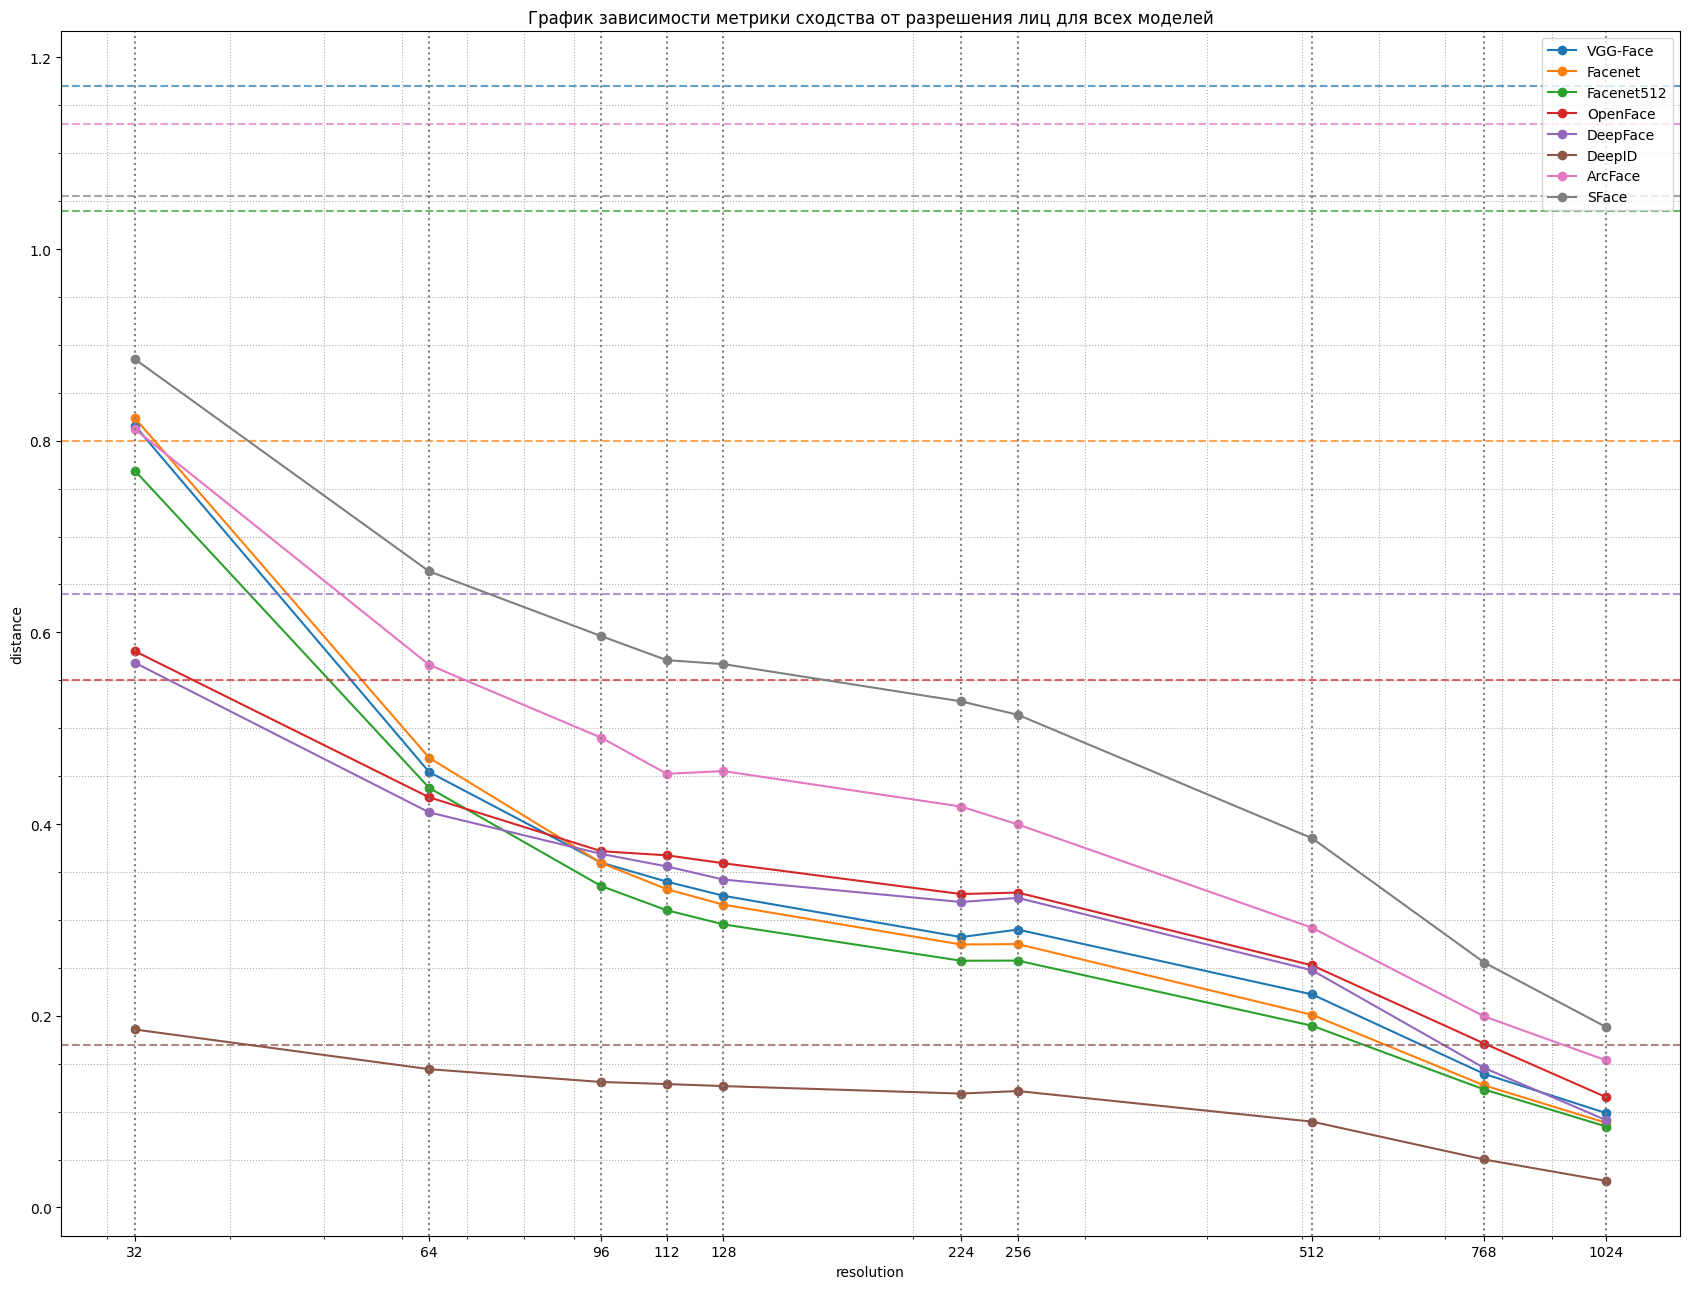

In [23]:
plt.figure(figsize=(17, 13))

avg_distances_dict = {}

for model in model_names:
    all_distances_for_resolutions = []

    for file_name in os.listdir(input_folder):
        if file_name.endswith(".csv") and model in file_name:
            file_path = os.path.join(input_folder, file_name)

            df = pd.read_csv(file_path)

            distances_for_resolutions = [df.loc[:, f'{resolution}_distance'].mean() for resolution in resolutions]
            all_distances_for_resolutions.append(distances_for_resolutions)

    if all_distances_for_resolutions:
          avg_distances = pd.DataFrame(all_distances_for_resolutions).mean().tolist()
          avg_distances_dict[model] = avg_distances
          plt.plot(resolutions, avg_distances, marker='o', label=f'{model}')

          threshold = thresholds.get(model, None)
          if threshold is not None:
            # https://stackoverflow.com/questions/36699155/how-to-get-color-of-most-recent-plotted-line-in-pythons-plt
            threshold_color = plt.gca().lines[-1].get_color()
            plt.axhline(y=threshold, linestyle='--', color=threshold_color, alpha=0.7)

for resolution in resolutions:
    plt.axvline(x=resolution, linestyle=':', color='gray')

plt.xscale('log')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.title('График зависимости метрики сходства от разрешения лиц для всех моделей')
plt.xlabel('resolution')
plt.ylabel('distance')
plt.xticks(resolutions, resolutions)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [24]:
deviations = {}

for model, distances in avg_distances_dict.items():
  threshold = thresholds.get(model, None)
  if threshold is not None:
    deviations[model] = [(threshold - distance) for distance in distances]

normalized_deviations = {}

for model, deviations in deviations.items():
    min_deviation = min(deviations)
    max_deviation = max(deviations)
    normalized_deviations[model] = [(dev - min_deviation) / (max_deviation - min_deviation) for dev in deviations]

print(normalized_deviations)

{'VGG-Face': [1.0, 0.9428139466649275, 0.8271912682883612, 0.7329034095564907, 0.7438230240843672, 0.6837067642307106, 0.6631876679650653, 0.6356211420705405, 0.5037716738251306, 0.0], 'Facenet': [1.0, 0.946808747540567, 0.8466030913567497, 0.7462808247465988, 0.7468825107746178, 0.6903946552400126, 0.6683758565455284, 0.6313252399085681, 0.4820431079289591, 0.0], 'Facenet512': [1.0, 0.9435239103748371, 0.8462944105577367, 0.7469726955587821, 0.7472061705575201, 0.6917509385068106, 0.6702166126931373, 0.6334314136700517, 0.48363171525313703, 0.0], 'OpenFace': [1.0, 0.8795249113121786, 0.7042053140586464, 0.5411165410617162, 0.5444286899500115, 0.4753656545840865, 0.45765929862298954, 0.4483364223904472, 0.327544981471495, 0.0], 'DeepFace': [1.0, 0.885904137749347, 0.6723036869296778, 0.5140215264767556, 0.5229723366175301, 0.4739862814567009, 0.445239584766214, 0.4179620726049172, 0.3270920997686477, 0.0], 'DeepID': [1.0, 0.8581119464670818, 0.6082031321262051, 0.4062999237475074, 0.42

In [25]:
mean_deviations = {model: sum(deviations) / len(deviations) for model, deviations in normalized_deviations.items()}

for model, mean_deviation in mean_deviations.items():
    print(f"{model}: {mean_deviation}")

VGG-Face: 0.6733018896685594
Facenet: 0.6758714034041601
Facenet512: 0.6763027867172012
OpenFace: 0.5378181813451571
DeepFace: 0.525948172636979
DeepID: 0.46381331066976406
ArcFace: 0.5894060768236471
SFace: 0.5304546955383601


In [31]:
mean_deviations_sorted = dict(sorted(mean_deviations.items(), key=lambda x:x[1]))
print(mean_deviations_sorted)

{'DeepID': 0.46381331066976406, 'DeepFace': 0.525948172636979, 'SFace': 0.5304546955383601, 'OpenFace': 0.5378181813451571, 'ArcFace': 0.5894060768236471, 'VGG-Face': 0.6733018896685594, 'Facenet': 0.6758714034041601, 'Facenet512': 0.6763027867172012}


In [ ]:
models = list(mean_deviations.keys())
result = list(mean_deviations.values())

plt.figure(figsize=(10, 6))
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.bar(models, result)
plt.title('Отклонение от threshold')

Text(0.5, 1.0, 'Отклонение от threshold')

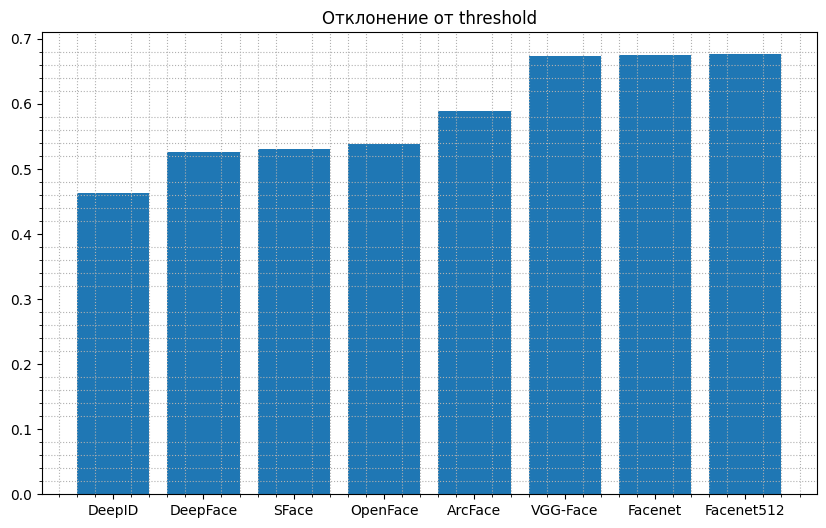

In [33]:
models = list(mean_deviations_sorted.keys())
result = list(mean_deviations_sorted.values())

plt.figure(figsize=(10, 6))
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.bar(models, result)
plt.title('Отклонение от threshold')

In [8]:
data_folder = '/tf/data/miem_face_recognition/experiment_3'

In [9]:
def calculate_recall(df, model, angle):
    tp = df[(df['model_name'] == model) & (df['angle'] == angle) & (df['verified'] == True)]['model_name'].count()
    all_res = df[(df['model_name'] == model) & (df['angle'] == angle)]['model_name'].count()
    
    recall = tp / all_res
    return recall

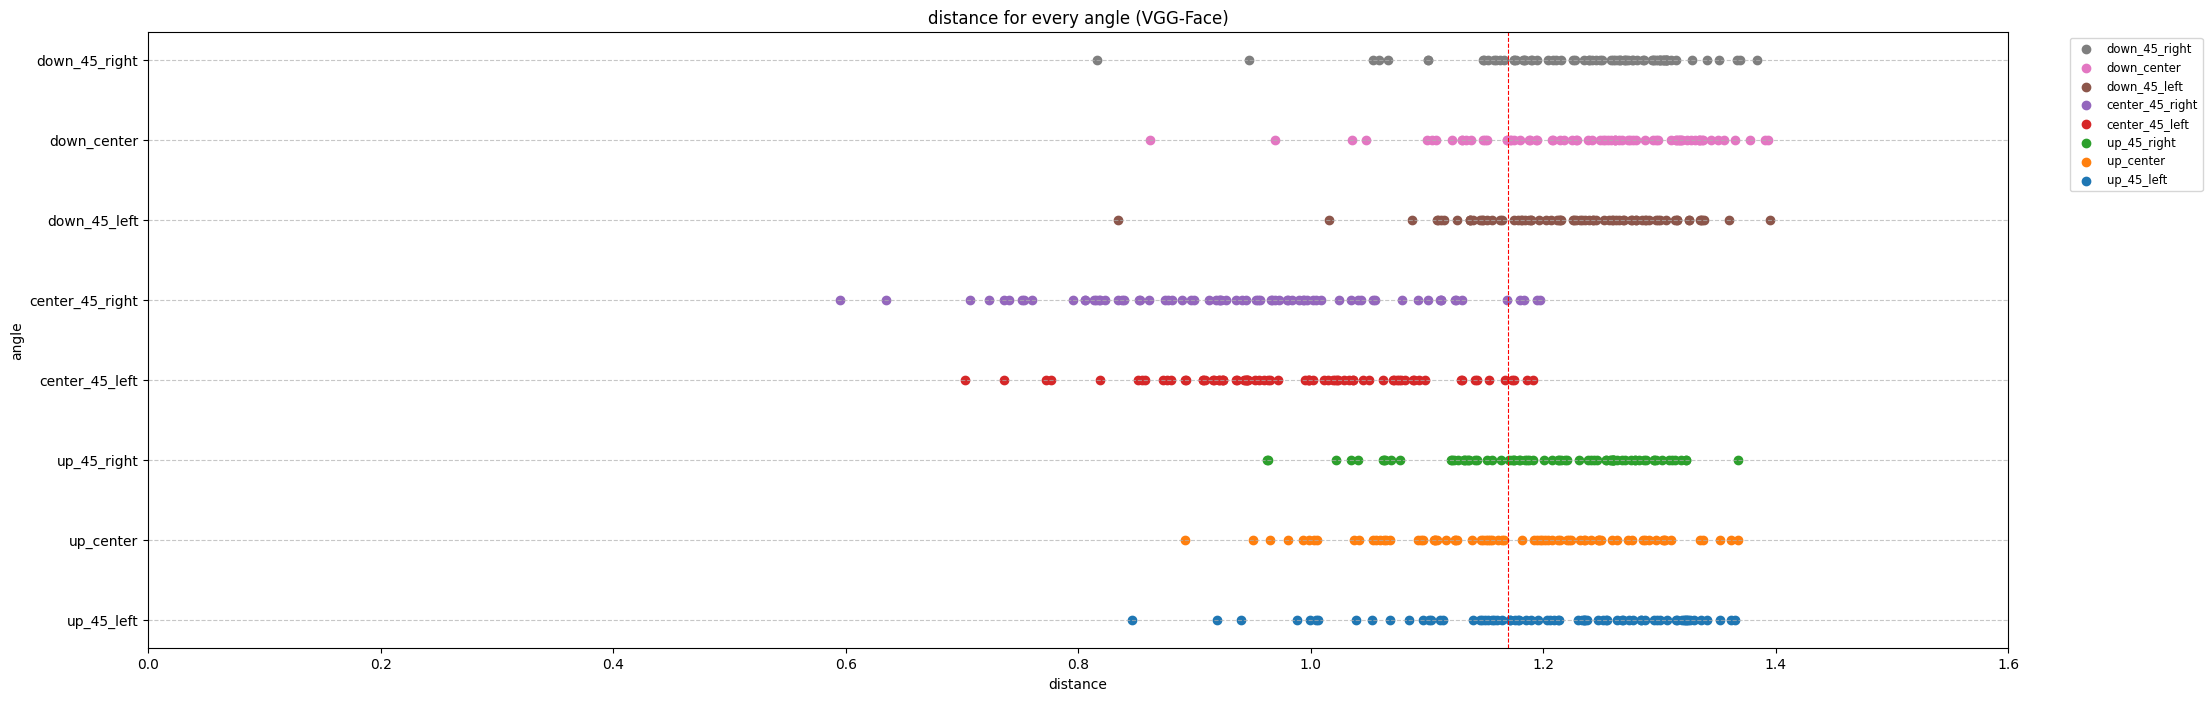

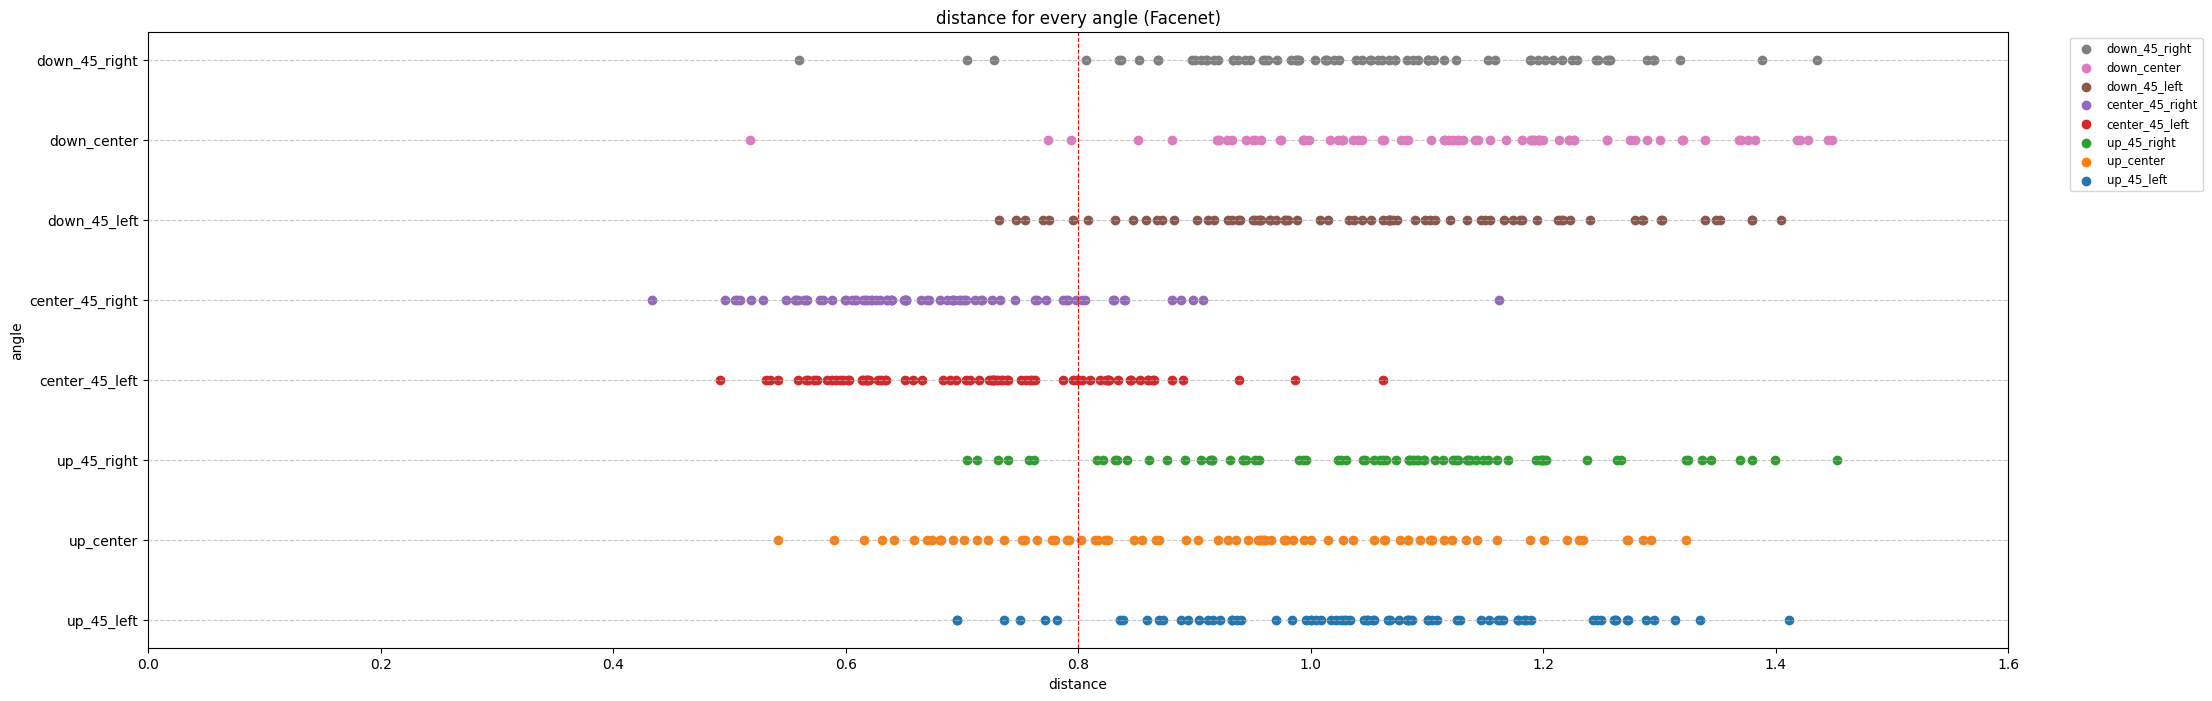

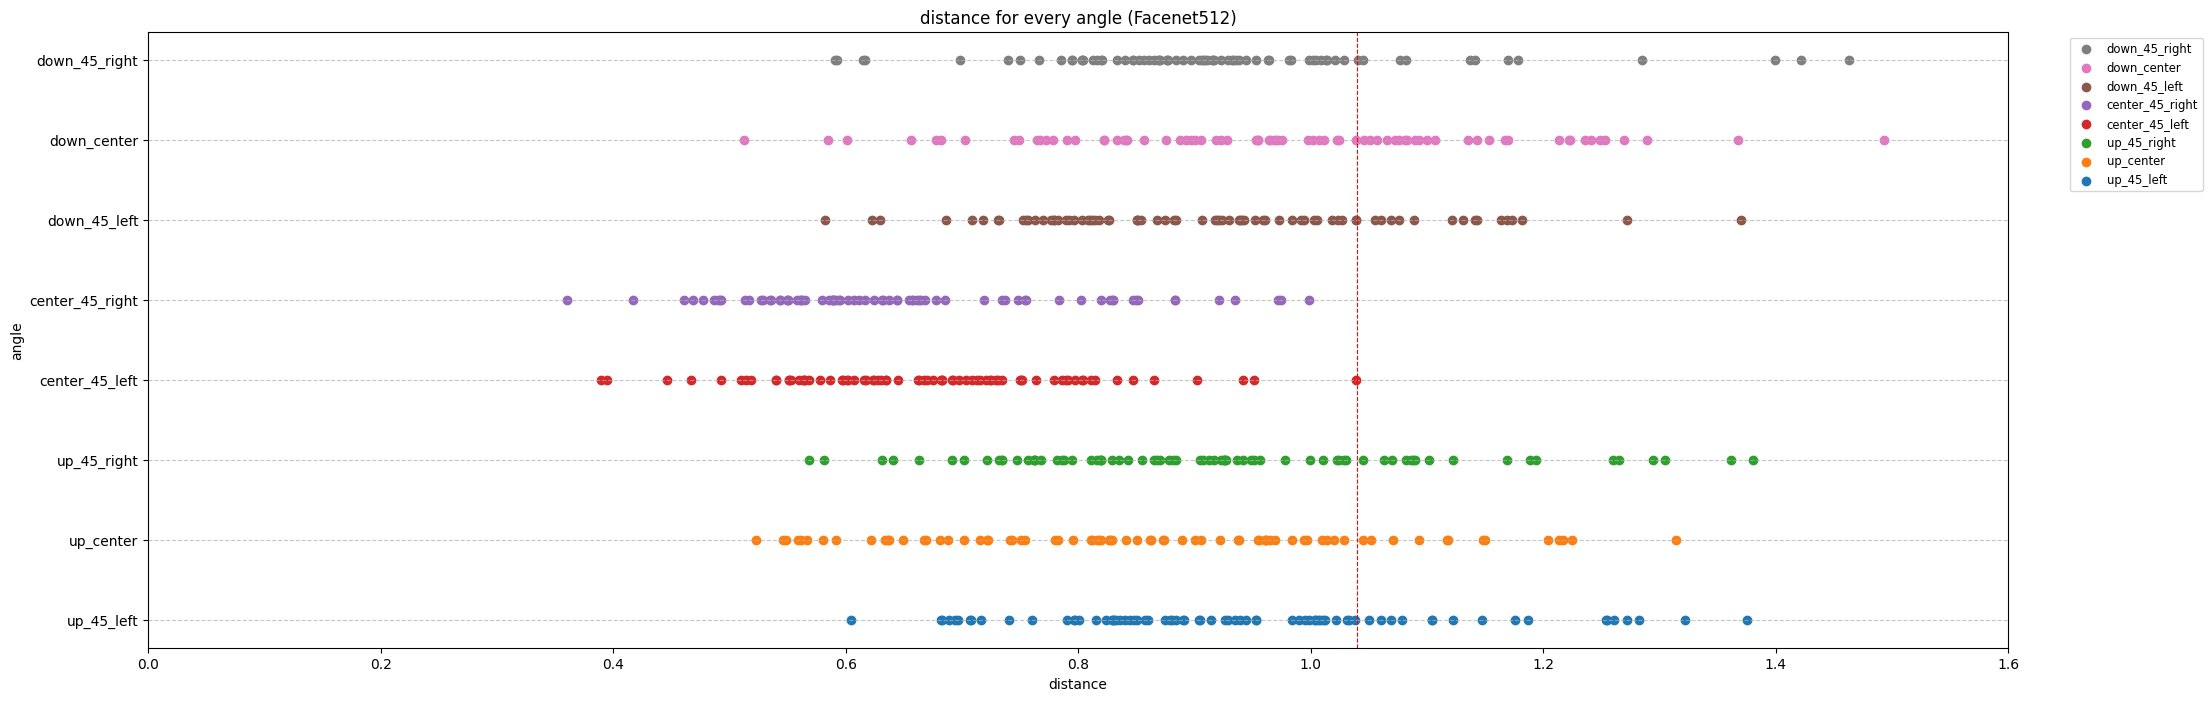

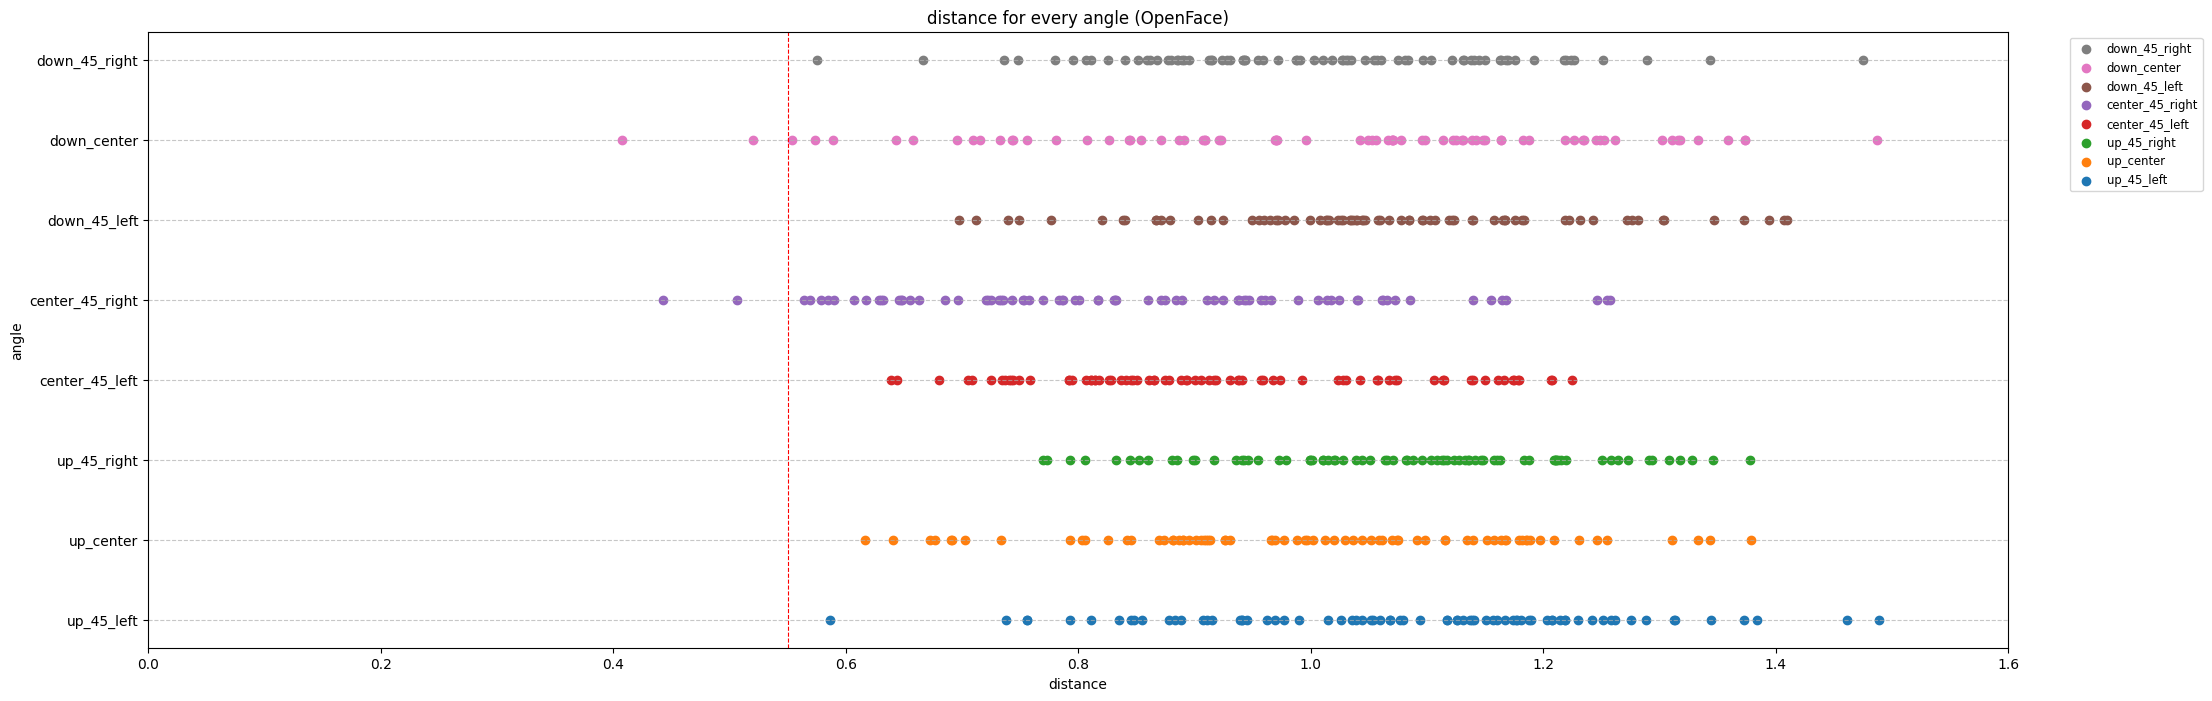

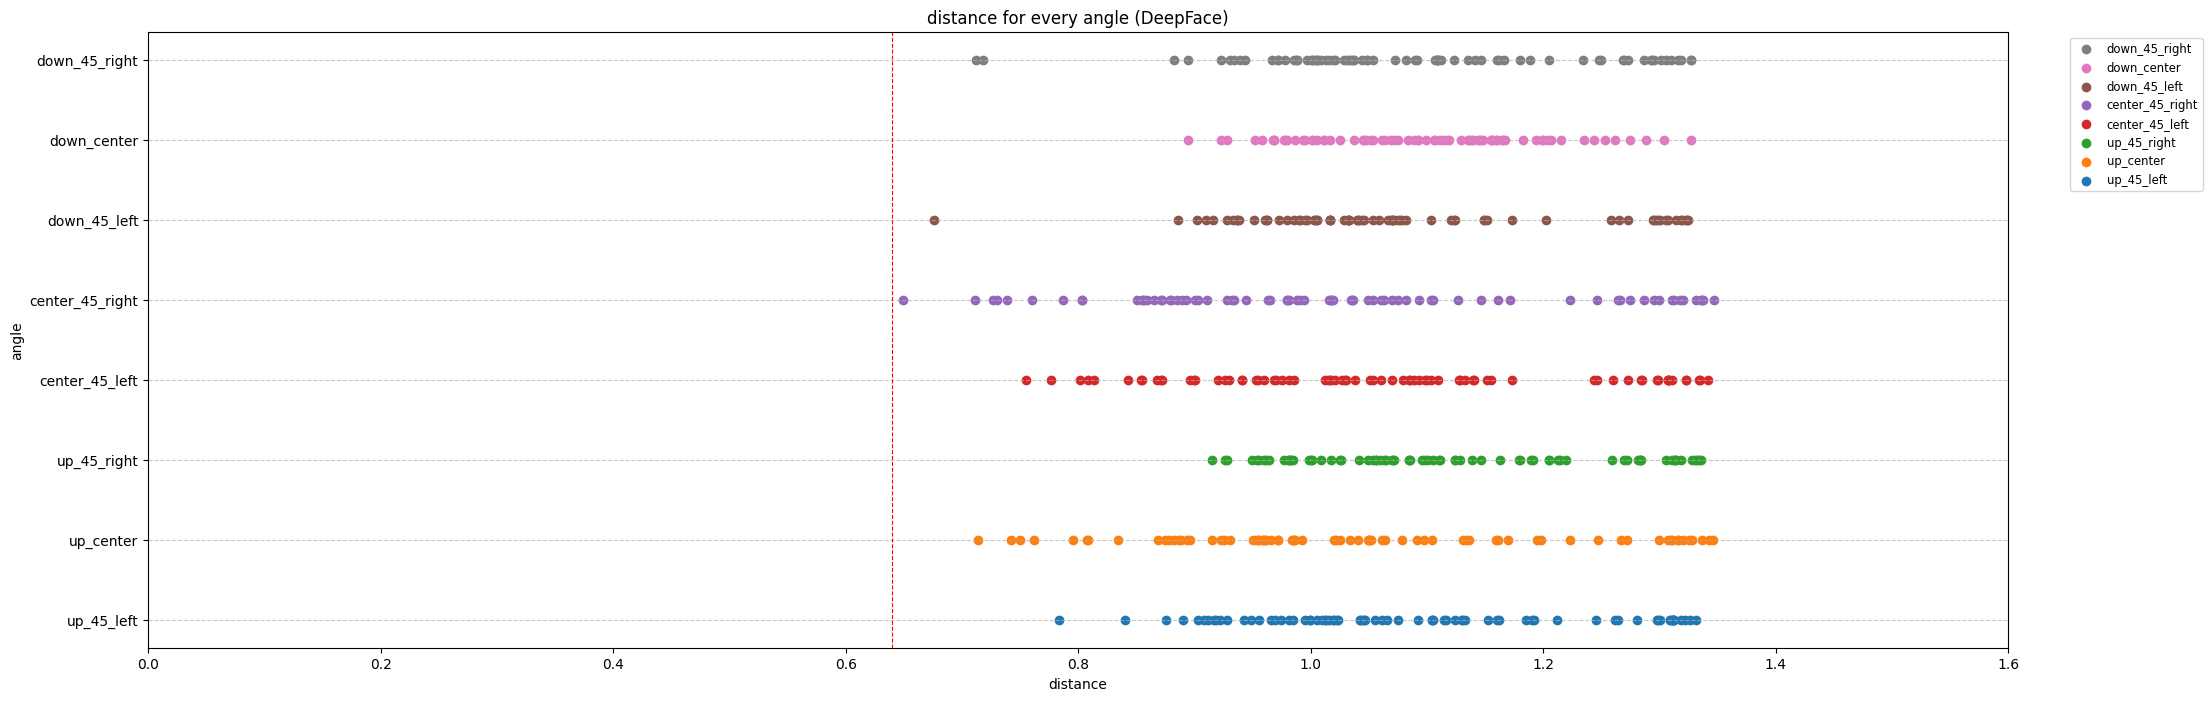

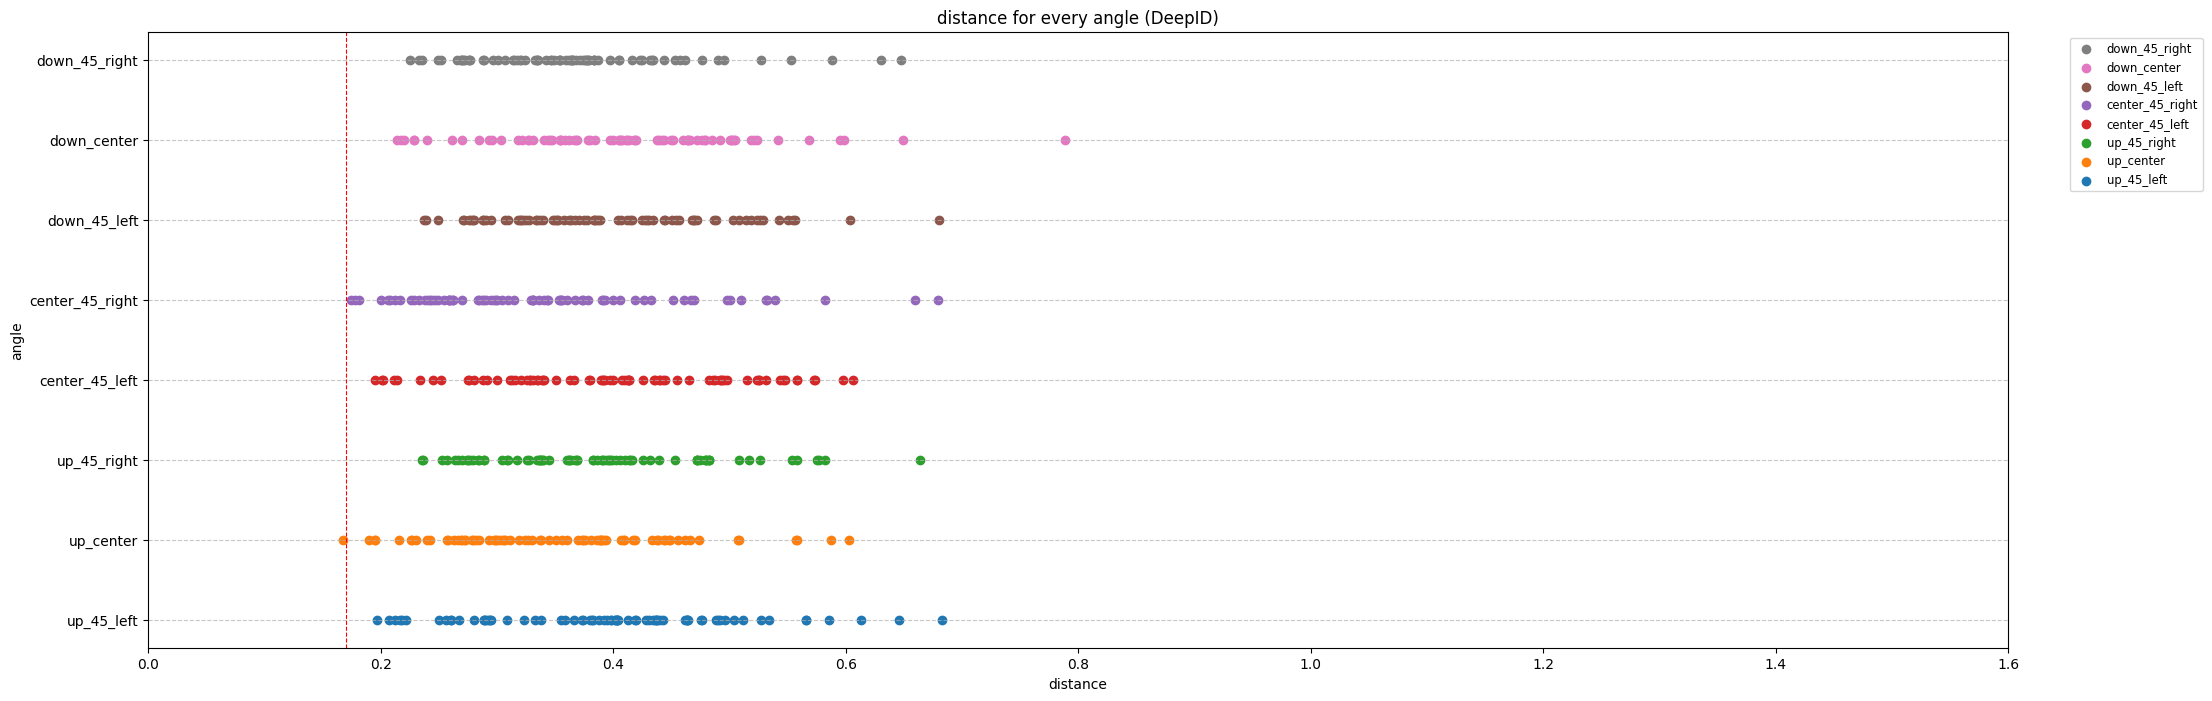

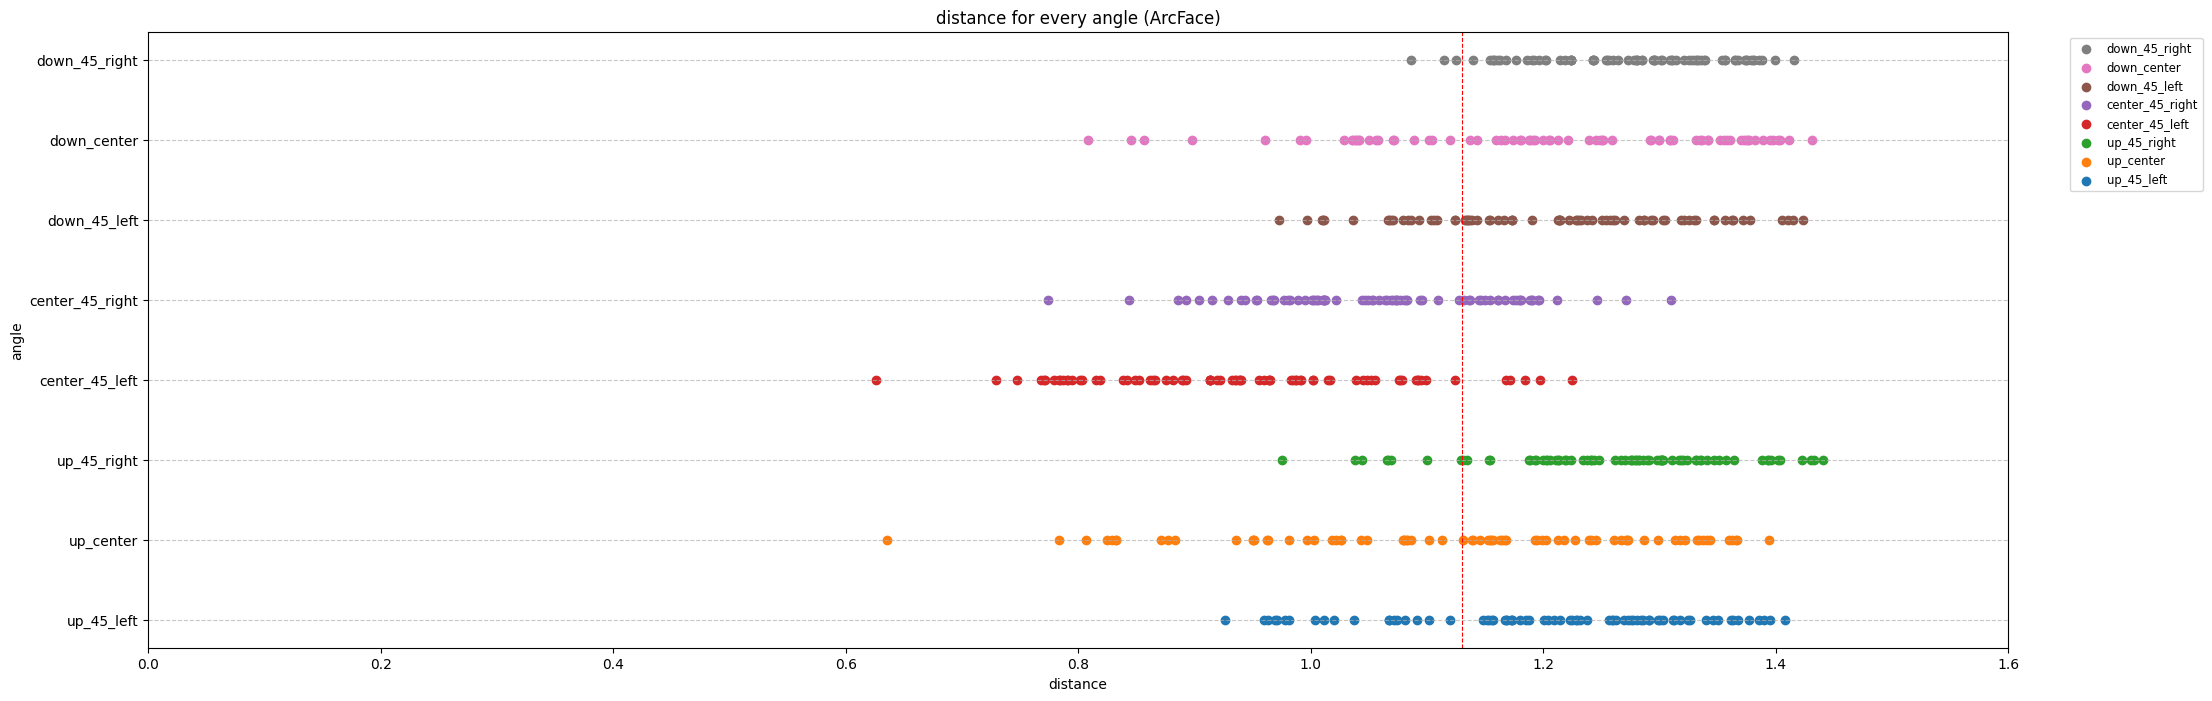

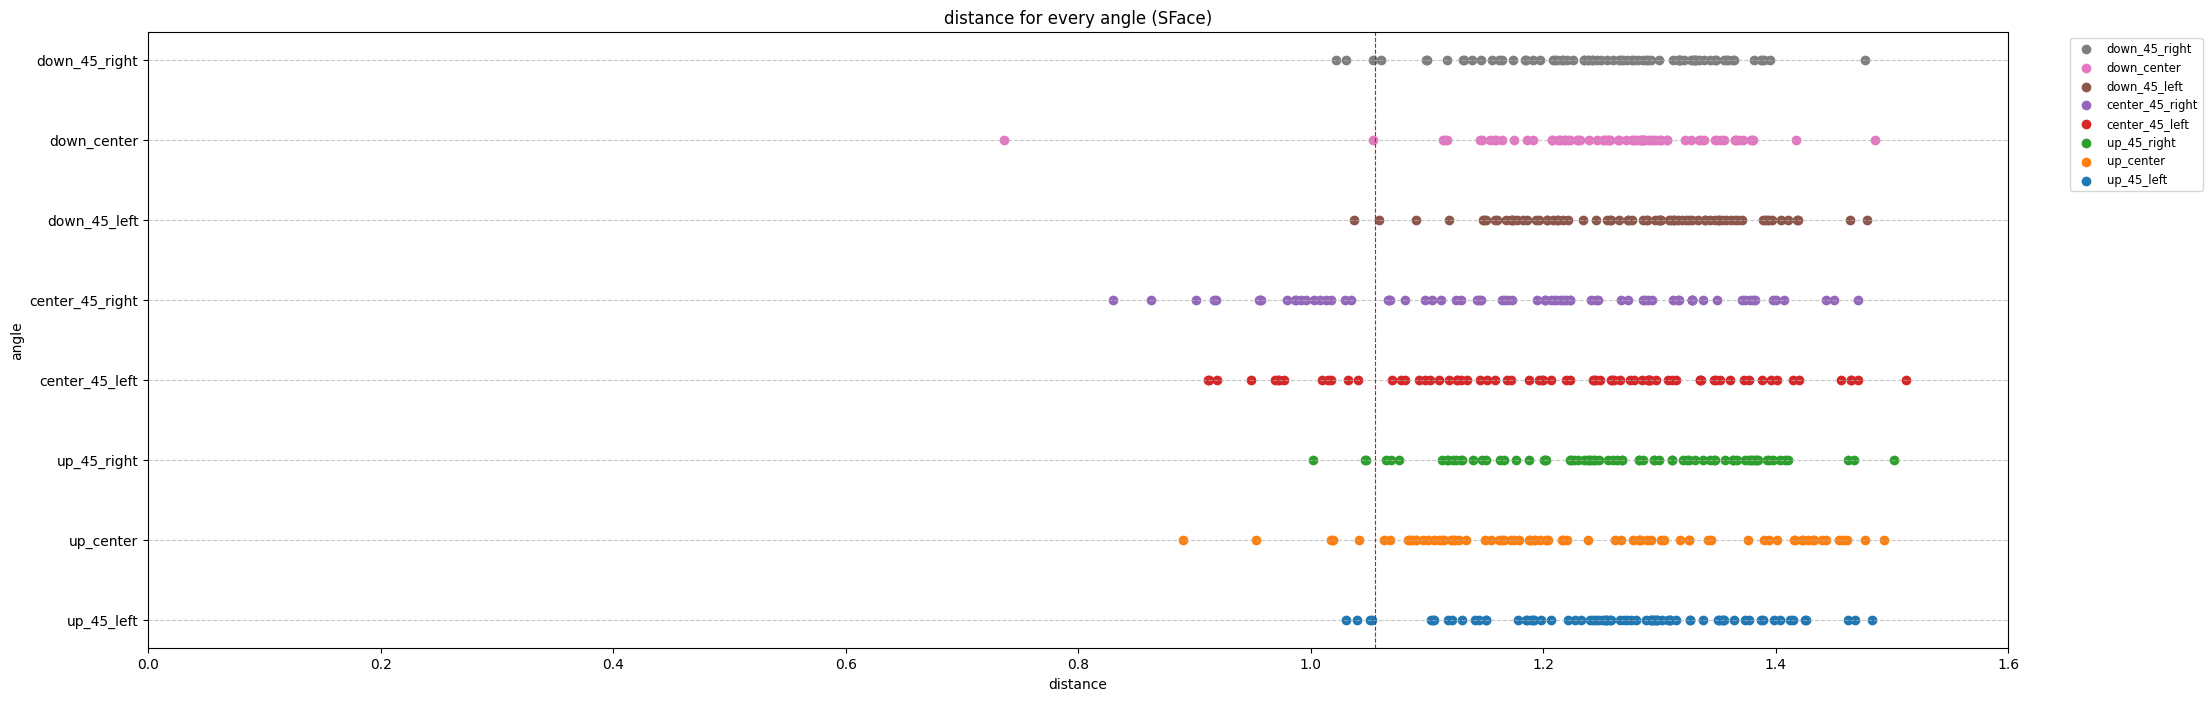

In [10]:
all_recalls = []

for model in model_names:
    plt.figure(figsize=(24, 8))

    for file_name in os.listdir(data_folder):
        if file_name.endswith(".csv") and model in file_name:
            file_path = os.path.join(data_folder, file_name)

            df = pd.read_csv(file_path)

            if model in df['model_name'].unique():
                df['angle'] = df['vertical_position'] + '_' + df['horizontal_position']
                
                for angle in df['angle'].unique():
                    angle_data = df[df['angle'] == angle]
                    plt.scatter(angle_data['distance'], angle_data['angle'], marker='o', label=angle)
                    
                    recall = calculate_recall(df, model, angle)
                    all_recalls.append({'model': model, 'angle': angle, 'recall': recall}) 

    plt.title(f'distance for every angle ({model})')
    plt.xlabel('distance')
    plt.ylabel('angle')
    plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', fontsize='small', reverse=True)
    plt.axvline(x=thresholds.get(model, 0), color='red', linestyle='--', linewidth=0.8)
    plt.xticks(np.linspace(0, 1.6, 9))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

recalls_df = pd.DataFrame(all_recalls)
recalls_df.to_csv('recalls.csv', index=False)

In [11]:
recall_results = pd.read_csv('/tf/data/miem_face_recognition/recalls.csv')

In [12]:
recall_results

,model,angle,recall
0,VGG-Face,up_45_left,0.333333
1,VGG-Face,up_center,0.493333
2,VGG-Face,up_45_right,0.320000
3,VGG-Face,center_45_left,0.946667
4,VGG-Face,center_45_right,0.946667
...,...,...,...
59,SFace,center_45_left,0.173333
60,SFace,center_45_right,0.253333
61,SFace,down_45_left,0.013333
62,SFace,down_center,0.026667


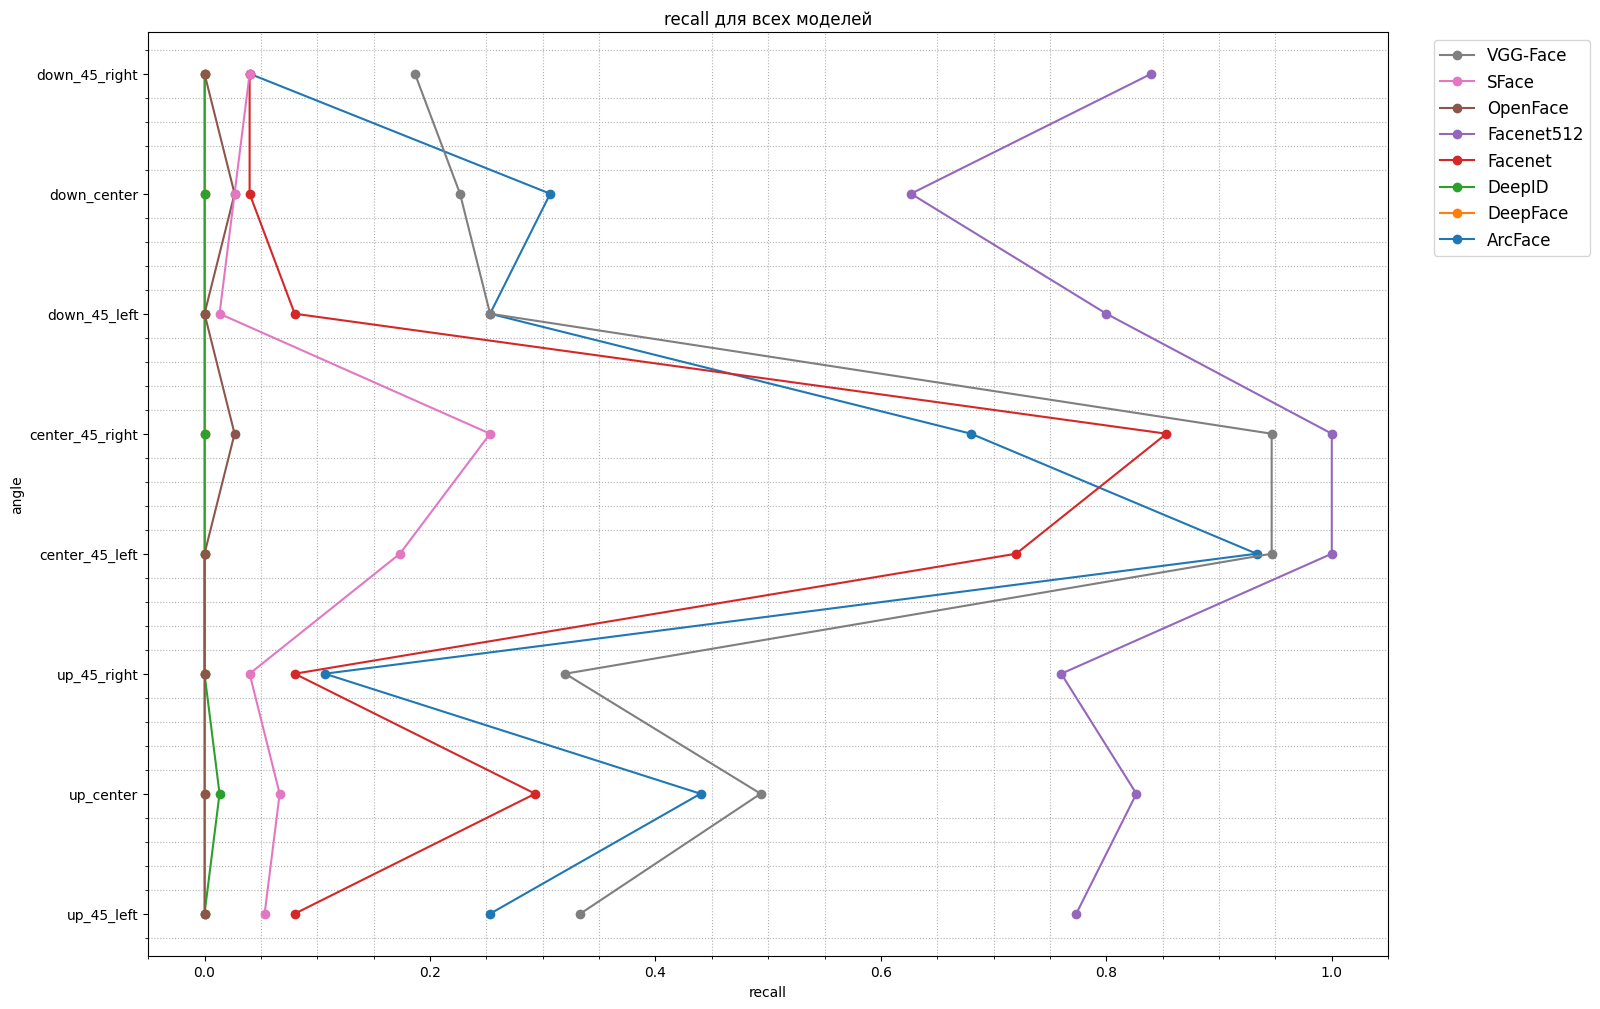

In [21]:
model_groupped = recall_results.groupby('model')

plt.figure(figsize=(16,12))

for model, data in model_groupped:
    # plt.scatter(data['recall'], data['angle'], label=model)
    plt.plot(data['recall'], data['angle'], marker='o', label=model)
    
plt.xlabel('recall')
plt.ylabel('angle')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.title('recall для всех моделей')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', fontsize='large', reverse=True)

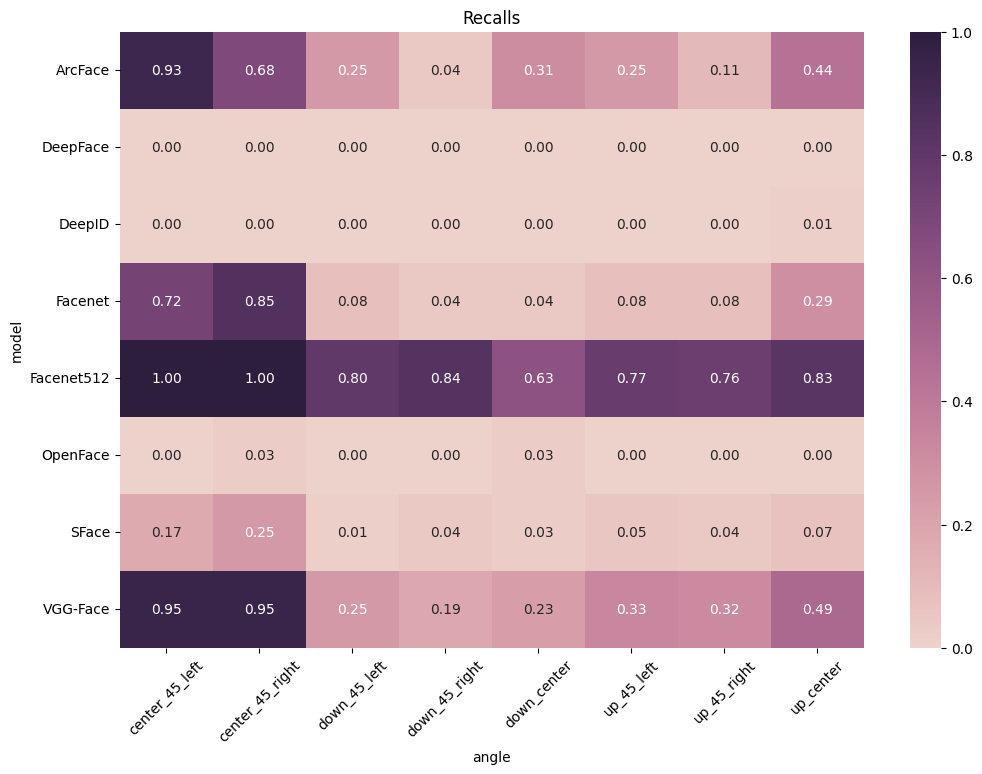

In [20]:
table = recall_results.pivot_table(index='model', columns='angle', values='recall')
plt.figure(figsize=(12, 8))
sns.heatmap(table, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".2f")

plt.title('Recalls')
plt.xlabel('angle')
plt.ylabel('model')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [34]:
all_results_more_threshold = []
total_count = 693

for model in model_names:
    results_more_threshold = []

    for file_name in os.listdir(input_folder):
        if file_name.endswith(".csv") and model == file_name.split('_')[0]:
            file_path = os.path.join(input_folder, file_name)

            df = pd.read_csv(file_path)

            results_for_model = [len(df[df[f'{resolution}_distance'] > thresholds[model]]) for resolution in resolutions]
            results_more_threshold.append(results_for_model)

    model_df = pd.DataFrame(results_more_threshold, columns=resolutions)
    model_df['model'] = model
    all_results_more_threshold.append(model_df)

joint_df = pd.concat(all_results_more_threshold)
sum_df = joint_df.groupby('model').sum().reset_index()
sum_df[resolutions] = ((sum_df[resolutions] / total_count) * 100).round(2)

In [39]:
input_folder = '/tf/data/miem_face_recognition/experiment_2/results_FR_0803' 

In [40]:
sum_df

,model,1024,768,512,256,224,128,112,96,64,32
0,ArcFace,0.58,0.43,1.15,1.88,1.88,2.45,2.02,2.60,3.61,11.98
1,DeepFace,3.46,6.64,15.30,21.93,21.50,23.95,25.40,26.55,30.30,38.67
2,DeepID,2.89,6.64,15.30,22.08,21.36,23.67,23.67,25.25,27.99,38.53
3,Facenet,1.15,1.88,4.18,6.06,5.77,7.36,7.50,8.66,12.84,60.46
4,Facenet512,0.00,0.29,0.43,0.43,0.29,0.72,0.87,1.01,1.73,11.11
5,OpenFace,3.17,6.64,15.01,20.92,19.91,23.23,21.93,24.53,29.15,46.32
6,SFace,2.31,5.48,12.55,18.76,17.89,19.48,20.20,19.91,22.66,37.37
7,VGG-Face,0.00,0.14,0.14,0.14,0.14,0.43,0.29,0.14,0.58,5.19


In [ ]:
for file_name in os.listdir(input_folder):
  if file_name.endswith('.csv'):

    model_name = file_name.split('_')[0]
    df = pd.read_csv(os.path.join(input_folder, file_name))

    df_sorted = df.sort_values(by='name')

    distance_columns = [col for col in df_sorted.columns if '_distance' in col]
    plt.figure(figsize=(24, 16))

    for name, group in df_sorted.groupby('name'):
       distances = group[distance_columns].values.flatten()
       plt.scatter(distances, [name] * len(distances), marker='o')

    plt.title(f'{model_name}')
    plt.xlabel('distance')
    plt.ylabel('person')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.axvline(x=thresholds.get(model_name, 0), color='red', linestyle='--')
    plt.show()

center 45
center 45
center center
    1024_distance  768_distance  512_distance  256_distance  224_distance  128_distance  112_distance  96_distance  64_distance  32_distance
42        0.75609        0.1979       0.25035       1.28386       1.28361       0.64121       0.71319      0.64233      0.82156      1.22597


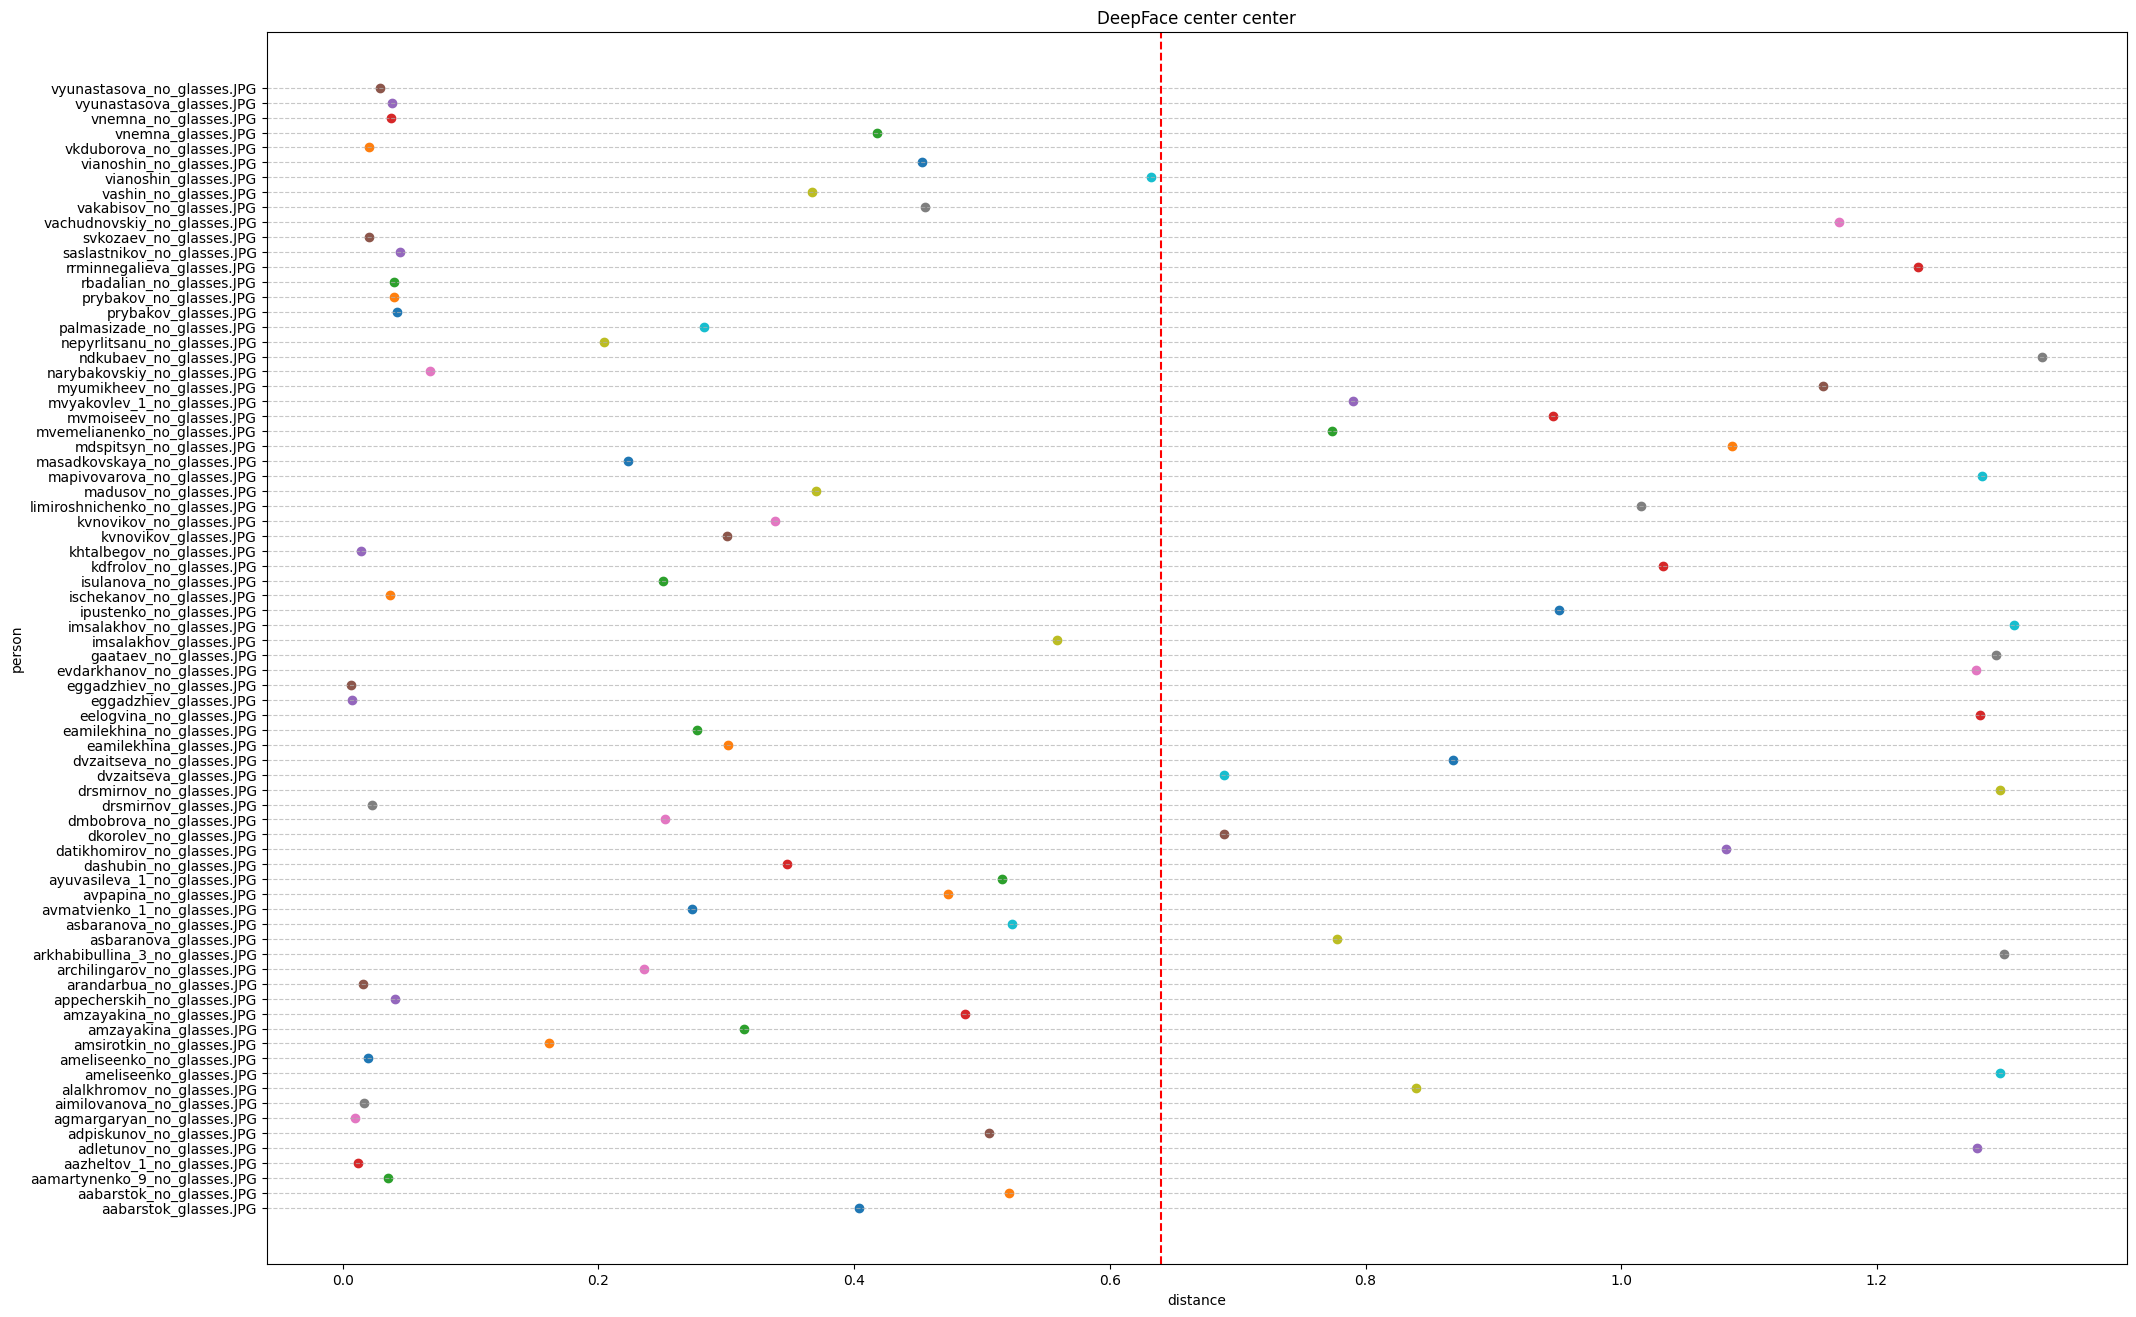

down 45
down 45
down center
up 45
up 45
up center


In [89]:
for file_name in os.listdir(input_folder):
  if file_name.endswith('.csv'):

    model_name = file_name.split('_')[0]
    vertical_position = file_name.split('_')[1]
    horizontal_position = file_name.split('_')[2].split('.')[0]
    if model_name != "DeepFace":
        continue
    print(f"{vertical_position} {horizontal_position}")
    if vertical_position != horizontal_position:
        continue
    df = pd.read_csv(os.path.join(input_folder, file_name))

    df_sorted = df.sort_values(by='name')
    # print(df_sorted)
    # print(df_sorted.columns.tolist())
    # print(df_sorted.index)
    # distance_columns = [col for col in df_sorted.columns if '1024_distance' in col]
    distance_columns = [col for col in df_sorted.columns if '512_distance' in col]
    # distance_columns = [col for col in df_sorted.columns if '_distance' in col]
    with pd.option_context('expand_frame_repr', False):
      print(df_sorted.loc[df_sorted['name'] == "isulanova_no_glasses.JPG"].filter(like='distance'))
    plt.figure(figsize=(24, 16))

    for name, group in df_sorted.groupby('name'):
       distances = group[distance_columns].values.flatten()
       plt.scatter(distances, [name] * len(distances), marker='o')

    plt.title(f'{model_name} {vertical_position} {horizontal_position}')
    plt.xlabel('distance')
    plt.ylabel('person')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.axvline(x=thresholds.get(model_name, 0), color='red', linestyle='--')
    plt.show()